# Final Project: Integrating Your ML Pipeline - Part A (Final Test Accuracy : 0.7328 and Test macro-F1 score: 0.66049)
### Team Members: Siobhan Curran, Aimee Denyse Niwenshuti, Debasish Halder
### December 7th, 2025   |   DX703 O1 Advanced Machine Learning & AI (Fall 25)
#### Purpose: This Final Project, Part A, provies the complete Machine Learning workflow established in Milestones 1 and 2; ranging from the initial problem framing of the HuffPost classification task and exploratory data analysis, through feature engineering (label merging and SpaCy normalization), to the comparative selection and training of the final model.



### Overview of assignment:

- Part A: Final Code Notebook (.ipynb) — Well-organized and executable repo of our project code.
- Part B: Technical Report (.pdf) — Professional format, 8–10 pages total, including graphics (appendices permitted for additional figures).

Part B is submitted separately; Part A follows below.
All team work can be found here: https://github.com/Siobhan-C/Module_7_Final_Team_Project

### <b>A.1: Setup and Context:</b>

Our team project addresses multiclass classification using the HuffPost news text dataset, categorizing articles into 28 distinct topics based on their headlines and short descriptions. The original dataset contained 41 categories, but due to significant label noise and high semantic similarity between certain classes, we implemented a preprocessing and merging strategy to consolidate these into a final set of 28 classes for our multiclass classification task. The challenge is compounded by severe class imbalance, where dominant categories like "POLITICS" contain over 32,000 samples while minority topics like "EDUCATION" possess fewer than 1,000 records, causing standard models to exhibit strong bias toward frequent labels.

The dataset initially presented significant label ambiguity across semantically overlapping categories. To address this, we employed TF-IDF vectorization with cosine similarity analysis to identify and merge highly similar categories, such as "PARENTING" and "PARENTS," into distinct consolidated classes to reduce conflicting predictions and improve model performance.

Our preprocessing pipeline involved multiple critical steps: concatenating text fields, implementing SpaCy-based tokenization while preserving contextual information, and splitting the data into stratified 80/10/10 train/validation/test sets to maintain class distribution. A key component of our process was resolving category ambiguity through systematic analysis, where TF-IDF cosine similarity revealed substantial overlap between classes (e.g., FOOD & DRINK vs TASTE with 0.852 similarity, PARENTING vs PARENTS with 0.849 similarity), leading to strategic category merging that reduced our classification space from 41 to 28 classes while improving model performance. Finally, the project compared various machine learning approaches, including a simple baseline and transfer learning models such as BERT, DistilBERT, and RoBERTa, with comprehensive hyperparameter optimization performed using the Optuna framework across different fine-tuning strategies (freeze, partial, and full).


<b>Summary of Milestones 1 and 2:</b>

##### Data Cleaning and Preprocessing

Our preprocessing pipeline involved multiple critical steps: concatenating text fields, implementing SpaCy-based tokenization while preserving contextual information, and splitting the data into stratified 80/10/10 train/validation/test sets to maintain class distribution. A key component of our process was resolving category ambiguity through systematic analysis, where TF-IDF cosine similarity revealed substantial overlap between classes (e.g., FOOD & DRINK vs TASTE with 0.852 similarity, PARENTING vs PARENTS with 0.849 similarity), leading to strategic category merging that reduced our classification space from 41 to 28 classes while improving model performance. Finally, the project compared various machine learning approaches, including a simple baseline and transfer learning models such as BERT, DistilBERT, and RoBERTa, with comprehensive hyperparameter optimization performed using the Optuna framework across different fine-tuning strategies (freeze, partial, and full).

The preprocessing pipeline was designed to transform raw text into a standardized format suitable for reproducible training:
1. Cleaning & Normalization: We implemented SpaCy to perform tokenization while maintaining the original text characteristics of concatenated headlines and short descriptions. Our approach intentionally preserves stop words, punctuation, and spacing to allow the RoBERTa model to perform its own contextual analysis without pre-imposed linguistic constraints. We opted not to apply lemmatization, as this normalization step could potentially remove nuanced information valuable for the model's learning process. We did, however, strip HTML tags and URLs using BeautifulSoup due to their lack of semantic value and potential to introduce noise. All tokens were converted to lowercase for consistency.

2. Filtering: Rows containing fewer than 3 tokens were removed to ensure only informative samples remained in the dataset.

3. Deduplication: Exact text duplicates and ambiguous entries (identical text with conflicting category labels) were removed to prevent data leakage and confusion.

4. Splitting: The dataset was divided into stratified 80% Train, 10% Validation, and 10% Test splits using a fixed random seed (42) to preserve class distribution and ensure reproducibility.

**Feature Engineering and Augmentation Strategies**

To address class imbalance and semantic overlap, several strategies were implemented:

5. Class Weighting: Weights were calculated based on inverse class frequency to penalize the model more heavily for errors on minority classes (e.g., 'EDUCATION') compared to majority classes (e.g., 'POLITICS').

6. TF-IDF Similarity Analysis: A cosine similarity analysis using TF-IDF vectors (n-gram range 1-2) identified highly overlapping categories, most notably "FOOD & DRINK" vs. "TASTE" (0.852 similarity) and "PARENTING" vs. "PARENTS" (0.849 similarity), along with "HEALTHY LIVING" vs. "WELLNESS" (0.827 similarity).

7. Class Merging:  Based on TF-IDF similarity scores, classification confusion patterns from initial model runs, and class support analysis, semantically similar categories were systematically merged. The merging strategy prioritized consolidating lower-support classes into higher-support classes to maintain data integrity (e.g., merging "TASTE" into "FOOD & DRINK," "PARENTS" into "PARENTING," and "FIFTY" into "WELLNESS"). This process reduced the total number of classes from 41 to 28, ensuring all final categories met a minimum support threshold of 150+ training records while creating more distinct class boundaries.

8. Vectorization: For baseline models, a TextVectorization layer was adapted to the training vocabulary, while transfer learning models utilized model-specific preprocessors (e.g., BERT tokenizers).

**Early Model Experiments and Lessons Learned**

Experiments in Milestone 2 compared a simple baseline against custom deep learning architectures and pre-trained models:
9. Baseline Model: A simple Embedding + GlobalAveragePooling architecture achieved a test accuracy of approximately 61.3% and a macro-F1 of 0.55. It proved efficient but lacked deep contextual understanding.
10. Custom Architectures: Experiments with Bidirectional LSTMs (BiLSTM) and Attention Pooling failed to outperform the simple baseline (accuracy about 54 - 57%). This demonstrated that increasing model complexity without pre-training was ineffective for this specific dataset.
11. Transfer Learning:

  - BERT vs. DistilBERT: Initial tests showed that BERT (specifically with partial fine-tuning) outperformed DistilBERT's comparable strategy, achieving a validation accuracy of 62.8% (0.6276) compared to DistilBERT's 59.5% (0.5948).
  - BERT achieved higher accuracy in Milestone 2 but in this final round we tried to compare performance of Bert and Distilbert along side RoBERTa, and RoBERTa performed best of the three.

  - RoBERTa Selection: With the merged categories when we did a test on 20% subset (0.2) we found RoBERTa gave the best test accuracy if 0.67772 along with  F1 Macro score of 0.6326 . Bert best score was test accuracy 0.631658 and F1 Macro score of 0.551984. Due to better classification accuracy and test accuracy we selected RoBERTa

  - Optimization: Hyperparameter tuning using Optuna's Tree-structured Parzen Estimator (TPE) sampler optimized learning rate, batch size, optimizer choice, and the number of layers to unfreeze. This process revealed that partial fine-tuning of the top 3 transformer layers (out of RoBERTa's 12 total layers) provided the optimal balance between task-specific adaptation and preservation of pre-trained knowledge.

<b>Final preprocessing pipeline:</b>

Please see the code below that we used to preprocess the HuffPost News Category dataset. This pipeline processes raw JSON data into a clean, merged-class format suitable for the final RoBERTa model. Steps include:
1. Data Loading
- The dataset is loaded directly from the Hugging Face repository to ensure reproducibility.
2. Cleaning and Text Normalization
- This stage involves concatenating text fields, normalizing via SpaCy (lowercase, stop-word removal), filtering short entries, and removing duplicates.
    - Apply cleaning (huff_subset = huff_all.map(spacy_clean, batched=True, batch_size=1000)
    - Filter: Remove rows with fewer than 3 tokens, MIN_WORDS = 3, huff_subset = huff_subset.filter(lambda x: x["len_tokens"] >= MIN_WORDS)
    - Deduplication: Convert to Pandas to drop exact text duplicates and ambiguous labels
    - Drop texts associated with multiple conflicting categories
    - Convert back to Hugging Face Dataset
3. Class Merging aka Final Label Engineering
- To address class imbalance and semantic overlap (e.g., "PARENTING" vs. "PARENTS"), the final pipeline maps the original 41 categories down to 28 consolidated classes.
    - Apply merging
    - Output: 28 classes
4. Final Preprocessing (Tokenization for RoBERTa)
- While baseline models used standard TextVectorization, the final selected model (RoBERTa) utilizes a specific KerasNLP preprocessor. This handles tokenization, resizing (truncation/padding), and normalization specific to the BERT architecture.
    - Configuration
      - MAX_LEN = 75  # Based on 99th percentile analysis
      - BATCH_SIZE = 16 # Optimized via Optuna
    - Load the model-specific preprocessor (The preprocessor is typically passed directly into the model constructor or mapped over the tf.data.Dataset during the training loop.
- Sequence Length Rationale: MAX_LEN was increased to 75 from the initial Milestone 2 value of 27. This adjustment was necessary because the final pipeline preserves stop words and punctuation to maintain contextual cues for the transformer model, resulting in longer token sequences. The value of 75 covers the 99th percentile of cleaned text lengths in the dataset.

5. Note: No image transforms were used as this is a text-only dataset.

<b>Lessons Learned in Milestone 2 & Future Decisions: </b>

Building on Milestone 2 insights, we refined our pipeline to systematically address severe class imbalance and semantic ambiguity by consolidating the original 41 categories into 28 distinct classes based on TF-IDF similarity analysis, confusion matrix patterns, and manual inspection. We streamlined data preprocessing using SpaCy for robust text normalization while intentionally preserving linguistic features (stop words, punctuation) that provide contextual value to transformer models, and filtered out low-quality records with fewer than three tokens to ensure dataset quality.

Architecturally, we abandoned custom BiLSTM models after they consistently failed to outperform our simple embedding baseline, pivoting instead to transfer learning with pre-trained transformer models to capture deeper contextual relationships. Through comprehensive evaluation of BERT, DistilBERT, and RoBERTa, we selected RoBERTa as our final model architecture due to its superior performance (67.72% test accuracy vs. BERT's 62.8%) and exceptional training stability across multiple experimental configurations.

Finally, we optimized training efficiency and generalization through careful regularization (dropout rate of 0.5 on the classification head), partial fine-tuning (unfreezing only the top 2 transformer layers), and rigorous hyperparameter search using Optuna's intelligent TPE sampling, which identified optimal learning rates (1.22e-05), batch sizes (16), and optimizer configurations while significantly reducing computational costs compared to exhaustive grid search. This lead us to achieve the final Test Accuracy of accuracy: 0.7328 and Test macro-F1: 0.66049


In [ ]:
#### ------ A.1: Setup and Context ------ ####

In [ ]:
# ============================================
# Useful Imports
# ============================================

# --- Standard Libraries
import os
import time
import math
import random
from collections import Counter

# --- Core Data / Numerics
import numpy as np
import pandas as pd

# --- Visualization
import matplotlib.pyplot as plt
# import seaborn as sns              # optional
import matplotlib.ticker as mticker  # optional (for formatted axes)

# --- NLP / Tokenization
import spacy                         # used for text preprocessing (HuffPost)

# --- Progress Tracking
from tqdm import tqdm                # optional (nice for loops)

from IPython.display import display

# --- TensorFlow / Keras (Deep Learning)
import tensorflow as tf
from tensorflow.keras import layers, models, Input, callbacks, regularizers, initializers
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam, AdamW
from tensorflow.keras.optimizers.schedules import CosineDecay, ExponentialDecay
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.layers import (
    Dense, Dropout, Flatten, MaxPooling2D, Conv2D,
    SeparableConv2D, GlobalAveragePooling2D, GlobalMaxPooling2D, BatchNormalization
)

# --- (Optional) Classical ML Baseline Tools
# from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score


# ============================================
# Global Configuration & Small Utilities
# ============================================

# Reproducibility
random_seed = 42
random.seed(random_seed)
np.random.seed(random_seed)
tf.keras.utils.set_random_seed(random_seed)   # sets Python, NumPy, and TensorFlow seeds

#for memory tracking

import resource # For memory tracking

# Utility: format seconds as HH:MM:SS

"""
Example usage to time your code:

start_time = time.time()
# ... your code here ...
print("Execution Time:", format_hms(time.time() - start_time))
"""

def format_hms(seconds: float) -> str:
    """Convert seconds to HH:MM:SS format."""
    return time.strftime("%H:%M:%S", time.gmtime(seconds))


In [ ]:
# --- Hugging Face Datasets
from datasets import load_dataset, DatasetDict
from datasets.features import ClassLabel

In [ ]:
import time, json, math, random
import numpy as np
import pandas as pd
import keras as keras
import keras_hub as kh            # if your env uses keras-nlp: `import keras_nlp as kh`
from datasets import load_dataset, Dataset, Features, ClassLabel, Value
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import f1_score # Added this line
#import evaluate

In [ ]:
import time
import resource # Added for memory tracking
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import StratifiedShuffleSplit, ShuffleSplit



results = {}


# -------------------------------------------------------------------
# Utility: nice time formatting
# -------------------------------------------------------------------
def _format_hms(seconds: float) -> str:
    seconds = int(seconds)
    m, s = divmod(seconds, 60)
    h, m = divmod(m, 60)
    if h > 0:
        return f"{h}h {m:02d}m {s:02d}s"
    else:
        return f"{m}m {s:02d}s"


# -------------------------------------------------------------------
# Plot learning curves + record best result
# -------------------------------------------------------------------
def plot_learning_curves(
    history,
    title: str,
    metric: str = "accuracy",
    results_dict: dict | None = None,
    verbose: bool = True,
    return_history: bool = False,
):
    """
    Plot train/val loss and a primary metric (e.g., accuracy),
    highlight the epoch with minimum val_loss, and optionally
    store the metric@min(val_loss) in results_dict[title].
    """
    hist = history.history
    if "val_loss" not in hist:
        raise ValueError("History does not contain 'val_loss' – cannot plot learning curves.")

    val_losses = hist["val_loss"]
    epochs = range(1, len(val_losses) + 1)

    # Epoch of minimum validation loss (this is our reference point)
    min_val_loss = float(np.min(val_losses))
    min_val_epoch = int(np.argmin(val_losses))  # 0-based
    val_metric_name = f"val_{metric}"

    if val_metric_name in hist:
        val_metric_at_min_loss = float(hist[val_metric_name][min_val_epoch])
    else:
        val_metric_at_min_loss = np.nan

    # --- Figure with 2 subplots: loss + metric ---
    fig, axs = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

    # Loss
    axs[0].plot(epochs, hist.get("loss", []), label="train loss")
    axs[0].plot(epochs, hist["val_loss"], label="val loss")
    axs[0].scatter(min_val_epoch + 1, min_val_loss, color="red", marker="x",
                   s=50, label="min val loss")
    axs[0].set_title(f"{title} - Loss",fontsize= 10)
    axs[0].set_ylabel("Loss")
    axs[0].legend()
    axs[0].grid(True)

    # Metric (accuracy by default)
    if metric in hist and val_metric_name in hist:
        axs[1].plot(epochs, hist[metric], label=f"train {metric}")
        axs[1].plot(epochs, hist[val_metric_name], label=f"val {metric}")
        axs[1].scatter(
            min_val_epoch + 1,
            val_metric_at_min_loss,
            color="red",
            marker="x",
            s=50,
            label=f"{metric} @ min val loss",
        )
    else:
        axs[1].plot(epochs, hist.get("loss", []), label="train (loss)")
        axs[1].plot(epochs, hist["val_loss"], label="val (loss)")

    axs[1].set_title(f"{title} - {metric.capitalize()}", fontsize= 10)
    axs[1].set_xlabel("Epoch")
    axs[1].set_ylabel(metric.capitalize())
    axs[1].legend()
    axs[1].grid(True)
    axs[1].set_ylim(0, 1.05)  # OK for accuracy-like metrics; harmless otherwise

    plt.tight_layout()
    plt.show()

    if verbose:
        final_tr_loss = hist["loss"][-1] if "loss" in hist else float("nan")
        final_val_loss = hist["val_loss"][-1]
        final_tr_metric = hist.get(metric, [np.nan])[-1]
        final_val_metric = hist.get(val_metric_name, [np.nan])[-1]

        print(f"Final Training Loss:            {final_tr_loss:.4f}")
        print(f"Final Training {metric:>9}:    {final_tr_metric:.4f}")
        print(f"Final Validation Loss:          {final_val_loss:.4f}")
        print(f"Final Validation {metric:>9}:  {final_val_metric:.4f}")
        print(f"Min Validation Loss:            {min_val_loss:.4f} (Epoch {min_val_epoch + 1})")
        if not np.isnan(val_metric_at_min_loss):
            print(f"{metric.capitalize()} @ Min Val Loss:      {val_metric_at_min_loss:.4f}")

    # Optionally store results
    summary = {
        "title": title,
        "best_epoch_by_val_loss": min_val_epoch + 1,  # 1-based
        "min_val_loss": min_val_loss,
        f"{metric}_at_min_val_loss": val_metric_at_min_loss,
    }

    if results_dict is not None:
        results_dict[title] = summary

    if return_history:
        return summary, history
    return summary


def print_results(results_dict: dict, sort_by: str = "accuracy_at_min_val_loss", descending: bool = True):
    """
    Pretty-print a collection of results saved from plot_learning_curves / train_and_test.

    sort_by can be e.g. "accuracy_at_min_val_loss" for accuracy-based models
    or any key that exists in the stored summary dicts.
    """
    if not results_dict:
        print("No results to display.")
        return

    # Figure out which key to sort by. If requested key isn't present, fall back to first numeric key.
    first_summary = next(iter(results_dict.values()))
    if sort_by not in first_summary:
        # try to pick a plausible numeric key
        numeric_keys = [k for k, v in first_summary.items() if isinstance(v, (int, float))]
        sort_by = numeric_keys[0] if numeric_keys else "best_epoch_by_val_loss"

    print(f"Sorting results by: {sort_by}\n")
    for title, summary in sorted(
        results_dict.items(),
        key=lambda kv: kv[1].get(sort_by, float("-inf")),
        reverse=descending,
    ):
        metric_val = summary.get(sort_by, float("nan"))
        best_epoch = summary.get("best_epoch_by_val_loss", "?")
        print(f"{title:<40}  {metric_val:.4f}  (best epoch={best_epoch})")


# -------------------------------------------------------------------
# Helper: detect single-label classification for stratified split
# -------------------------------------------------------------------
def _is_single_label_classification(y, max_classes_for_stratify: int = 50) -> bool:
    """
    Heuristic: stratify only if y is 1D, integer/bool-like, and not too many classes.
    """
    y = np.asarray(y)
    if y.ndim != 1:
        return False

    if np.issubdtype(y.dtype, (np.integer, np.bool_)):
        pass
    else:
        # floats might still be ints (e.g., 0., 1.) — check it
        if not np.all(np.equal(np.mod(y, 1), 0)):
            return False
        y = y.astype(int)

    n_classes = np.unique(y).size
    return 2 <= n_classes <= max_classes_for_stratify


# -------------------------------------------------------------------
# Generic train + test wrapper
# -------------------------------------------------------------------
def train_and_test(
    model: tf.keras.Model,
    *,
    X_train,
    y_train,
    X_val=None,
    y_val=None,
    X_test=None,
    y_test=None,
    epochs: int = 100,
    batch_size: int = 128,
    loss: str | tf.keras.losses.Loss = "sparse_categorical_crossentropy",
    metrics=("accuracy",),
    optimizer: tf.keras.optimizers.Optimizer | None = None,
    learning_rate: float | tf.keras.optimizers.schedules.LearningRateSchedule = 1e-3,
    clipnorm: float | None = None,
    validation_split: float = 0.0,
    random_state: int = 42,
    title: str = "Model",
    use_early_stopping: bool = True,
    patience: int = 10,
    min_delta: float = 1e-4,
    use_reduce_lr: bool = False,
    reduce_lr_params: dict | None = None,
    early_stopping_params: dict | None = None, # Added to allow custom ES params
    extra_callbacks: list | None = None,
    class_weight: dict | None = None,
    verbose: int = 1,
    metric_for_curves: str = "accuracy",
    results_dict: dict | None = None,
    return_history: bool = False,
):
    """
    Fit a Keras model, optionally create/stratify a validation set,
    plot learning curves, evaluate on test, and record a summary.

    Returns:
        summary dict (and optionally the Keras History object).
    """

    if X_train is None or y_train is None:
        raise ValueError("X_train and y_train must be provided.")

    if X_test is None or y_test is None:
        raise ValueError("X_test and y_test must be provided.")

    # Create internal validation split if needed and requested
    made_internal_val = False
    if (X_val is None or y_val is None) and validation_split and validation_split > 0.0:
        X_tr = np.asarray(X_train)
        y_tr = np.asarray(y_train)
        test_size = float(validation_split)

        if _is_single_label_classification(y_tr):
            splitter = StratifiedShuffleSplit(
                n_splits=1, test_size=test_size, random_state=random_state
            )
            (train_idx, val_idx), = splitter.split(X_tr, y_tr)
        else:
            splitter = ShuffleSplit(
                n_splits=1, test_size=test_size, random_state=random_state
            )
            (train_idx, val_idx), = splitter.split(np.arange(len(X_tr)))

        X_train, y_train = X_tr[train_idx], y_tr[train_idx]
        X_val,   y_val   = X_tr[val_idx],   y_tr[val_idx]
        made_internal_val = True

    # Compile model
    if optimizer is None:
        # If a schedule is passed for learning_rate, use it directly.
        # Otherwise, use the scalar learning_rate.
        if isinstance(learning_rate, tf.keras.optimizers.schedules.LearningRateSchedule):
            optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, clipnorm=clipnorm)
        else:
            optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, clipnorm=clipnorm)

    model.compile(optimizer=optimizer, loss=loss, metrics=list(metrics))

    # Callbacks
    callbacks = extra_callbacks[:] if extra_callbacks is not None else []

    if use_early_stopping:
        es_params = {
            "monitor": "val_loss",
            "patience": patience,
            "min_delta": min_delta,
            "restore_best_weights": True,
            "verbose": verbose,
        }
        if early_stopping_params:
            es_params.update(early_stopping_params)
        callbacks.append(EarlyStopping(**es_params))

    # Only add ReduceLROnPlateau if a scalar learning rate is used for the optimizer
    # (i.e., not a schedule), otherwise it might conflict or behave unexpectedly.
    if use_reduce_lr and not isinstance(optimizer.learning_rate, tf.keras.optimizers.schedules.LearningRateSchedule):
        if reduce_lr_params is None:
            reduce_lr_params = dict(
                monitor="val_loss",
                factor=0.5,
                patience=5,
                min_delta=1e-4,
                cooldown=0,
                min_lr=1e-8,
                verbose=verbose,
            )
        callbacks.append(ReduceLROnPlateau(**reduce_lr_params))
    elif use_reduce_lr and isinstance(optimizer.learning_rate, tf.keras.optimizers.schedules.LearningRateSchedule):
        print("Warning: ReduceLROnPlateau is usually not used with LearningRateSchedules. Skipping.")


    # Fit
    if title:
        print(f"\n=== {title} ===\n")

    # Capture peak memory before training (this is cumulative max RSS for the process)
    # On Linux (Colab), ru_maxrss is in kilobytes.
    memory_before_train_kb = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss

    fit_kwargs = dict(
        x=X_train,
        y=y_train,
        batch_size=batch_size,
        epochs=epochs,
        callbacks=callbacks,
        shuffle=True,
        verbose=verbose,
        class_weight=class_weight,
    )

    if X_val is not None and y_val is not None:
        fit_kwargs["validation_data"] = (X_val, y_val)

    start = time.time()
    history = model.fit(**fit_kwargs)
    end = time.time()

    # Capture peak memory after training, this will be the peak reached during training
    peak_memory_kb = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
    peak_memory_mb = peak_memory_kb / 1024 # Convert to MB

    # Learning curves + summary keyed by val_loss
    curves_summary = plot_learning_curves(
        history,
        title=title,
        metric=metric_for_curves,
        results_dict=results_dict,
        verbose=True,
        return_history=return_history,
    )

    # Evaluate on test
    test_out = model.evaluate(X_test, y_test, verbose=0)

    # Ensure test_results dictionary consistently uses 'loss' and 'accuracy' keys
    test_results = {}
    if len(test_out) >= 1:
        test_results['loss'] = float(test_out[0])
    if len(test_out) >= 2: # Assuming accuracy is always the second metric
        test_results['accuracy'] = float(test_out[1])
    # Additional metrics can be added dynamically if needed based on `metrics` argument
    # if len(metrics) > 1 and len(test_out) > 2:
    #     for i, metric_name in enumerate(metrics[1:]):
    #         test_results[metric_name] = float(test_out[i + 2])


    print("\nTest metrics:")
    for k, v in test_results.items():
        print(f"  {k}: {v:.4f}")

    duration = end - start
    print(f"\nExecution Time: {_format_hms(duration)}")
    print(f"Peak Memory Usage: {peak_memory_mb:.2f} MB")

    # Consolidated summary
    summary = {
        **curves_summary,
        "title": title,
        "made_internal_val": made_internal_val,
        "test_metrics": test_results,
        "train_time_sec": duration,
        "peak_memory_mb": peak_memory_mb,
    }

    # If a results_dict is provided, update that entry with test metrics too
    if results_dict is not None:
        if title in results_dict:
            results_dict[title].update(summary)
        else:
            results_dict[title] = summary

    if return_history:
        return summary, history
    return summary

#### Let us set the Constants and random seed

In [ ]:
# Setup important parameters we will need
SEED = random_seed
random.seed(SEED)
np.random.seed(SEED)

SUBSET_FRAC = 1.0   # set < 1.0 to downsample the pool (stratified)
MIN_WORDS   = 3     # drop rows with fewer than MIN_WORDS after cleaning

#### Let us download the data and create a dataset

In [ ]:
# #load dataset
URL = "https://huggingface.co/datasets/khalidalt/HuffPost/resolve/main/News_Category_Dataset_v2.json"

# Load full JSON as a single HF split
huff_all = load_dataset("json", data_files=URL, split="train")
print("Raw HuffPost dataset:", huff_all)
print("Columns:", huff_all.column_names)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


News_Category_Dataset_v2.json:   0%|          | 0.00/83.9M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Raw HuffPost dataset: Dataset({
    features: ['category', 'headline', 'authors', 'link', 'short_description', 'date'],
    num_rows: 200853
})
Columns: ['category', 'headline', 'authors', 'link', 'short_description', 'date']


In [ ]:
# Lets see  a sample record from dataset
huff_all[0]

{'category': 'CRIME',
 'headline': 'There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV',
 'authors': 'Melissa Jeltsen',
 'link': 'https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89',
 'short_description': 'She left her husband. He killed their children. Just another day in America.',
 'date': datetime.datetime(2018, 5, 26, 0, 0)}

#### Install BeautifulSoup

## Data Preprocessing Pipeline

### Preprocessing Approach

For our data preprocessing pipeline, we have implemented SpaCy to perform tokenization while maintaining the original text characteristics. Our approach intentionally preserves stop words, punctuation, and spacing to allow the Large Language Model (LLM) to perform its own contextual analysis without pre-imposed linguistic constraints. We have opted not to apply lemmatization, as this normalization step could potentially remove nuanced information that may be valuable for the model's learning process.
### Data Cleaning Strategy

Our cleaning methodology focuses on removing elements that pose challenges for model processing. Specifically, we are eliminating:
- HTML tags
- URLs
- Accidentally repeated words

For HTML and URL removal, we have selected BeautifulSoup due to its robust parsing capabilities and widespread adoption in the data science community.

### Pipeline Architecture

After evaluating several pipeline frameworks, we chose to implement a hybrid approach combining SpaCy with custom Python code and BeautifulSoup. Our team considered alternative solutions including:
- **Apache Airflow**: A DAG-based workflow management platform that offers sophisticated orchestration capabilities. Not considered as this is a simple preprocessinf and Aapche Airflow will need its own service infrastructure
- **Azure Data Factory**: Cloud-based data integration service, not considered as we are executing in colab and dont want to use external service
- **Regex-based solutions**: While powerful, this approach would require extensive pattern development

Given our development environment in Google Colab, we determined that SpaCy provides the optimal balance of functionality and ease of implementation without introducing unnecessary complexity or external dependencies. This architecture allows us to maintain flexibility in our preprocessing workflow while minimizing code overhead and development time.

In [ ]:
!pip install beautifulsoup4

#### Create the pipeline and if BeautifulSoup is not isntalled then will use fallback option using regex re

In [ ]:
from tqdm import tqdm

nlp_spacy = spacy.load("en_core_web_sm", disable=["ner", "parser", "textcat"])
#STOP = spacy.lang.en.stop_words.STOP_WORDS
print(f"spaCy loaded: {nlp_spacy.pipe_names}")

def spacy_clean(batch):
    """
    Clean text batch using spaCy
    - Tokenize
    - Lowercase
    - We will not remove stopwords and non-alphabetic tokens
    Additionally:
    - If headline or short_description contains HTML or URLs, strip HTML tags and remove URLs
      (uses BeautifulSoup when available, falls back to regex).
    """
    import re
    try:
        from bs4 import BeautifulSoup
        _has_bs4 = True
    except Exception:
        _has_bs4 = False

    url_re = re.compile(r"https?://\S+|www\.\S+", flags=re.IGNORECASE)
    html_tag_re = re.compile(r"<[^>]+>")

    def _clean_field(s: str) -> str:
        if not isinstance(s, str):
            s = str(s)
        # quick check for HTML or URL presence
        if ("<" in s and ">" in s) or ("http" in s) or ("www." in s):
            # remove HTML tags using BeautifulSoup if available, else regex
            if _has_bs4:
                try:
                    s = BeautifulSoup(s, "lxml").get_text(" ")
                except Exception:
                    s = BeautifulSoup(s, "html.parser").get_text(" ")
            else:
                s = html_tag_re.sub(" ", s)
            # remove URLs
            s = url_re.sub(" ", s)
            # remove whitespace(s)
            s = " ".join(s.split())
        return s

    # combine headline and description after cleaning each field separately
    texts = [
        _clean_field(str(h)) + " " + _clean_field(str(d))
        for h, d in zip(batch["headline"], batch["short_description"])
    ]

    # process with spaCy
    docs = list(nlp_spacy.pipe(texts, batch_size=1000))

    cleaned = []
    len_tokens = []

    for doc in docs:
        # Extract clean tokens (original text + lowercased), keep punctuation if present
        tokens = [t.text.lower() for t in doc if t.is_alpha or t.is_punct]
        cleaned.append(" ".join(tokens))
        len_tokens.append(len(tokens))

    return {
        "text_clean": cleaned,
        "len_tokens": len_tokens
    }

spaCy loaded: ['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer']


### Using dataset map method the spacy_clean pipeline we processs the data in batches of 1000 to gain speed

In [ ]:

huff_cleaned = huff_all.map(        # this will create a new cleaned copy of the huff_all after mapping so huff_all is unchanged keep as backup
    spacy_clean,
    batched=True,
    batch_size=1000,
)

# Filter out rows where len_tokens is less than MIN_WORDS (which is 3)
before_filter = len(huff_cleaned)
huff_cleaned = huff_cleaned.filter(lambda x: x["len_tokens"] >= MIN_WORDS)
print(f"Removed {before_filter - len(huff_cleaned)} rows with < {MIN_WORDS} spaCy tokens.")
print("After spaCy token length filter:", huff_cleaned)

Map:   0%|          | 0/200853 [00:00<?, ? examples/s]

/tmp/ipython-input-3743438259.py:35: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a URL than HTML or XML.

If you meant to use Beautiful Soup to parse the web page found at a certain URL, then something has gone wrong. You should use an Python package like 'requests' to fetch the content behind the URL. Once you have the content as a string, you can feed that string into Beautiful Soup.

However, if you want to parse some data that happens to look like a URL, then nothing has gone wrong: you are using Beautiful Soup correctly, and this warning is spurious and can be filtered. To make this warning go away, run this code before calling the BeautifulSoup constructor:

    from bs4 import MarkupResemblesLocatorWarning
    import warnings

    warnings.filterwarnings("ignore", category=MarkupResemblesLocatorWarning)
    
  s = BeautifulSoup(s, "lxml").get_text(" ")


Filter:   0%|          | 0/200853 [00:00<?, ? examples/s]

Removed 173 rows with < 3 spaCy tokens.
After spaCy token length filter: Dataset({
    features: ['category', 'headline', 'authors', 'link', 'short_description', 'date', 'text_clean', 'len_tokens'],
    num_rows: 200680
})


In [ ]:
#create a dataframe from dataset with only two columns text_clean and category,
# rename the cleaned up concatenatred text to text column name
huff_cleaned = huff_cleaned.rename_column("text_clean", "text")
df_cleaned_pandas = huff_cleaned.to_pandas()[["text", "category"]]

In [ ]:
# lets check for the unique tokens

unique_cleaned_tokens = set()
for text in tqdm(huff_cleaned['text']):
    for token in text.split():
        unique_cleaned_tokens.add(token)

total_unique_cleaned_tokens = len(unique_cleaned_tokens)
print(f"Total unique cleaned tokens (lemmas) from spacy_clean: {total_unique_cleaned_tokens}")

100%|██████████| 200680/200680 [00:11<00:00, 17459.49it/s]

Total unique cleaned tokens (lemmas) from spacy_clean: 83975


### Create a numpy version of the dataset so as to do quick calculation like percentiles

In [ ]:
# Extract 'len_tokens' from huff_subset and convert to a numpy array
token_lengths = np.array(huff_cleaned["len_tokens"], dtype=np.int32)

# Calculate the quantiles
quantiles_spacy_doc = np.quantile(token_lengths, [0.5, 0.9, 0.95, 0.99])

print("Token length quantiles (spaCy tokens):")
print(f"50%: {quantiles_spacy_doc[0]:.1f}, 90%: {quantiles_spacy_doc[1]:.1f}, 95%: {quantiles_spacy_doc[2]:.1f}, 99%: {quantiles_spacy_doc[3]:.1f}")

Token length quantiles (spaCy tokens):
50%: 31.0, 90%: 55.0, 95%: 62.0, 99%: 75.0


#### Helper method to do deduplication and drop texts that appear with multiple categories (ambiguous)

In [ ]:
# Method to dedupe and remove ambiguous rows of text

from datasets import Dataset, Features, ClassLabel, Value

def dedupe_and_remove_ambiguous_texts(hf_dataset, text_col="text", category_col="category"):
    """
    Remove exact duplicate texts and drop texts that appear with multiple categories (ambiguous).
    Returns: (cleaned_dataset, label_names, label2id, id2label, num_classes)
    - cleaned_dataset will have columns: text, category, label (label is ClassLabel dtype).
    """
    # Convert to pandas for reliable groupby/dedup logic
    df = hf_dataset.to_pandas()[[text_col, category_col]].copy()

    # Find texts that map to multiple categories (ambiguous) using the original data
    label_counts_per_text = df.groupby(text_col)[category_col].nunique()
    ambiguous_texts = label_counts_per_text[label_counts_per_text > 1].index.tolist()

    # Remove ambiguous texts
    df = df[~df[text_col].isin(ambiguous_texts)].reset_index(drop=True)

    # Drop exact duplicate texts (keep first)
    df = df.drop_duplicates(subset=[text_col], keep="first").reset_index(drop=True)

    # Recompute label names / mappings from cleaned data
    label_names = sorted(df[category_col].unique().tolist())
    label2id = {lab: i for i, lab in enumerate(label_names)}
    id2label = {i: lab for lab, i in label2id.items()}
    num_classes = len(label_names)

    # Map category -> integer label
    df["label"] = df[category_col].map(label2id).astype(int)

    # Build HuggingFace Features so label has ClassLabel dtype
    features = Features({
        text_col: Value("string"),
        category_col: Value("string"),
        "label": ClassLabel(num_classes=num_classes, names=label_names),
    })

    # Convert back to HF Dataset with ClassLabel dtype preserved
    cleaned_ds = Dataset.from_pandas(df, features=features, preserve_index=False)

    return cleaned_ds, label_names, label2id, id2label, num_classes

### Let us drop duplicate and ambiguous text

In [ ]:
# Let us create huff_cleaned_new which will have text, category and labelid
# this will remove the duplicates and ambiguous data
huff_cleaned_new, label_names, label2id, id2label, num_classes = dedupe_and_remove_ambiguous_texts(huff_cleaned, text_col="text", category_col="category")

In [ ]:
print("huff_cleaned_new dataset after merges:", huff_cleaned_new)
print("huff_cleaned_new columns:", huff_cleaned_new.column_names)
print("huff_cleaned_new features:", huff_cleaned_new.features)

# Check if 'label' is present and its type
if 'label' in huff_cleaned_new.features:
    if isinstance(huff_cleaned_new.features['label'], ClassLabel):
        print("\n 'label' column is present and is of type ClassLabel.")
    else:
        print("\nWARNING: 'label' column is present but NOT of type ClassLabel.")
else:
    print("\nERROR: 'label' column is NOT present in huff_cleaned.")

huff_cleaned_new dataset after merges: Dataset({
    features: ['text', 'category', 'label'],
    num_rows: 199922
})
huff_cleaned_new columns: ['text', 'category', 'label']
huff_cleaned_new features: {'text': Value('string'), 'category': Value('string'), 'label': ClassLabel(names=['ARTS', 'ARTS & CULTURE', 'BLACK VOICES', 'BUSINESS', 'COLLEGE', 'COMEDY', 'CRIME', 'CULTURE & ARTS', 'DIVORCE', 'EDUCATION', 'ENTERTAINMENT', 'ENVIRONMENT', 'FIFTY', 'FOOD & DRINK', 'GOOD NEWS', 'GREEN', 'HEALTHY LIVING', 'HOME & LIVING', 'IMPACT', 'LATINO VOICES', 'MEDIA', 'MONEY', 'PARENTING', 'PARENTS', 'POLITICS', 'QUEER VOICES', 'RELIGION', 'SCIENCE', 'SPORTS', 'STYLE', 'STYLE & BEAUTY', 'TASTE', 'TECH', 'THE WORLDPOST', 'TRAVEL', 'WEDDINGS', 'WEIRD NEWS', 'WELLNESS', 'WOMEN', 'WORLD NEWS', 'WORLDPOST'])}

 'label' column is present and is of type ClassLabel.


In [ ]:
huff_cleaned_new.column_names

['text', 'category', 'label']

In [ ]:
huff_cleaned_new.shape

(199922, 3)

###Display Sample rows after cleaning and normalization of the text

In [ ]:
# Show a few cleaned examples
for i in range(3):
    print(f"[{i}] - (label={huff_cleaned_new[i]['category']}).. {huff_cleaned_new[i]['text'][:200]} ")

[0] - (label=CRIME).. there were mass shootings in texas last week , but only on tv she left her husband . he killed their children . just another day in america . 
[1] - (label=ENTERTAINMENT).. will smith joins diplo and nicky jam for the world cup official song of course it has a song . 
[2] - (label=ENTERTAINMENT).. hugh grant marries for the first time at age the actor and his longtime girlfriend anna eberstein tied the knot in a civil ceremony . 


### Category Distribution Analysis

Before proceeding with model training, we need to understand the distribution of our target categories in the cleaned dataset. This analysis helps us identify potential class imbalances that may affect model performance. The following function counts the number of records in each category and displays them in descending order. This exploratory step is crucial for determining whether we need to implement strategies such as category merging, oversampling, or class weighting during the modeling phase. One important criteria we have is to have a good support for the category ie have at least 150-200 record for a class else the learning for those  will not be good which will result to poor classification

In [ ]:
def get_category_counts(hf_dataset, category_col: str = "category", top_n = None):
    """
    Count and print occurrences of each category in a HuggingFace Dataset.

    By default (top_n=None) prints all categories and their counts.
    """
    from collections import Counter

    if category_col not in getattr(hf_dataset, "column_names", []):
        raise ValueError(f"Column '{category_col}' not found in dataset. Available: {getattr(hf_dataset, 'column_names', None)}")

    categories = hf_dataset[category_col]
    category_counts = Counter(categories)

    print(f"total categories are {len(category_counts)}")
    print("Category Counts in the dataset:")
    # top_n == None -> most_common(None) returns all entries
    for category, count in category_counts.most_common(top_n):
        print(f"- {category}: {count}")

#let us now get the categories and the record counts in each
get_category_counts(huff_cleaned_new, category_col= "category" , top_n = None )

total categories are 41
Category Counts in the dataset:
- POLITICS: 32511
- WELLNESS: 17794
- ENTERTAINMENT: 16049
- TRAVEL: 9877
- STYLE & BEAUTY: 9495
- PARENTING: 8649
- HEALTHY LIVING: 6672
- QUEER VOICES: 6302
- FOOD & DRINK: 6225
- BUSINESS: 5925
- COMEDY: 5105
- SPORTS: 4879
- BLACK VOICES: 4522
- HOME & LIVING: 4157
- PARENTS: 3896
- THE WORLDPOST: 3664
- WEDDINGS: 3651
- IMPACT: 3452
- DIVORCE: 3422
- CRIME: 3400
- WOMEN: 3388
- MEDIA: 2812
- WEIRD NEWS: 2669
- GREEN: 2614
- WORLDPOST: 2569
- RELIGION: 2546
- STYLE: 2245
- SCIENCE: 2178
- WORLD NEWS: 2176
- TASTE: 2090
- TECH: 2029
- MONEY: 1706
- ARTS: 1502
- GOOD NEWS: 1396
- FIFTY: 1391
- ARTS & CULTURE: 1338
- ENVIRONMENT: 1322
- COLLEGE: 1142
- LATINO VOICES: 1129
- CULTURE & ARTS: 1029
- EDUCATION: 1004


### **Data Sampling Strategy for initial model evaluation**

Our analysis reveals that the dataset contains **41 distinct categories**. To ensure adequate representation across all classes for effective model training, we have determined that a 20% sample of the total dataset is necessary. This sampling approach is based on the following considerations:

- The smallest category will contain approximately 150-200 records after sampling
- We anticipate some data loss during quality filtering processes
- This sample size meets the minimum threshold required for each class to support reliable model learning

By maintaining this 20% sampling ratio, we ensure that even our least-represented categories have sufficient training examples while accounting for potential data quality issues that may require removal of certain records during preprocessing.


### Evolution of Text Length Parameters (learning from Milestone 2)

In Milestone 2, our initial preprocessing pipeline included aggressive text normalization: lemmatization, stopword removal, and punctuation removal. This approach resulted in a maximum token length of 27 for our input sequences. However, the model's performance metrics indicated suboptimal learning outcomes with this configuration.

For the current iteration, we have revised our approach based on the following rationale:

**Revised Preprocessing Strategy:**
- Eliminated lemmatization to preserve word forms and contextual nuances
- Retained stopwords and punctuation to maintain sentence structure and meaning
- Calculated maximum sequence length using the 99th percentile of the cleaned text distribution

**Impact on Model Parameters:**
This modification has increased our MAX_LEN parameter from 27 to 75 tokens. This significant increase can be attributed to two factors: (1) the preservation of additional tokens that were previously removed (stopwords and punctuation), and (2) the retention of original word forms rather than their lemmatized bases. We hypothesize that this richer text representation will provide the model with more contextual information, potentially improving classification performance.Retry


We use 99 percetile of text which is stored in quantiles_spacy_doc[3]

In [ ]:
MAX_LEN = int(quantiles_spacy_doc[3])
MAX_LEN

75

##Optimization Strategy for the inital model and Hyperparameter evaluation

Our comprehensive tuning approach encompasses multiple dimensions of model configuration to identify optimal training parameters across different model architectures.

### Data Sampling and Class Balance

We will utilize a **stratified 20% sample** of the full dataset for hyperparameter tuning. This sampling strategy ensures adequate representation across all 41 categories, as several classes contain limited records in the full dataset. Stratified sampling maintains the original class distribution while providing sufficient data for reliable evaluation.

### Optimization Algorithm Selection

Based on literature review and empirical research on multi-class classification with imbalanced datasets and ambiguous class boundaries, we have identified the following optimizers for evaluation:

**Selected Algorithms:**
- Adam
- AdamW
- SGD (Stochastic Gradient Descent)
- RMSprop
- Adagrad

**Excluded Algorithms:** Adamax, Nadam, Adadelta, and Ftrl were not included based on preliminary research indicating lower performance for our specific use case.

### Model Architecture Configurations

Our experimentation will cover three transformer-based models:
- **BERT** (Bidirectional Encoder Representations from Transformers)
- **RoBERTa** (Robustly Optimized BERT Pretraining Approach)
- **DistilBERT** (Distilled version of BERT)

### Fine-Tuning Strategies

For each model architecture, we will evaluate three training approaches:

1. **Fully Frozen**: All pre-trained layers remain frozen; only the classification head is trained
2. **Partially Frozen**: Select top layers are unfrozen for fine-tuning
3. **Full Training**: All layers are trainable

For the partially frozen approach, we will experiment with unfreezing **2, 3, and 6 layers**. Previous experimentation has indicated that unfreezing 2-3 layers often yields superior results with relatively smaller datasets. For DistilBERT, which contains only 6 transformer layers total, we will limit our experiments to unfreezing 2 layers.

### Hyperparameter Search Space

Our tuning process will explore the following parameter combinations:
- **Learning Rates**: To be determined through systematic search for each optimizer
- **Batch Sizes**: 8, 16, and 32
- **Optimizer Type**: As listed above

### Computational Efficiency with Optuna

Given the extensive hyperparameter search space (optimizer × learning rate × batch size × model × fine-tuning strategy × layers), exhaustive grid search would be computationally prohibitive. To address this challenge, we will employ **Optuna**, a hyperparameter optimization framework that uses intelligent sampling strategies (Tree-structured Parzen Estimator) to efficiently navigate the search space and identify optimal configurations with fewer trials.

### Reproducible Data Splitting Strategy

This section implements a stratified sampling and splitting methodology to ensure both reproducibility and representative distribution across all experimental phases.

**Phased Approach:**

For our hyperparameter optimization workflow, we adopt a two-stage strategy:
1. **Initial Tuning Phase**: Utilize a stratified subset of the data to efficiently explore the hyperparameter search space
2. **Final Training Phase**: Apply optimized hyperparameters to the full dataset

**Train/Validation/Test Split Configuration:**

We implement an **80/10/10 stratified split** across training, validation, and test sets respectively. This distribution ensures:
- Sufficient training data for model learning (80%)
- Adequate validation data for hyperparameter tuning and early stopping (10%)
- Independent test set for unbiased performance evaluation (10%)
- Proportional representation of all 41 categories across splits (stratification)

**Reproducibility Guarantee:**

To ensure experimental reproducibility, we have implemented a helper method that generates these splits using a **fixed random seed** for each specific data subset. This approach guarantees that:
- The same data splits are generated across different experimental runs
- Results can be validated and replicated by team members
- Comparative analysis across different model configurations remains consistent

In [ ]:
def create_stratified_subset(dataset, subset_frac, stratify_col="label", seed=SEED):   # statrity will work once the stratify_col columns nf typer ClassLabel..deb
    """
    Returns a stratified subset of the dataset
    returns the original dataset if the subset_frac is less than= 0 or higher than= 1
    """
    # if downsampling is not needed then return full
    if subset_frac <= 0.0 or subset_frac >= 1.0:
        print(f"SUBSET_FRAC is {subset_frac}. Returning full dataset ({len(dataset)} rows).")
        return dataset

    print(f"Downsampling to {subset_frac:.1%} of data (Stratified by '{stratify_col}')...")

    # We treat 'train' as our dataset for next steps and 'test' as the discarded subset
    split_obj = dataset.train_test_split(
        train_size=subset_frac,              # this column should of ClassLabel type
        seed=seed,
        stratify_by_column=stratify_col
    )

    subset_ds = split_obj["train"]

    print(f"Original Count: {len(dataset)}")
    print(f"Subset Count:   {len(subset_ds)}")

    return subset_ds

In [ ]:
def getTrain_test_val_sets(dataset , seed=SEED, train_frac=0.8, val_frac=0.1, test_frac=0.1):
    y_all_split = np.array(dataset["label"])
    split_idx   = np.arange(len(y_all_split))
    # first create training sample of 80-% of the given dataset
    train_idx_split, tmp_idx_split, y_tr_split, y_tmp_split = train_test_split(
        split_idx,
        y_all_split,
        test_size=1-train_frac,
        random_state=seed,
        stratify=y_all_split,
    )
    # Now create validation and test samples from the remaining dataset
    val_idx_split, test_idx_split, y_va_split, y_te_split = train_test_split(
        tmp_idx_split,
        y_tmp_split,
        test_size=test_frac/(test_frac+val_frac),
        random_state=seed,
        stratify=y_tmp_split,
    )
    train_ds = dataset.select(train_idx_split.tolist())
    val_ds   = dataset.select(val_idx_split.tolist())
    test_ds  = dataset.select(test_idx_split.tolist())
    print(" SUbset fraction used  -" , subset_frac)
    print("Train size:", len(train_ds))
    print("Val size:  ", len(val_ds))
    print("Test size: ", len(test_ds))

    return (train_ds, val_ds, test_ds)

In [ ]:
# initial training and assessment we will do with 20%

subset_frac = 0.2
huff_subset = create_stratified_subset(huff_cleaned_new, subset_frac, stratify_col="label", seed=SEED)

Downsampling to 20.0% of data (Stratified by 'label')...
Original Count: 199922
Subset Count:   39984


In [ ]:
huff_subset.column_names

['text', 'category', 'label']

In [ ]:
# vocab size

vocab_size = total_unique_cleaned_tokens
print("Number of unique tokens in the training set (vocab size):", vocab_size)

Number of unique tokens in the training set (vocab size): 83975


#### Train/Validation/Test Splits (80/10/10, stratified). We use the default sees the default split ratio of 80:10:10 for train , validate and test set

In [ ]:

train_ds, val_ds, test_ds = getTrain_test_val_sets(huff_subset)   # use default split  80/10/10 else sepcify the values


# Keep numpy arrays ready for later models (baseline and beyond)
X_tr = np.array(train_ds["text"], dtype=object)
X_va = np.array(val_ds["text"], dtype=object)
X_te = np.array(test_ds["text"], dtype=object)

y_tr = np.array(train_ds["label"], dtype="int32")
y_va = np.array(val_ds["label"], dtype="int32")
y_te = np.array(test_ds["label"], dtype="int32")


 SUbset fraction used  - 0.2
Train size: 31987
Val size:   3998
Test size:  3999


Create this numpy array for quick mathematical operation if needed (like percentile calculations)

In [ ]:
# method return numpy array for XY for train test and validate in that order
def get_numpy_arrays_Xtr_va_te_Ytr_va_te(train_dataset , validation_dataset, test_dataset):
  X_tr_subset = np.array(train_dataset["text"], dtype=object)
  X_va_subset = np.array(validation_dataset["text"], dtype=object)
  X_te_subset = np.array(test_dataset["text"], dtype=object)

  y_tr_subset = np.array(train_dataset["label"], dtype="int32")
  y_va_subset = np.array(validation_dataset["label"], dtype="int32")
  y_te_subset = np.array(test_dataset["label"], dtype="int32")
  return (X_tr_subset, X_va_subset, X_te_subset, y_tr_subset, y_va_subset, y_te_subset)


####Class Distribution, Imbalance, and Class Weights

In [ ]:
import numpy as np
import pandas as pd

def build_label_stats(train_ds=None, val_ds=None, test_ds=None, label_names=None):
    """
    Build and print a label-count DataFrame using existing datasets / label_names.
    If any split is None, attempt to reuse globals (train_ds, val_ds, test_ds).
    Returns: pd.DataFrame
    """
    if label_names is None:
        raise ValueError("label_names must be provided (from dedupe_and_remove_ambiguous_texts).")

    # fall back to globals if not provided
    train_ds = train_ds if train_ds is not None else globals().get("train_ds")
    val_ds = val_ds if val_ds is not None else globals().get("val_ds")
    test_ds = test_ds if test_ds is not None else globals().get("test_ds")

    if train_ds is None or val_ds is None or test_ds is None:
        raise ValueError("train_ds, val_ds, test_ds not found. Create splits first (e.g., getTrain_test_val_sets).")

    def _counts(ds):
        arr = np.array(ds["label"], dtype=int)
        return len(arr), np.bincount(arr, minlength=len(label_names)).tolist()

    _, train_label_counts = _counts(train_ds)
    _, val_label_counts   = _counts(val_ds)
    _, test_label_counts  = _counts(test_ds)

    label_stats = pd.DataFrame(
        {
            "label_id":   np.arange(len(label_names)),
            "label_name": label_names,
            "train_count": train_label_counts,
            "val_count":   val_label_counts,
            "test_count":  test_label_counts,
        }
    ).sort_values("train_count")

    print("Least frequent labels:")
    print(label_stats.head(10).to_string(index=False))
    print("\nMost frequent labels:")
    print(label_stats.tail(10).to_string(index=False))

    return label_stats

In [ ]:
# print label stas for the training sample
label_stats = build_label_stats(train_ds=train_ds, val_ds=val_ds, test_ds=test_ds, label_names=label_names)


Least frequent labels:
 label_id     label_name  train_count  val_count  test_count
        9      EDUCATION          161         20          20
        7 CULTURE & ARTS          165         21          20
       19  LATINO VOICES          181         23          22
        4        COLLEGE          183         23          23
       11    ENVIRONMENT          212         27          26
        1 ARTS & CULTURE          215         27          26
       12          FIFTY          223         28          27
       14      GOOD NEWS          223         28          28
        0           ARTS          240         30          30
       21          MONEY          273         34          34

Most frequent labels:
 label_id     label_name  train_count  val_count  test_count
        3       BUSINESS          948        118         119
       13   FOOD & DRINK          996        124         125
       25   QUEER VOICES         1008        126         126
       16 HEALTHY LIVING         1067  

### Class Distribution Analysis

Upon examining the data distribution across our train, validation, and test splits, we observe significant **class imbalance**: the largest category contains approximately 32 times more records than the smallest category.

**Minimum Data Requirements:**

To ensure meaningful model learning and adequate representation in the embedding space, we determined that each category requires a minimum of 150 training samples. This threshold supports:
- Sufficient examples for the model to learn distinguishing features
- Reliable distance metrics in the vector space
- Adequate representation for gradient-based optimization

**Impact of 20% Sampling:**

Our stratified 20% sample yields the following distribution in the training set:
- **Minimum training samples per category**: 161 records
- **Maximum training samples per category**: 5,202 records
- **Class imbalance ratio**: Approximately 32:1 (max:min)

This sampling strategy ensures that even our least-represented categories exceed the minimum threshold of 150 training samples, while the 32:1 imbalance ratio will need to be addressed through techniques such as class weighting or focal loss during model training.

### Compute class weights

In [ ]:
def get_class_weights(y_tr):
    from collections import Counter
    from sklearn.utils.class_weight import compute_class_weight


    # Get unique classes
    classes = np.unique(y_tr)

    # Compute class weights using sklearn utility
    class_weights_array = compute_class_weight(class_weight='balanced', classes=classes, y=y_tr)

    # Convert to dictionary format
    class_weights = {int(cls): weight for cls, weight in zip(classes, class_weights_array)}

    print("\nSubset class_weights (first 8 classes):")
    print({k: round(v, 3) for k, v in list(class_weights.items())[:8]})

    return class_weights

In [ ]:
class_weights = get_class_weights(y_tr)


Subset class_weights (first 8 classes):
{0: np.float64(3.251), 1: np.float64(3.629), 2: np.float64(1.079), 3: np.float64(0.823), 4: np.float64(4.263), 5: np.float64(0.955), 6: np.float64(1.434), 7: np.float64(4.728)}


In [ ]:
# 2) Get vocab size and number of classes
new_vocab_size = total_unique_cleaned_tokens
num_classes = len(label_names)

print("Vocabulary size:", new_vocab_size)
print("Number of classes:", num_classes)

Vocabulary size: 83975
Number of classes: 41


In [ ]:
MAX_LEN

75

In [ ]:
num_classes

41

In [ ]:
# Execute this only once else history will be lost . This is needed to generate a dataframe report later on

all_experiment_results = {}
all_subset_stats = []

### Hyperparameter Optimization Framework: Optuna

As outlined in our tuning strategy, the extensive hyperparameter search space poses significant computational challenges. A traditional grid search approach would require evaluating every possible combination of:
- 5 optimizers (Adam, AdamW, SGD, RMSprop, Adagrad)
- Multiple learning rates
- 3 batch sizes (8, 16, 32)
- 3 model architectures (BERT, RoBERTa, DistilBERT)
- 3 fine-tuning strategies (fully frozen, partially frozen, full training)
- Variable layer configurations for partial freezing

This combinatorial explosion would result in hundreds or thousands of training runs, making exhaustive grid search computationally infeasible within our project timeline and resource constraints.

To address this limitation, we employ **Optuna**, an automatic hyperparameter optimization framework that uses advanced sampling algorithms such as Tree-structured Parzen Estimator (TPE). Optuna intelligently explores the search space by:
- Prioritizing promising hyperparameter regions based on previous trial results
- Pruning underperforming trials early to save computational resources
- Converging to optimal configurations with significantly fewer iterations than grid search

This intelligent search strategy enables us to identify near-optimal hyperparameters efficiently while maintaining rigorous experimental methodology.

In [ ]:
#get optuna installed if not there
import importlib, sys, subprocess

if importlib.util.find_spec("optuna") is None:
    print("optuna not found — installing optuna and optuna-integration...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "optuna", "optuna-integration"])
else:
    print("optuna already installed")

# verify import
import optuna
from optuna.integration import TFKerasPruningCallback
print("optuna version:", optuna.__version__)

optuna not found — installing optuna and optuna-integration...
optuna version: 4.6.0


### Fine-Tuning Configuration Method

The `set_fine_tune_mode` function is a critical component of our transfer learning pipeline that configures the trainability of model layers based on our three fine-tuning strategies: fully frozen, partially frozen, and full training. This method is invoked within our Optuna hyperparameter optimization loop to dynamically adjust the model architecture for each experimental trial.

**Method Functionality:**

This function accepts three parameters:
- `model`: The pre-trained transformer model instance
- `strategy`: The fine-tuning approach ("freeze", "partial", or "full")
- `unfreeze_layers`: Number of top layers to unfreeze when using partial strategy

**Strategy Implementation:**

1. **Freeze Strategy**: Sets the entire backbone (pre-trained transformer layers) to non-trainable while keeping only the classification head trainable. This approach is suitable when we want to leverage pre-trained representations without modification.

2. **Full Strategy**: Makes all layers trainable, including both the backbone and classification head. This enables the model to adapt all parameters to our specific classification task.

3. **Partial Strategy**: Implements selective layer unfreezing by:
   - Initially freezing the entire backbone
   - Identifying transformer encoder layers using naming conventions (`transformer_layer`, `encoder_block`)
   - Handling nested layer structures where transformer blocks may be contained within parent layers
   - Unfreezing the specified number of top layers (last N transformer layers)
   - Applying safety checks to prevent errors if expected layer structures are not found

**Robustness Features:**

The method includes several safety :
- **Fallback mechanisms**: If transformer layers cannot be identified by naming conventions, the method defaults to full backbone training rather than failing
- **Duplicate prevention**: Removes duplicate layer references that may occur during nested layer traversal
- **Boundary validation**: Ensures the number of layers to unfreeze does not exceed available transformer layers (particularly important for DistilBERT with only 6 layers)

This implementation ensures compatibility across different pre-trained model architectures (BERT, RoBERTa, DistilBERT) despite variations in their internal layer naming and organizational structures.

In [ ]:
# this method will set the classification head , set the backbone, freeze , unfreeze layers as needed for training the pretrained mode

def set_fine_tune_mode(model, strategy="freeze", unfreeze_layers=0):
  # This method sets the layers so as it can be trained for transfer learning
  # This is called from run_experiment_loop_with_optuna method to setup the model

    backbone = model.backbone if hasattr(model, 'backbone') else None

    if not backbone:
        model.trainable = (strategy == "full")
        print(f"Set Fine Tune Mode - Strategy: {strategy.upper()} (No backbone found, setting model.trainable={model.trainable})")
        return

    # update model based on strategy Logic we use in the experiment call
    if strategy == "freeze":
        backbone.trainable = False
        print("Strategy: FREEZE (backbone frozen).")
        return

    if strategy == "full":
        backbone.trainable = True
        model.trainable = True
        print("Strategy: FULL (all layers trainable).")
        return

    if strategy == "partial":
        backbone.trainable = False # Start frozen

        # Detect layers
        candidate_layers = []

        for l in backbone.layers:
            # Check for standard KerasNLP transformer naming conventions
            if 'transformer_layer' in l.name or 'encoder_block' in l.name:
                candidate_layers.append(l)

            # SPECIAL CASE: If the backbone hides layers inside a "transformer_encoder" container ..found this in chatgpt as a best practice
            # This checks if the current layer which is a child of the backbone) has 'transformer_encoder' in its name
            # This prevents errors if a layer with 'transformer_encoder' in its name happens to be a simple, non-container layer
            # It ensures that even if a model's internal transformer blocks are tucked away within another nested layer,
            #the script can still find them and correctly apply the partial fine-tuning strategy. It's good practice
            # because it increases the compatibility of fine-tuning logic across different pre-trained model implementations,
            # which can vary slightly in their internal naming conventions and layer structures.

            elif 'transformer_encoder' in l.name and hasattr(l, 'layers'):
                for inner_l in l.layers:
                     if 'transformer_layer' in inner_l.name or 'encoder_block' in inner_l.name:
                        candidate_layers.append(inner_l)

        # remove duplicates if created ..just in case
        candidate_layers = list(dict.fromkeys(candidate_layers))

        # safety check
        # It prevents the code to break if the model's internal structure isn't exactly as expected,
        # allowing to train a model instead of encountering a runtime error
        # The previous logic relies on specific keywords like 'transformer_layer' or 'encoder_block' to identify the layers to partially unfreeze
        if not candidate_layers:
            print(f"Could not find specific transformer layers. Found names: {[l.name for l in backbone.layers]}")
            print("Falling back to Full Training of backbone.")
            backbone.trainable = True
            return

        # unfreeze as needed by either giving the layers needed or if candidate layers are less then that (distilbert case as it has less layers)
        n = min(unfreeze_layers, len(candidate_layers))

        # Validate
        if n <= 0:
            print("Partial requested but number of layers to be frozen N=0 , Freezing backbone.")
            backbone.trainable = False
            return

        layers_to_unfreeze = candidate_layers[-n:]

        for l in layers_to_unfreeze:
            l.trainable = True

        # set the backbone to True so it allows the inner layers to train
        backbone.trainable = True

        print(f"Strategy: PARTIAL (Unfroze {n}/{len(candidate_layers)} transformer layers).")
        return

### Optuna Workflow Implementation

To leverage Optuna for hyperparameter optimization, we follow a structured workflow:

**1. Installation and Setup**
   - Verify and install Optuna and integration packages if needed

**2. Define Objective Function**
   - Create a function that trains and evaluates the model for each trial
   - Returns the validation metric to optimize (validation accuracy)

**3. Create Study and Run Optimization**
   - Initialize Optuna study with `direction='maximize'` for accuracy
   - Execute specified number of trials using TPE sampling algorithm
   - Optuna automatically prunes underperforming trials to save resources

**4. Retrieve and Apply Best Parameters**
   - Extract optimal hyperparameters from `study.best_params`
   - Reconstruct final model with these parameters
   - Train for full epochs and evaluate on test set

In [ ]:
all_optuna_studies = []
print("Initialized global list 'all_optuna_studies' to store Optuna study objects.")

Initialized global list 'all_optuna_studies' to store Optuna study objects.


In [ ]:
# Our looping mechanism works using this

from sklearn.metrics import classification_report, confusion_matrix, f1_score
import keras.backend as K
import gc

def run_experiment_loop_with_optuna (
        X_tr, X_va, X_te, y_tr, y_va, y_te,
        current_subset_frac,
        model_configs_list,
        max_epochs=10,
        num_classes_global=num_classes,
        label_names_global=label_names,
        class_weights_global=class_weights,
        DS_Merged=False,
        OPTUNA_TRIALS=10,
        #RUN_FINAL = True,
        ):
    local_results = {}
    local_subset_stats = []
    # Initialize study to None or an empty list if multiple studies are expected
    current_study = None # Will store the last created study object
    SHORT_EPOCH_OPTUNA_SEARCH = 5  # short search by Optuna study to suggest optimized hyper-params for subsequent training

    print(f"\n{'-'*80}")
    print(f"OPTUNA RUNNING FOR DATASET SUBSET FRACTION: {current_subset_frac}")
    print(f"{'-'*80}\n")

    print(f"Data - Train: {len(X_tr)}, Val: {len(X_va)}, Test: {len(X_te)}")

    if DS_Merged == True :
      merged_categories= "Few classes Merged"
    else :
      merged_categories= "No Merged Class"



    # now read the ALL_MODEL_CONFIGS to get N_PARTIAL_LAYERS for partial fine-tuning and loop through it

    for cfg in model_configs_list:
        model_name = cfg.get("name")
        strategy = cfg.get("strategy", "freeze")
        #n_partial_layers = cfg.get("unfreeze_layers", 0)
        n_partial_layers = cfg.get("unfreeze_layers", None)  # changed default from 0 -> None
        # Get batch value from config, could be int or list
        cfg_batch_value = cfg.get("batch", BATCHS)

        # Ensure cfg_batch_value is a list for printing in the loop title
        cfg_batch_for_print = cfg_batch_value if isinstance(cfg_batch_value, list) else [cfg_batch_value]
        print(f"\n\n{'#'*80}")
        print(f"STARTING OPTUNA SEARCH: {model_name} | {strategy} | unfreeze={n_partial_layers} | batch={cfg_batch_for_print}")
        print(f"{'#'*80}")

        #  Optuna Objective function

        def objective(trial):
            # GC is good thing to do  for such long execution times
            K.clear_session()
            gc.collect()

            # suggest Hyperparameters ... search between 1e-6 and 1e-4 logarithmically
            lr_suggestion = trial.suggest_float("learning_rate", 1e-6, 1e-4, log=True)

            # Determine batch choices for Optuna
            if isinstance(cfg_batch_value, list):
                batch_choices = cfg_batch_value
            else:
                batch_choices = [cfg_batch_value]
            batch_size_opt = trial.suggest_categorical("batch_size", batch_choices)

            # suggest optimizer using "adam", "adamw", "sgd", "rmsprop", "adagrad" other options are
            # not using  - Adamax , Nadam , Adadelta , Ftrl

            opt_name = trial.suggest_categorical("optimizer", ["adam", "adamw", "sgd", "rmsprop", "adagrad"])

            # Optimize the Optimizer algo
            if opt_name == "adam":
                beta1 = trial.suggest_float("adam_beta1", 0.8, 0.99)
                beta2 = trial.suggest_float("adam_beta2", 0.9, 0.9999)
                optimizer = keras.optimizers.Adam(learning_rate=lr_suggestion, beta_1=beta1, beta_2=beta2)
            elif opt_name == "adamw":
                weight_decay = trial.suggest_float("adamw_weight_decay", 1e-6, 1e-2, log=True)
                optimizer = AdamW(learning_rate=lr_suggestion, weight_decay=weight_decay)
            elif opt_name == "sgd":
                momentum = trial.suggest_float("sgd_momentum", 0.0, 0.99)
                optimizer = keras.optimizers.SGD(learning_rate=lr_suggestion, momentum=momentum, nesterov=False)
            elif opt_name == "rmsprop":
                rho = trial.suggest_float("rms_rho", 0.8, 0.99)
                optimizer = keras.optimizers.RMSprop(learning_rate=lr_suggestion, rho=rho)
            elif opt_name == "adagrad":
                initial_accumulator = trial.suggest_float("adagrad_init_acc", 1e-8, 1e-2, log=True)
                optimizer = keras.optimizers.Adagrad(learning_rate=lr_suggestion, initial_accumulator_value=initial_accumulator)
            else:
                optimizer = keras.optimizers.Adam(learning_rate=lr_suggestion)


            # Build Model
            if model_name == "roberta_base_en":
                preproc = kh.models.RobertaTextClassifierPreprocessor.from_preset(model_name, sequence_length=MAX_LEN)
                model = kh.models.RobertaTextClassifier.from_preset(model_name, num_classes=num_classes_global, preprocessor=preproc, activation="softmax", dropout_rate=0.3)
            elif model_name == "distil_bert_base_en_uncased":
                preproc = kh.models.DistilBertTextClassifierPreprocessor.from_preset(model_name, sequence_length=MAX_LEN)
                model = kh.models.DistilBertTextClassifier.from_preset(model_name, num_classes=num_classes_global, preprocessor=preproc, activation="softmax", dropout_rate=0.3)
            elif model_name == "bert_base_en_uncased":
                preproc = kh.models.BertTextClassifierPreprocessor.from_preset(model_name, sequence_length=MAX_LEN)
                model = kh.models.BertTextClassifier.from_preset(model_name, num_classes=num_classes_global, preprocessor=preproc, activation="softmax", dropout_rate=0.3)
            else:
                raise ValueError(f"Unknown model_name: {model_name}")


            # apply strategy
            set_fine_tune_mode(model, strategy=strategy, unfreeze_layers=n_partial_layers)

            # compile with strategy and optimizer
            model.compile(
                loss="sparse_categorical_crossentropy",
                optimizer=optimizer,
                metrics=["accuracy"]
            )

            # Train (Short 5 epoch run to get optimization values for optuna to use )
            # We use TFKerasPruningCallback to kill bad trials
            history = model.fit(
                X_tr, y_tr,
                validation_data=(X_va, y_va),
                epochs=SHORT_EPOCH_OPTUNA_SEARCH,                              # Limit epochs during search to save time
                batch_size=int(batch_size_opt),
                verbose=0,                                                     # avoid unnecessary logging to console and notebook
                callbacks=[TFKerasPruningCallback(trial, "val_accuracy")],     # for optima pruning use validation accuracy
                class_weight=class_weights_global                              # Changed from class_weights to class_weights_global
            )

            # return the metric to MAXIMIZE
            val_acc = max(history.history['val_accuracy'])
            return val_acc

        #  run Optuna study
        current_study = optuna.create_study(direction="maximize", pruner=optuna.pruners.MedianPruner())
        current_study.optimize(objective, n_trials=OPTUNA_TRIALS)
        all_optuna_studies.append(current_study) # Append the study object to the global list

        # reconstruct chosen hyperparams from the study
        best_params = current_study.best_params
        best_lr = best_params.get("learning_rate", 1e-5)
        opt_name = best_params.get("optimizer", "adam")
        best_batch_size_opt = best_params.get("batch_size", cfg_batch_value if isinstance(cfg_batch_value, int) else (cfg_batch_value[0] if isinstance(cfg_batch_value, list) and cfg_batch_value else BATCH))

        print(f"\n>>> Best Learning Rate: {best_lr:.6e} (Val Acc: {current_study.best_value:.4f})")
        print(f">>> Best Optimizer: {opt_name}    >>> Best Batch Size: {best_batch_size_opt}")


        #  run Final Training with best parameters
        print(f"Re-training {model_name} with Best LR: {best_lr:.2e} for full epochs...")

        # this run is over lets do garbage collection to avoid memory issue
        K.clear_session()
        gc.collect()

        # rebuild Model
        if model_name == "roberta_base_en":
            preproc = kh.models.RobertaTextClassifierPreprocessor.from_preset(model_name, sequence_length=MAX_LEN)
            model = kh.models.RobertaTextClassifier.from_preset(model_name, num_classes=num_classes_global, preprocessor=preproc, activation="softmax", dropout_rate=0.3)
        elif model_name == "distil_bert_base_en_uncased":
            preproc = kh.models.DistilBertTextClassifierPreprocessor.from_preset(model_name, sequence_length=MAX_LEN)
            model = kh.models.DistilBertTextClassifier.from_preset(model_name, num_classes=num_classes_global, preprocessor=preproc, activation="softmax", dropout_rate=0.3)
        elif model_name == "bert_base_en_uncased":
            preproc = kh.models.BertTextClassifierPreprocessor.from_preset(model_name, sequence_length=MAX_LEN)
            model = kh.models.BertTextClassifier.from_preset(model_name, num_classes=num_classes_global, preprocessor=preproc, activation="softmax", dropout_rate=0.3)
        else:
                raise ValueError(f"Unknown model_name: {model_name}")

        set_fine_tune_mode(model, strategy=strategy, unfreeze_layers=n_partial_layers)

        current_epochs = max_epochs

        # reconstruct optimizer
        if opt_name == "adam":
            beta1 = best_params.get("adam_beta1", 0.9)
            beta2 = best_params.get("adam_beta2", 0.999)
            optimizer = keras.optimizers.Adam(learning_rate=best_lr, beta_1=beta1, beta_2=beta2)
        elif opt_name == "adamw":
            weight_decay = best_params.get("adamw_weight_decay", 1e-6)
            optimizer = AdamW(learning_rate=best_lr, weight_decay=weight_decay)
        elif opt_name == "sgd":
            momentum = best_params.get("sgd_momentum", 0.0)
            optimizer = keras.optimizers.SGD(learning_rate=best_lr, momentum=momentum, nesterov=False)
        elif opt_name == "rmsprop":
            rho = best_params.get("rms_rho", 0.9)
            optimizer = keras.optimizers.RMSprop(learning_rate=best_lr, rho=rho)
        elif opt_name == "adagrad":
            init_acc = best_params.get("adagrad_init_acc", 1e-6)
            optimizer = keras.optimizers.Adagrad(learning_rate=best_lr, initial_accumulator_value=init_acc)
        else:
            optimizer = keras.optimizers.Adam(learning_rate=best_lr)

        reduce_lr_params = dict(monitor="val_loss", factor=0.5, patience=2, min_delta=1e-4, cooldown=0, min_lr=1e-8, verbose=1)

        # this lines are so we can add the right tittle to the dataframne and plot
        if n_partial_layers is None:
            layers_trained = "All"
        else:
            layers_trained = int(n_partial_layers) if isinstance(n_partial_layers, (int, str)) and str(n_partial_layers).isdigit() else n_partial_layers


        # Call the existing train_and_test helper method
        summary, history = train_and_test(
            model,
            X_train=X_tr, y_train=y_tr,
            X_val=X_va, y_val=y_va,
            X_test=X_te, y_test=y_te,
            epochs=current_epochs,
            batch_size=int(best_batch_size_opt),   #optuna suggested batch size
            optimizer=optimizer,              # Optuna suggested optimizer
            loss="sparse_categorical_crossentropy",
            metrics=("accuracy",),
            learning_rate=best_lr,            # fallback as optuna optimizer used value will be used
            #title=f"{model_name}, Strategy-{strategy}, Layers Trained-{layers_trained}, {DS_merged_category} , Optimizer-{opt_name.upper()}, Optuna identified LR-{best_lr:.6e}, Optimized Batch size-{best_batch_size_opt}",
            title=f"{model_name}, Strategy-{strategy}, Layers Trained-{layers_trained}, {merged_categories} , Optimizer-{opt_name.upper()}, Optuna identified LR-{best_lr:.6e}, Optimized Batch size-{best_batch_size_opt}",
            use_early_stopping=True,
            patience=3,
            min_delta=1e-4,
            use_reduce_lr=True,           # Not sure if this will be needed as optuna has given the lr but just in case it does
            class_weight=class_weights_global,
            verbose=1,
            metric_for_curves="accuracy",
            results_dict= results,
            return_history=True,
        )

        # Retrieve elapsed time and memory and add it to the title in results dict
        elapsed_time_sec = summary.get('train_time_sec', np.nan)
        peak_memory_mb = summary.get('peak_memory_mb', np.nan)
        elapsed_sec_str = f"{elapsed_time_sec:.1f}" if not np.isnan(elapsed_time_sec) else "N/A"
        peak_memory_str = f"{peak_memory_mb:.1f} MB" if not np.isnan(peak_memory_mb) else "N/A"


        updated_title = f"{model_name} | {strategy} |  batch={best_batch_size_opt} | LR={best_lr:.6e} | Dataset-fraction={current_subset_frac} | Time={elapsed_sec_str} | Mem={peak_memory_str}"
        summary['title'] = updated_title
        # Also update the title in the local results dictionary
        local_results[updated_title] = summary

        #  generate  classification report and overall behaviour of the model v/s prediction errors
        print("\nGenerating final predictions for analysis purpose...")
        y_pred_probs = model.predict(X_te, batch_size=int(best_batch_size_opt), verbose=0)
        y_pred = np.argmax(y_pred_probs, axis=1)

        test_acc = summary['test_metrics'].get('accuracy', np.nan)
        test_f1_macro = f1_score(y_te, y_pred, average="macro")

        print(f"Test accuracy: {test_acc:.4f}")
        print(f"Test macro-F1: {test_f1_macro:.4f}")

        # Per-Class F1
        print("\nPer-Category Performance (Sorted by F1 Score)")
        print("-" * 52)
        clf_report = classification_report(y_te, y_pred, target_names=label_names_global, output_dict=True, zero_division=0)
        class_metrics = []
        for name, metrics in clf_report.items():
            if name in ['accuracy', 'macro avg', 'weighted avg']: continue
            class_metrics.append((name, metrics['f1-score'], metrics['support']))
        class_metrics.sort(key=lambda x: x[1])
        for name, f1, support in class_metrics:
            print(f"{name:<30} | {f1:.3f}    | {support:<8}")

        # Confusion analysis
        print("\nTop misclassifications(Confusion - Where Model predicts X instead of Y)")
        print("-" * 65)
        cm = confusion_matrix(y_te, y_pred, normalize='true')
        confused_pairs = []
        n_classes = len(label_names_global)
        for i in range(n_classes):
            for j in range(n_classes):
                if i != j and cm[i, j] > 0.10:
                        confused_pairs.append((label_names_global[i], label_names_global[j], cm[i, j]))
        confused_pairs.sort(key=lambda x: x[2], reverse=True)
        for true_n, pred_n, score in confused_pairs[:10]:
            print(f"{true_n:<25} -> {pred_n:<25} | {score*100:.1f}%")

        # Store Stats
        local_subset_stats.append({
            "Model": model_name,
            "Strategy": strategy,
            "Unfreeze Layers": layers_trained,
            "DS_Merged": merged_categories,
            "Batch": best_batch_size_opt,
            "Optimizer": opt_name.upper(),
            "Learning Rate": best_lr,
            "Val Acc @ Min Loss": summary.get('accuracy_at_min_val_loss', np.nan),
            "Min Val Loss": summary.get('min_val_loss', np.nan),
            "Test Loss": summary['test_metrics'].get('loss', np.nan),
            "Test Acc": test_acc,
            "Test F1 Macro": test_f1_macro,
            "Elapsed Sec": elapsed_sec_str,
            "Peak Memory(MB)": peak_memory_str,
            "Dataset Fraction": current_subset_frac,
        })
        all_experiment_results.update(local_results)
        all_subset_stats.extend(local_subset_stats)

    return local_results, local_subset_stats, current_study # Return the last created study object


## Overall Training Strategy

Our iterative training approach consists of multiple phases designed to progressively refine model performance through strategic data interventions and hyperparameter optimization.

### Phase 1: Initial Hyperparameter Optimization and Training

**1.1 Hyperparameter Search**
   - Execute Optuna optimization framework to identify optimal hyperparameters across model architectures
   - Search space includes: optimizer type, learning rates, batch sizes, and fine-tuning strategies

**1.2 First Round Training (20% Stratified Sample)**
   - Train models using the best hyperparameters identified by Optuna
   - Utilize stratified 20% sample to ensure class representation while maintaining computational efficiency
   - Evaluate initial model performance using validation metrics

### Phase 2: Performance Analysis and Label Strategy Development

**2.1 Classification Issue Diagnosis**
   - Analyze per-class F1 scores to identify poorly performing categories
   - Examine class support (number of training samples) to identify data scarcity issues
   - Generate classification reports and confusion matrices to understand misclassification patterns

**2.2 Label Merging Strategy**
   - Identify semantically similar categories exhibiting high confusion rates
   - Apply TF-IDF cosine similarity analysis to quantify content overlap between categories
   - Merge categories based on both classification confusion patterns and content similarity metrics
   - Document merged category mappings for reproducibility

**2.3 Class Weight Recalculation**
   - Recompute balanced class weights based on the new merged label distribution
   - Address class imbalance in the updated taxonomy

### Phase 3: Second Round Training with Refined Labels

**3.1 Training with Merged Categories**
   - Retrain models using the same 20% stratified sample with updated class weights
   - Maintain identical random seed to ensure reproducibility and fair comparison
   - Evaluate improvement in both per-class F1 scores and macro-averaged F1

**3.2 Comprehensive Hyperparameter Re-optimization**
   - Execute second round of Optuna optimization across all model architectures
   - Identify best-performing models (preliminary findings indicate RoBERTa and BERT outperform DistilBERT)
   - Extract optimal hyperparameter configuration from top-performing trials

### Phase 4: Full Dataset Training and Final Evaluation

**4.1 Full Dataset Preparation**
   - Create train/validation/test splits from complete dataset (subset_frac = 1.0)
   - Apply stratified splitting to maintain class distribution across all splits
   - Use consistent random seed for reproducibility

**4.2 Final Model Selection and Training**
   - Select the best-performing model architecture and hyperparameter configuration from Phase 3
   - Train final model on full training dataset with optimized parameters
   - Apply early stopping and learning rate scheduling for optimal convergence

**4.3 Comprehensive Evaluation**
   - Generate detailed classification report with per-class precision, recall, and F1 scores
   - Analyze confusion matrix to identify remaining classification challenges
   - Report final test accuracy, macro F1, and weighted F1 scores
   - Document computational resources (training time, peak memory usage)

[I 2025-12-04 10:45:08,783] A new study created in memory with name: no-name-36fb8991-d8f5-4f32-86e1-46b01a2354da



Subset class_weights (first 8 classes):
{0: np.float64(3.251), 1: np.float64(3.629), 2: np.float64(1.079), 3: np.float64(0.823), 4: np.float64(4.263), 5: np.float64(0.955), 6: np.float64(1.434), 7: np.float64(4.728)}


################################################################################
Starting Optuna runs with **** FIRST RUN  ****  for all three models for inital analysis
################################################################################
Vocabulary size: 83975
Number of classes: 41
Max Length of text  75
experiment_layers=True  -> N_PARTIAL_VALUES=[2]

--------------------------------------------------------------------------------
OPTUNA RUNNING FOR DATASET SUBSET FRACTION: 0.2
--------------------------------------------------------------------------------

Data - Train: 31987, Val: 3998, Test: 3999


################################################################################
STARTING OPTUNA SEARCH: roberta_base_en | freeze | unfreeze=0 | batch=[8, 1

[I 2025-12-04 10:49:14,074] Trial 0 finished with value: 0.19684842228889465 and parameters: {'learning_rate': 7.918638654499275e-06, 'batch_size': 32, 'optimizer': 'adam', 'adam_beta1': 0.8645043361807904, 'adam_beta2': 0.9859345134593311}. Best is trial 0 with value: 0.19684842228889465.


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 10:52:58,673] Trial 1 finished with value: 0.08904451876878738 and parameters: {'learning_rate': 2.5961575907094946e-06, 'batch_size': 32, 'optimizer': 'rmsprop', 'rms_rho': 0.8709640448873189}. Best is trial 0 with value: 0.19684842228889465.


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 10:57:32,532] Trial 2 finished with value: 0.38119059801101685 and parameters: {'learning_rate': 1.874821301175674e-05, 'batch_size': 16, 'optimizer': 'adam', 'adam_beta1': 0.8008249566698056, 'adam_beta2': 0.9500997510809616}. Best is trial 2 with value: 0.38119059801101685.


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 11:03:02,444] Trial 3 finished with value: 0.2546273171901703 and parameters: {'learning_rate': 7.040930966246549e-06, 'batch_size': 8, 'optimizer': 'adamw', 'adamw_weight_decay': 9.090214421839497e-06}. Best is trial 2 with value: 0.38119059801101685.


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 11:07:20,727] Trial 4 finished with value: 0.022261129692196846 and parameters: {'learning_rate': 4.079377654553401e-06, 'batch_size': 16, 'optimizer': 'adagrad', 'adagrad_init_acc': 9.139774274240024e-05}. Best is trial 2 with value: 0.38119059801101685.
[I 2025-12-04 11:07:20,729] A new study created in memory with name: no-name-20474455-f24b-4170-8347-4368fab7ecd6


100%|██████████| 445/445 [00:00<00:00, 912kB/s]


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 11:11:55,890] Trial 0 finished with value: 0.007003501523286104 and parameters: {'learning_rate': 3.1906703127863776e-05, 'batch_size': 16, 'optimizer': 'adagrad', 'adagrad_init_acc': 0.002038614505593151}. Best is trial 0 with value: 0.007003501523286104.


100%|██████████| 474M/474M [00:31<00:00, 15.6MB/s]


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 11:18:05,661] Trial 1 finished with value: 0.02451225556433201 and parameters: {'learning_rate': 1.0377017154564442e-05, 'batch_size': 8, 'optimizer': 'adagrad', 'adagrad_init_acc': 1.707260553982822e-05}. Best is trial 1 with value: 0.02451225556433201.


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 11:22:03,596] Trial 2 finished with value: 0.03551775962114334 and parameters: {'learning_rate': 2.1088111865176246e-05, 'batch_size': 32, 'optimizer': 'sgd', 'sgd_momentum': 0.09444561373104005}. Best is trial 2 with value: 0.03551775962114334.


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 11:26:27,974] Trial 3 finished with value: 0.4109554886817932 and parameters: {'learning_rate': 3.510611461762115e-05, 'batch_size': 16, 'optimizer': 'rmsprop', 'rms_rho': 0.9673475857485051}. Best is trial 3 with value: 0.4109554886817932.


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 11:31:58,136] Trial 4 finished with value: 0.1955977976322174 and parameters: {'learning_rate': 4.66097567666615e-06, 'batch_size': 8, 'optimizer': 'adamw', 'adamw_weight_decay': 1.8060941035537913e-06}. Best is trial 3 with value: 0.4109554886817932.



>>> Best Learning Rate: 3.510611e-05 (Val Acc: 0.4110)
>>> Best Optimizer: rmsprop    >>> Best Batch Size: 16
Re-training roberta_base_en with Best LR: 3.51e-05 for full epochs...
Strategy: FREEZE (backbone frozen).

=== roberta_base_en, Strategy-freeze, Layers Trained-0, No Merged Class , Optimizer-RMSPROP, Optuna identified LR-3.510611e-05, Optimized Batch size-16 ===

Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 103s 33ms/step - accuracy: 0.0238 - loss: 3.7140 - val_accuracy: 0.0740 - val_loss: 3.6744 - learning_rate: 3.5106e-05
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 36s 17ms/step - accuracy: 0.0591 - loss: 3.6802 - val_accuracy: 0.2561 - val_loss: 3.6228 - learning_rate: 3.5106e-05
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 35s 17ms/step - accuracy: 0.1678 - loss: 3.6296 - val_accuracy: 0.3672 - val_loss: 3.5290 - learning_rate: 3.5106e-05
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 35s 17ms/step - accuracy: 0.3065 - loss: 3.5470 - val_accuracy: 0.4072 - val_loss: 3.3897 - learning_r

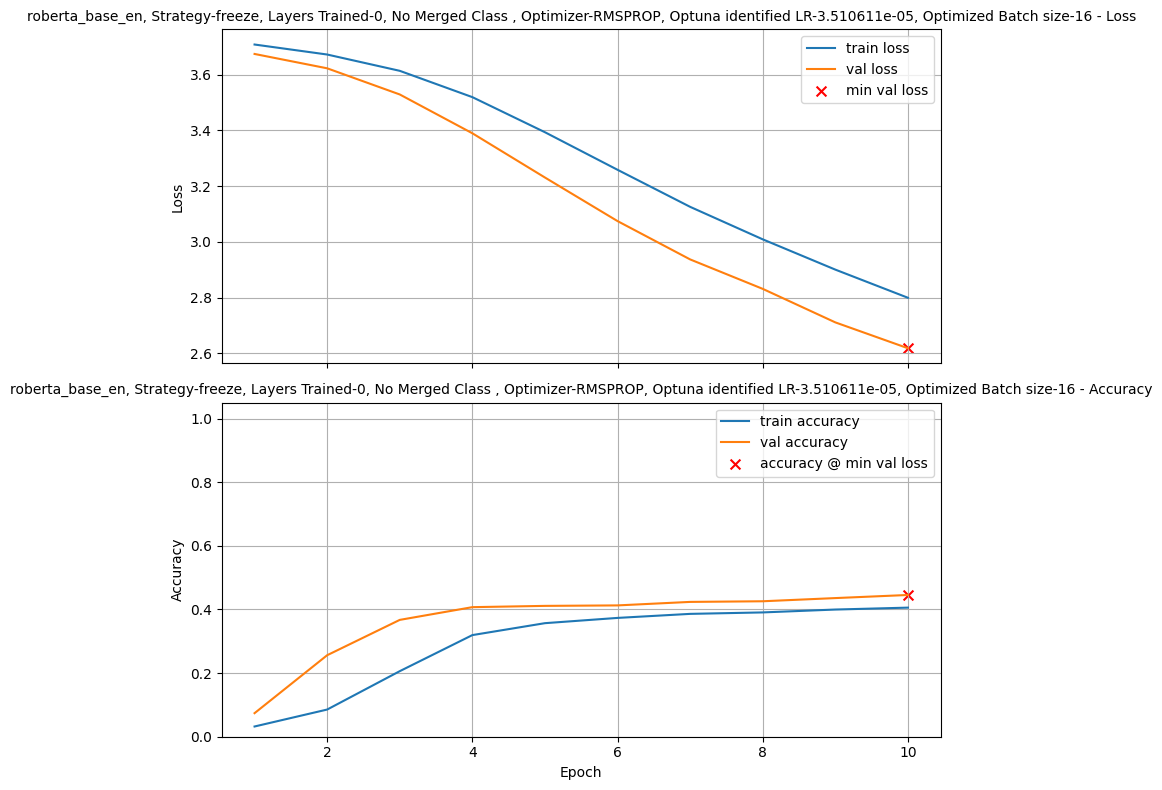

Final Training Loss:            2.7993
Final Training  accuracy:    0.4057
Final Validation Loss:          2.6182
Final Validation  accuracy:  0.4455
Min Validation Loss:            2.6182 (Epoch 10)
Accuracy @ Min Val Loss:      0.4455

Test metrics:
  loss: 2.6414
  accuracy: 0.4409

Execution Time: 7m 04s
Peak Memory Usage: 12978.31 MB

Generating final predictions for analysis purpose...


[I 2025-12-04 11:40:39,427] A new study created in memory with name: no-name-c4ce04ba-85f5-4274-aa43-50d75a53d9dd


Test accuracy: 0.4409
Test macro-F1: 0.3252

Per-Category Performance (Sorted by F1 Score)
----------------------------------------------------
LATINO VOICES                  | 0.000    | 22.0    
FIFTY                          | 0.048    | 27.0    
ARTS & CULTURE                 | 0.069    | 26.0    
BLACK VOICES                   | 0.086    | 91.0    
ARTS                           | 0.108    | 30.0    
COLLEGE                        | 0.120    | 23.0    
WORLD NEWS                     | 0.154    | 43.0    
BUSINESS                       | 0.165    | 119.0   
GOOD NEWS                      | 0.172    | 28.0    
EDUCATION                      | 0.176    | 20.0    
ENVIRONMENT                    | 0.182    | 26.0    
TASTE                          | 0.208    | 42.0    
COMEDY                         | 0.220    | 102.0   
IMPACT                         | 0.221    | 69.0    
WOMEN                          | 0.236    | 68.0    
WEIRD NEWS                     | 0.259    | 54.0    
CULTURE 

[I 2025-12-04 11:53:56,163] Trial 0 finished with value: 0.5720360279083252 and parameters: {'learning_rate': 1.8299445023112672e-06, 'batch_size': 8, 'optimizer': 'adamw', 'adamw_weight_decay': 0.000984420234986171}. Best is trial 0 with value: 0.5720360279083252.


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-04 12:04:54,037] Trial 1 finished with value: 0.04752376303076744 and parameters: {'learning_rate': 1.7786116454430527e-06, 'batch_size': 8, 'optimizer': 'sgd', 'sgd_momentum': 0.5768488476259133}. Best is trial 0 with value: 0.5720360279083252.


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-04 12:14:04,526] Trial 2 finished with value: 0.5842921733856201 and parameters: {'learning_rate': 4.8365362395148775e-06, 'batch_size': 32, 'optimizer': 'adamw', 'adamw_weight_decay': 1.378122233022239e-06}. Best is trial 2 with value: 0.5842921733856201.


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-04 12:26:36,514] Trial 3 finished with value: 0.5932966470718384 and parameters: {'learning_rate': 3.8492540335780375e-06, 'batch_size': 8, 'optimizer': 'adamw', 'adamw_weight_decay': 4.017491347603929e-05}. Best is trial 3 with value: 0.5932966470718384.


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-04 12:36:45,799] Trial 4 finished with value: 0.6240620017051697 and parameters: {'learning_rate': 2.1426613586874968e-05, 'batch_size': 16, 'optimizer': 'adam', 'adam_beta1': 0.8686709959648278, 'adam_beta2': 0.938000040762424}. Best is trial 4 with value: 0.6240620017051697.
[I 2025-12-04 12:36:45,803] A new study created in memory with name: no-name-61c18195-483a-4d7a-b1d5-766a06c14bbe


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-04 12:47:01,612] Trial 0 finished with value: 0.5847923755645752 and parameters: {'learning_rate': 3.56658146290562e-06, 'batch_size': 16, 'optimizer': 'adamw', 'adamw_weight_decay': 0.0001798704711841525}. Best is trial 0 with value: 0.5847923755645752.


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-04 13:00:03,034] Trial 1 finished with value: 0.5565282702445984 and parameters: {'learning_rate': 1.477286618455523e-06, 'batch_size': 8, 'optimizer': 'adamw', 'adamw_weight_decay': 0.008187957737220532}. Best is trial 0 with value: 0.5847923755645752.


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-04 13:09:13,150] Trial 2 finished with value: 0.014507253654301167 and parameters: {'learning_rate': 1.4833491691246562e-06, 'batch_size': 16, 'optimizer': 'sgd', 'sgd_momentum': 0.757627019924732}. Best is trial 0 with value: 0.5847923755645752.


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-04 13:18:30,100] Trial 3 finished with value: 0.5337668657302856 and parameters: {'learning_rate': 9.202933387341098e-05, 'batch_size': 16, 'optimizer': 'adagrad', 'adagrad_init_acc': 0.0067645331857722184}. Best is trial 0 with value: 0.5847923755645752.


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-04 13:26:52,234] Trial 4 finished with value: 0.5767883658409119 and parameters: {'learning_rate': 3.2730487341448645e-06, 'batch_size': 32, 'optimizer': 'rmsprop', 'rms_rho': 0.8014628261702849}. Best is trial 0 with value: 0.5847923755645752.



>>> Best Learning Rate: 3.566581e-06 (Val Acc: 0.5848)
>>> Best Optimizer: adamw    >>> Best Batch Size: 16
Re-training roberta_base_en with Best LR: 3.57e-06 for full epochs...
Strategy: PARTIAL (Unfroze 2/12 transformer layers).

=== roberta_base_en, Strategy-partial, Layers Trained-2, No Merged Class , Optimizer-ADAMW, Optuna identified LR-3.566581e-06, Optimized Batch size-16 ===

Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 218s 68ms/step - accuracy: 0.2286 - loss: 3.1656 - val_accuracy: 0.5445 - val_loss: 1.8641 - learning_rate: 3.5666e-06
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 92s 45ms/step - accuracy: 0.5201 - loss: 1.8562 - val_accuracy: 0.5615 - val_loss: 1.6378 - learning_rate: 3.5666e-06
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 94s 46ms/step - accuracy: 0.5655 - loss: 1.5317 - val_accuracy: 0.5783 - val_loss: 1.5466 - learning_rate: 3.5666e-06
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 92s 45ms/step - accuracy: 0.5882 - loss: 1.3335 - val_accuracy: 0.5870 - val_loss: 1.503

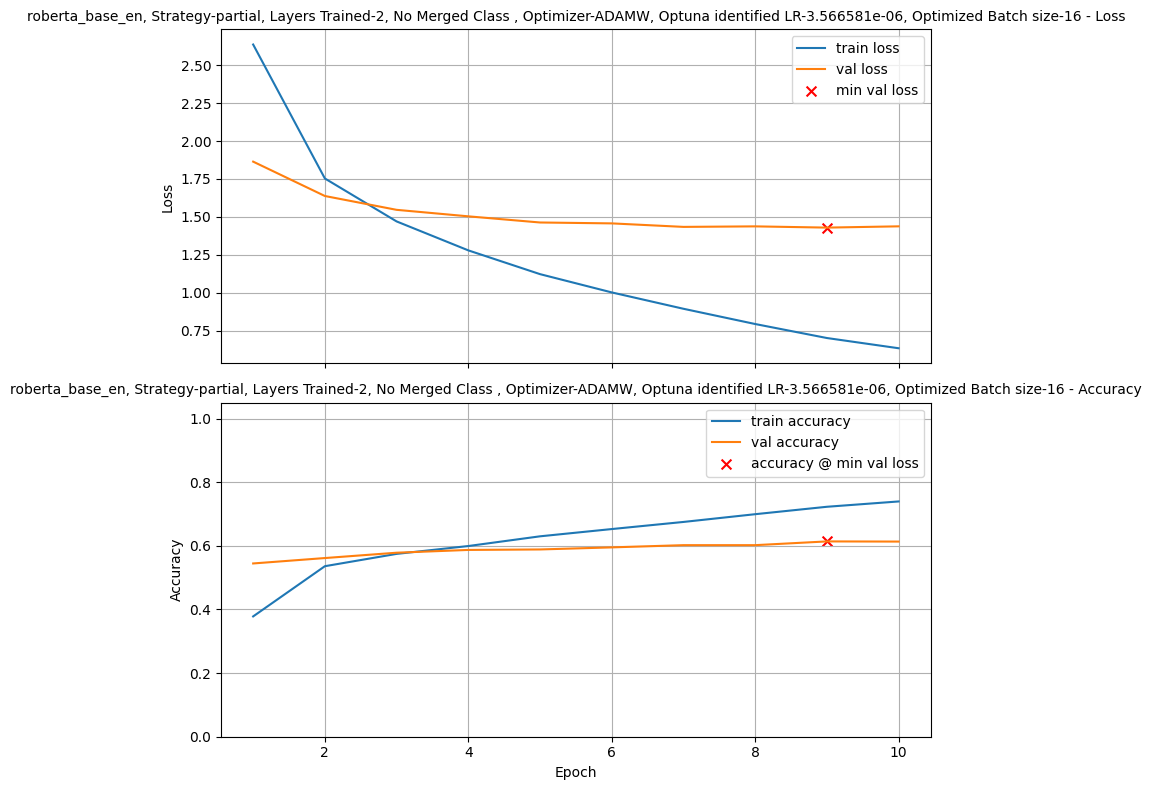

Final Training Loss:            0.6350
Final Training  accuracy:    0.7394
Final Validation Loss:          1.4379
Final Validation  accuracy:  0.6133
Min Validation Loss:            1.4296 (Epoch 9)
Accuracy @ Min Val Loss:      0.6138

Test metrics:
  loss: 1.4479
  accuracy: 0.6044

Execution Time: 17m 32s
Peak Memory Usage: 23902.84 MB

Generating final predictions for analysis purpose...


[I 2025-12-04 13:45:42,235] A new study created in memory with name: no-name-42f38ed4-decf-43ac-9b9d-9cbc748c123d


Test accuracy: 0.6044
Test macro-F1: 0.5333

Per-Category Performance (Sorted by F1 Score)
----------------------------------------------------
GOOD NEWS                      | 0.237    | 28.0    
WORLD NEWS                     | 0.273    | 43.0    
FIFTY                          | 0.297    | 27.0    
CULTURE & ARTS                 | 0.316    | 20.0    
ARTS                           | 0.324    | 30.0    
LATINO VOICES                  | 0.328    | 22.0    
COMEDY                         | 0.369    | 102.0   
IMPACT                         | 0.393    | 69.0    
WOMEN                          | 0.395    | 68.0    
GREEN                          | 0.413    | 53.0    
EDUCATION                      | 0.419    | 20.0    
ARTS & CULTURE                 | 0.436    | 26.0    
BLACK VOICES                   | 0.447    | 91.0    
TASTE                          | 0.454    | 42.0    
BUSINESS                       | 0.472    | 119.0   
WEIRD NEWS                     | 0.473    | 54.0    
PARENTS 

[I 2025-12-04 13:54:28,209] Trial 0 finished with value: 0.5637819170951843 and parameters: {'learning_rate': 6.770349159617199e-05, 'batch_size': 32, 'optimizer': 'adam', 'adam_beta1': 0.9828966616935261, 'adam_beta2': 0.9400647534588312}. Best is trial 0 with value: 0.5637819170951843.


Strategy: FULL (all layers trainable).


[I 2025-12-04 14:03:14,049] Trial 1 finished with value: 0.5932966470718384 and parameters: {'learning_rate': 2.705003783575669e-05, 'batch_size': 32, 'optimizer': 'adamw', 'adamw_weight_decay': 2.3623445839225115e-06}. Best is trial 1 with value: 0.5932966470718384.


Strategy: FULL (all layers trainable).


[I 2025-12-04 14:12:03,538] Trial 2 finished with value: 0.011255627498030663 and parameters: {'learning_rate': 6.65480756877091e-05, 'batch_size': 32, 'optimizer': 'adamw', 'adamw_weight_decay': 0.00024109130869237347}. Best is trial 1 with value: 0.5932966470718384.


Strategy: FULL (all layers trainable).


[I 2025-12-04 14:21:01,990] Trial 3 finished with value: 0.017008503898978233 and parameters: {'learning_rate': 4.01127062212305e-06, 'batch_size': 16, 'optimizer': 'sgd', 'sgd_momentum': 0.5164534755498377}. Best is trial 1 with value: 0.5932966470718384.


Strategy: FULL (all layers trainable).


[I 2025-12-04 14:30:42,854] Trial 4 finished with value: 0.6258128881454468 and parameters: {'learning_rate': 9.548038990378374e-06, 'batch_size': 16, 'optimizer': 'rmsprop', 'rms_rho': 0.8050497100136174}. Best is trial 4 with value: 0.6258128881454468.
[I 2025-12-04 14:30:42,859] A new study created in memory with name: no-name-0455e171-41ed-4eed-877c-a857836a0e30


Strategy: FULL (all layers trainable).


[I 2025-12-04 14:40:08,811] Trial 0 finished with value: 0.595297634601593 and parameters: {'learning_rate': 4.473457270190226e-06, 'batch_size': 16, 'optimizer': 'rmsprop', 'rms_rho': 0.9159107055912356}. Best is trial 0 with value: 0.595297634601593.


Strategy: FULL (all layers trainable).


[I 2025-12-04 14:48:08,269] Trial 1 finished with value: 0.016758378595113754 and parameters: {'learning_rate': 9.148416106088823e-06, 'batch_size': 32, 'optimizer': 'sgd', 'sgd_momentum': 0.08922695328686818}. Best is trial 0 with value: 0.595297634601593.


Strategy: FULL (all layers trainable).


[I 2025-12-04 14:57:31,862] Trial 2 finished with value: 0.016508253291249275 and parameters: {'learning_rate': 2.2133492198552157e-06, 'batch_size': 16, 'optimizer': 'adagrad', 'adagrad_init_acc': 0.00010485458174646115}. Best is trial 0 with value: 0.595297634601593.


Strategy: FULL (all layers trainable).


[I 2025-12-04 15:10:21,656] Trial 3 finished with value: 0.013006503693759441 and parameters: {'learning_rate': 8.110997715174743e-05, 'batch_size': 8, 'optimizer': 'adamw', 'adamw_weight_decay': 0.00015577354430789268}. Best is trial 0 with value: 0.595297634601593.


Strategy: FULL (all layers trainable).


[I 2025-12-04 15:19:06,511] Trial 4 finished with value: 0.5912956595420837 and parameters: {'learning_rate': 3.81535951272513e-05, 'batch_size': 32, 'optimizer': 'adamw', 'adamw_weight_decay': 0.00011151337440401266}. Best is trial 0 with value: 0.595297634601593.



>>> Best Learning Rate: 4.473457e-06 (Val Acc: 0.5953)
>>> Best Optimizer: rmsprop    >>> Best Batch Size: 16
Re-training roberta_base_en with Best LR: 4.47e-06 for full epochs...
Strategy: FULL (all layers trainable).

=== roberta_base_en, Strategy-full, Layers Trained-All, No Merged Class , Optimizer-RMSPROP, Optuna identified LR-4.473457e-06, Optimized Batch size-16 ===

Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 194s 64ms/step - accuracy: 0.1459 - loss: 3.4404 - val_accuracy: 0.5190 - val_loss: 1.9980 - learning_rate: 4.4735e-06
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 83s 41ms/step - accuracy: 0.5119 - loss: 1.9941 - val_accuracy: 0.5618 - val_loss: 1.6510 - learning_rate: 4.4735e-06
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 83s 41ms/step - accuracy: 0.5586 - loss: 1.5965 - val_accuracy: 0.5743 - val_loss: 1.5238 - learning_rate: 4.4735e-06
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.5896 - loss: 1.3755 - val_accuracy: 0.5940 - val_loss: 1.4462 - learnin

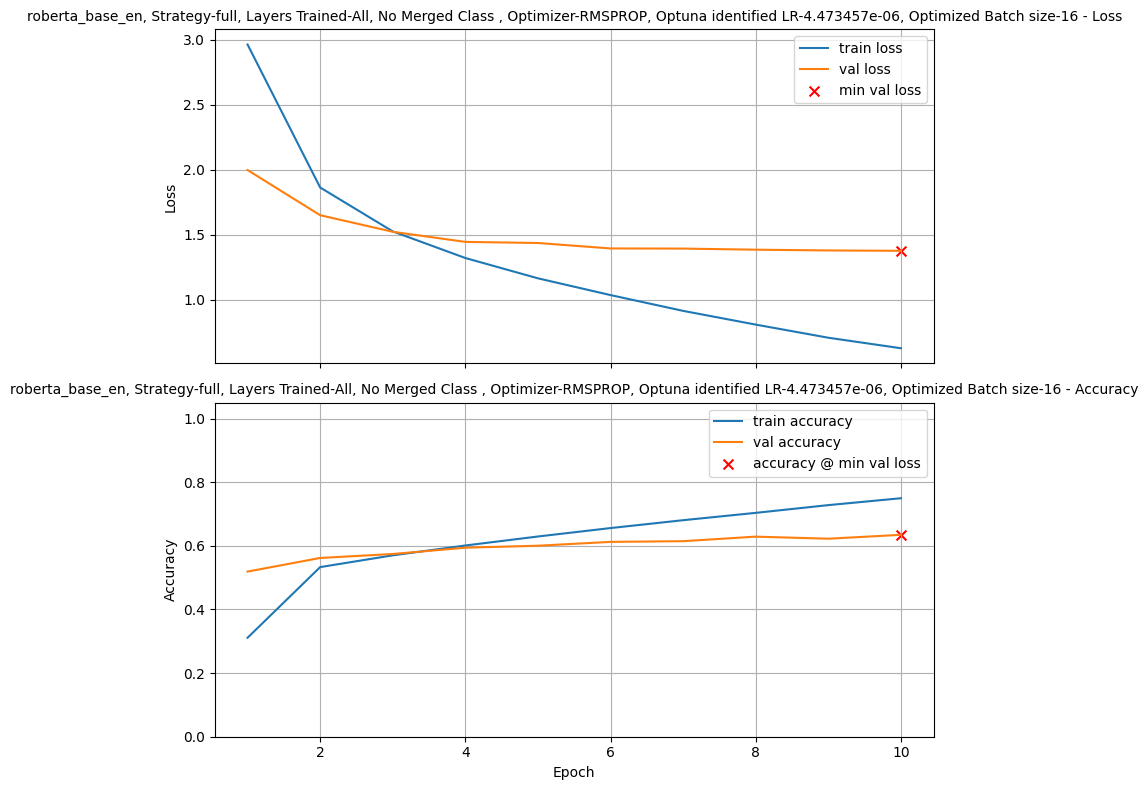

Final Training Loss:            0.6294
Final Training  accuracy:    0.7495
Final Validation Loss:          1.3775
Final Validation  accuracy:  0.6346
Min Validation Loss:            1.3775 (Epoch 10)
Accuracy @ Min Val Loss:      0.6346

Test metrics:
  loss: 1.3957
  accuracy: 0.6252

Execution Time: 15m 49s
Peak Memory Usage: 33113.17 MB

Generating final predictions for analysis purpose...


[I 2025-12-04 15:36:06,771] A new study created in memory with name: no-name-f2f75681-0eb7-41ec-89e5-c385759c7a76


Test accuracy: 0.6252
Test macro-F1: 0.5512

Per-Category Performance (Sorted by F1 Score)
----------------------------------------------------
GOOD NEWS                      | 0.267    | 28.0    
WORLD NEWS                     | 0.272    | 43.0    
FIFTY                          | 0.313    | 27.0    
CULTURE & ARTS                 | 0.353    | 20.0    
ARTS                           | 0.366    | 30.0    
EDUCATION                      | 0.385    | 20.0    
WOMEN                          | 0.398    | 68.0    
LATINO VOICES                  | 0.408    | 22.0    
IMPACT                         | 0.411    | 69.0    
WEIRD NEWS                     | 0.425    | 54.0    
GREEN                          | 0.439    | 53.0    
COMEDY                         | 0.448    | 102.0   
TASTE                          | 0.460    | 42.0    
PARENTS                        | 0.468    | 78.0    
BLACK VOICES                   | 0.482    | 91.0    
HEALTHY LIVING                 | 0.500    | 134.0   
BUSINESS

100%|██████████| 462/462 [00:00<00:00, 876kB/s]


100%|██████████| 794/794 [00:00<00:00, 1.29MB/s]


100%|██████████| 226k/226k [00:00<00:00, 273kB/s]


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 15:38:30,892] Trial 0 finished with value: 0.44397199153900146 and parameters: {'learning_rate': 1.540254778326871e-05, 'batch_size': 32, 'optimizer': 'rmsprop', 'rms_rho': 0.9406348089679166}. Best is trial 0 with value: 0.44397199153900146.


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 15:40:32,287] Trial 1 finished with value: 0.48824411630630493 and parameters: {'learning_rate': 7.810777816486084e-05, 'batch_size': 32, 'optimizer': 'rmsprop', 'rms_rho': 0.8016815812759563}. Best is trial 1 with value: 0.48824411630630493.


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 15:42:47,519] Trial 2 finished with value: 0.44122061133384705 and parameters: {'learning_rate': 2.7027415234606814e-05, 'batch_size': 32, 'optimizer': 'adamw', 'adamw_weight_decay': 2.182459195130022e-05}. Best is trial 1 with value: 0.48824411630630493.


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 15:44:47,800] Trial 3 finished with value: 0.4312156140804291 and parameters: {'learning_rate': 9.04607205659261e-06, 'batch_size': 32, 'optimizer': 'adamw', 'adamw_weight_decay': 0.0012785933540497584}. Best is trial 1 with value: 0.48824411630630493.


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 15:47:09,109] Trial 4 finished with value: 0.031015507876873016 and parameters: {'learning_rate': 1.8517549454893154e-06, 'batch_size': 16, 'optimizer': 'sgd', 'sgd_momentum': 0.8851802855145409}. Best is trial 1 with value: 0.48824411630630493.
[I 2025-12-04 15:47:09,112] A new study created in memory with name: no-name-99b03087-0f8a-407f-a292-acefafce58bd


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 15:50:17,694] Trial 0 finished with value: 0.07453726977109909 and parameters: {'learning_rate': 3.0456921681306666e-05, 'batch_size': 8, 'optimizer': 'sgd', 'sgd_momentum': 0.44016767222242015}. Best is trial 0 with value: 0.07453726977109909.


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 15:52:16,336] Trial 1 finished with value: 0.38719359040260315 and parameters: {'learning_rate': 2.6022937774875884e-06, 'batch_size': 32, 'optimizer': 'adam', 'adam_beta1': 0.8000625349017697, 'adam_beta2': 0.9622202909805367}. Best is trial 1 with value: 0.38719359040260315.


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 15:54:15,488] Trial 2 finished with value: 0.4297148585319519 and parameters: {'learning_rate': 7.297926514547583e-06, 'batch_size': 32, 'optimizer': 'adam', 'adam_beta1': 0.9677784412069107, 'adam_beta2': 0.9599719350638642}. Best is trial 2 with value: 0.4297148585319519.


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 15:56:30,264] Trial 3 finished with value: 0.09129564464092255 and parameters: {'learning_rate': 1.8703610217106927e-05, 'batch_size': 16, 'optimizer': 'sgd', 'sgd_momentum': 0.8957266198461281}. Best is trial 2 with value: 0.4297148585319519.


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 15:59:32,885] Trial 4 finished with value: 0.4897448718547821 and parameters: {'learning_rate': 4.682992090254073e-05, 'batch_size': 8, 'optimizer': 'adamw', 'adamw_weight_decay': 0.006236698622297245}. Best is trial 4 with value: 0.4897448718547821.



>>> Best Learning Rate: 4.682992e-05 (Val Acc: 0.4897)
>>> Best Optimizer: adamw    >>> Best Batch Size: 8
Re-training distil_bert_base_en_uncased with Best LR: 4.68e-05 for full epochs...
Strategy: FREEZE (backbone frozen).

=== distil_bert_base_en_uncased, Strategy-freeze, Layers Trained-0, No Merged Class , Optimizer-ADAMW, Optuna identified LR-4.682992e-05, Optimized Batch size-8 ===

Epoch 1/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 63s 11ms/step - accuracy: 0.2071 - loss: 3.4373 - val_accuracy: 0.4425 - val_loss: 2.4409 - learning_rate: 4.6830e-05
Epoch 2/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.3964 - loss: 2.4886 - val_accuracy: 0.4640 - val_loss: 2.0979 - learning_rate: 4.6830e-05
Epoch 3/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.4156 - loss: 2.1808 - val_accuracy: 0.4737 - val_loss: 1.9579 - learning_rate: 4.6830e-05
Epoch 4/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.4332 - loss: 2.0359 - val_accuracy: 0.4832 - val_loss: 1.882

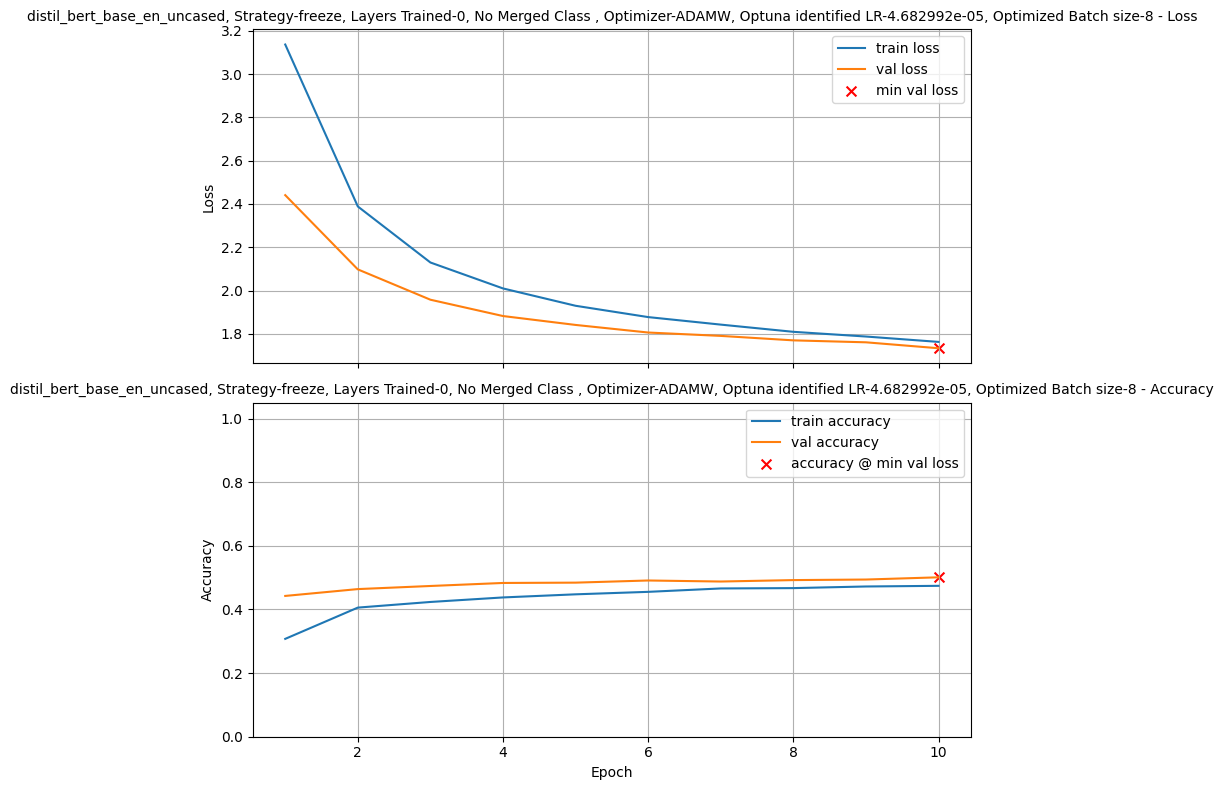

Final Training Loss:            1.7630
Final Training  accuracy:    0.4742
Final Validation Loss:          1.7337
Final Validation  accuracy:  0.5010
Min Validation Loss:            1.7337 (Epoch 10)
Accuracy @ Min Val Loss:      0.5010

Test metrics:
  loss: 1.7393
  accuracy: 0.5104

Execution Time: 4m 57s
Peak Memory Usage: 35592.32 MB

Generating final predictions for analysis purpose...


[I 2025-12-04 16:05:26,355] A new study created in memory with name: no-name-00e8f777-3a90-406d-9495-ec3b94ec80c7


Test accuracy: 0.5104
Test macro-F1: 0.4394

Per-Category Performance (Sorted by F1 Score)
----------------------------------------------------
FIFTY                          | 0.112    | 27.0    
GOOD NEWS                      | 0.237    | 28.0    
WORLD NEWS                     | 0.241    | 43.0    
ARTS                           | 0.264    | 30.0    
ARTS & CULTURE                 | 0.275    | 26.0    
CULTURE & ARTS                 | 0.290    | 20.0    
TASTE                          | 0.297    | 42.0    
COMEDY                         | 0.305    | 102.0   
IMPACT                         | 0.309    | 69.0    
WOMEN                          | 0.331    | 68.0    
WEIRD NEWS                     | 0.331    | 54.0    
PARENTS                        | 0.339    | 78.0    
COLLEGE                        | 0.353    | 23.0    
EDUCATION                      | 0.358    | 20.0    
BLACK VOICES                   | 0.377    | 91.0    
MEDIA                          | 0.384    | 56.0    
LATINO V

[I 2025-12-04 16:11:34,495] Trial 0 finished with value: 0.02076037973165512 and parameters: {'learning_rate': 7.034773528529067e-06, 'batch_size': 8, 'optimizer': 'adagrad', 'adagrad_init_acc': 0.0024232836432492954}. Best is trial 0 with value: 0.02076037973165512.


Strategy: PARTIAL (Unfroze 2/6 transformer layers).


[I 2025-12-04 16:17:48,351] Trial 1 finished with value: 0.6263131499290466 and parameters: {'learning_rate': 1.3399793578114585e-05, 'batch_size': 8, 'optimizer': 'rmsprop', 'rms_rho': 0.9156141787497066}. Best is trial 1 with value: 0.6263131499290466.


Strategy: PARTIAL (Unfroze 2/6 transformer layers).


[I 2025-12-04 16:23:32,476] Trial 2 finished with value: 0.3961980938911438 and parameters: {'learning_rate': 1.6485417919783163e-05, 'batch_size': 8, 'optimizer': 'sgd', 'sgd_momentum': 0.9140314978604698}. Best is trial 1 with value: 0.6263131499290466.


Strategy: PARTIAL (Unfroze 2/6 transformer layers).


[I 2025-12-04 16:27:54,941] Trial 3 finished with value: 0.600300133228302 and parameters: {'learning_rate': 8.640829119876118e-05, 'batch_size': 32, 'optimizer': 'rmsprop', 'rms_rho': 0.9385919409578858}. Best is trial 1 with value: 0.6263131499290466.


Strategy: PARTIAL (Unfroze 2/6 transformer layers).


[I 2025-12-04 16:32:11,791] Trial 4 finished with value: 0.037518758326768875 and parameters: {'learning_rate': 1.8716409119665847e-06, 'batch_size': 32, 'optimizer': 'adagrad', 'adagrad_init_acc': 2.1865705957678473e-06}. Best is trial 1 with value: 0.6263131499290466.
[I 2025-12-04 16:32:11,793] A new study created in memory with name: no-name-9a9d799f-6e02-46d9-b89a-32d01306e32f


Strategy: PARTIAL (Unfroze 2/6 transformer layers).


[I 2025-12-04 16:36:39,574] Trial 0 finished with value: 0.4709855020046234 and parameters: {'learning_rate': 1.0983629590440816e-06, 'batch_size': 32, 'optimizer': 'adamw', 'adamw_weight_decay': 0.003200678300702777}. Best is trial 0 with value: 0.4709855020046234.


Strategy: PARTIAL (Unfroze 2/6 transformer layers).


[I 2025-12-04 16:42:53,442] Trial 1 finished with value: 0.011005503125488758 and parameters: {'learning_rate': 1.0299778857395815e-06, 'batch_size': 8, 'optimizer': 'adagrad', 'adagrad_init_acc': 1.1954530765226784e-08}. Best is trial 0 with value: 0.4709855020046234.


Strategy: PARTIAL (Unfroze 2/6 transformer layers).


[I 2025-12-04 16:49:28,637] Trial 2 finished with value: 0.5987994074821472 and parameters: {'learning_rate': 2.9423457428647145e-05, 'batch_size': 8, 'optimizer': 'adamw', 'adamw_weight_decay': 3.469792144297783e-06}. Best is trial 2 with value: 0.5987994074821472.


100%|██████████| 253M/253M [00:17<00:00, 15.3MB/s]


Strategy: PARTIAL (Unfroze 2/6 transformer layers).


[I 2025-12-04 16:53:54,225] Trial 3 finished with value: 0.02076037973165512 and parameters: {'learning_rate': 3.5972975758897076e-05, 'batch_size': 32, 'optimizer': 'sgd', 'sgd_momentum': 0.045480741870602436}. Best is trial 2 with value: 0.5987994074821472.


Strategy: PARTIAL (Unfroze 2/6 transformer layers).


[I 2025-12-04 16:58:30,325] Trial 4 finished with value: 0.01775887981057167 and parameters: {'learning_rate': 1.3008497818761539e-06, 'batch_size': 16, 'optimizer': 'sgd', 'sgd_momentum': 0.2980972695067201}. Best is trial 2 with value: 0.5987994074821472.



>>> Best Learning Rate: 2.942346e-05 (Val Acc: 0.5988)
>>> Best Optimizer: adamw    >>> Best Batch Size: 8
Re-training distil_bert_base_en_uncased with Best LR: 2.94e-05 for full epochs...
Strategy: PARTIAL (Unfroze 2/6 transformer layers).

=== distil_bert_base_en_uncased, Strategy-partial, Layers Trained-2, No Merged Class , Optimizer-ADAMW, Optuna identified LR-2.942346e-05, Optimized Batch size-8 ===

Epoch 1/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 138s 22ms/step - accuracy: 0.3587 - loss: 2.6250 - val_accuracy: 0.5495 - val_loss: 1.6141 - learning_rate: 2.9423e-05
Epoch 2/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 60s 15ms/step - accuracy: 0.5852 - loss: 1.3832 - val_accuracy: 0.5700 - val_loss: 1.5232 - learning_rate: 2.9423e-05
Epoch 3/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 60s 15ms/step - accuracy: 0.6802 - loss: 0.9092 - val_accuracy: 0.5948 - val_loss: 1.5082 - learning_rate: 2.9423e-05
Epoch 4/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 60s 15ms/step - accuracy: 0.7551 - loss: 0.6102 - val_accuracy: 0.5

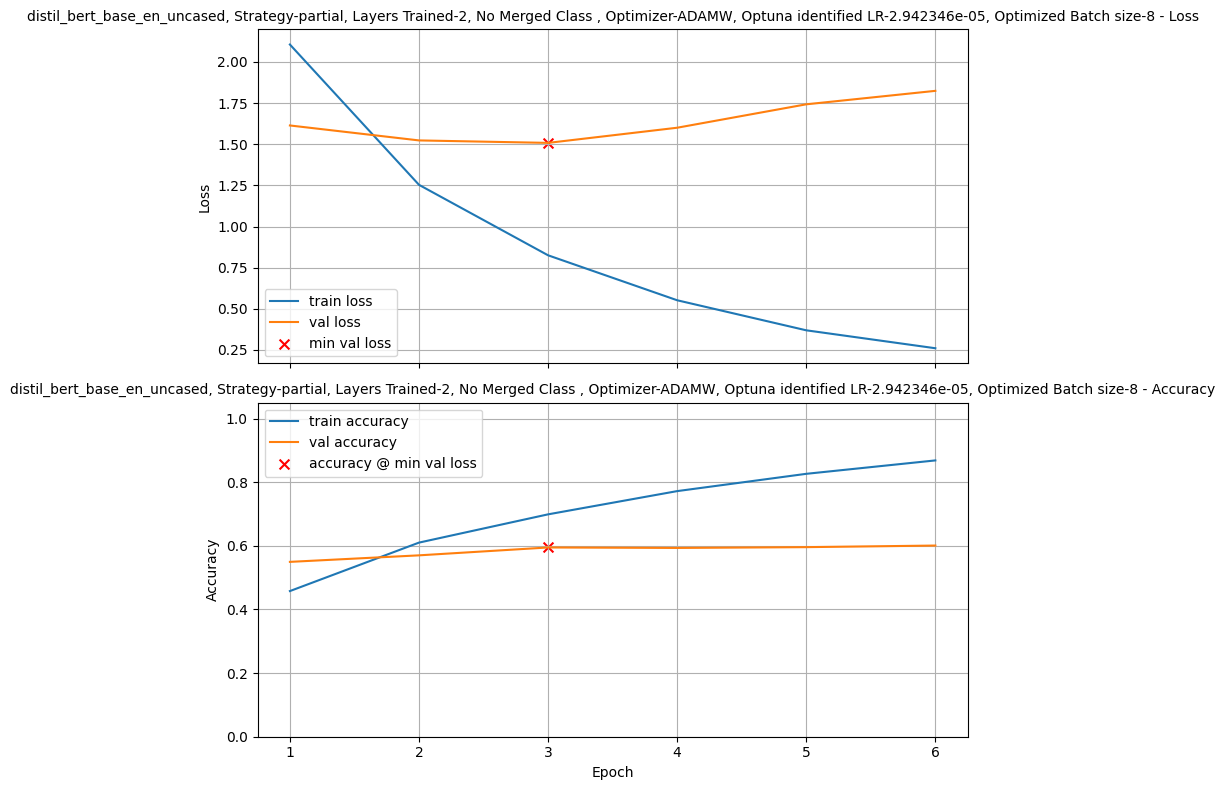

Final Training Loss:            0.2602
Final Training  accuracy:    0.8684
Final Validation Loss:          1.8245
Final Validation  accuracy:  0.6008
Min Validation Loss:            1.5082 (Epoch 3)
Accuracy @ Min Val Loss:      0.5948

Test metrics:
  loss: 1.4955
  accuracy: 0.5889

Execution Time: 7m 18s
Peak Memory Usage: 40163.69 MB

Generating final predictions for analysis purpose...


[I 2025-12-04 17:06:36,104] A new study created in memory with name: no-name-5f1c6d14-3d4d-491e-bf9c-07cc962676ad


Test accuracy: 0.5889
Test macro-F1: 0.5161

Per-Category Performance (Sorted by F1 Score)
----------------------------------------------------
FIFTY                          | 0.179    | 27.0    
GOOD NEWS                      | 0.214    | 28.0    
THE WORLDPOST                  | 0.299    | 74.0    
WORLD NEWS                     | 0.314    | 43.0    
CULTURE & ARTS                 | 0.324    | 20.0    
ARTS & CULTURE                 | 0.378    | 26.0    
WEIRD NEWS                     | 0.379    | 54.0    
IMPACT                         | 0.385    | 69.0    
WOMEN                          | 0.387    | 68.0    
COLLEGE                        | 0.400    | 23.0    
LATINO VOICES                  | 0.400    | 22.0    
BLACK VOICES                   | 0.405    | 91.0    
PARENTS                        | 0.410    | 78.0    
TASTE                          | 0.421    | 42.0    
GREEN                          | 0.424    | 53.0    
COMEDY                         | 0.443    | 102.0   
HEALTHY 

[I 2025-12-04 17:13:01,380] Trial 0 finished with value: 0.5970485210418701 and parameters: {'learning_rate': 6.522056159848589e-06, 'batch_size': 8, 'optimizer': 'adam', 'adam_beta1': 0.8800655698947365, 'adam_beta2': 0.9212380104952811}. Best is trial 0 with value: 0.5970485210418701.


Strategy: FULL (all layers trainable).


[I 2025-12-04 17:19:24,683] Trial 1 finished with value: 0.6163081526756287 and parameters: {'learning_rate': 1.551550642677673e-05, 'batch_size': 8, 'optimizer': 'rmsprop', 'rms_rho': 0.8996389426774827}. Best is trial 1 with value: 0.6163081526756287.


Strategy: FULL (all layers trainable).


[I 2025-12-04 17:25:45,258] Trial 2 finished with value: 0.6148074269294739 and parameters: {'learning_rate': 1.0621642014681083e-05, 'batch_size': 8, 'optimizer': 'rmsprop', 'rms_rho': 0.8466880540044479}. Best is trial 1 with value: 0.6163081526756287.


Strategy: FULL (all layers trainable).


[I 2025-12-04 17:30:46,151] Trial 3 finished with value: 0.5492746233940125 and parameters: {'learning_rate': 5.434081473415101e-06, 'batch_size': 16, 'optimizer': 'adam', 'adam_beta1': 0.9803044519374889, 'adam_beta2': 0.9176410785726963}. Best is trial 1 with value: 0.6163081526756287.


Strategy: FULL (all layers trainable).


[I 2025-12-04 17:37:04,734] Trial 4 finished with value: 0.043771885335445404 and parameters: {'learning_rate': 2.0939578959713325e-06, 'batch_size': 8, 'optimizer': 'adagrad', 'adagrad_init_acc': 0.0007618797664558347}. Best is trial 1 with value: 0.6163081526756287.
[I 2025-12-04 17:37:04,736] A new study created in memory with name: no-name-da2fc27e-a568-4bce-9d18-d463d01a93ca


Strategy: FULL (all layers trainable).


[I 2025-12-04 17:42:05,727] Trial 0 finished with value: 0.5015007257461548 and parameters: {'learning_rate': 1.239527973759774e-06, 'batch_size': 16, 'optimizer': 'rmsprop', 'rms_rho': 0.9865815585742707}. Best is trial 0 with value: 0.5015007257461548.


Strategy: FULL (all layers trainable).


[I 2025-12-04 17:46:56,167] Trial 1 finished with value: 0.30390194058418274 and parameters: {'learning_rate': 1.2588131758350897e-05, 'batch_size': 16, 'optimizer': 'adagrad', 'adagrad_init_acc': 1.3902636432549221e-05}. Best is trial 0 with value: 0.5015007257461548.


Strategy: FULL (all layers trainable).


[I 2025-12-04 17:51:16,843] Trial 2 finished with value: 0.3249124586582184 and parameters: {'learning_rate': 5.280906234872776e-06, 'batch_size': 16, 'optimizer': 'sgd', 'sgd_momentum': 0.9761441750498728}. Best is trial 0 with value: 0.5015007257461548.


Strategy: FULL (all layers trainable).


[I 2025-12-04 17:55:55,001] Trial 3 finished with value: 0.6258128881454468 and parameters: {'learning_rate': 2.530830172584571e-05, 'batch_size': 16, 'optimizer': 'rmsprop', 'rms_rho': 0.9558862934005072}. Best is trial 3 with value: 0.6258128881454468.


Strategy: FULL (all layers trainable).


[I 2025-12-04 18:01:53,795] Trial 4 finished with value: 0.6275637745857239 and parameters: {'learning_rate': 1.857803273121108e-05, 'batch_size': 8, 'optimizer': 'rmsprop', 'rms_rho': 0.8004120421049211}. Best is trial 4 with value: 0.6275637745857239.



>>> Best Learning Rate: 1.857803e-05 (Val Acc: 0.6276)
>>> Best Optimizer: rmsprop    >>> Best Batch Size: 8
Re-training distil_bert_base_en_uncased with Best LR: 1.86e-05 for full epochs...
Strategy: FULL (all layers trainable).

=== distil_bert_base_en_uncased, Strategy-full, Layers Trained-All, No Merged Class , Optimizer-RMSPROP, Optuna identified LR-1.857803e-05, Optimized Batch size-8 ===

Epoch 1/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 129s 22ms/step - accuracy: 0.3756 - loss: 2.9626 - val_accuracy: 0.5735 - val_loss: 1.5070 - learning_rate: 1.8578e-05
Epoch 2/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 56s 14ms/step - accuracy: 0.5758 - loss: 1.6243 - val_accuracy: 0.6161 - val_loss: 1.4024 - learning_rate: 1.8578e-05
Epoch 3/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 55s 14ms/step - accuracy: 0.6417 - loss: 1.2333 - val_accuracy: 0.6246 - val_loss: 1.4870 - learning_rate: 1.8578e-05
Epoch 4/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 55s 14ms/step - accuracy: 0.6944 - loss: 0.9508 - val_accuracy: 0.6173 - val_

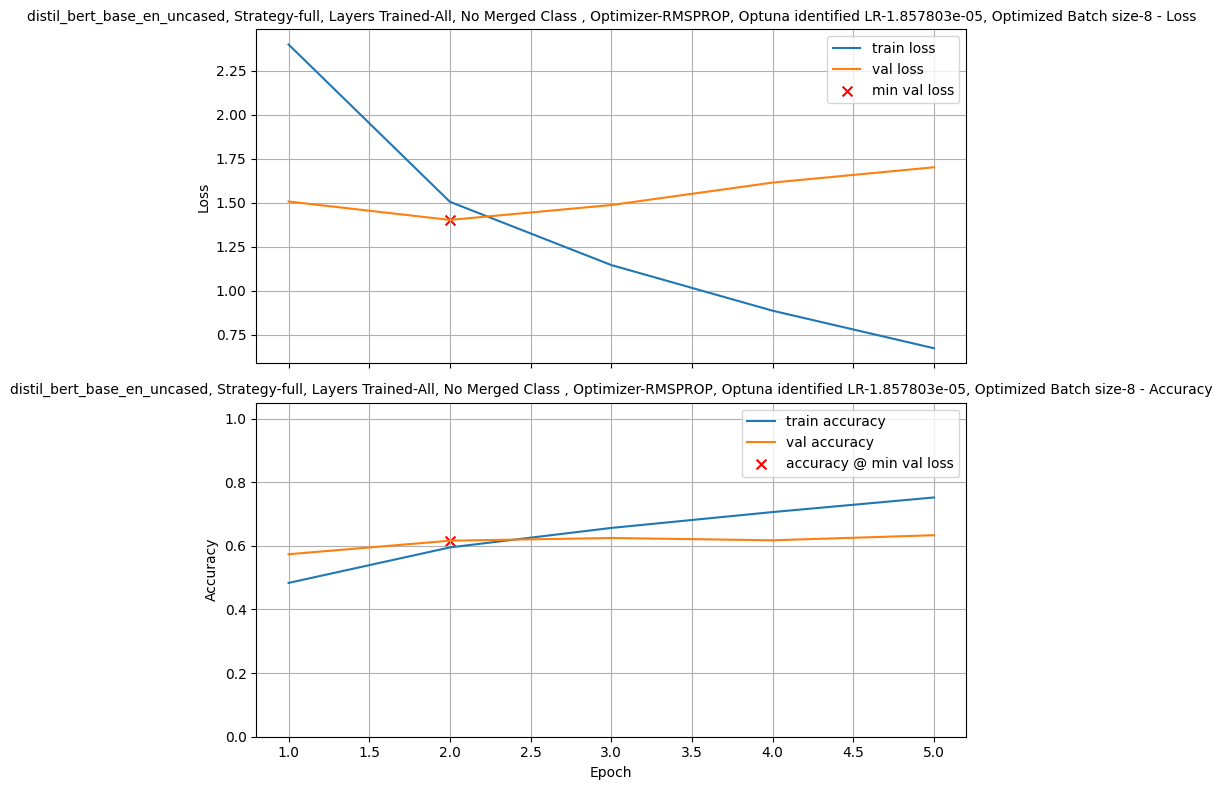

Final Training Loss:            0.6728
Final Training  accuracy:    0.7520
Final Validation Loss:          1.7018
Final Validation  accuracy:  0.6333
Min Validation Loss:            1.4024 (Epoch 2)
Accuracy @ Min Val Loss:      0.6161

Test metrics:
  loss: 1.3908
  accuracy: 0.6184

Execution Time: 5m 51s
Peak Memory Usage: 44782.16 MB

Generating final predictions for analysis purpose...


[I 2025-12-04 18:08:34,573] A new study created in memory with name: no-name-3ddb5f4d-ef4f-469d-bc68-a9db34f9e300


Test accuracy: 0.6184
Test macro-F1: 0.5094

Per-Category Performance (Sorted by F1 Score)
----------------------------------------------------
TASTE                          | 0.043    | 42.0    
WORLD NEWS                     | 0.164    | 43.0    
FIFTY                          | 0.171    | 27.0    
CULTURE & ARTS                 | 0.294    | 20.0    
GOOD NEWS                      | 0.314    | 28.0    
GREEN                          | 0.326    | 53.0    
ARTS & CULTURE                 | 0.333    | 26.0    
PARENTS                        | 0.343    | 78.0    
WOMEN                          | 0.353    | 68.0    
WEIRD NEWS                     | 0.359    | 54.0    
IMPACT                         | 0.369    | 69.0    
ARTS                           | 0.407    | 30.0    
COMEDY                         | 0.425    | 102.0   
EDUCATION                      | 0.429    | 20.0    
LATINO VOICES                  | 0.429    | 22.0    
ENVIRONMENT                    | 0.448    | 26.0    
BUSINESS

[I 2025-12-04 18:13:01,194] Trial 0 finished with value: 0.049274638295173645 and parameters: {'learning_rate': 1.100872177374986e-06, 'batch_size': 8, 'optimizer': 'adamw', 'adamw_weight_decay': 0.00023440352644917787}. Best is trial 0 with value: 0.049274638295173645.


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 18:16:22,769] Trial 1 finished with value: 0.23361681401729584 and parameters: {'learning_rate': 1.9038667576719646e-05, 'batch_size': 16, 'optimizer': 'rmsprop', 'rms_rho': 0.8680124252012493}. Best is trial 1 with value: 0.23361681401729584.


100%|██████████| 418M/418M [00:27<00:00, 16.0MB/s]


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 18:19:49,512] Trial 2 finished with value: 0.013256628066301346 and parameters: {'learning_rate': 2.5354051160063326e-05, 'batch_size': 32, 'optimizer': 'sgd', 'sgd_momentum': 0.15465859279029756}. Best is trial 1 with value: 0.23361681401729584.


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 18:22:44,779] Trial 3 finished with value: 0.07103551924228668 and parameters: {'learning_rate': 3.900535832920744e-06, 'batch_size': 32, 'optimizer': 'rmsprop', 'rms_rho': 0.9573038371034053}. Best is trial 1 with value: 0.23361681401729584.


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 18:25:39,691] Trial 4 finished with value: 0.014507253654301167 and parameters: {'learning_rate': 3.6767969182638036e-05, 'batch_size': 32, 'optimizer': 'adagrad', 'adagrad_init_acc': 0.0007270001008854369}. Best is trial 1 with value: 0.23361681401729584.
[I 2025-12-04 18:25:39,694] A new study created in memory with name: no-name-5290d4e8-2ae6-4f34-a504-ea021a23db51


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 18:30:01,887] Trial 0 finished with value: 0.0300150066614151 and parameters: {'learning_rate': 1.1889505517732958e-06, 'batch_size': 8, 'optimizer': 'adagrad', 'adagrad_init_acc': 0.0051285641904002255}. Best is trial 0 with value: 0.0300150066614151.


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 18:34:26,990] Trial 1 finished with value: 0.23036518692970276 and parameters: {'learning_rate': 8.898007333713005e-06, 'batch_size': 8, 'optimizer': 'rmsprop', 'rms_rho': 0.8237315901668697}. Best is trial 1 with value: 0.23036518692970276.


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 18:37:23,355] Trial 2 finished with value: 0.019509755074977875 and parameters: {'learning_rate': 5.433823926592897e-06, 'batch_size': 32, 'optimizer': 'sgd', 'sgd_momentum': 0.7542752036350235}. Best is trial 1 with value: 0.23036518692970276.


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 18:40:47,583] Trial 3 finished with value: 0.05277638882398605 and parameters: {'learning_rate': 1.2846918272556888e-06, 'batch_size': 16, 'optimizer': 'rmsprop', 'rms_rho': 0.9139991584342004}. Best is trial 1 with value: 0.23036518692970276.


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 18:44:12,503] Trial 4 finished with value: 0.26138070225715637 and parameters: {'learning_rate': 4.4207708806894796e-05, 'batch_size': 16, 'optimizer': 'adam', 'adam_beta1': 0.9350146223684743, 'adam_beta2': 0.9668894361674176}. Best is trial 4 with value: 0.26138070225715637.



>>> Best Learning Rate: 4.420771e-05 (Val Acc: 0.2614)
>>> Best Optimizer: adam    >>> Best Batch Size: 16
Re-training bert_base_en_uncased with Best LR: 4.42e-05 for full epochs...
Strategy: FREEZE (backbone frozen).

=== bert_base_en_uncased, Strategy-freeze, Layers Trained-0, No Merged Class , Optimizer-ADAM, Optuna identified LR-4.420771e-05, Optimized Batch size-16 ===

Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 88s 27ms/step - accuracy: 0.0401 - loss: 3.7012 - val_accuracy: 0.1418 - val_loss: 3.5659 - learning_rate: 4.4208e-05
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.1083 - loss: 3.5973 - val_accuracy: 0.1756 - val_loss: 3.4748 - learning_rate: 4.4208e-05
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.1553 - loss: 3.5353 - val_accuracy: 0.2101 - val_loss: 3.4053 - learning_rate: 4.4208e-05
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.1885 - loss: 3.4797 - val_accuracy: 0.2449 - val_loss: 3.3341 - learnin

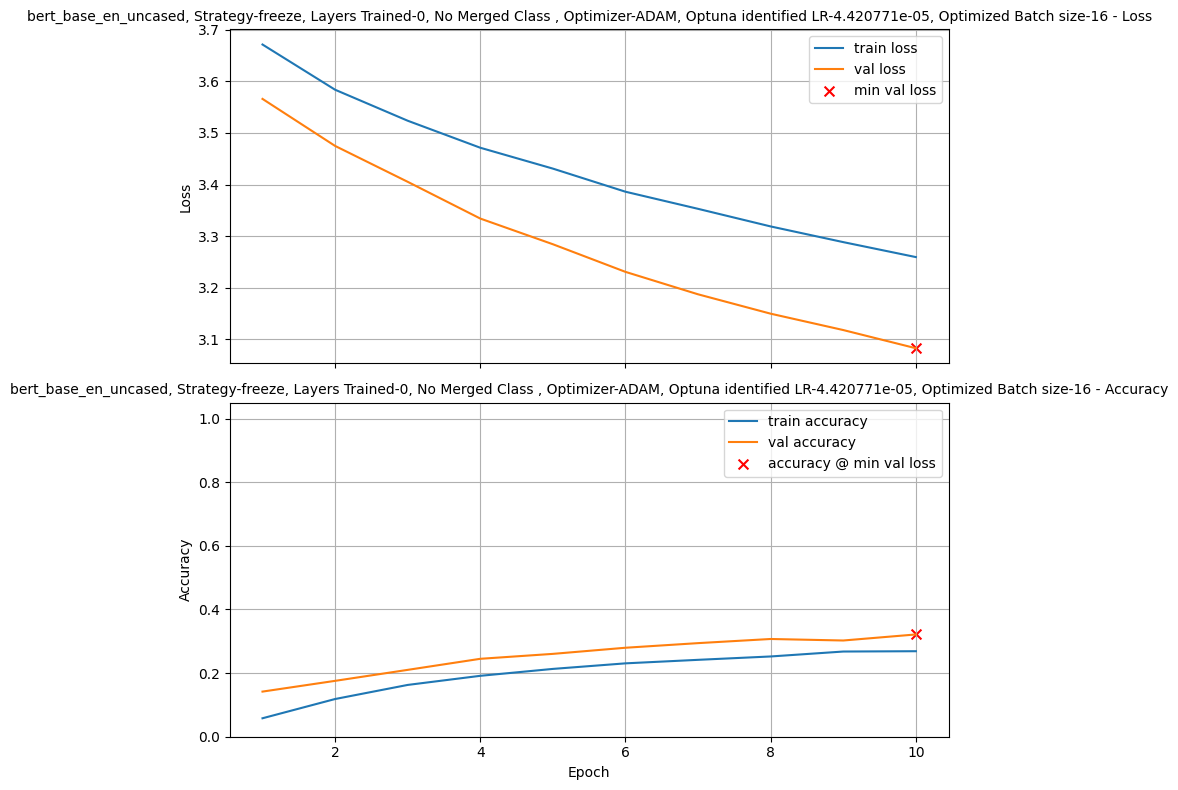

Final Training Loss:            3.2594
Final Training  accuracy:    0.2687
Final Validation Loss:          3.0828
Final Validation  accuracy:  0.3214
Min Validation Loss:            3.0828 (Epoch 10)
Accuracy @ Min Val Loss:      0.3214

Test metrics:
  loss: 3.0785
  accuracy: 0.3158

Execution Time: 5m 17s
Peak Memory Usage: 52714.72 MB

Generating final predictions for analysis purpose...


[I 2025-12-04 18:50:24,980] A new study created in memory with name: no-name-528f2142-4ace-483e-b38d-fc489b039741


Test accuracy: 0.3158
Test macro-F1: 0.1728

Per-Category Performance (Sorted by F1 Score)
----------------------------------------------------
ARTS & CULTURE                 | 0.000    | 26.0    
BLACK VOICES                   | 0.000    | 91.0    
COLLEGE                        | 0.000    | 23.0    
EDUCATION                      | 0.000    | 20.0    
FIFTY                          | 0.000    | 27.0    
GREEN                          | 0.000    | 53.0    
WOMEN                          | 0.000    | 68.0    
TASTE                          | 0.041    | 42.0    
ENVIRONMENT                    | 0.049    | 26.0    
WEIRD NEWS                     | 0.089    | 54.0    
WORLD NEWS                     | 0.092    | 43.0    
TECH                           | 0.095    | 40.0    
BUSINESS                       | 0.097    | 119.0   
DIVORCE                        | 0.101    | 69.0    
MEDIA                          | 0.103    | 56.0    
WORLDPOST                      | 0.107    | 51.0    
SCIENCE 

[I 2025-12-04 19:01:17,516] Trial 0 finished with value: 0.021760880947113037 and parameters: {'learning_rate': 3.1335593435506883e-06, 'batch_size': 8, 'optimizer': 'adagrad', 'adagrad_init_acc': 2.3460620827296814e-08}. Best is trial 0 with value: 0.021760880947113037.


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-04 19:12:20,366] Trial 1 finished with value: 0.1603301614522934 and parameters: {'learning_rate': 7.374788166937784e-06, 'batch_size': 8, 'optimizer': 'adagrad', 'adagrad_init_acc': 1.9543628497261733e-06}. Best is trial 1 with value: 0.1603301614522934.


100%|██████████| 457/457 [00:00<00:00, 921kB/s]


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-04 19:20:00,705] Trial 2 finished with value: 0.5842921733856201 and parameters: {'learning_rate': 5.7112284504192704e-06, 'batch_size': 32, 'optimizer': 'adamw', 'adamw_weight_decay': 4.982605023532544e-05}. Best is trial 2 with value: 0.5842921733856201.


100%|██████████| 761/761 [00:00<00:00, 1.87MB/s]


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-04 19:28:48,365] Trial 3 finished with value: 0.6080540418624878 and parameters: {'learning_rate': 5.368333685932976e-05, 'batch_size': 16, 'optimizer': 'adam', 'adam_beta1': 0.8209038848774876, 'adam_beta2': 0.975890199032459}. Best is trial 3 with value: 0.6080540418624878.


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-04 19:37:42,872] Trial 4 finished with value: 0.6160580515861511 and parameters: {'learning_rate': 1.516953295369386e-05, 'batch_size': 16, 'optimizer': 'adam', 'adam_beta1': 0.9636730681560326, 'adam_beta2': 0.9567957655881564}. Best is trial 4 with value: 0.6160580515861511.
[I 2025-12-04 19:37:42,875] A new study created in memory with name: no-name-07799d54-bdd0-4278-ae92-26c1ecc9c356


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-04 19:47:04,477] Trial 0 finished with value: 0.6205602884292603 and parameters: {'learning_rate': 9.926357252481625e-05, 'batch_size': 32, 'optimizer': 'rmsprop', 'rms_rho': 0.94675413308071}. Best is trial 0 with value: 0.6205602884292603.


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-04 19:54:49,066] Trial 1 finished with value: 0.5705352425575256 and parameters: {'learning_rate': 8.517001824805003e-05, 'batch_size': 32, 'optimizer': 'adamw', 'adamw_weight_decay': 8.630034625300418e-05}. Best is trial 0 with value: 0.6205602884292603.


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-04 20:06:23,029] Trial 2 finished with value: 0.6300650238990784 and parameters: {'learning_rate': 3.335619240793443e-05, 'batch_size': 8, 'optimizer': 'adam', 'adam_beta1': 0.825008955150708, 'adam_beta2': 0.9789296703926219}. Best is trial 2 with value: 0.6300650238990784.


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-04 20:18:32,977] Trial 3 finished with value: 0.3206603229045868 and parameters: {'learning_rate': 1.5875893336283067e-05, 'batch_size': 8, 'optimizer': 'adagrad', 'adagrad_init_acc': 2.0790592764089668e-06}. Best is trial 2 with value: 0.6300650238990784.


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-04 20:30:06,494] Trial 4 finished with value: 0.6500750184059143 and parameters: {'learning_rate': 2.17541496837115e-05, 'batch_size': 8, 'optimizer': 'adam', 'adam_beta1': 0.9374906170917322, 'adam_beta2': 0.9182814327565009}. Best is trial 4 with value: 0.6500750184059143.



>>> Best Learning Rate: 2.175415e-05 (Val Acc: 0.6501)
>>> Best Optimizer: adam    >>> Best Batch Size: 8
Re-training bert_base_en_uncased with Best LR: 2.18e-05 for full epochs...
Strategy: PARTIAL (Unfroze 2/12 transformer layers).

=== bert_base_en_uncased, Strategy-partial, Layers Trained-2, No Merged Class , Optimizer-ADAM, Optuna identified LR-2.175415e-05, Optimized Batch size-8 ===

Epoch 1/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 234s 40ms/step - accuracy: 0.3540 - loss: 2.7594 - val_accuracy: 0.5750 - val_loss: 1.5618 - learning_rate: 2.1754e-05
Epoch 2/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 117s 29ms/step - accuracy: 0.5990 - loss: 1.4266 - val_accuracy: 0.6118 - val_loss: 1.4270 - learning_rate: 2.1754e-05
Epoch 3/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 117s 29ms/step - accuracy: 0.7005 - loss: 0.9074 - val_accuracy: 0.6276 - val_loss: 1.4259 - learning_rate: 2.1754e-05
Epoch 4/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 116s 29ms/step - accuracy: 0.7783 - loss: 0.5856 - val_accuracy: 0.6136 - val_lo

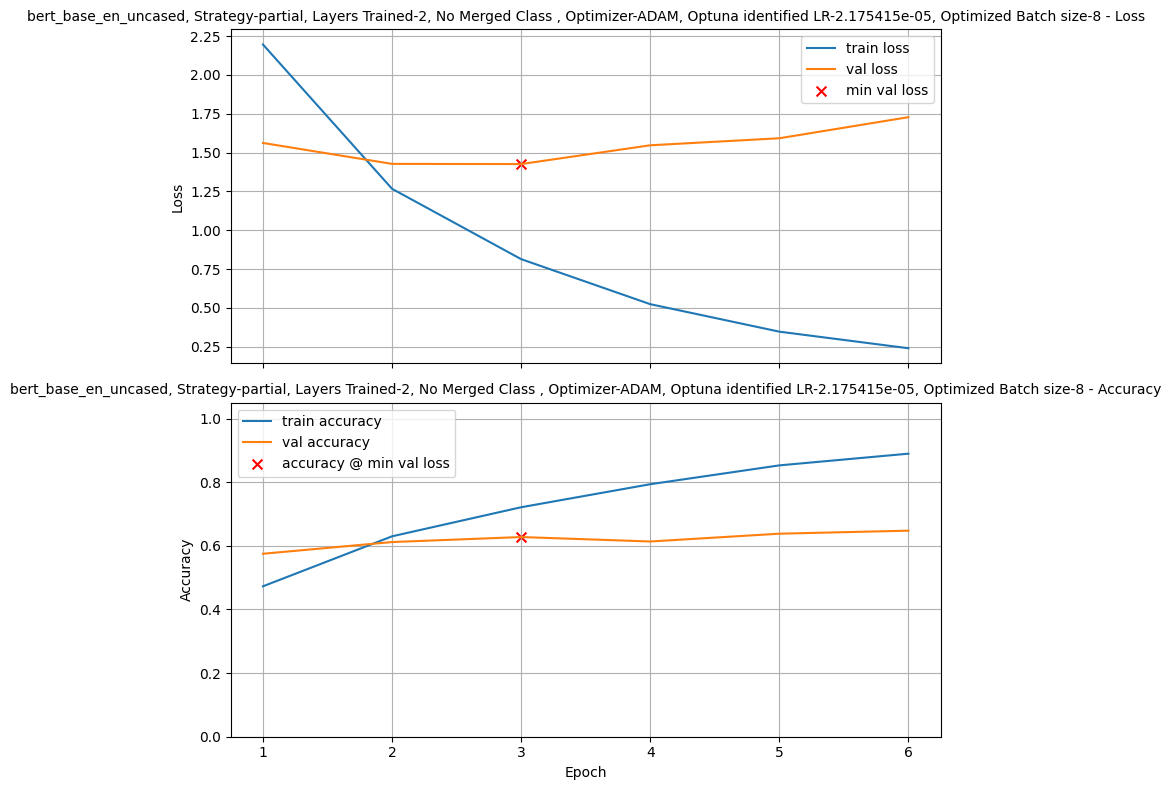

Final Training Loss:            0.2399
Final Training  accuracy:    0.8895
Final Validation Loss:          1.7277
Final Validation  accuracy:  0.6476
Min Validation Loss:            1.4259 (Epoch 3)
Accuracy @ Min Val Loss:      0.6276

Test metrics:
  loss: 1.3889
  accuracy: 0.6317

Execution Time: 13m 47s
Peak Memory Usage: 62731.46 MB

Generating final predictions for analysis purpose...


[I 2025-12-04 20:44:55,514] A new study created in memory with name: no-name-9a1b84f5-a8af-4faa-af58-a60d019bfe58


Test accuracy: 0.6317
Test macro-F1: 0.5520

Per-Category Performance (Sorted by F1 Score)
----------------------------------------------------
FIFTY                          | 0.216    | 27.0    
TASTE                          | 0.246    | 42.0    
GOOD NEWS                      | 0.255    | 28.0    
CULTURE & ARTS                 | 0.312    | 20.0    
ARTS                           | 0.355    | 30.0    
PARENTS                        | 0.360    | 78.0    
WORLD NEWS                     | 0.376    | 43.0    
WOMEN                          | 0.380    | 68.0    
WEIRD NEWS                     | 0.382    | 54.0    
COMEDY                         | 0.409    | 102.0   
IMPACT                         | 0.420    | 69.0    
EDUCATION                      | 0.457    | 20.0    
BUSINESS                       | 0.474    | 119.0   
GREEN                          | 0.484    | 53.0    
BLACK VOICES                   | 0.494    | 91.0    
ARTS & CULTURE                 | 0.512    | 26.0    
MONEY   

[I 2025-12-04 20:51:46,870] Trial 0 finished with value: 0.07428714632987976 and parameters: {'learning_rate': 4.584714138822754e-06, 'batch_size': 32, 'optimizer': 'sgd', 'sgd_momentum': 0.15536014184283414}. Best is trial 0 with value: 0.07428714632987976.


Strategy: FULL (all layers trainable).


[I 2025-12-04 21:02:59,369] Trial 1 finished with value: 0.6133066415786743 and parameters: {'learning_rate': 4.32605911874333e-06, 'batch_size': 8, 'optimizer': 'adam', 'adam_beta1': 0.8886166015512563, 'adam_beta2': 0.9460251066315756}. Best is trial 1 with value: 0.6133066415786743.


Strategy: FULL (all layers trainable).


[I 2025-12-04 21:12:59,107] Trial 2 finished with value: 0.2563782036304474 and parameters: {'learning_rate': 4.2389342445395795e-05, 'batch_size': 8, 'optimizer': 'sgd', 'sgd_momentum': 0.359204223842553}. Best is trial 1 with value: 0.6133066415786743.


Strategy: FULL (all layers trainable).


[I 2025-12-04 21:22:54,723] Trial 3 finished with value: 0.19159579277038574 and parameters: {'learning_rate': 6.7484578830052665e-06, 'batch_size': 8, 'optimizer': 'sgd', 'sgd_momentum': 0.8661732832163894}. Best is trial 1 with value: 0.6133066415786743.


Strategy: FULL (all layers trainable).


[I 2025-12-04 21:32:25,596] Trial 4 finished with value: 0.5120059847831726 and parameters: {'learning_rate': 8.03495917236576e-05, 'batch_size': 16, 'optimizer': 'adagrad', 'adagrad_init_acc': 0.0015096509247775867}. Best is trial 1 with value: 0.6133066415786743.
[I 2025-12-04 21:32:25,599] A new study created in memory with name: no-name-b866f26e-abde-4110-950c-797a20265f24


Strategy: FULL (all layers trainable).


[I 2025-12-04 21:43:54,261] Trial 0 finished with value: 0.5370185375213623 and parameters: {'learning_rate': 1.10701072582183e-06, 'batch_size': 8, 'optimizer': 'adamw', 'adamw_weight_decay': 0.0012979519688500662}. Best is trial 0 with value: 0.5370185375213623.


Strategy: FULL (all layers trainable).


[I 2025-12-04 21:50:51,370] Trial 1 finished with value: 0.010755377821624279 and parameters: {'learning_rate': 2.7572429971052494e-06, 'batch_size': 32, 'optimizer': 'sgd', 'sgd_momentum': 0.032368656558111185}. Best is trial 0 with value: 0.5370185375213623.


Strategy: FULL (all layers trainable).


[I 2025-12-04 21:58:35,790] Trial 2 finished with value: 0.5255127549171448 and parameters: {'learning_rate': 1.208992423104783e-06, 'batch_size': 32, 'optimizer': 'adamw', 'adamw_weight_decay': 0.00039958286051103574}. Best is trial 0 with value: 0.5370185375213623.


Strategy: FULL (all layers trainable).


[I 2025-12-04 22:10:52,279] Trial 3 finished with value: 0.016758378595113754 and parameters: {'learning_rate': 2.2411364573261967e-06, 'batch_size': 8, 'optimizer': 'adagrad', 'adagrad_init_acc': 0.0011110330315944202}. Best is trial 0 with value: 0.5370185375213623.


Strategy: FULL (all layers trainable).


[I 2025-12-04 22:18:49,407] Trial 4 finished with value: 0.022511254996061325 and parameters: {'learning_rate': 1.6201929873435318e-06, 'batch_size': 16, 'optimizer': 'sgd', 'sgd_momentum': 0.02788478858283924}. Best is trial 0 with value: 0.5370185375213623.



>>> Best Learning Rate: 1.107011e-06 (Val Acc: 0.5370)
>>> Best Optimizer: adamw    >>> Best Batch Size: 8
Re-training bert_base_en_uncased with Best LR: 1.11e-06 for full epochs...
Strategy: FULL (all layers trainable).

=== bert_base_en_uncased, Strategy-full, Layers Trained-All, No Merged Class , Optimizer-ADAMW, Optuna identified LR-1.107011e-06, Optimized Batch size-8 ===

Epoch 1/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 240s 41ms/step - accuracy: 0.0652 - loss: 3.6686 - val_accuracy: 0.3154 - val_loss: 3.2354 - learning_rate: 1.1070e-06
Epoch 2/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 121s 30ms/step - accuracy: 0.3352 - loss: 3.2549 - val_accuracy: 0.4635 - val_loss: 2.7504 - learning_rate: 1.1070e-06
Epoch 3/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 124s 31ms/step - accuracy: 0.4531 - loss: 2.8216 - val_accuracy: 0.5133 - val_loss: 2.3938 - learning_rate: 1.1070e-06
Epoch 4/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 127s 32ms/step - accuracy: 0.5103 - loss: 2.4569 - val_accuracy: 0.5358 - val_loss: 2.1342 - 

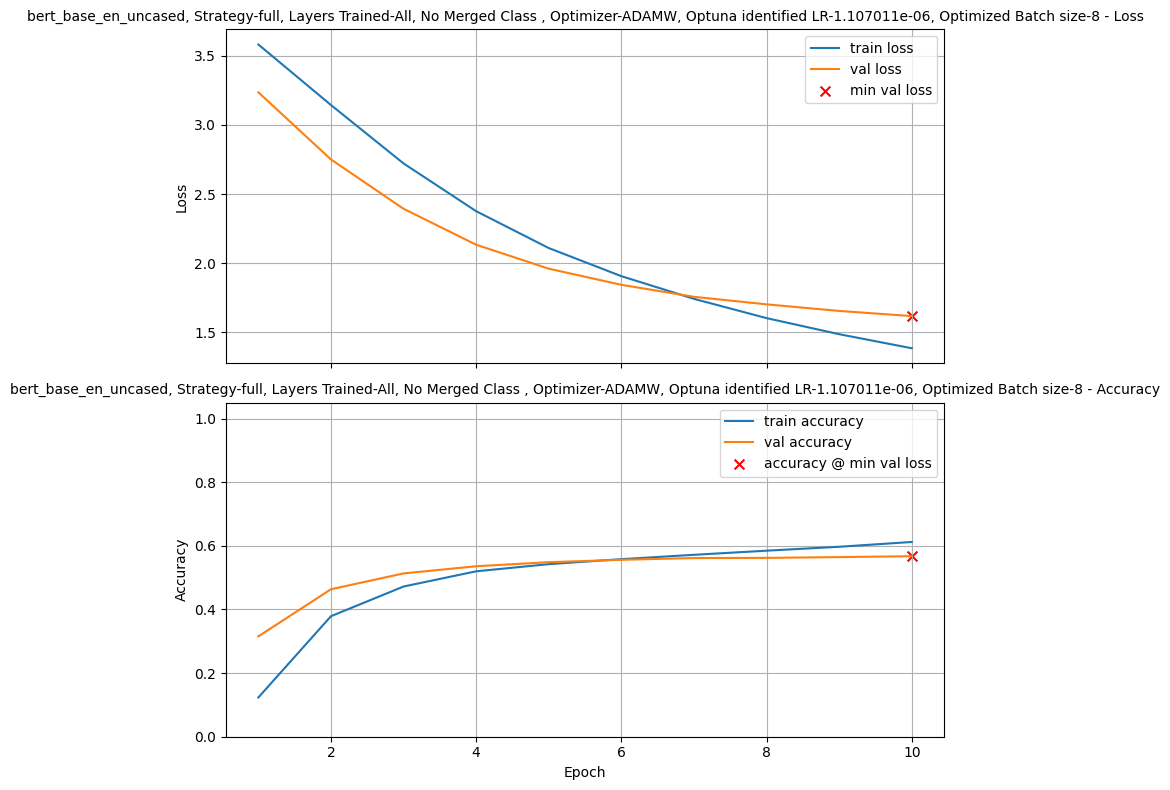

Final Training Loss:            1.3861
Final Training  accuracy:    0.6121
Final Validation Loss:          1.6185
Final Validation  accuracy:  0.5673
Min Validation Loss:            1.6185 (Epoch 10)
Accuracy @ Min Val Loss:      0.5673

Test metrics:
  loss: 1.6370
  accuracy: 0.5701

Execution Time: 22m 26s
Peak Memory Usage: 71566.45 MB

Generating final predictions for analysis purpose...
Test accuracy: 0.5701
Test macro-F1: 0.4952

Per-Category Performance (Sorted by F1 Score)
----------------------------------------------------
FIFTY                          | 0.098    | 27.0    
ARTS & CULTURE                 | 0.233    | 26.0    
WORLD NEWS                     | 0.235    | 43.0    
PARENTS                        | 0.274    | 78.0    
ARTS                           | 0.278    | 30.0    
GOOD NEWS                      | 0.290    | 28.0    
WOMEN                          | 0.331    | 68.0    
TASTE                          | 0.345    | 42.0    
CULTURE & ARTS                 | 0.3

In [ ]:
%%script echo skipping    # Skipping as it due to dependecy on first training look for saved data at the end...deb

# ************. FIRST RUN to analyse classification performance with all 41 classes  *************

# Let us do the first set to understand the overall performance  for each label type/category
# so we can decide on the mergeing by category and other preprocessing needed if any
# we will use the f1 score by category to determine whatlables to map to what target lable (i.e merge)

# Set experiment parameters
experiment_layers = True
EPOCHS = 10

# Since the above is True the below four final parameters will be ignored

# Set these final hyper parameters identified in earlier run to reduce the search space
# final used only when value of experiment_layers = False
final_model_name = "roberta_base_en"
final_batch_size = 16
final_strategy = "full"
final_train_layers = 6

#set the strategy
strategy = "ALL"    # "ALL" will create three rows  ie one for "freeze" , "partial" and "full"

ALLOWED_MODEL_LIST = ["roberta_base_en", "distil_bert_base_en_uncased", "bert_base_en_uncased"]

# Set standard parameters for Optuan trials
OPTUNA_TRIALS_INITIAL = 5
OPTUNA_TRIALS_FINAL = 10
OPTUNA_TRIALS = OPTUNA_TRIALS_INITIAL  # How many different trials to run for optuna..during inital run we will do 5 later for final training we may do 10 if needed

# default eperimental layers just in case parameter doesnt work should just come through parameters
#N_PARTIAL_VALUES = [2, 3, 6]   # we will send all the layers we want to test and let it loop in experimental loop method
N_PARTIAL_VALUES = [2]   # deb debug ... we will send all the layers we want to test and let it loop in experimental loop method
BATCHS = [8, 16, 32]           # we will send all three and let Optuna decide the best

# Get the  class weights for the training data
class_weights = get_class_weights(y_tr)

print(f"\n\n{'#'*80}")
print("Starting Optuna runs with **** FIRST RUN  ****  for all three models for inital analysis")
print(f"{'#'*80}")

print("Vocabulary size:", new_vocab_size)
print("Number of classes:", num_classes)
print("Max Length of text ", MAX_LEN)

# Generate model_configs for various batch sizes and strategies
# Initialise the variables to ne updated in the loop
ALL_MODEL_CONFIGS = []

# fallback
final_train_layers = globals().get("final_train_layers", globals().get("final_train_layers", 2))

if experiment_layers:
    for model_n in ALLOWED_MODEL_LIST:
        # Determine effective_partial_values based on model_n
        if model_n == "distil_bert_base_en_uncased":
            effective_partial_values = [2]
        else:
            effective_partial_values = N_PARTIAL_VALUES

        if strategy == "ALL":
            # add Freeze config
            ALL_MODEL_CONFIGS.append({
                "name": model_n,
                "batch": BATCHS, # Pass the entire list of batch sizes for Optuna to optimize
                "strategy": "freeze",
                "unfreeze_layers": 0,
            })
            # add Partial configs
            for n_unfreeze in effective_partial_values:
                ALL_MODEL_CONFIGS.append({
                    "name": model_n,
                    "batch": BATCHS, # Pass the entire list of batch sizes for Optuna to optimize
                    "strategy": "partial",
                    "unfreeze_layers": n_unfreeze,
                })
            # add Full config
            ALL_MODEL_CONFIGS.append({
                "name": model_n,
                "batch": BATCHS, # Pass the entire list of batch sizes for Optuna to optimize
                "strategy": "full",
                "unfreeze_layers": None,
            })
        elif strategy == "partial":
            # add 'partial' configs only
            for n_unfreeze in effective_partial_values:
                ALL_MODEL_CONFIGS.append({
                    "name": model_n,
                    "batch": BATCHS, # Pass the entire list of batch sizes for Optuna to optimize
                    "strategy": "partial",
                    "unfreeze_layers": n_unfreeze,
                })
        elif strategy == "full":
            ALL_MODEL_CONFIGS.append({
                "name": model_n,
                "batch": BATCHS, # Pass the entire list of batch sizes for Optuna to optimize
                "strategy": "full",
                "unfreeze_layers": None,
            })
        elif strategy == "freeze":
            ALL_MODEL_CONFIGS.append({
                "name": model_n,
                "batch": BATCHS, # Pass the entire list of batch sizes for Optuna to optimize
                "strategy": "freeze",
                "unfreeze_layers": 0,
            })
        else:
            print(f"Warning: Unknown strategy '{strategy}'. No configurations added for {model_n}.")

else:                                     # this triggers only experiment_layers= False i.e we are final
    N_PARTIAL_VALUES = [int(final_train_layers)]
    model_n = final_model_name
    batch_s = final_batch_size
    strategy = final_strategy
    unfreeze_layers = int(final_train_layers)
    ALL_MODEL_CONFIGS.append({
        "name": model_n,
        "batch": batch_s,
        "strategy": strategy,
        "unfreeze_layers": unfreeze_layers,
    })


print(f"experiment_layers={experiment_layers}  -> N_PARTIAL_VALUES={N_PARTIAL_VALUES}")

current_results, current_subset_stats, current_study = run_experiment_loop_with_optuna( # Capture the returned study object
    X_tr, X_va, X_te, y_tr, y_va, y_te,          # use split from unmerged
    model_configs_list=ALL_MODEL_CONFIGS,
    max_epochs=EPOCHS,
    num_classes_global = num_classes,
    label_names_global = label_names,
    class_weights_global = class_weights,
    current_subset_frac = subset_frac,
    DS_Merged=False,               #Included this so I can add merged info in title in plot and results
    OPTUNA_TRIALS=OPTUNA_TRIALS,
)
# Check if dictionaries exist first to avoid erroring out if this is the first run
if 'all_experiment_results' not in globals():
    all_experiment_results = {}
if 'all_subset_stats' not in globals():
    all_subset_stats = []

all_experiment_results.update(current_results)
all_subset_stats.extend(current_subset_stats)

# Set the global 'study' variable for plotting. This will only contain the study object from the LAST configuration run.
global study
study = current_study

print(f"Stats collected: {len(all_subset_stats)} runs.")

print(f"\n\n{'#'*80}")
print("  This Experiment completed")
print(f"{'#'*80}")

### from Classification report we see 13 different pairs are doing mis-classication either due to data similarity or data too less for many of the classes

In [ ]:
%%script echo skipping    # Skipping as it due to dependecy on first training look for saved data at the end...deb

print_results(results)

Sorting results by: accuracy_at_min_val_loss

roberta_base_en, Strategy-full, Layers Trained-All, No Merged Class , Optimizer-RMSPROP, Optuna identified LR-4.473457e-06, Optimized Batch size-16  0.6346  (best epoch=10)
bert_base_en_uncased, Strategy-partial, Layers Trained-2, No Merged Class , Optimizer-ADAM, Optuna identified LR-2.175415e-05, Optimized Batch size-8  0.6276  (best epoch=3)
distil_bert_base_en_uncased, Strategy-full, Layers Trained-All, No Merged Class , Optimizer-RMSPROP, Optuna identified LR-1.857803e-05, Optimized Batch size-8  0.6161  (best epoch=2)
roberta_base_en, Strategy-partial, Layers Trained-2, No Merged Class , Optimizer-ADAMW, Optuna identified LR-3.566581e-06, Optimized Batch size-16  0.6138  (best epoch=9)
distil_bert_base_en_uncased, Strategy-partial, Layers Trained-2, No Merged Class , Optimizer-ADAMW, Optuna identified LR-2.942346e-05, Optimized Batch size-8  0.5948  (best epoch=3)
bert_base_en_uncased, Strategy-full, Layers Trained-All, No Merged Clas

In [ ]:
%%script echo skipping    # Skipping as it due to dependecy on first training look for saved data at the end...deb

if 'all_subset_stats' in globals() and len(all_subset_stats) > 0:
    summary_df = pd.DataFrame(all_subset_stats)
    # Drop duplicate rows based on all columns
    summary_df_unique = summary_df.drop_duplicates().reset_index(drop=True)
    print(f"Original DataFrame shape: {summary_df.shape}")
    print(f"DataFrame shape after removing duplicates: {summary_df_unique.shape}")

    # Sort by 'Test F1 Macro' for better comparison, as it was done previously
    summary_df_unique = summary_df_unique.sort_values(by="Test F1 Macro", ascending=False)
    display(summary_df_unique)
else:
    print("Dataframe doesn't have summary info or is empty.")

Original DataFrame shape: (54, 15)
DataFrame shape after removing duplicates: (9, 15)


Model Strategy Unfreeze Layers        DS_Merged  \
7         bert_base_en_uncased  partial               2  No Merged Class   
2              roberta_base_en     full             All  No Merged Class   
1              roberta_base_en  partial               2  No Merged Class   
4  distil_bert_base_en_uncased  partial               2  No Merged Class   
5  distil_bert_base_en_uncased     full             All  No Merged Class   
8         bert_base_en_uncased     full             All  No Merged Class   
3  distil_bert_base_en_uncased   freeze               0  No Merged Class   
0              roberta_base_en   freeze               0  No Merged Class   
6         bert_base_en_uncased   freeze               0  No Merged Class   

   Batch Optimizer  Learning Rate  Val Acc @ Min Loss  Min Val Loss  \
7      8      ADAM       0.000022            0.627564      1.425871   
2     16   RMSPROP       0.000004            0.634567      1.377544   
1     16     ADAMW       0.000004            0.613807      1.429574   
4      8     ADAMW       0.000029            0.594797      1.508233   
5      8   RMSPROP       0.000019            0.616058      1.402357   
8      8     ADAMW       0.000001            0.567284      1.618544   
3      8     ADAMW       0.000047            0.501001      1.733680   
0     16   RMSPROP       0.000035            0.445473      2.618152   
6     16      ADAM       0.000044            0.321411      3.082827   

   Test Loss  Test Acc  Test F1 Macro Elapsed Sec Peak Memory(MB)  \
7   1.388879  0.631658       0.551984       827.6      62731.5 MB   
2   1.395671  0.625156       0.551195       949.1      33113.2 MB   
1   1.447888  0.604401       0.533304      1052.4      23902.8 MB   
4   1.495547  0.588897       0.516130       438.4      40163.7 MB   
5   1.390802  0.618405       0.509372       351.8      44782.2 MB   
8   1.637026  0.570143       0.495219      1346.2      71566.5 MB   
3   1.739277  0.510378       0.439439       297.9      35592.3 MB   
0   2.641419  0.440860       0.325203       424.7      12978.3 MB   
6   3.078496  0.315829       0.172756       317.1      52714.7 MB   

   Dataset Fraction  
7               0.2  
2               0.2  
1               0.2  
4               0.2  
5               0.2  
8               0.2  
3               0.2  
0               0.2  
6               0.2

### By comparing the per-category F1 scores across all three model architectures, we identified approximately 13 categories that exhibit poor classification performance and significant confusion with semantically similar classes. To address these classification errors, we determined that merging these overlapping categories would improve model performance and create more distinct class boundaries.

### **Based on misclassification  below are the likely mapping which needs done** .


- `FIFTY` → `WELLNESS`
- `HEALTHY LIVING` → `WELLNESS`
- `ARTS` → `ARTS & CULTURE`
- `CULTURE & ARTS` → `ARTS & CULTURE`
- `TASTE` → `FOOD & DRINK`
- `MONEY` → `BUSINESS`
- `WORLD NEWS` → `THE WORLDPOST`
- `WORLDPOST` → `THE WORLDPOST`
- `PARENTS` → `PARENTING`
- `GOOD NEWS` → `WEIRD NEWS`
- `COLLEGE` → `EDUCATION`
- `ENVIRONMENT` → `GREEN`
- `SCIENCE` → `TECH`


- Before we do the merging let us do a quick analysis of the Optuna study(s) so we can get better idea about feature importance and various other informaiton. We are specifically interested in performance of Adam as that is what looks to be the likely candidate optimizer


### Set of helper methods (plotting methods) to get using optuna, wanted to check all to see what insight it provides on optimizations , took help from optuna.org site samples, youtube and Chat GPT


In [ ]:
%%script echo skipping    # Skipping as it due to dependecy on first training look for saved data at the end...deb

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import optuna
from pandas.plotting import scatter_matrix
import warnings

def _study_trials_df(study):
    """Return DataFrame of completed trials for an an optuna Study (robust fallback)."""
    try:
        df = study.trials_dataframe()
    except Exception:
        records = []
        for t in study.trials:
            if t.state == optuna.trial.TrialState.COMPLETE:
                rec = dict(t.params)
                rec["value"] = float(t.value) if t.value is not None else np.nan
                rec["number"] = t.number
                rec["state"] = "COMPLETE"
                records.append(rec)
        df = pd.DataFrame(records)

    # If trials_dataframe produced different column names, normalise them
    # optuna sometimes creates columns with prefix 'param_' or 'params_'
    # ensure 'value' and 'number' and 'state' exist
    if "_value" in df.columns and "value" not in df.columns:
        df = df.rename(columns={"_value": "value"})
    if "_number" in df.columns and "number" not in df.columns:
        df = df.rename(columns={"_number": "number"})
    if "state" not in df.columns:
        # If no explicit state column, assume rows with non-null 'value' are COMPLETE
        df["state"] = np.where(df.get("value").notna(), "COMPLETE", "OTHER")

    # keep only completed trials
    df = df[df["state"] == "COMPLETE"].reset_index(drop=True)
    return df

def plot_optuna_study_matplotlib(study, study_name=None, top_n_params=8):
    """Plot optimization history, parameter importances (proxy), and a scatter-matrix (matplotlib)."""
    if study is None:
        print("No study provided.")
        return
    df = _study_trials_df(study)
    if df.empty:
        print("No completed trials in study.")
        return

    # Detect parameter columns robustly (support 'param_' and 'params_' prefixes).
    param_cols = [c for c in df.columns if c.startswith("param_") or c.startswith("params_")]

    # Fallback: treat any non-built-in column as a param
    builtin = {"number", "value", "state", "datetime_start", "duration"}
    if not param_cols:
        param_cols = [c for c in df.columns if c not in builtin]

    title_prefix = f"Study: {study_name or getattr(study, 'study_name', 'optuna_study')}"

    # 1. Optimization history
    fig1, ax1 = plt.subplots(figsize=(12,7)) # Increased figsize
    x = df["number"] if "number" in df.columns else np.arange(len(df))
    ax1.plot(x, df["value"].astype(float), marker="o", linestyle="-", alpha=0.8)
    ax1.set_xlabel("Trial")
    ax1.set_ylabel("Objective (value)")
    ax1.set_title(f"{title_prefix} — Optimization history")
    ax1.grid(True)
    ax1.tick_params(axis='x', rotation=45)
    ax1.tick_params(axis='y', rotation=45)
    fig1.tight_layout(pad=3.0)
    plt.show()

    # 2. Parameter importance (simple proxy via Spearman corr for numeric, group-std for categorical)
    importances = {}
    for c in param_cols:
        s = pd.to_numeric(df[c], errors="coerce")
        if s.notna().sum() >= 2:
            corr = s.corr(df["value"].astype(float), method="spearman")
            importances[c] = float(abs(corr)) if not pd.isna(corr) else 0.0
        else:
            try:
                gm = df.groupby(c)["value"].mean()
                importances[c] = float(gm.std()) if not gm.empty else 0.0
            except Exception:
                importances[c] = 0.0

    if importances:
        imp_series = pd.Series(importances).sort_values(ascending=False).head(top_n_params)
        fig2, ax2 = plt.subplots(figsize=(14, 8)) # Further increased figsize
        imp_series.plot(kind="bar", color="C2", ax=ax2)
        ax2.set_ylabel("Importance (proxy)")
        ax2.set_title(f"{title_prefix} — Param importance (proxy)")
        ax2.tick_params(axis='x', rotation=45)
        ax2.tick_params(axis='y', rotation=0)
        fig2.tight_layout(pad=3.0)
        plt.show()
    else:
        print("No parameter columns detected for importance plot.")

    # 3. Scatter-matrix of numeric params + objective (safe: use histogram diagonal)
    numeric_cols = []
    for c in param_cols:
        ser = pd.to_numeric(df[c], errors="coerce")
        if ser.notna().sum() > 0:
            numeric_cols.append(c)
    numeric_cols = numeric_cols[:6]  # limit width
    if numeric_cols:
        df_for_matrix = df[numeric_cols].apply(pd.to_numeric, errors="coerce")
        df_for_matrix["value"] = df["value"].astype(float)
        # Temporarily suppress UserWarnings from pandas.plotting.misc.py
        with warnings.catch_warnings():
            warnings.filterwarnings('ignore', category=UserWarning)
            fig_scatter = scatter_matrix(df_for_matrix, alpha=0.7, diagonal="hist", figsize=(14, 14)) # Increased figsize
        for ax_row in fig_scatter:
            for ax in ax_row:
                ax.tick_params(axis='x', rotation=45)
                ax.tick_params(axis='y', rotation=45)
        plt.suptitle(f"{title_prefix} — Pairwise plot (numeric params + value)", y=0.92)
        plt.tight_layout(pad=3.0) # Added tight_layout for the scatter matrix figure
        plt.show()
    else:
        print("Not enough numeric params for scatter-matrix.")

def plot_aggregate_optuna_matplotlib(studies: list[optuna.Study]):
    """Plots each Optuna study in a list using plot_optuna_study_matplotlib."""
    if not studies:
        print("No studies to plot.")
        return

    for i, study_obj in enumerate(studies):
        study_name = getattr(study_obj, 'study_name', f'Study {i+1}')
        print(f"\n{'='*80}")
        print(f"Plotting {study_name}")
        print(f"{'='*80}\n")
        plot_optuna_study_matplotlib(study_obj, study_name=study_name)


Plotting no-name-36fb8991-d8f5-4f32-86e1-46b01a2354da



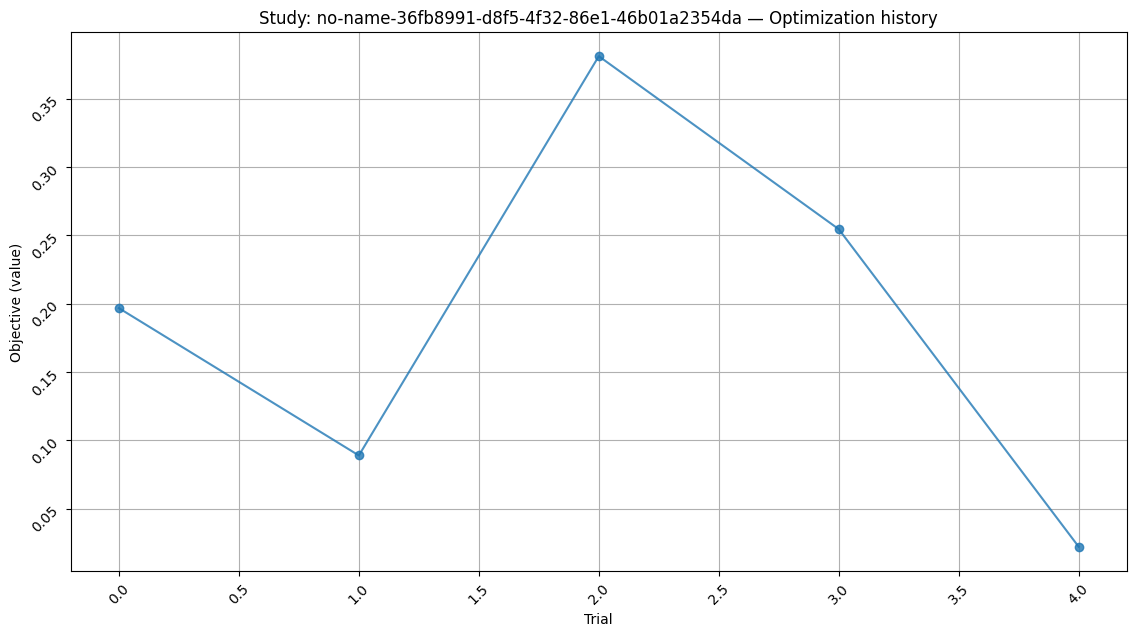

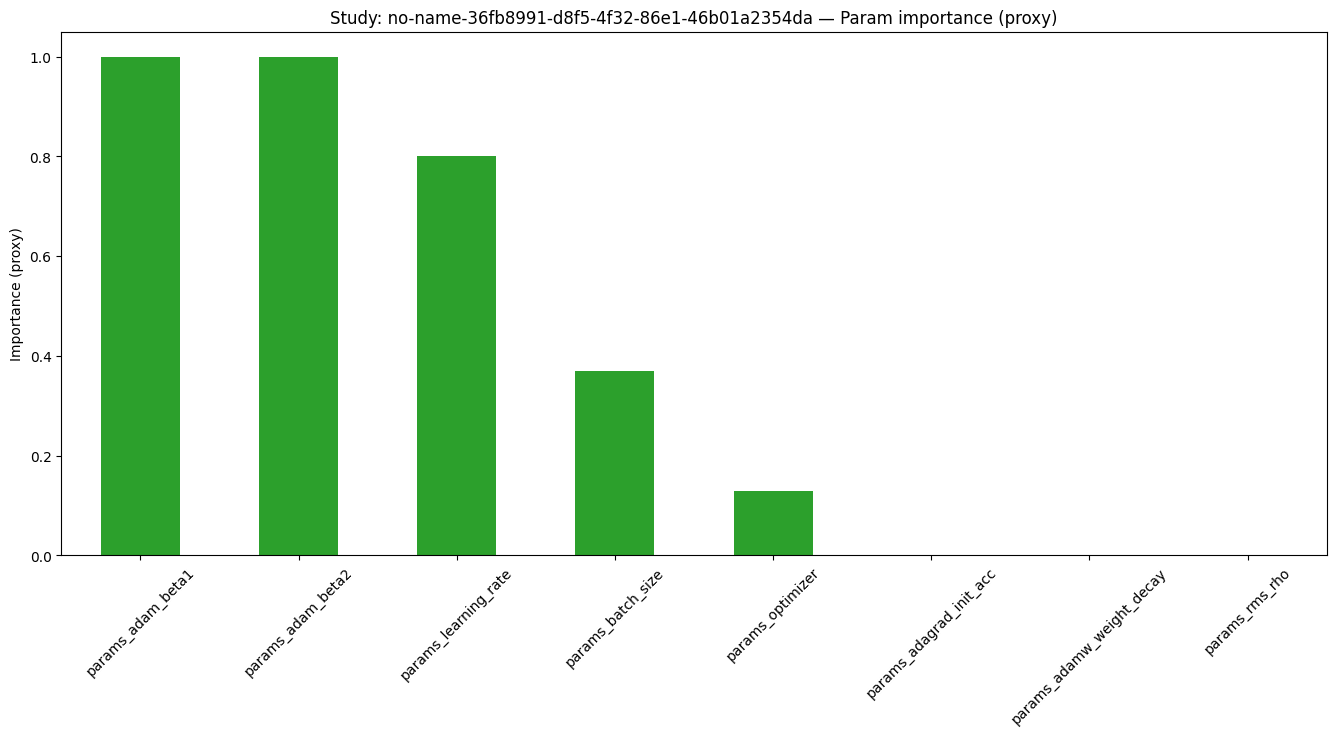

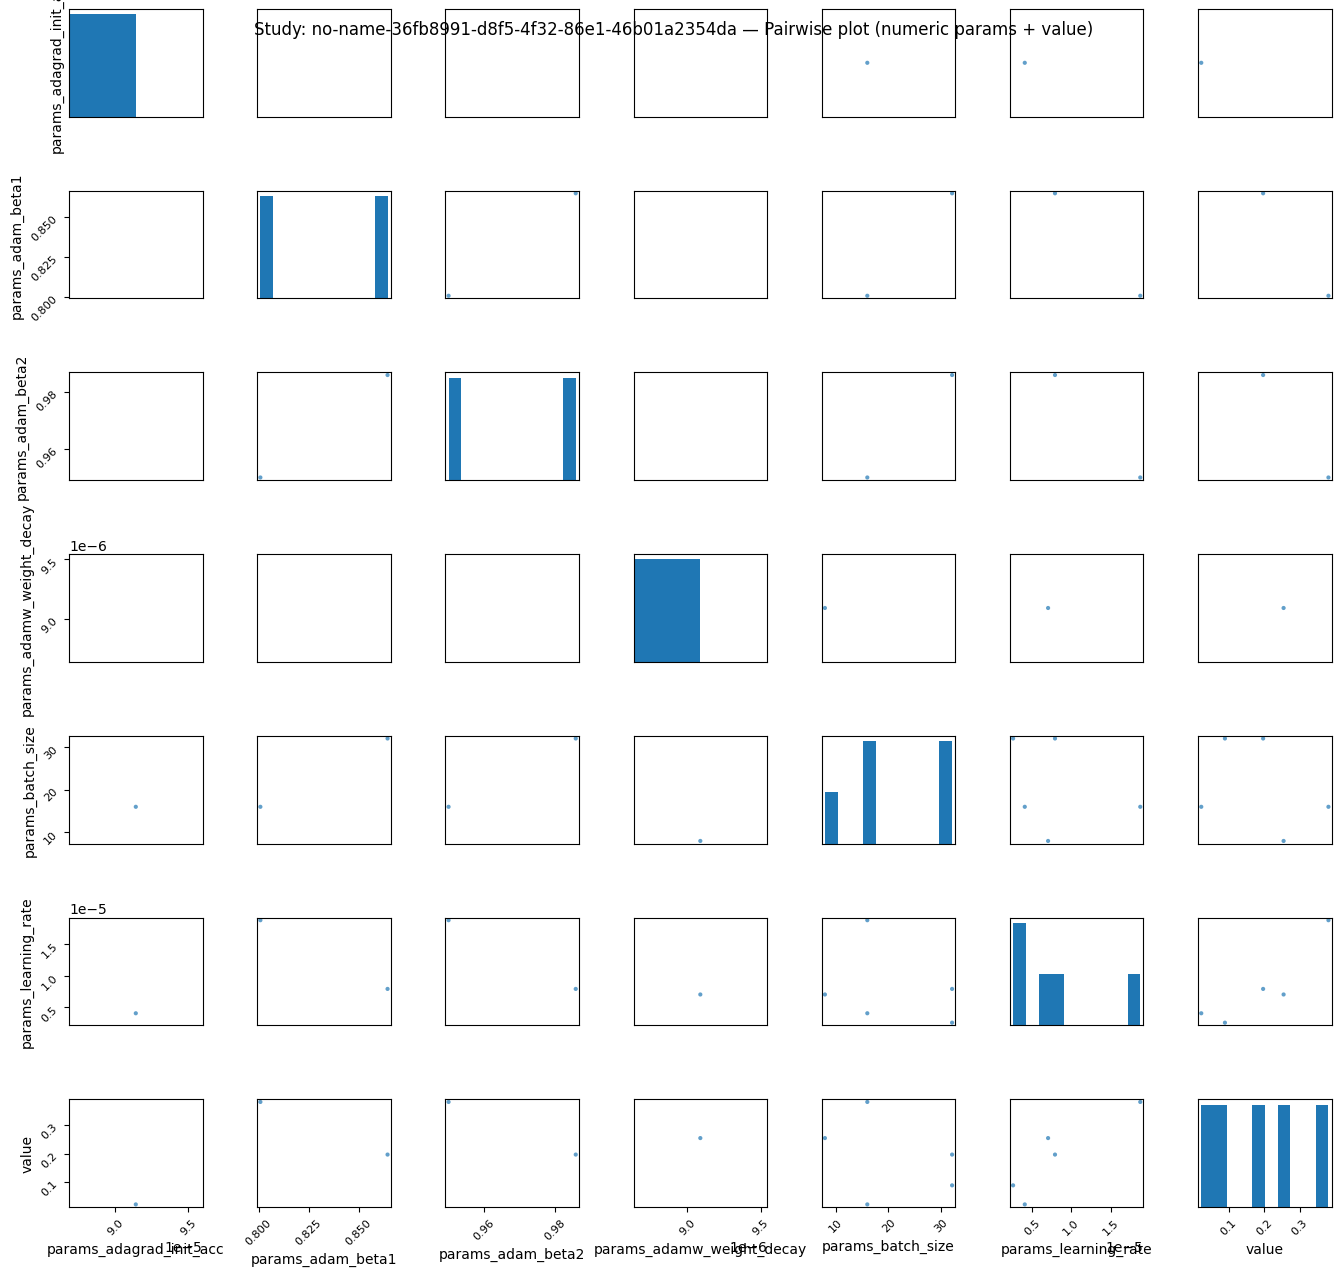


Plotting no-name-c4ce04ba-85f5-4274-aa43-50d75a53d9dd



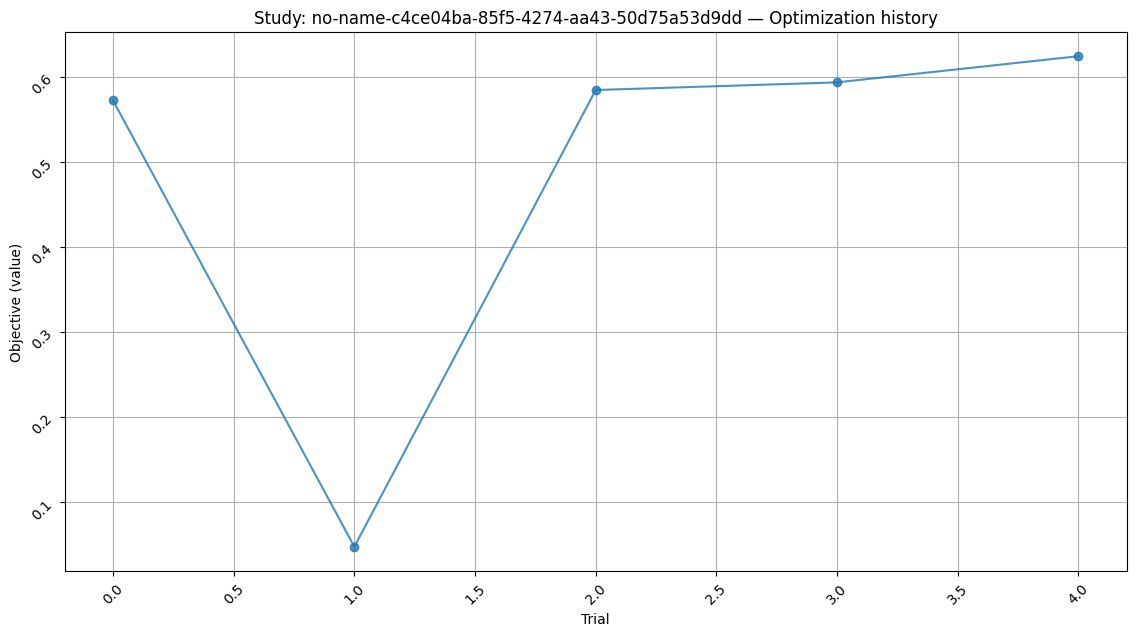

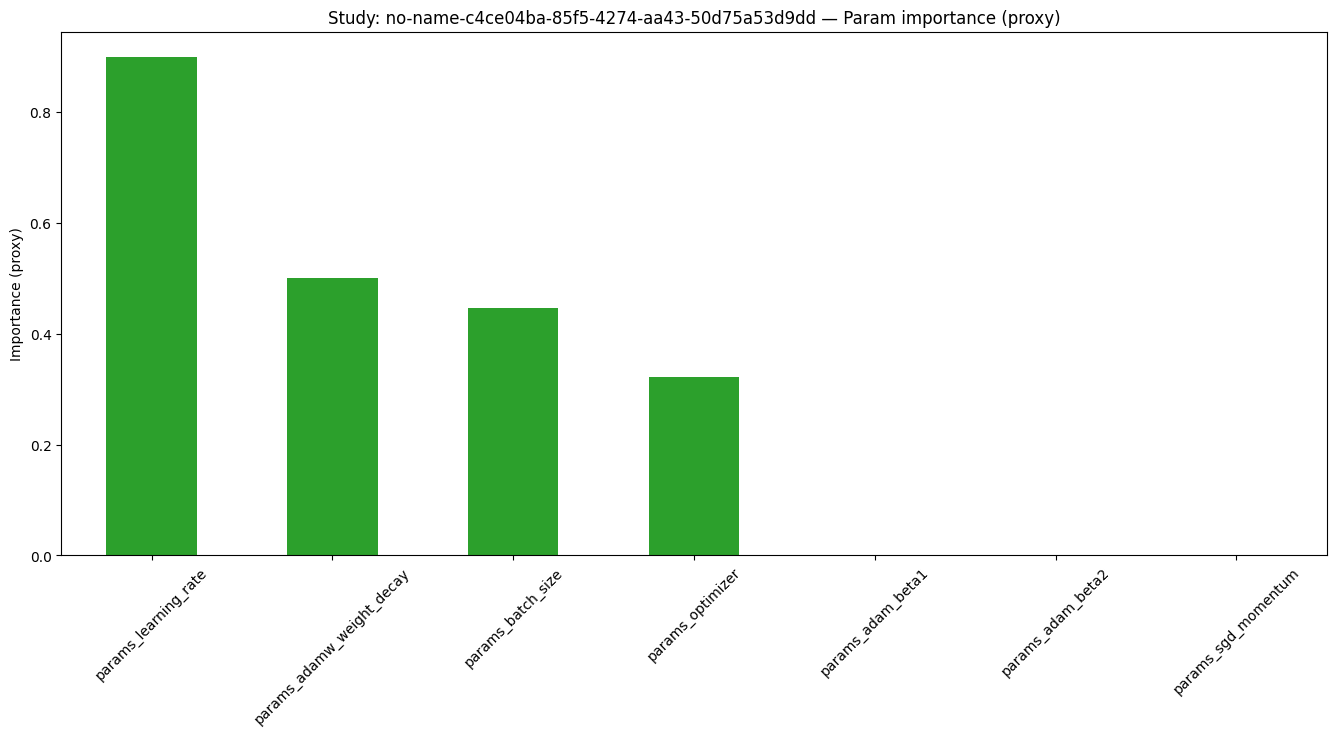

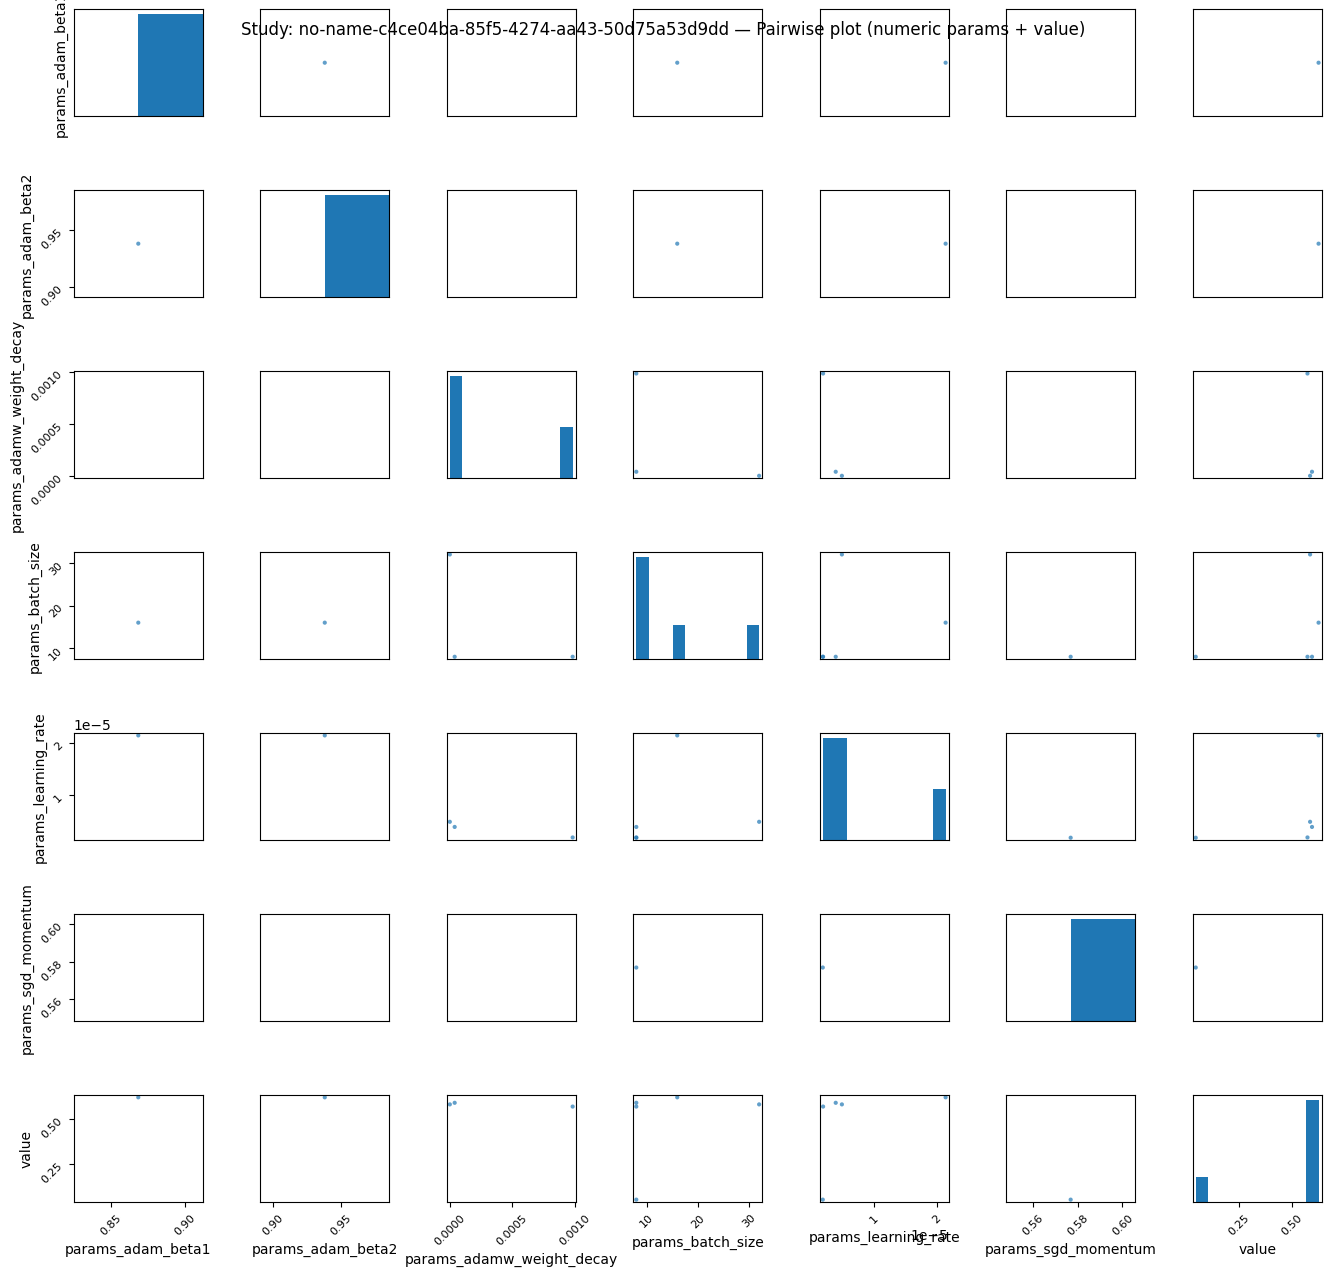


Plotting no-name-42f38ed4-decf-43ac-9b9d-9cbc748c123d



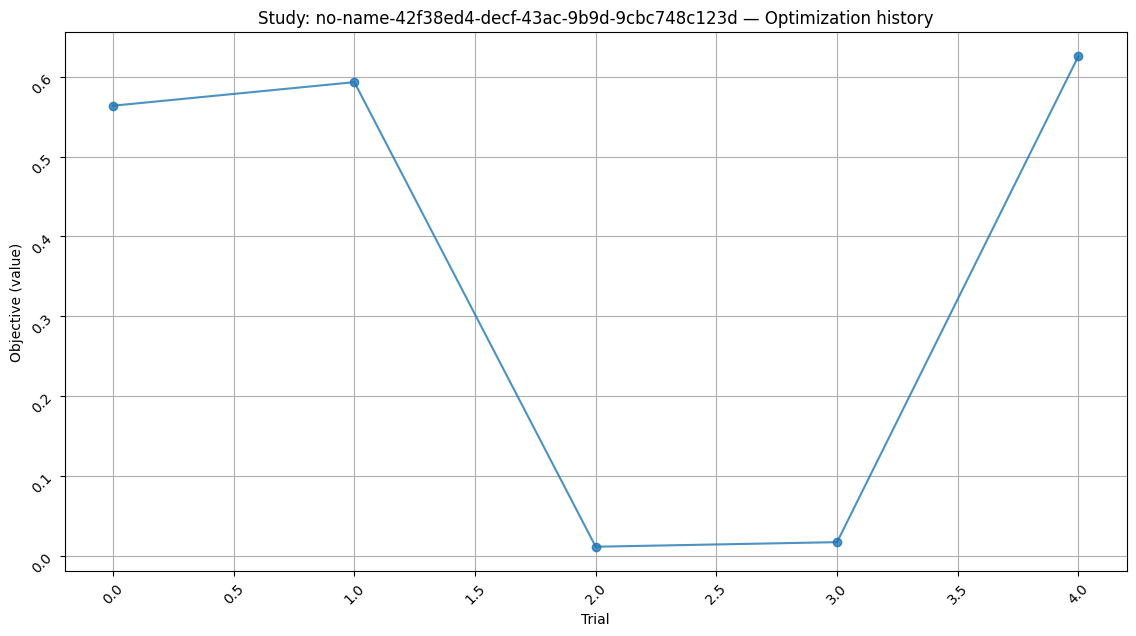

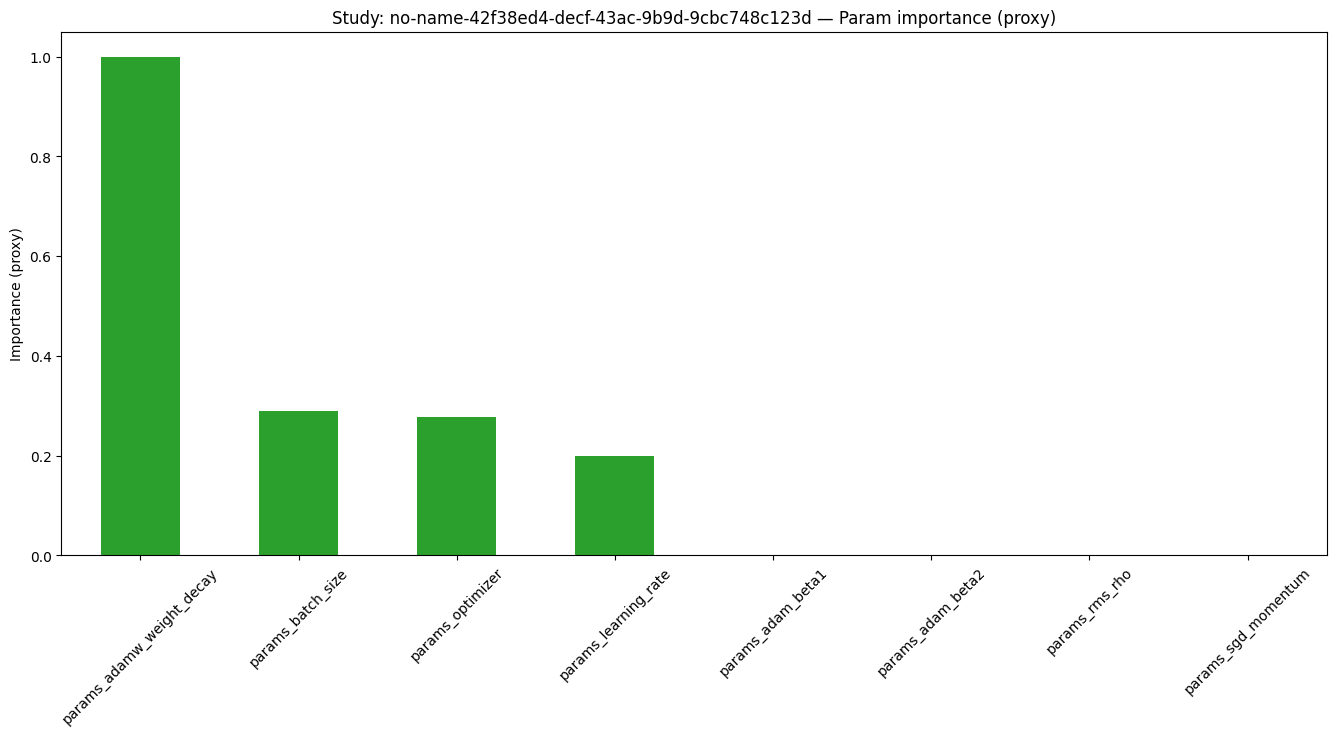

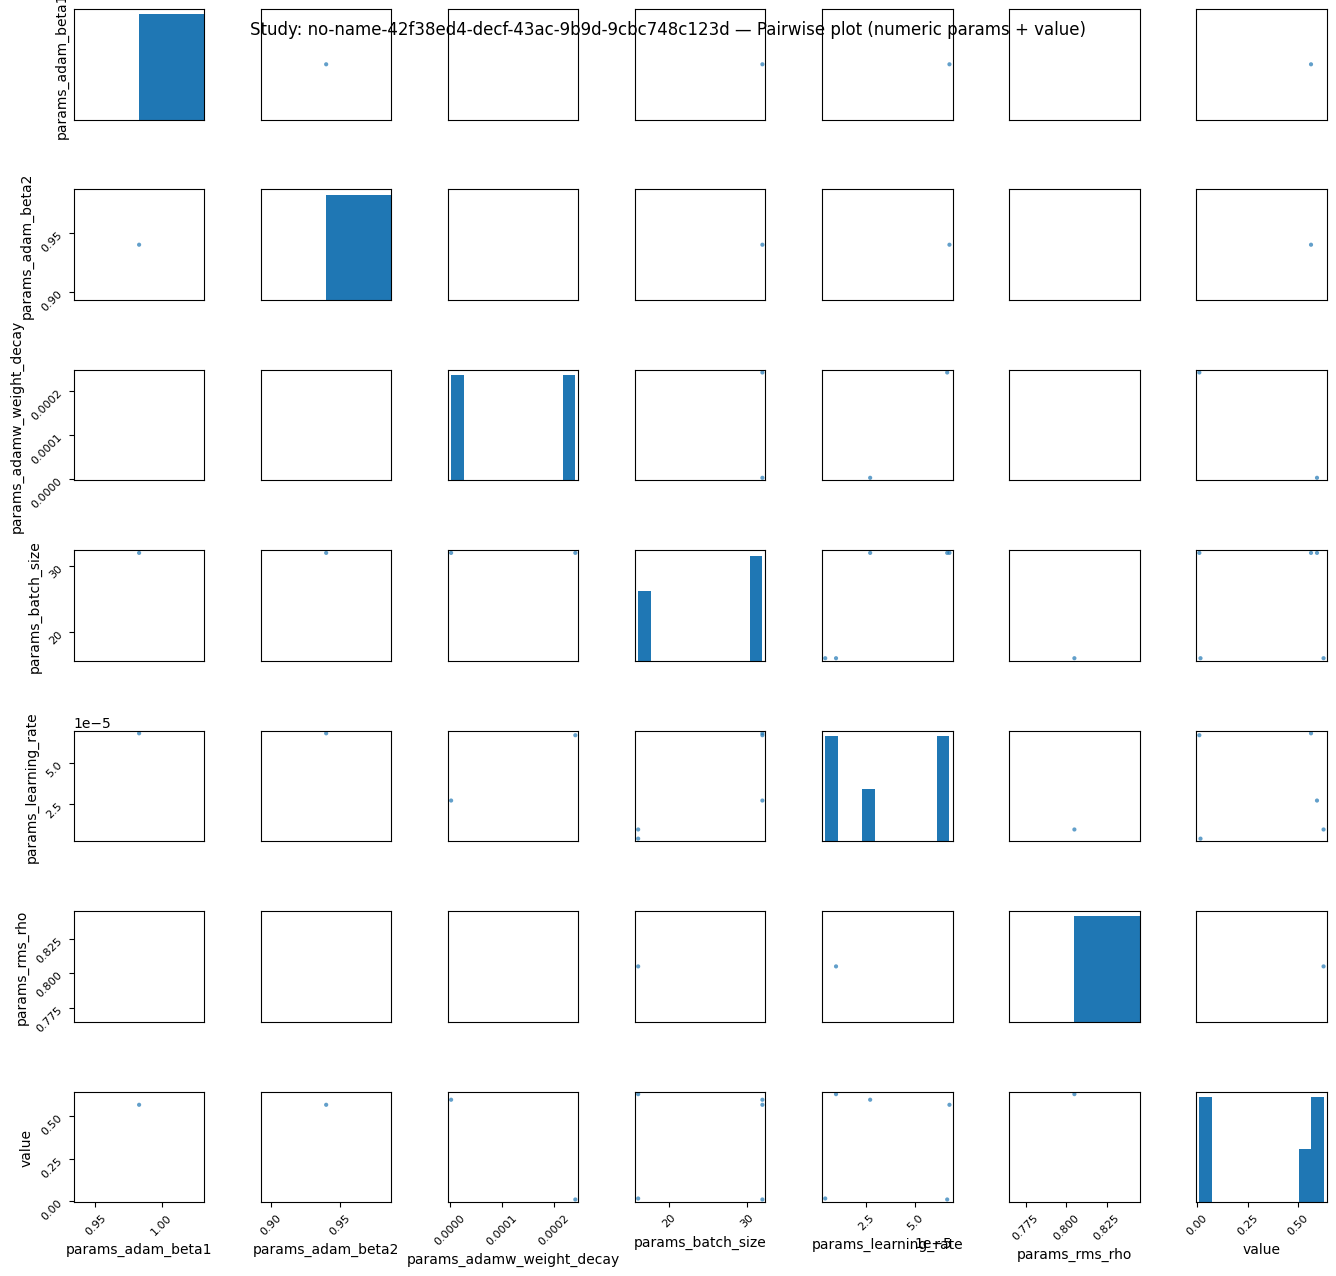


Plotting no-name-f2f75681-0eb7-41ec-89e5-c385759c7a76



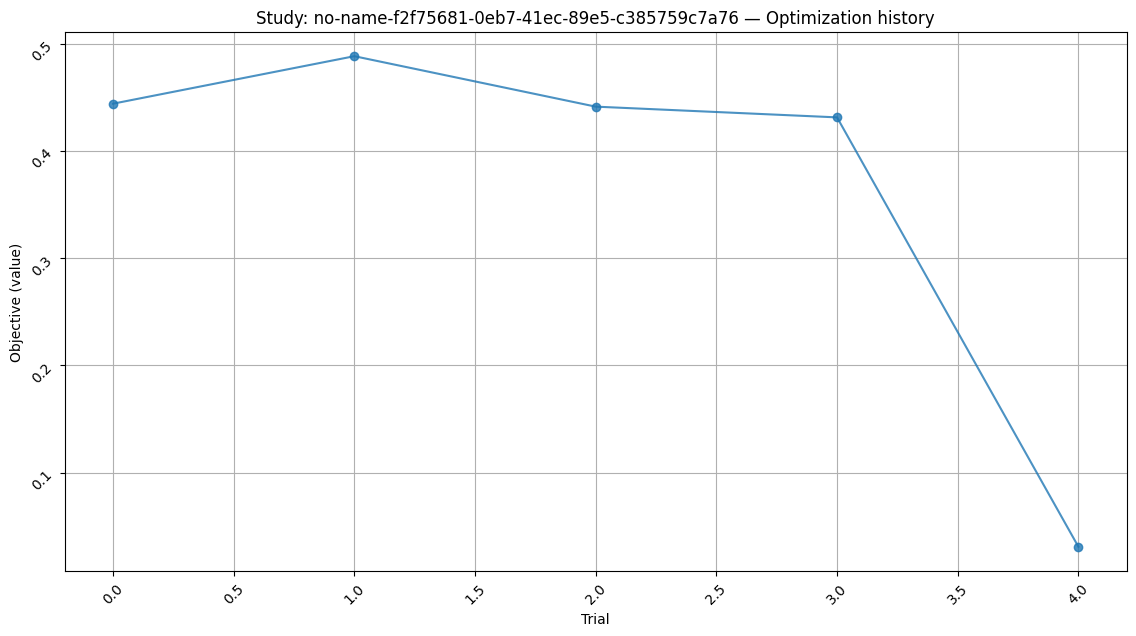

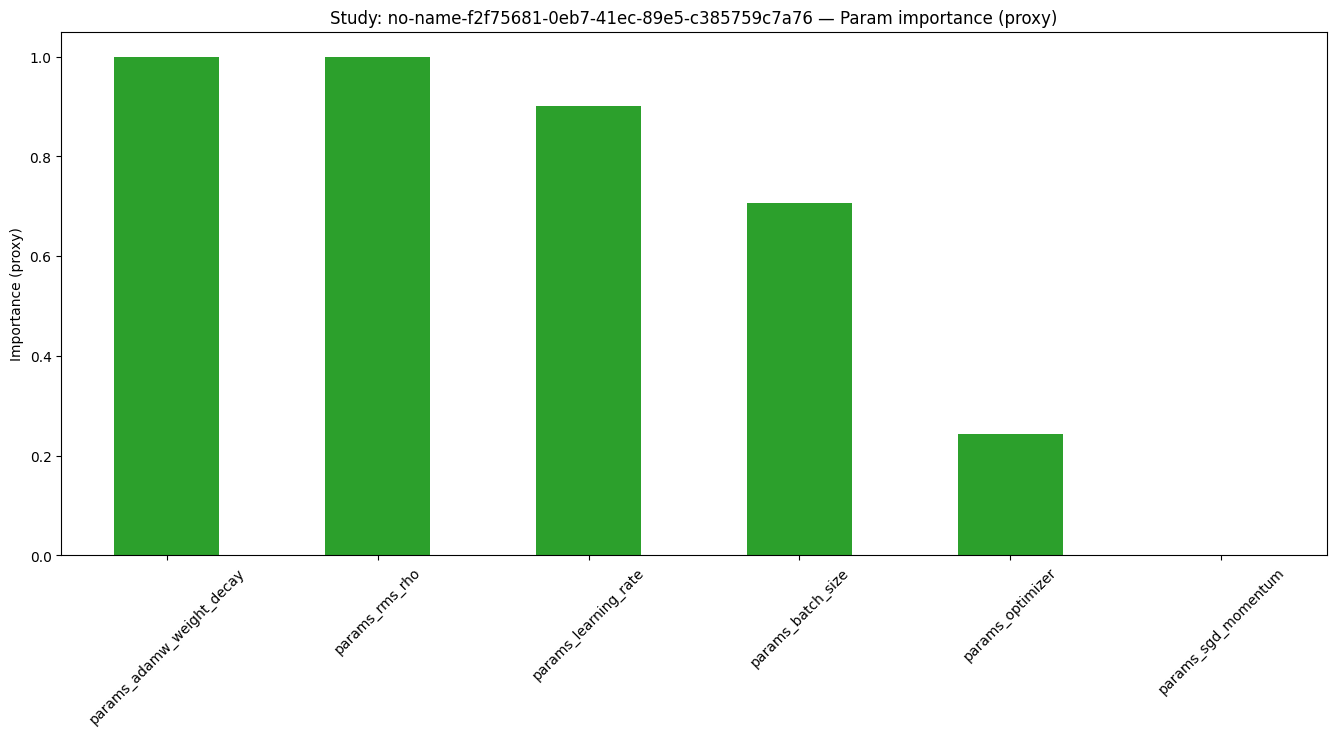

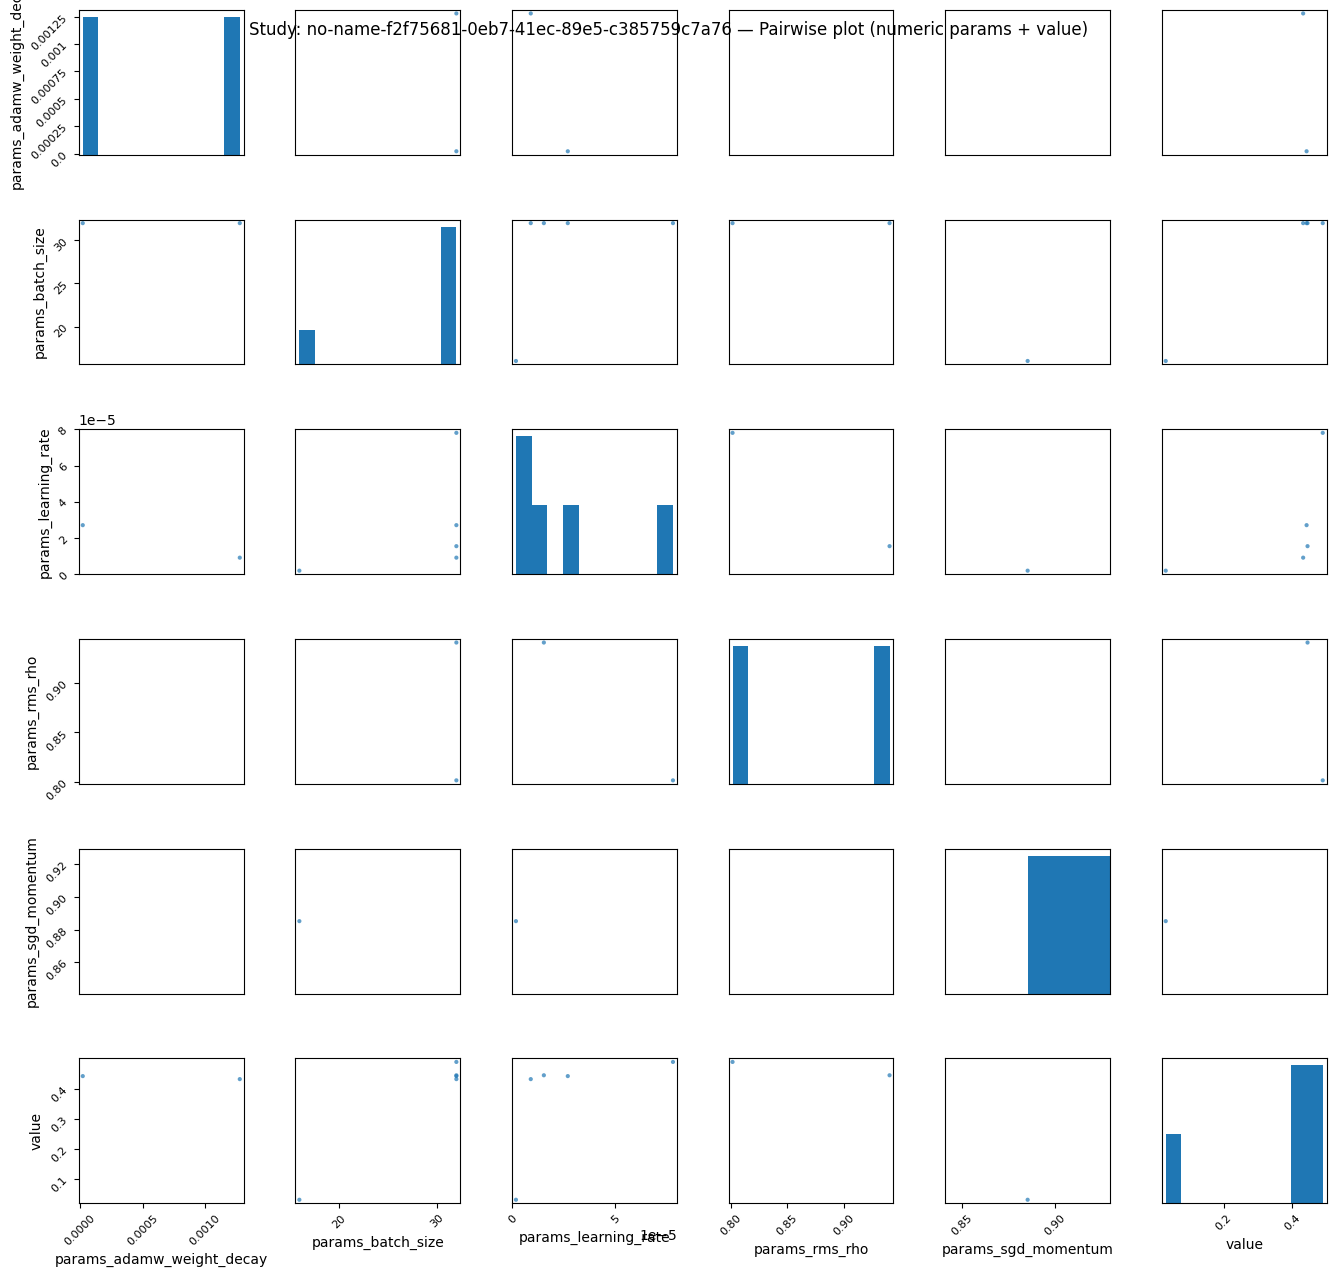


Plotting no-name-00e8f777-3a90-406d-9495-ec3b94ec80c7



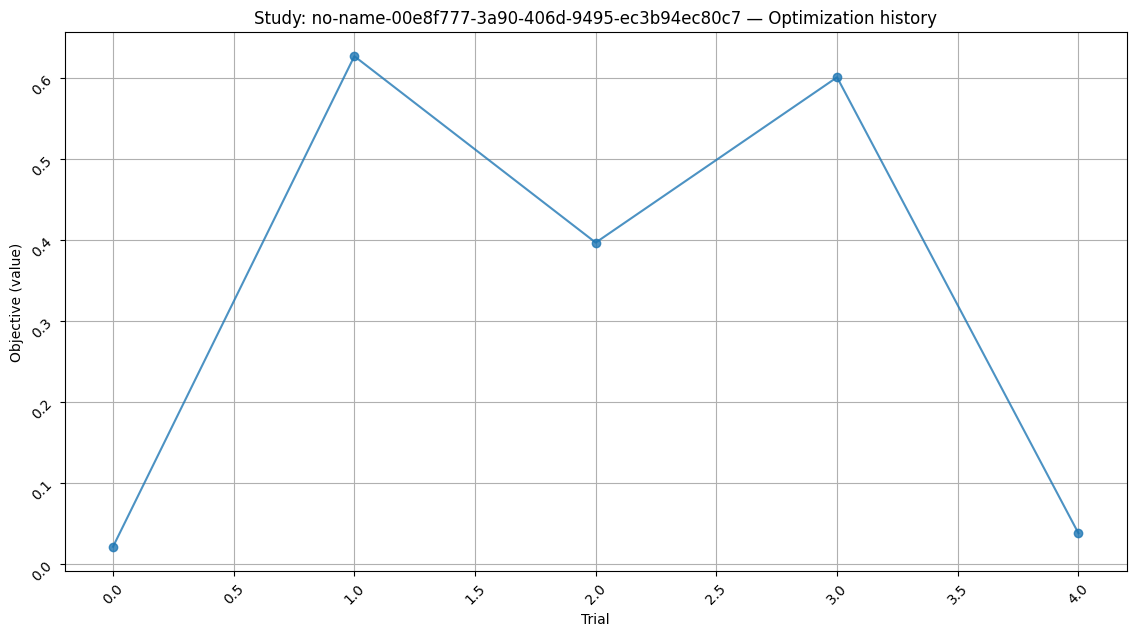

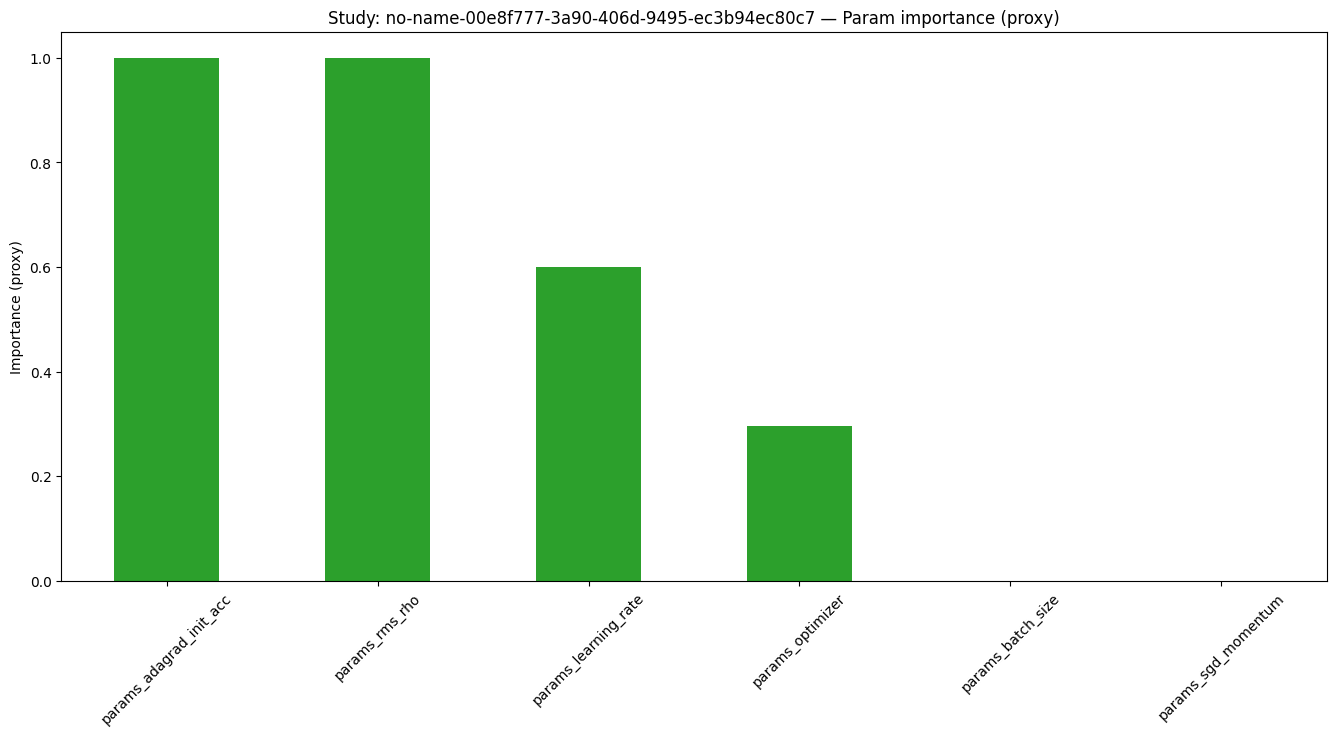

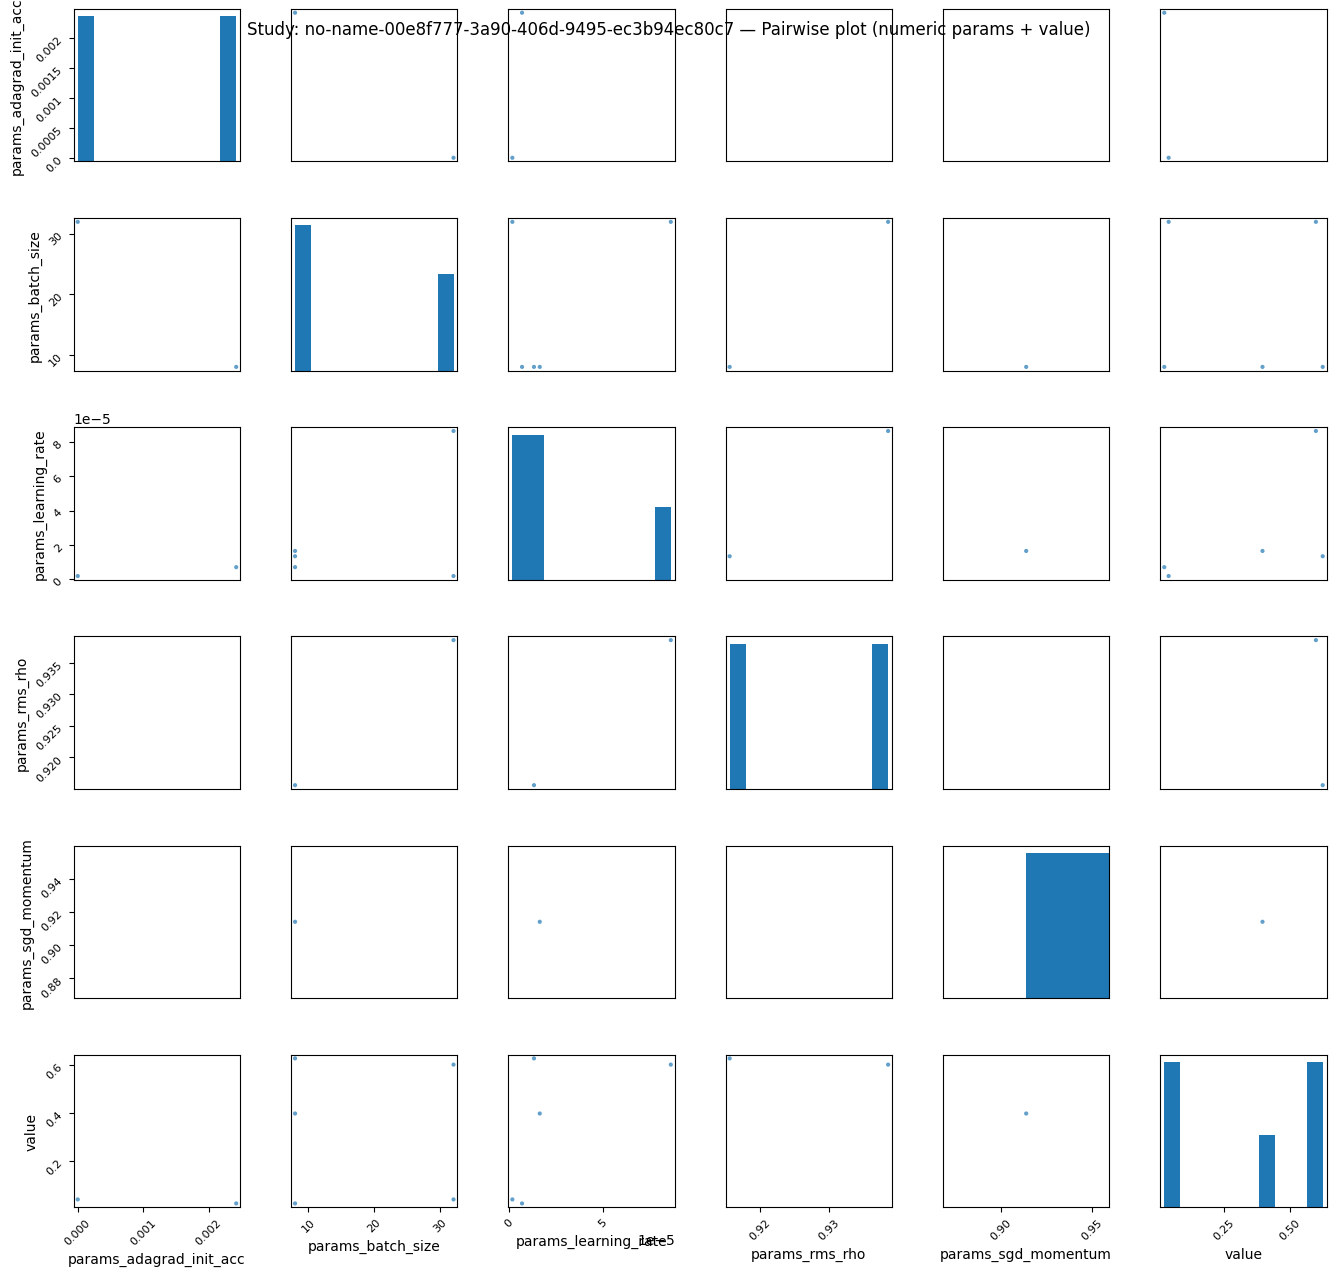


Plotting no-name-5f1c6d14-3d4d-491e-bf9c-07cc962676ad



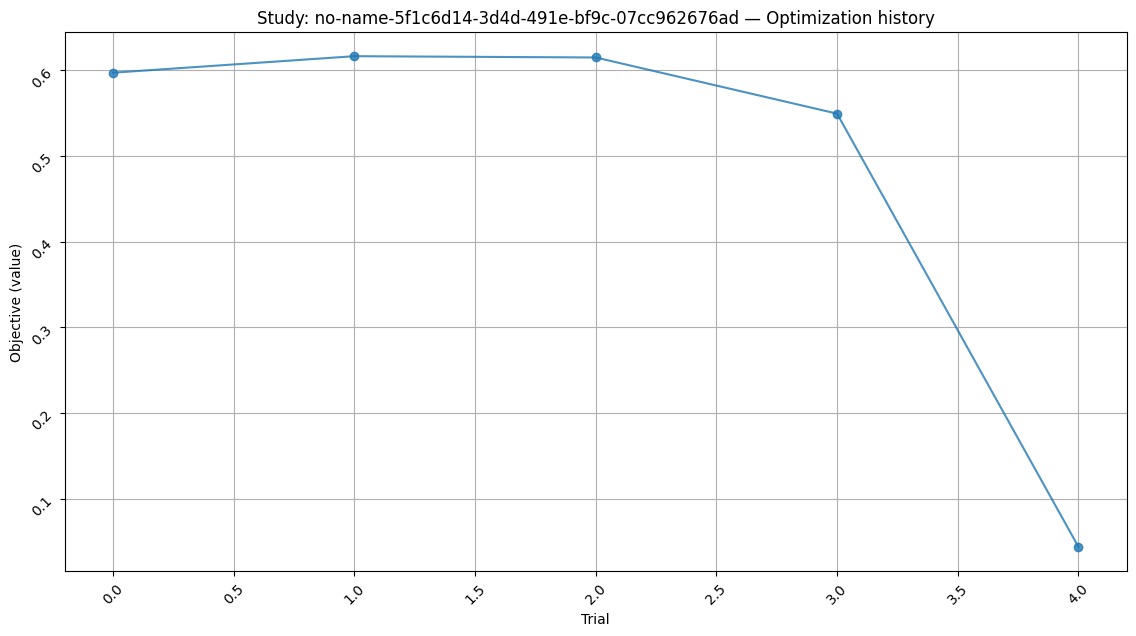

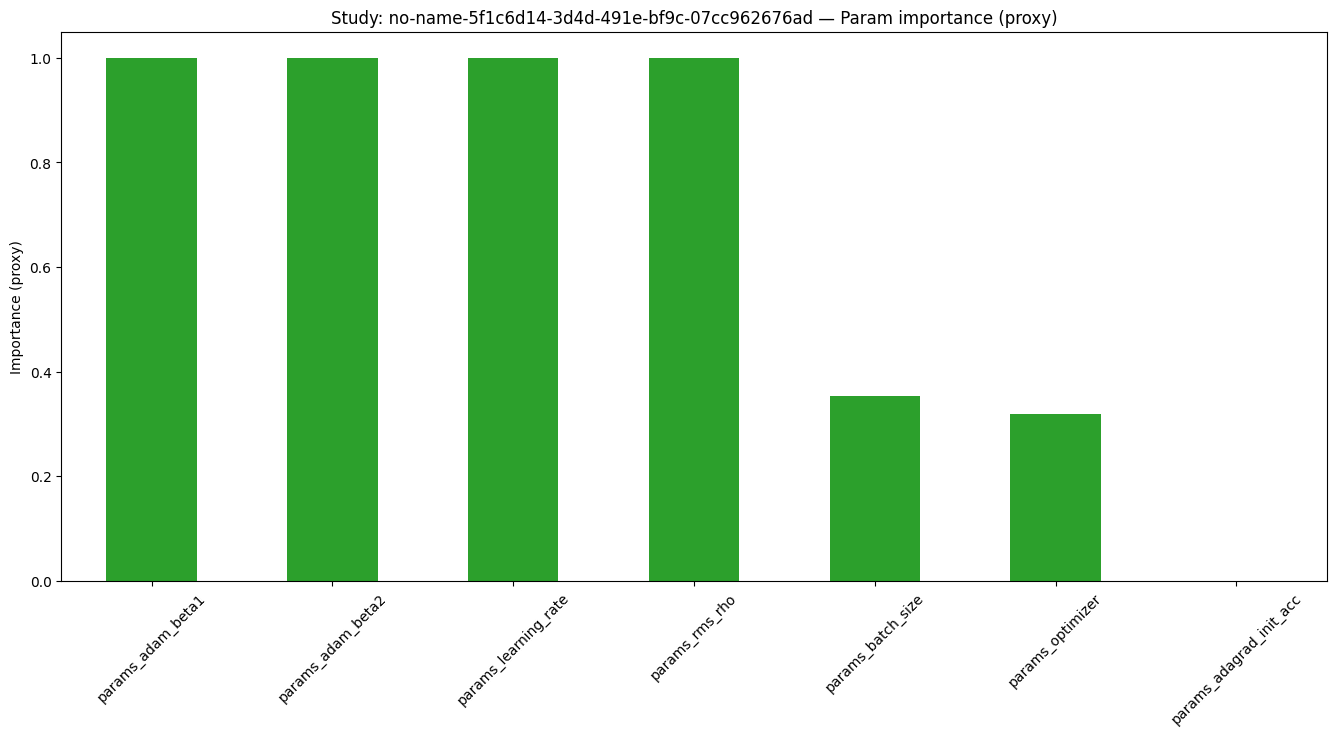

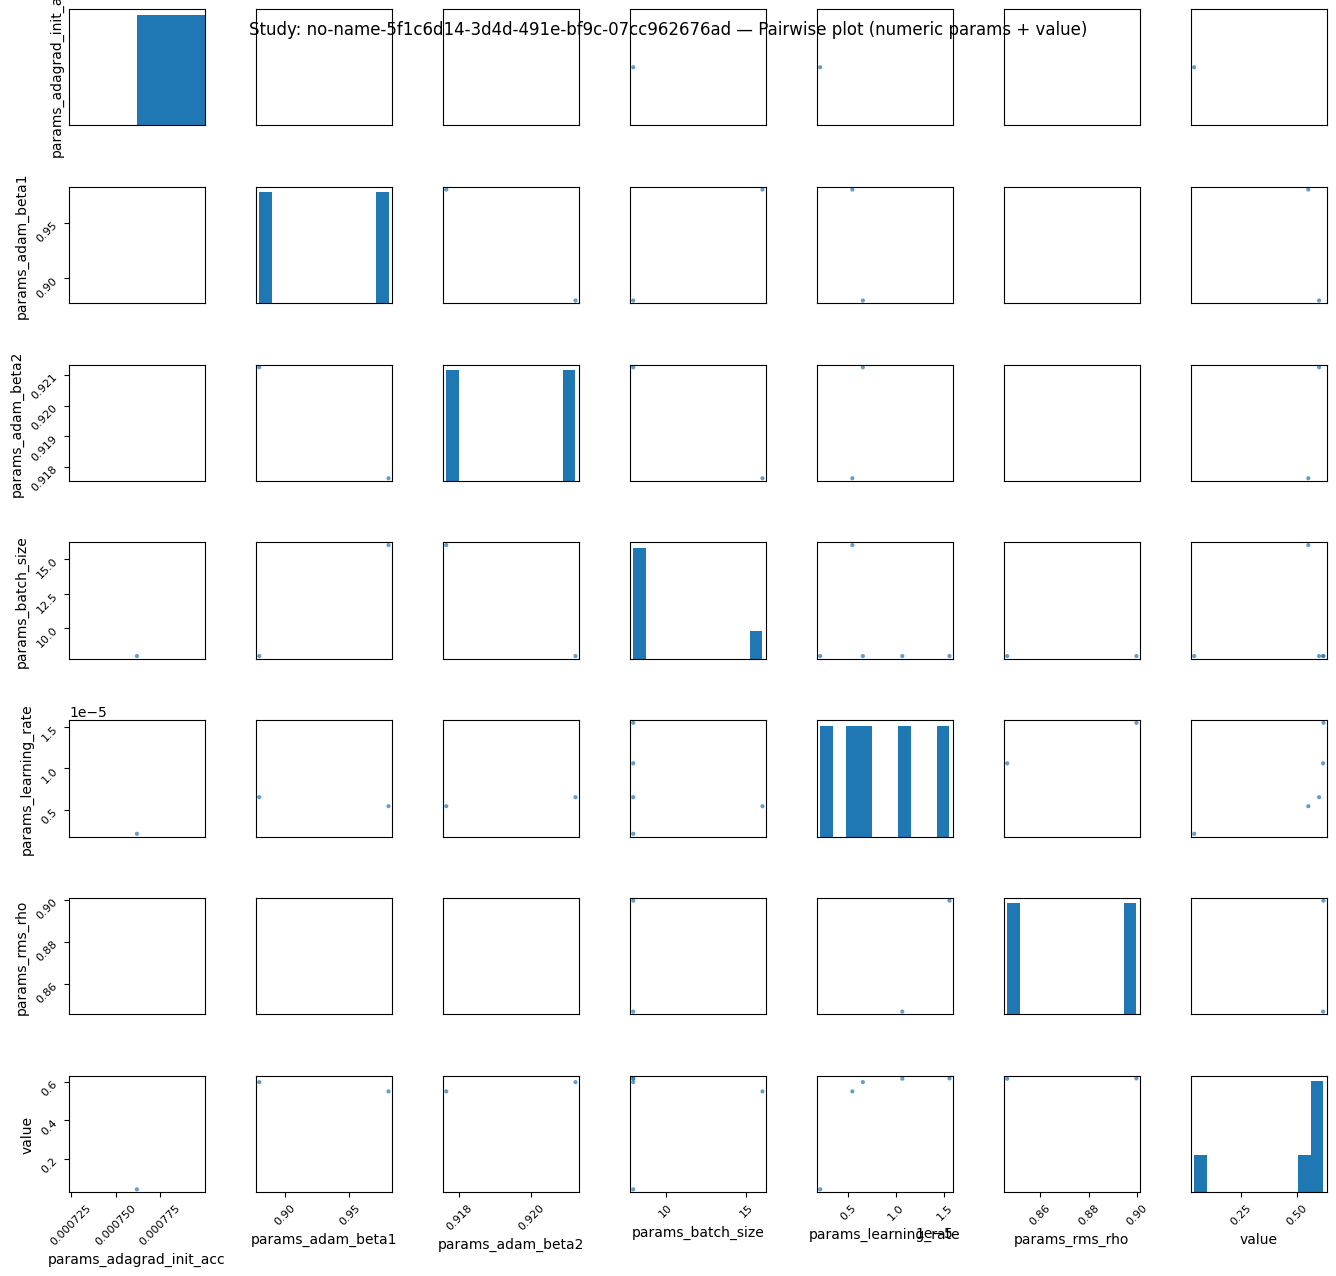


Plotting no-name-3ddb5f4d-ef4f-469d-bc68-a9db34f9e300



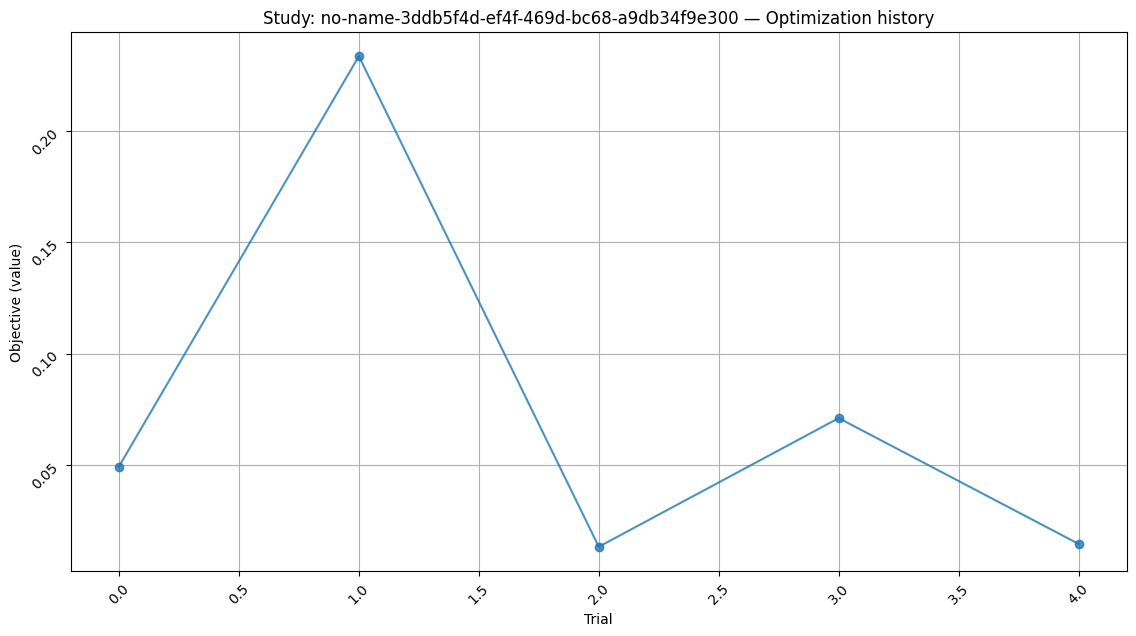

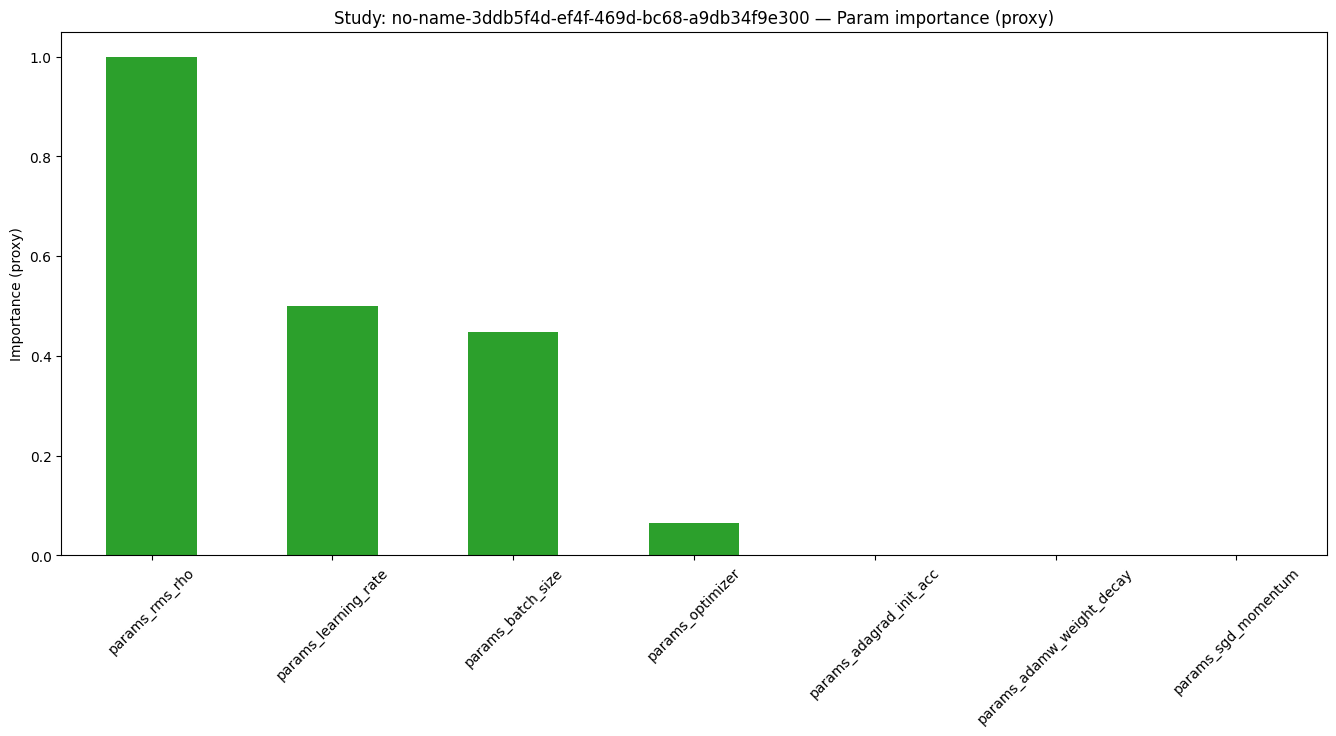

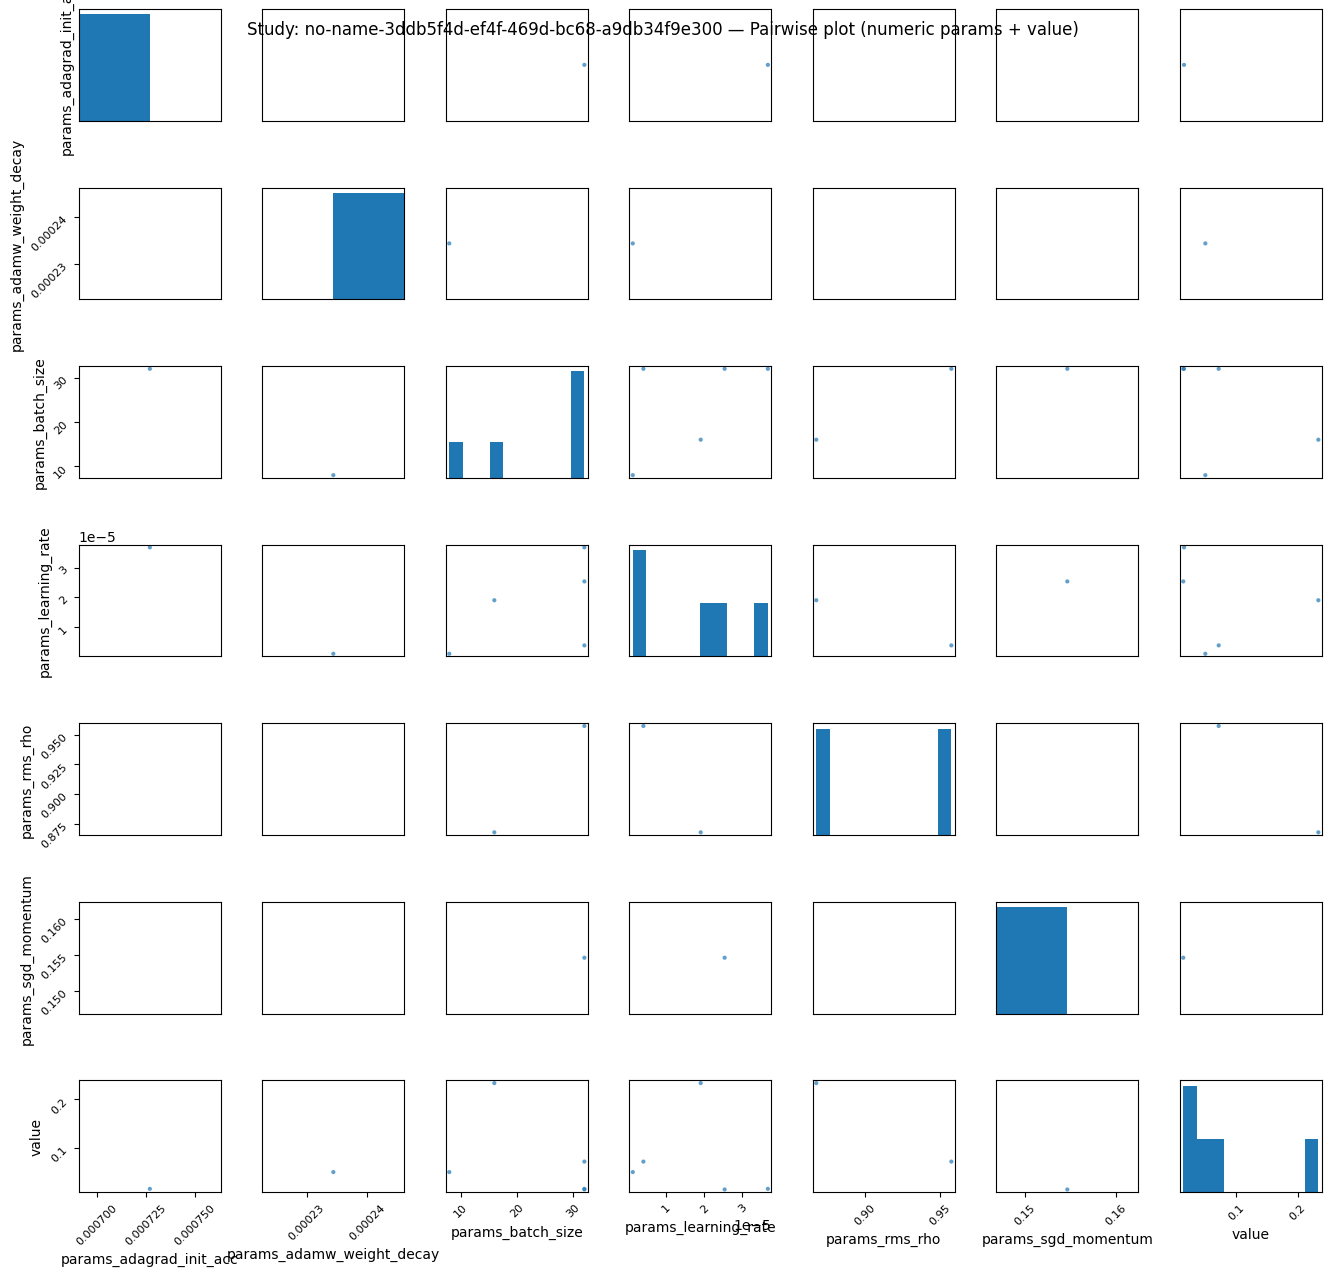


Plotting no-name-528f2142-4ace-483e-b38d-fc489b039741



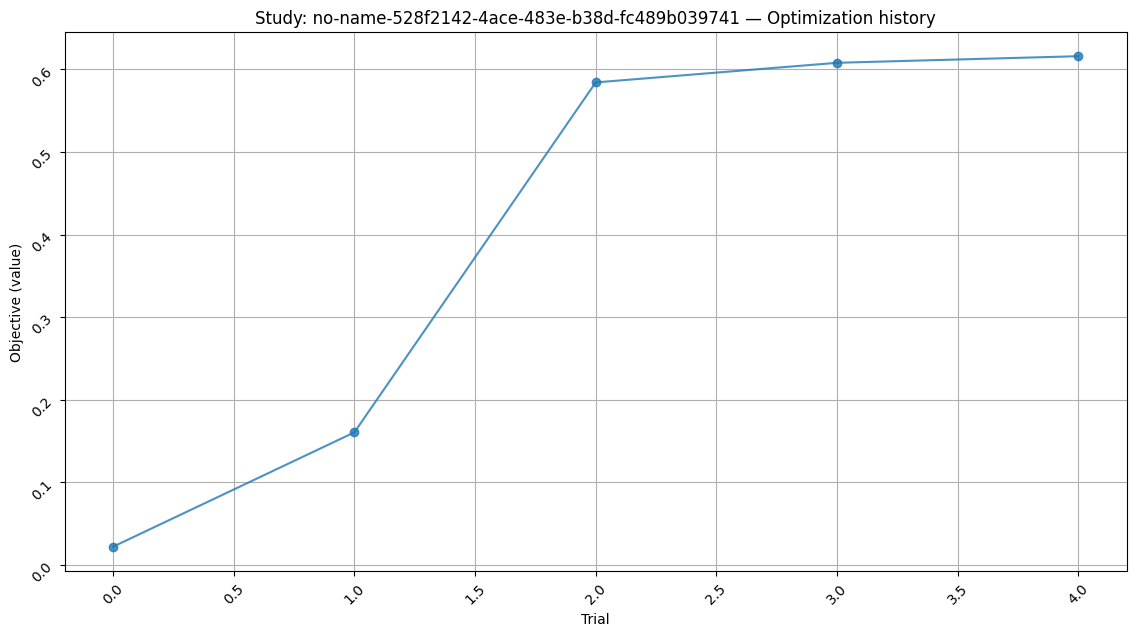

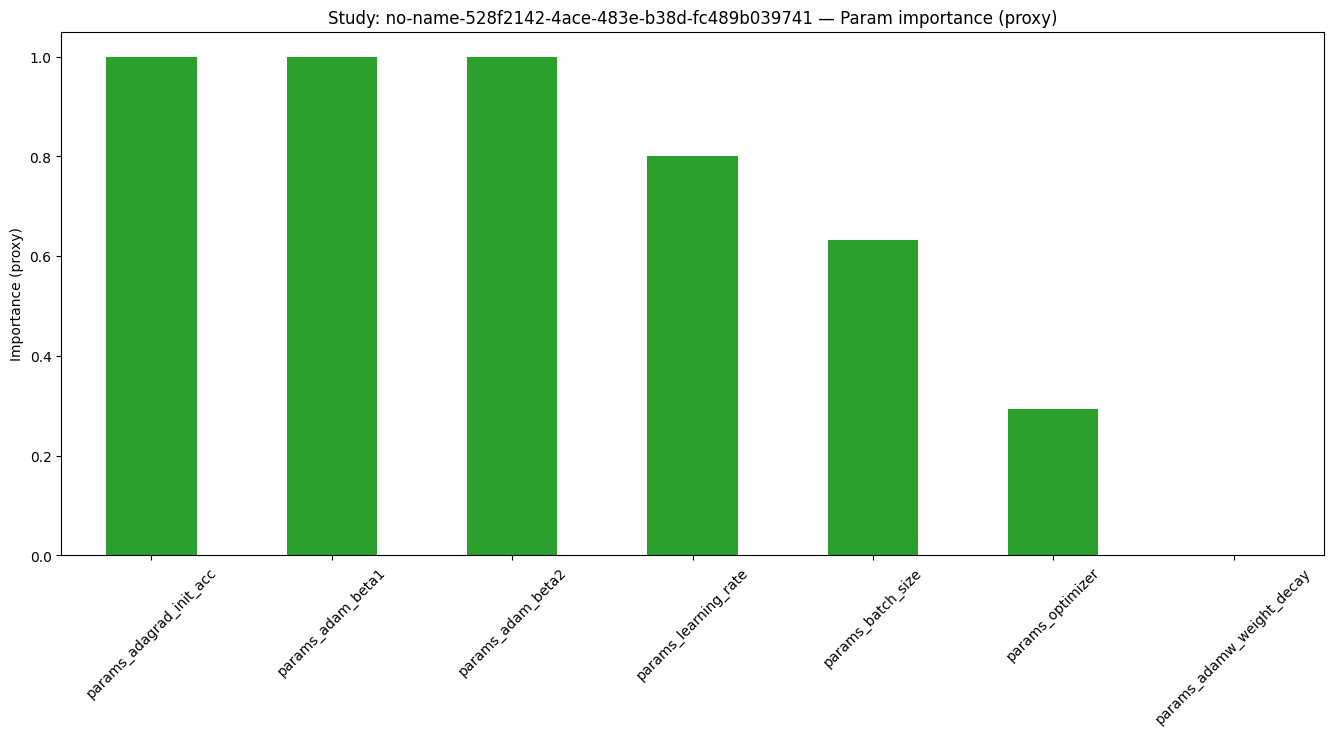

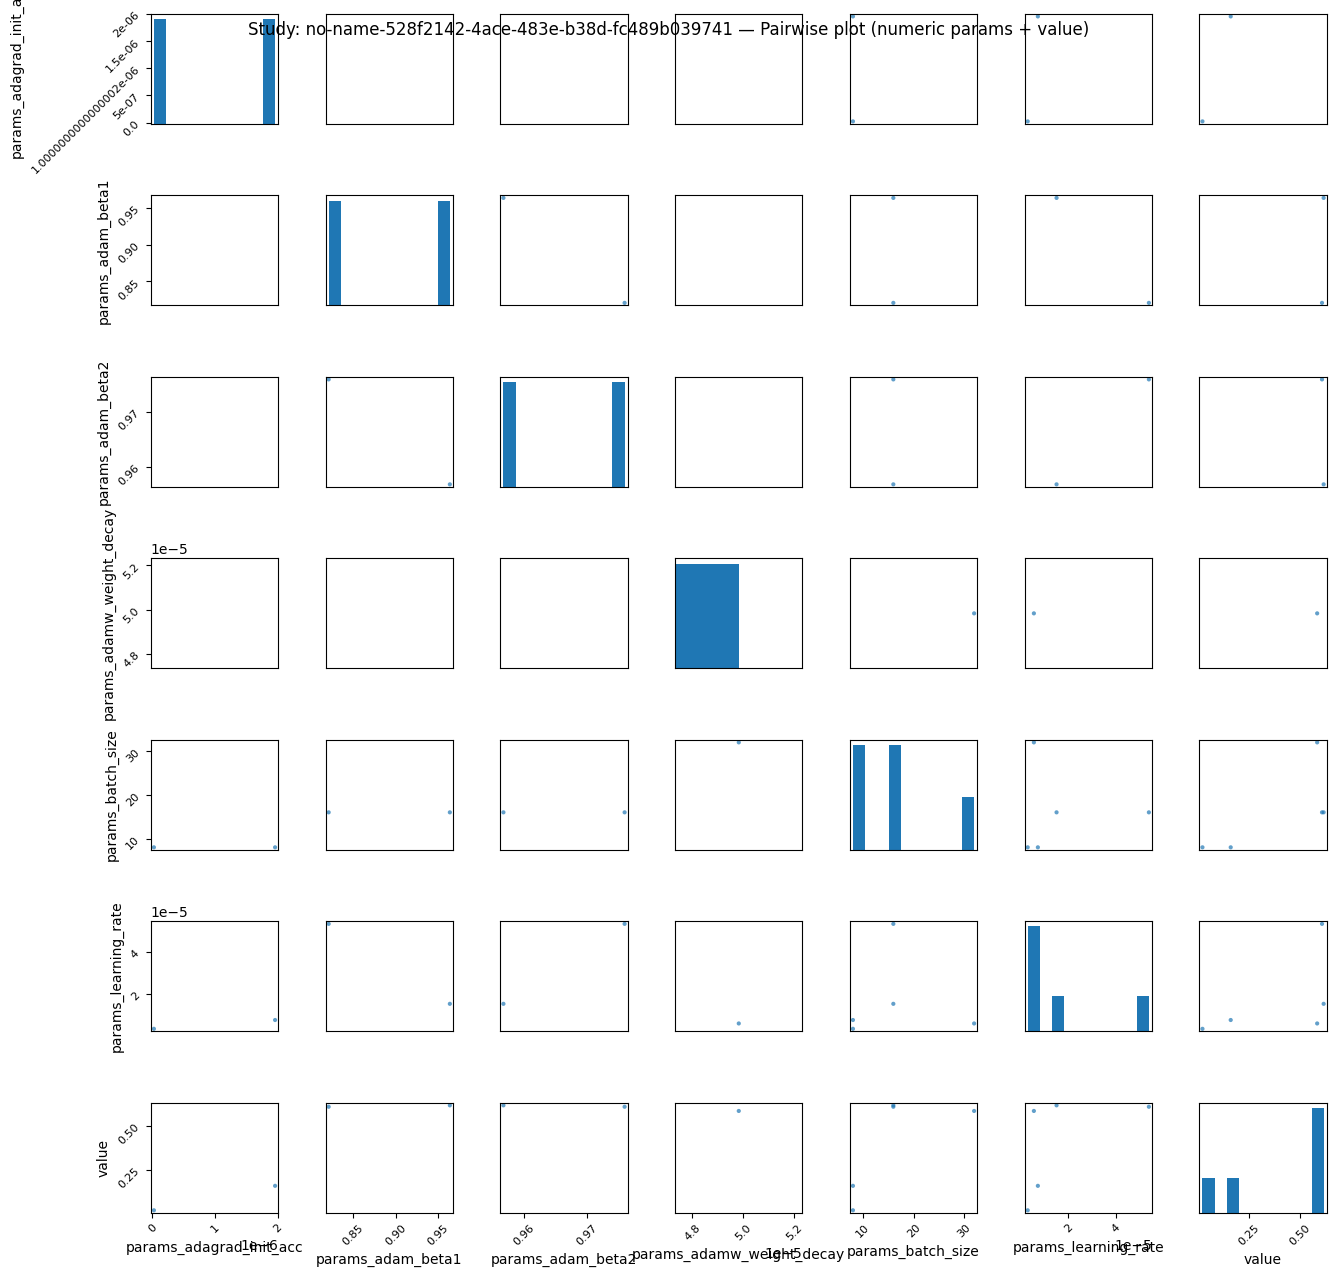


Plotting no-name-9a1b84f5-a8af-4faa-af58-a60d019bfe58



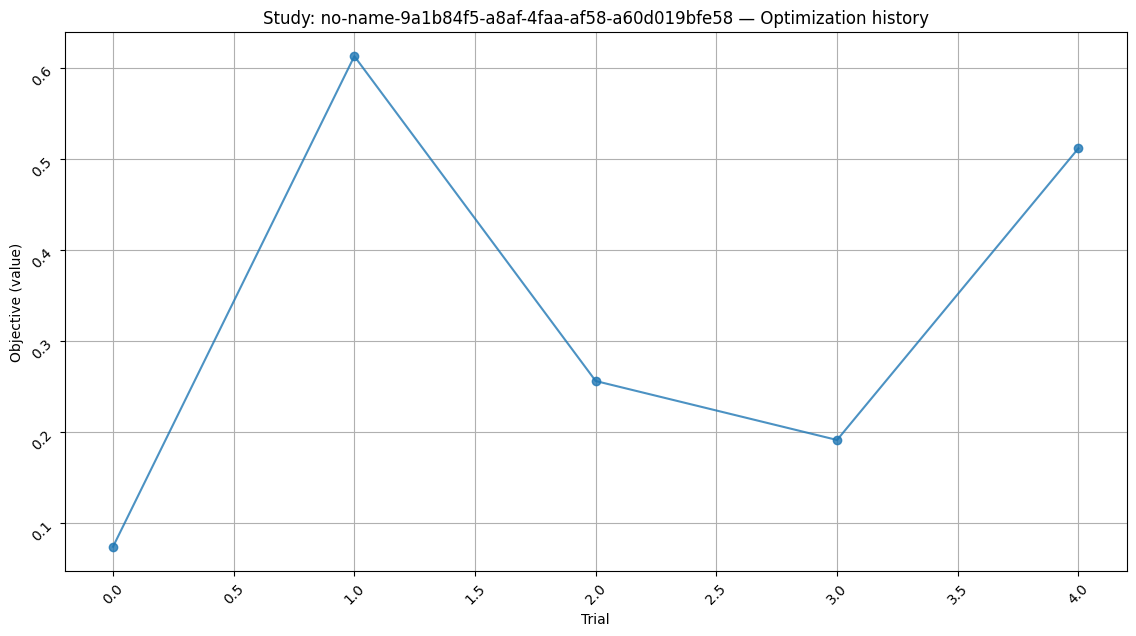

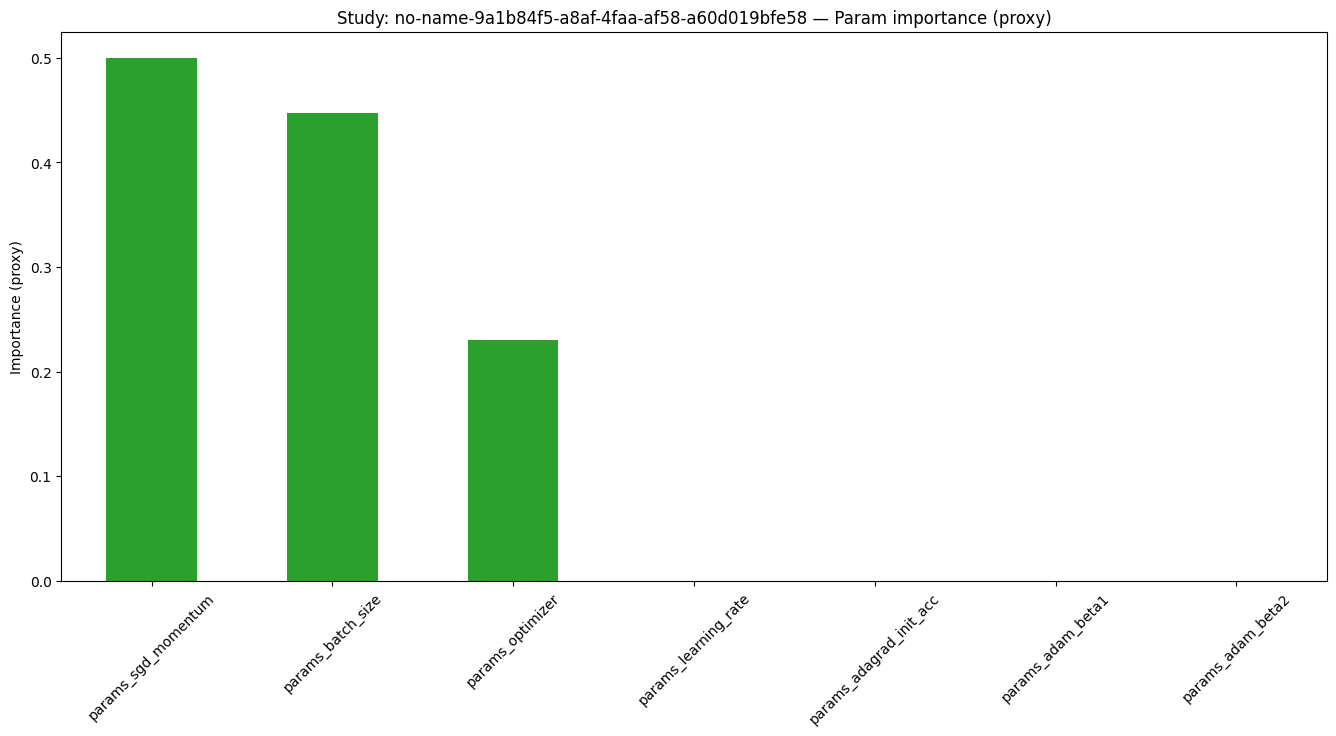

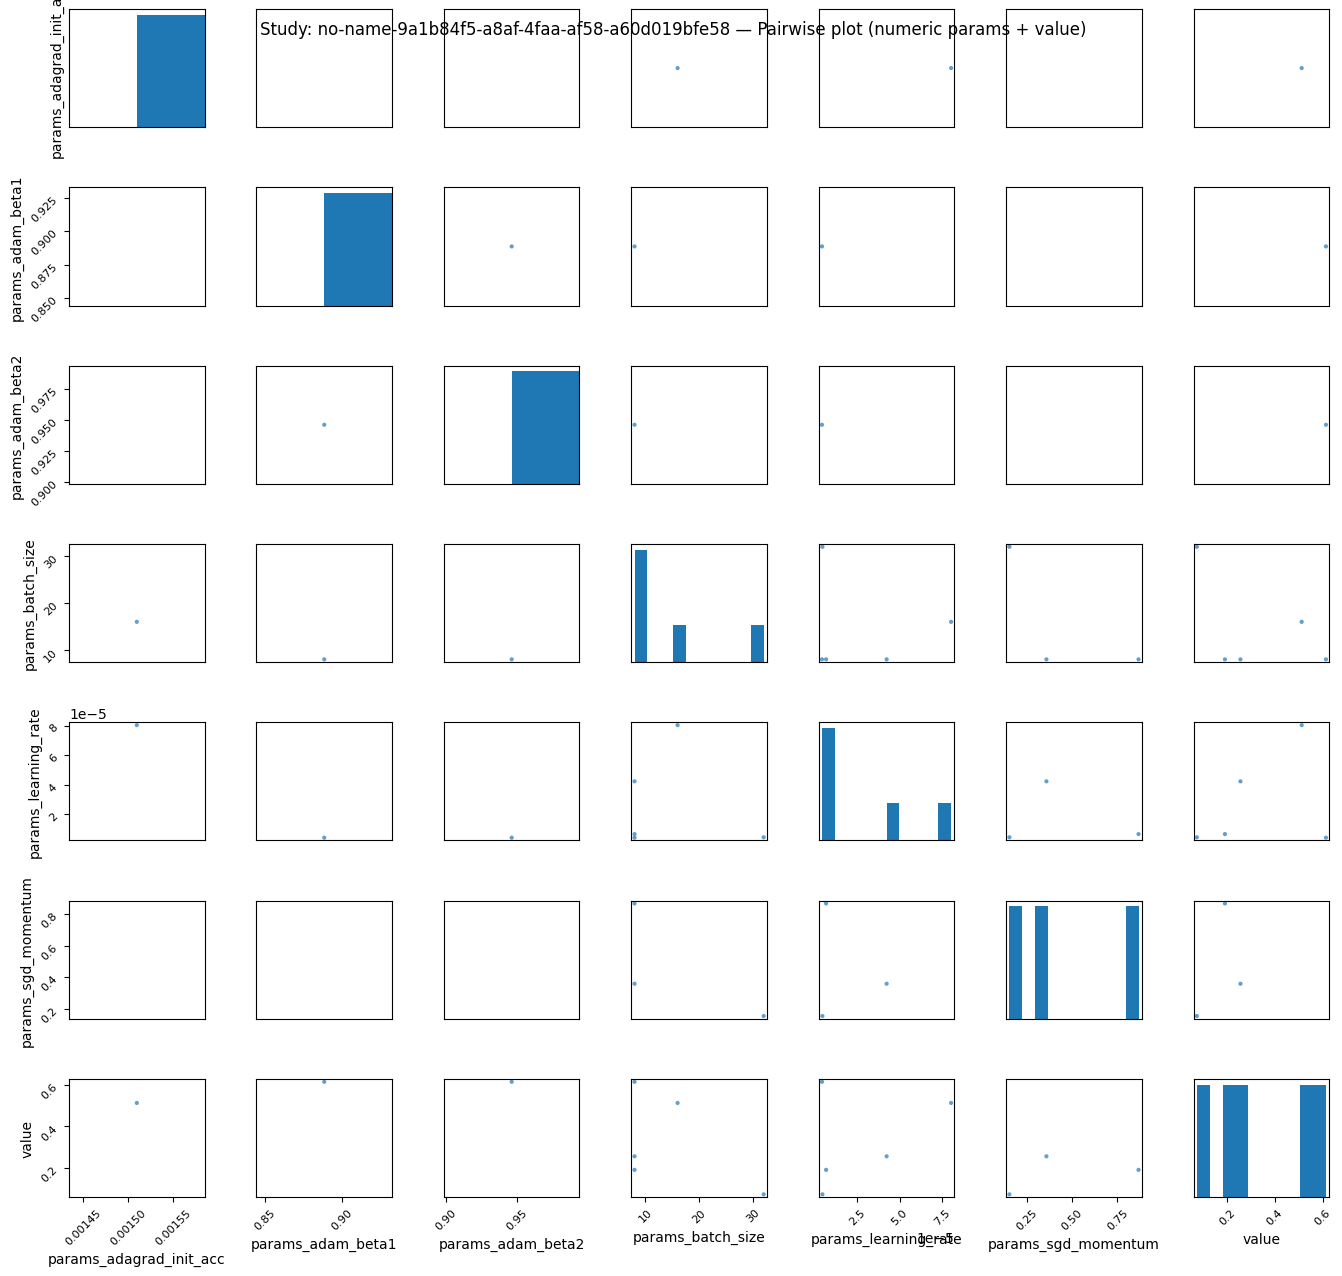

In [ ]:
%%script echo skipping    # Skipping as it due to dependecy on first training look for saved data at the end...deb
plot_aggregate_optuna_matplotlib(all_optuna_studies)

## Optuna Hyperparameter Importance Analysis

Before proceeding with the 2nd round of traing (first round of fine-tuning), we conducted an analysis to identify which hyperparameters have the most significant impact on model performance from a training perspective. This analysis helps us understand the sensitivity of our model to different hyperparameter choices and will help us take decissions in subsequent stage.

### Visualization Methodology

We implemented a custom plotting function (`plot_optuna_study_matplotlib`) that generates three complementary visualizations for each Optuna study:

**1. Optimization History**
   - Tracks the objective value (validation accuracy) across sequential trials
   - Reveals the exploration-exploitation pattern of Optuna's TPE sampler (Tree-structured Parzen Estimator i.e. Optuna's default sampler)
   - Identifies convergence behavior and optimal trial performance

**2. Parameter Importance (Proxy Metric)**
   - Computes importance scores using Spearman correlation for numeric parameters (learning rate, momentum, etc.)
   - Uses grouped standard deviation for categorical parameters (optimizer type, batch size)
   - Ranks the top N parameters by their influence on validation accuracy

**3. Pairwise Scatter Matrix**
   - Displays relationships between numeric hyperparameters and the objective value
   - Helps identify potential parameter interactions and correlations
   - Uses histogram diagonals to show individual parameter distributions

### Interpretation of Optimization History

Key observations:

- **Initial Exploration (Trials 0-1)**: Validation accuracy starts at ~0.20, indicating baseline performance with random hyperparameter initialization
- **Performance Peak (Trial 2)**: Achieves maximum validation accuracy of ~0.37, representing Optuna's discovery of a promising hyperparameter region
- **Subsequent Trials (Trials 3-4)**: Show declining performance (~0.25 → 0.02), as Optuna explores alternative regions and prunes less promising configurations
- **Convergence Pattern**: The trajectory demonstrates Optuna's intelligent sampling strategy, balancing exploration of new hyperparameter combinations with exploitation of known high-performing regions

This analysis helps us understand which hyperparameters require careful tuning versus those with minimal impact on model performance, guiding our subsequent fine-tuning strategy.

## Hyperparameter Importance Analysis: Key Findings for **Adams** optimizer

Based on the parameter importance plot generated from our Optuna study, we can identify which hyperparameters have the most significant impact on validation accuracy (2nd graph).

### Ranked Hyperparameter Importance (Proxy Scores)

The analysis reveals the following importance hierarchy:

**High Impact Parameters:**
1. **Learning Rate** (importance: ~0.90) - By far the most critical hyperparameter
   - Exhibits the strongest correlation with validation accuracy
   - Confirms that careful learning rate tuning is essential for model convergence
   
2. **AdamW Weight Decay** (importance: ~0.50) - Second most influential
   - Regularization strength significantly affects model generalization
   - Important for preventing overfitting in transformer-based models

3. **Batch Size** (importance: ~0.45) - Third in importance
   - Impacts gradient estimation quality and memory usage
   - Influences training stability and convergence speed

4. **Optimizer Type** (importance: ~0.32) - Moderate impact
   - Choice between Adam, AdamW, SGD, RMSprop, and Adagrad matters
   - Different optimizers suit different model architectures and data characteristics. As Adam gave the best result so far we feel Adam will be a good candidate and we will wait for the first round of optimization to decide what to use for the final model

**Low Impact Parameters (Adam-Specific):**
5. **adam_beta1** (importance: ~0.0) - Negligible impact
6. **adam_beta2** (importance: ~0.0) - Negligible impact  
7. **sgd_momentum** (importance: ~0.0) - Negligible impact

### Insights on Adam Hyperparameters

The Adam-specific momentum parameters (`adam_beta1` and `adam_beta2`) show **virtually zero importance** in our study. This indicates that:

- The default values (beta1 = 0.9, beta2 = 0.999) are already well-optimized for our task
- Fine-tuning these momentum terms provides minimal performance gains compared to optimizing learning rate
- Optuna's exploration of different beta values did not significantly correlate with validation accuracy improvements

### Implications

This importance analysis validates our optimization strategy:
- **Primary focus**: Learning rate search space (1e-6 to 1e-4) was appropriately prioritized
- **Secondary considerations**: Weight decay and batch size optimization provide meaningful improvements
- **Diminishing returns**: Optimizer-specific hyperparameters (momentum terms) have minimal impact and could be fixed at default values in future experiments to reduce search space complexity

The results suggest that for subsequent training rounds, we can simplify our hyperparameter search by fixing Adam's beta parameters at their defaults while concentrating Optuna trials on learning rate, weight decay, and batch size optimization.

### Let us now work on the similarity and merging of classes

#### Helper method to do n gram(1,2) TF_IDF for finding cosine similarity

In [ ]:
# Let us create TF-IDF simlarty matrix

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def tfidf_overlap(hf_dataset, top_n=15, ngram_range=(1, 2), text_col="text", category_col="category"):
    """
    TF-IDF based category overlap analysis
    Dataset `hf_dataset` that contains at least the columns: text, category, label.

    Uses global label_names / label2id / id2label when present
    Returns: list of (cat1, cat2, similarity) sorted descending.
    """
    required_cols = [text_col, "label"]

    # Include the specific category_col for analysis
    if category_col not in required_cols:  # Avoid adding if it's already text_col or 'label' by some chance
        required_cols.append(category_col)

    # If category_col is different from 'category', and 'category' exists in the dataset, include it too
    # This is to handle cases where the original 'category' might be needed for context/display in the df
    if category_col != "category" and "category" in getattr(hf_dataset, "column_names", []) and "category" not in required_cols:
        required_cols.append("category")

    # Ensure the list of columns is unique to prevent pandas issues with duplicate column selection
    required_cols_unique = list(dict.fromkeys(required_cols))

    if hasattr(hf_dataset, "to_pandas"):
        df = hf_dataset.to_pandas()[required_cols_unique].copy()
    else:
        df = pd.DataFrame(hf_dataset)[required_cols_unique].copy()

    # use the correct label name / category name
    if "label_names" in globals() and label_names and category_col == "category":
        categories = list(label_names)
    elif category_col == "category_merged" and "merged_label_names" in globals() and merged_label_names:
        categories = list(merged_label_names)
    else:
        categories = sorted(df[category_col].unique().tolist())

    # Aggregate text per category using the specified category_col
    category_texts = df.groupby(category_col)[text_col].apply(lambda x: " ".join(x)).to_dict()

    # Keep only categories present in the aggregated map (defensive)
    # FIX: corrected comprehension (was "for c c in ...")
    categories = [c for c in category_texts.keys()]
    texts = [category_texts[c] for c in categories]

    # TF-IDF vectorizer
    vectorizer = TfidfVectorizer(
        max_features=5000,
        ngram_range=ngram_range,
        stop_words="english",
        min_df=2,
        max_df=0.9,
    )
    tfidf_matrix = vectorizer.fit_transform(texts)

    # Cosine similarity between category vectors
    sim_matrix = cosine_similarity(tfidf_matrix)

    # Collect pairs with low threshold to inspect; adjust threshold if needed
    pairs = []
    for i in range(len(categories)):
        for j in range(i + 1, len(categories)):
            sim = float(sim_matrix[i, j])
            # Keep pairs with at least a small similarity (0.15 used previously)
            if sim > 0.15:
                pairs.append((categories[i], categories[j], sim))

    pairs.sort(key=lambda x: x[2], reverse=True)

    # Print top results
    print(f"\nTop {top_n} Most Similar Category Pairs (TF-IDF, ngram={ngram_range}, category_col='{category_col}'):")
    print("=" * 70)
    print(f"{'#':<3} {'Category 1':<25} {'Category 2':<25} {'Score':<8}")
    print("-" * 70)
    for rank, (cat1, cat2, sim) in enumerate(pairs[:top_n], 1):
        print(f"{rank:<3} {cat1:<25} {cat2:<25} {sim:<8.3f}")

    # Summary counts
    high_thr = 0.8
    high = [p for p in pairs if p[2] > high_thr]
    print(f"\nSUMMARY: High overlap (> {high_thr}): {len(high)} pairs   |  Consider reviewing/merging these.")

    # plot similarity for the top categories by support
    top_n_cats = min(15, len(categories))
    top_cats = df[category_col].value_counts().head(top_n_cats).index.tolist()
    cat_indices = [categories.index(c) for c in top_cats if c in categories]

    if len(cat_indices) >= 2:
        sim_subset = sim_matrix[np.ix_(cat_indices, cat_indices)]
        fig, ax = plt.subplots(figsize=(10, 8))  # Get fig and ax objects
        im = ax.imshow(sim_subset, cmap="YlOrRd", aspect="auto", vmin=0, vmax=0.5)
        plt.colorbar(im, ax=ax, label="Similarity")
        ax.set_xticks(range(len(top_cats)))
        ax.set_xticklabels(top_cats, rotation=90)
        ax.set_yticks(range(len(top_cats)))
        ax.set_yticklabels(top_cats)
        ax.set_title(f"Category Similarity (TF-IDF) - Red = High Overlap (using '{category_col}')", fontsize=12)
        plt.tight_layout()

        # Annotate scores within the plot
        for i in range(len(top_cats)):
            for j in range(len(top_cats)):
                ax.text(j, i, f'{sim_subset[i, j]:.2f}', ha="center", va="center", color="teal", fontsize=8)
        plt.show()
    else:
        print("Not enough categories to plot similarity heatmap.")

    return pairs

Let us perform TF-IDF similary score anlysis to compare some of these before we merge so we can do a baseline (original) similarity and comapre with the merged map similarity. We perform with ngram(1,2) i.e use both one gram and bi-gram


Top 20 Most Similar Category Pairs (TF-IDF, ngram=(1, 2), category_col='category'):
#   Category 1                Category 2                Score   
----------------------------------------------------------------------
1   FOOD & DRINK              TASTE                     0.852   
2   PARENTING                 PARENTS                   0.849   
3   HEALTHY LIVING            WELLNESS                  0.827   
4   THE WORLDPOST             WORLD NEWS                0.711   
5   THE WORLDPOST             WORLDPOST                 0.670   
6   ARTS                      CULTURE & ARTS            0.616   
7   WORLD NEWS                WORLDPOST                 0.594   
8   ENVIRONMENT               GREEN                     0.568   
9   MEDIA                     POLITICS                  0.557   
10  STYLE                     STYLE & BEAUTY            0.551   
11  COMEDY                    POLITICS                  0.549   
12  ARTS                      ARTS & CULTURE            0.545   

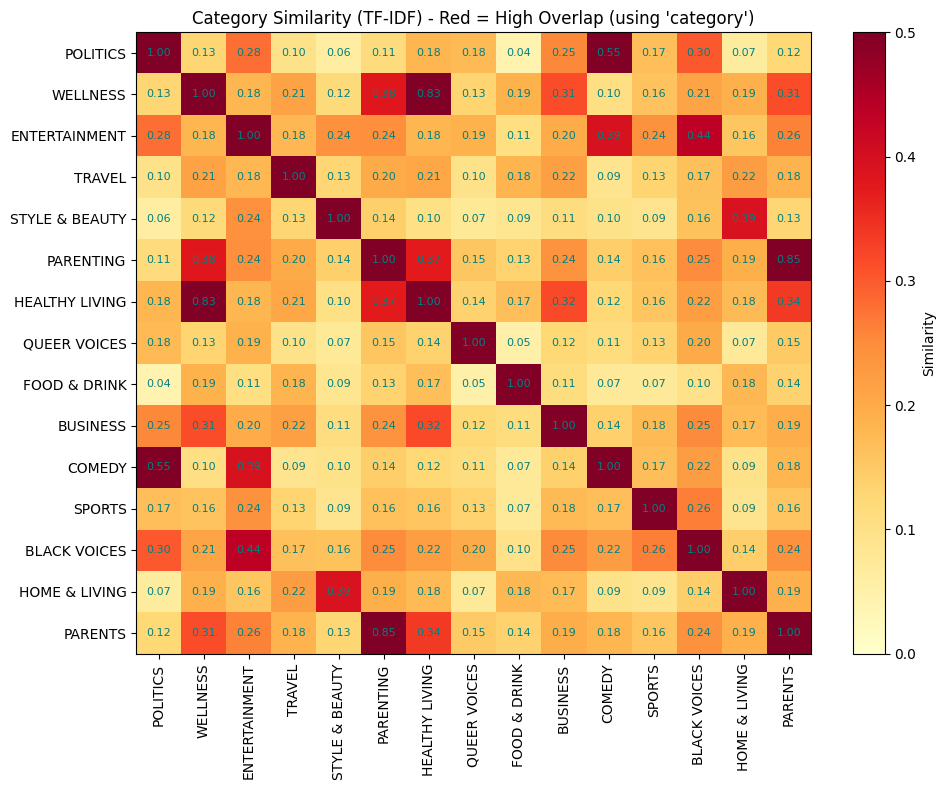

Top TF-IDF pairs (full subset):
 1. FOOD & DRINK <-> TASTE : 0.852
 2. PARENTING <-> PARENTS : 0.849
 3. HEALTHY LIVING <-> WELLNESS : 0.827
 4. THE WORLDPOST <-> WORLD NEWS : 0.711
 5. THE WORLDPOST <-> WORLDPOST : 0.670
 6. ARTS <-> CULTURE & ARTS : 0.616
 7. WORLD NEWS <-> WORLDPOST : 0.594
 8. ENVIRONMENT <-> GREEN : 0.568
 9. MEDIA <-> POLITICS : 0.557
10. STYLE <-> STYLE & BEAUTY : 0.551


In [ ]:
# execute the tfidf overlap analysis method on the huff_subset
pairs_full  = tfidf_overlap(huff_subset, top_n=20, ngram_range=(1,2))
#print the top 10 pairs
print("Top TF-IDF pairs (full subset):")
for i, (c1, c2, score) in enumerate(pairs_full[:10], start=1):
    print(f"{i:2d}. {c1} <-> {c2} : {score:.3f}")

From the analysis above, we observe numerous category pairs with high TF-IDF similarity scores, indicating a need for category merging. However, instead of merging based solely on TF-IDF scores, we will prioritize misclassification patterns and class support (i.e., size of class) to guide our merging strategy. This ensures that merging occurs from lower support classes to higher support classes, preserving the integrity of well-represented categories. We will use TF-IDF similarity scores as a secondary validation tool to assess and compare our merging decisions against content-based similarity baselines.

In [ ]:
# lets use the class merging based on what was identified earlier
from collections import Counter
import numpy as np
import pandas as pd
from datasets import Dataset, Features, ClassLabel, Value # Added Features, ClassLabel, Value

# First we will define the user-specified category merge map
user_category_merge_map = {
    "FIFTY": "WELLNESS",
    "HEALTHY LIVING": "WELLNESS",
    "ARTS": "ARTS & CULTURE",
    "CULTURE & ARTS": "ARTS & CULTURE",
    "TASTE": "FOOD & DRINK",
    "MONEY": "BUSINESS",
    "WORLD NEWS": "THE WORLDPOST",
    "WORLDPOST": "THE WORLDPOST",
    "PARENTS": "PARENTING",
    "GOOD NEWS": "WEIRD NEWS",
    "COLLEGE": "EDUCATION",
    "ENVIRONMENT": "GREEN",
    "SCIENCE": "TECH",
}

### Now merge the categories

In [ ]:
from datasets import Dataset, Features, ClassLabel, Value

def apply_category_merges_preserve_labels(hf_dataset, merge_map, preserve_original=True):
    """
    Apply merges but preserve original category/label mapping.
    Returns:
      merged_ds, merged_label_names, merged_label2id, merged_id2label, merged_num_classes
    The returned dataset keeps original 'category' and 'label' and adds:
      - 'category_merged' (string)
      - 'merged_label' (ClassLabel)  -- numeric ids for merged categories
    """
    df = hf_dataset.to_pandas().copy()

    # Save original columns if requested
    if preserve_original:
        if "category_original" not in df.columns:
            df["category_original"] = df["category"]
        if "label" in df.columns and "label_original" not in df.columns:
            df["label_original"] = df["label"]

    # Create merged category (non-destructive)
    df["category_merged"] = df["category"].replace(merge_map)

    # build merged label mapping
    merged_label_names = sorted(df["category_merged"].unique().tolist())
    merged_label2id = {lab: i for i, lab in enumerate(merged_label_names)}
    merged_id2label = {i: lab for lab, i in merged_label2id.items()}
    merged_num_classes = len(merged_label_names)

    # add numeric merged label column
    df["merged_label"] = df["category_merged"].map(merged_label2id).astype(int)

    # determine original label ClassLabel names if available (do not change)
    orig_label_names_for_features = [] # Initialize
    if "label" in hf_dataset.features and isinstance(hf_dataset.features["label"], ClassLabel):
        orig_label_names_for_features = list(hf_dataset.features["label"].names)
    elif "category" in hf_dataset.features: # Fallback if 'label' is not ClassLabel or not ClassLabel type
        orig_label_names_for_features = sorted(df["category"].unique().tolist())

    #define the features for the final Hugging Face Dataset
    features = {
        "text": Value("string"),
        "category": Value("string"),
        "category_merged": Value("string"),
        "merged_label": ClassLabel(num_classes=merged_num_classes, names=merged_label_names),
    }

    # list of columns to keep for the final Dataset.from_pandas call
    final_df_columns = ["text", "category", "category_merged", "merged_label"]

    # conditionally add 'label' to features and final_df_columns if it was in the original hf_dataset
    if "label" in hf_dataset.features:
        if isinstance(hf_dataset.features["label"], ClassLabel):
            features["label"] = ClassLabel(num_classes=len(orig_label_names_for_features), names=orig_label_names_for_features)
        else: # e.g. if original 'label' was just an integer Value
            features["label"] = hf_dataset.features["label"] # Use its original Value type
        final_df_columns.append("label")

    new_features = Features(features)

    # filter the DataFrame to only include columns that match the desired features
    df_for_dataset = df[final_df_columns]

    merged_ds = Dataset.from_pandas(df_for_dataset, features=new_features, preserve_index=False)

    return merged_ds, merged_label_names, merged_label2id, merged_id2label, merged_num_classes

### Category Merging and Dataset Reconstruction

In this section, we merge the identified categories and generate the following updated components for use in subsequent training phases:
- Merged dataset with consolidated category labels
- Updated label names reflecting the merged taxonomy
- New class count after merging
- Label mapping dictionaries (label2id and id2label) for model training

In [ ]:

# backup original label info
orig_label_names = label_names.copy()
orig_label2id = label2id.copy()
orig_id2label = id2label.copy()

# create merged dataset that preserves originals
huff_subset_merged, merged_label_names, merged_label2id, merged_id2label, merged_num_classes = apply_category_merges_preserve_labels(
    huff_subset, user_category_merge_map
)

# Train using the ORIGINAL labels (no change to label column)
train_ds_merged, val_ds_merged, test_ds_merged = getTrain_test_val_sets(huff_subset_merged)
X_tr_merged, X_va_merged, X_te_merged, y_tr_merged, y_va_merged, y_te_merged = get_numpy_arrays_Xtr_va_te_Ytr_va_te(train_ds_merged, val_ds_merged, test_ds_merged)

#Train using the MERGED labels (create a view where 'label' <- merged_label)
ds_for_merged = huff_subset_merged.map(lambda x: {"label": x["merged_label"]})
train_m, val_m, test_m = getTrain_test_val_sets(ds_for_merged)
X_tr_m, X_va_m, X_te_m, y_tr_m, y_va_m, y_te_m = get_numpy_arrays_Xtr_va_te_Ytr_va_te(train_m, val_m, test_m)


 SUbset fraction used  - 0.2
Train size: 31987
Val size:   3998
Test size:  3999


Map:   0%|          | 0/39984 [00:00<?, ? examples/s]

 SUbset fraction used  - 0.2
Train size: 31987
Val size:   3998
Test size:  3999


#### Lets get the new category count as it will be needed to modify the classification head of the LLM. This will also shows us the merged category and support on the subset


In [ ]:
get_category_counts(huff_subset_merged, category_col= "category_merged" , top_n = None )

total categories are 28
Category Counts in the dataset:
- POLITICS: 6502
- WELLNESS: 5171
- ENTERTAINMENT: 3210
- PARENTING: 2509
- TRAVEL: 1975
- STYLE & BEAUTY: 1899
- THE WORLDPOST: 1682
- FOOD & DRINK: 1663
- BUSINESS: 1526
- QUEER VOICES: 1260
- COMEDY: 1021
- SPORTS: 976
- BLACK VOICES: 904
- TECH: 842
- HOME & LIVING: 831
- WEIRD NEWS: 813
- GREEN: 788
- ARTS & CULTURE: 774
- WEDDINGS: 730
- IMPACT: 690
- DIVORCE: 684
- CRIME: 680
- WOMEN: 678
- MEDIA: 562
- RELIGION: 509
- STYLE: 449
- EDUCATION: 430
- LATINO VOICES: 226


### Below we execute the TFI-DF similarity agaain on merged datasetand observe the highest similarity has been **brought down from 0.866 to 0.566** which will get us good performance


Top 20 Most Similar Category Pairs (TF-IDF, ngram=(1, 2), category_col='category_merged'):
#   Category 1                Category 2                Score   
----------------------------------------------------------------------
1   MEDIA                     POLITICS                  0.566   
2   COMEDY                    POLITICS                  0.555   
3   STYLE                     STYLE & BEAUTY            0.537   
4   BLACK VOICES              CRIME                     0.437   
5   COMEDY                    MEDIA                     0.416   
6   PARENTING                 WELLNESS                  0.413   
7   BLACK VOICES              ENTERTAINMENT             0.411   
8   CRIME                     WEIRD NEWS                0.396   
9   IMPACT                    WELLNESS                  0.391   
10  COMEDY                    ENTERTAINMENT             0.389   
11  HOME & LIVING             STYLE & BEAUTY            0.369   
12  IMPACT                    WOMEN                     0

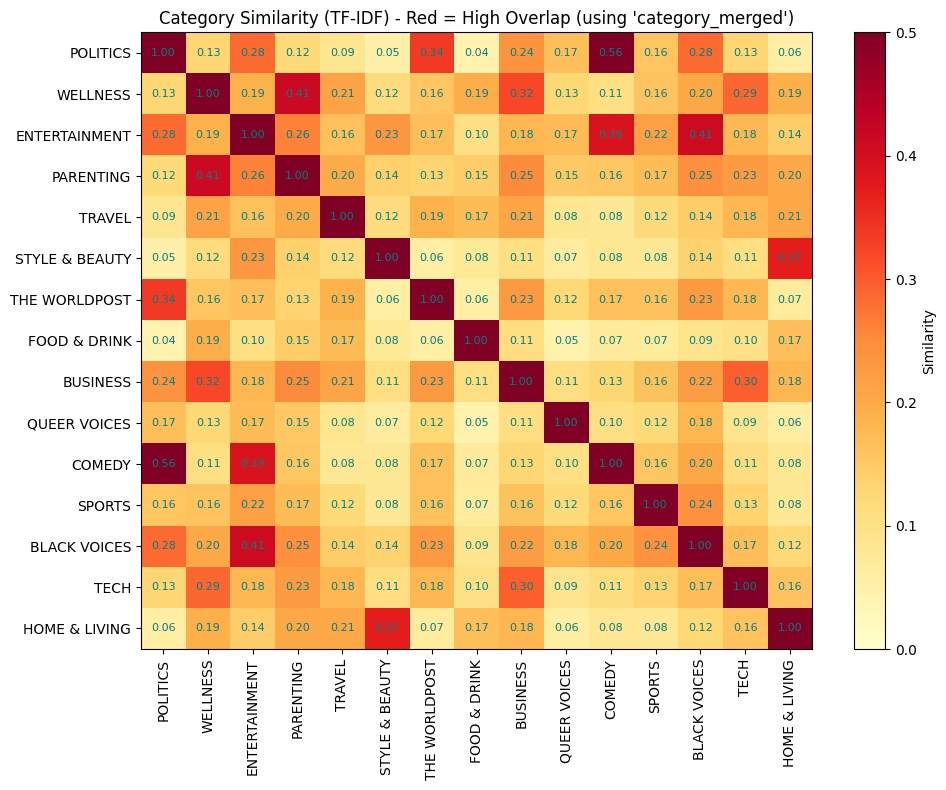

Top TF-IDF pairs (full subset, merged categories):
 1. MEDIA <-> POLITICS : 0.566
 2. COMEDY <-> POLITICS : 0.555
 3. STYLE <-> STYLE & BEAUTY : 0.537
 4. BLACK VOICES <-> CRIME : 0.437
 5. COMEDY <-> MEDIA : 0.416
 6. PARENTING <-> WELLNESS : 0.413
 7. BLACK VOICES <-> ENTERTAINMENT : 0.411
 8. CRIME <-> WEIRD NEWS : 0.396
 9. IMPACT <-> WELLNESS : 0.391
10. COMEDY <-> ENTERTAINMENT : 0.389


In [ ]:
# Lets us check the similarity of the dataset with selective merged-category

pairs_merged  = tfidf_overlap(huff_subset_merged, top_n=20, ngram_range=(1,2), category_col="category_merged")
#print the top 10 pairs
print("Top TF-IDF pairs (full subset, merged categories):")
for i, (c1, c2, score) in enumerate(pairs_merged[:10], start=1):
    print(f"{i:2d}. {c1} <-> {c2} : {score:.3f}")

## Second Round Training: Focused Fine-Tuning Strategy

For the second training round, we refine our experimental approach based on insights from the first round:

**Model Architecture:**
- Narrow our focus to a single model: **RoBERTa** (demonstrated superior performance in Round 1)

**Dataset Configuration:**
- Continue using 20% stratified subset with merged categories
- Maintain same train/validation/test splits for reproducibility

**Hyperparameter Search Space:**

*Batch Size:*
- Evaluate batch sizes: 8, 16, and 32
- Allow Optuna to identify optimal batch size for the merged class structure

*Optimizer Selection:*
- Re-evaluate all optimizer options (Adam, AdamW, SGD, RMSprop, Adagrad)
- Although specific optimizers performed well in Round 1, merged categories may favor different optimization dynamics

*Fine-Tuning Strategy:*
- Focus exclusively on **partial fine-tuning** (exclude freeze strategy due to poor Round 1 results)
- Test unfreezing 2 and 3 transformer layers to determine optimal depth of fine-tuning
- Hypothesis: Merged categories may require different layer adaptation compared to original 41-class taxonomy

**Objective:**
Identify the best hyperparameter configuration for RoBERTa with merged categories, establishing the foundation for final full-dataset training.

### Lets Start 2nd round training with a relatively smaller set using merged data of 20% size of original, but using merged classes


[I 2025-12-03 21:28:35,498] A new study created in memory with name: no-name-9fdf1031-12a5-4a71-a00e-ef26af120967



Subset class_weights (first 8 classes):
{0: np.float64(1.846), 1: np.float64(1.58), 2: np.float64(0.936), 3: np.float64(1.398), 4: np.float64(2.1), 5: np.float64(2.085), 6: np.float64(3.331), 7: np.float64(0.445)}


################################################################################
Starting Optuna runs after Merged-Categories which were getting improperly classified
################################################################################
Vocabulary size: 78490
Number of classes: 28
Max Length of text  75
experiment_layers=True  -> N_PARTIAL_VALUES=[2, 3, 6]

--------------------------------------------------------------------------------
OPTUNA RUNNING FOR DATASET SUBSET FRACTION: 0.2
--------------------------------------------------------------------------------

Data - Train: 31987, Val: 3998, Test: 3999


################################################################################
STARTING OPTUNA SEARCH: roberta_base_en | freeze | unfreeze=0 | batch=[8, 1

[I 2025-12-03 21:33:06,704] Trial 0 finished with value: 0.06278139352798462 and parameters: {'learning_rate': 1.72658923594534e-05, 'batch_size': 16, 'optimizer': 'adagrad', 'adagrad_init_acc': 2.1989440234608393e-05}. Best is trial 0 with value: 0.06278139352798462.


Strategy: FREEZE (backbone frozen).


[I 2025-12-03 21:37:25,881] Trial 1 finished with value: 0.35792896151542664 and parameters: {'learning_rate': 1.0552475204380333e-05, 'batch_size': 16, 'optimizer': 'adamw', 'adamw_weight_decay': 5.853873308073441e-05}. Best is trial 1 with value: 0.35792896151542664.


Strategy: FREEZE (backbone frozen).


[I 2025-12-03 21:41:49,808] Trial 2 finished with value: 0.16258129477500916 and parameters: {'learning_rate': 6.405267465333353e-05, 'batch_size': 16, 'optimizer': 'sgd', 'sgd_momentum': 0.2947785603965348}. Best is trial 1 with value: 0.35792896151542664.


Strategy: FREEZE (backbone frozen).


[I 2025-12-03 21:45:59,591] Trial 3 finished with value: 0.4222111105918884 and parameters: {'learning_rate': 3.394889275077614e-05, 'batch_size': 32, 'optimizer': 'adamw', 'adamw_weight_decay': 2.0663512487829004e-05}. Best is trial 3 with value: 0.4222111105918884.


Strategy: FREEZE (backbone frozen).


[I 2025-12-03 21:50:19,296] Trial 4 finished with value: 0.156078040599823 and parameters: {'learning_rate': 1.2373772422034711e-06, 'batch_size': 16, 'optimizer': 'adagrad', 'adagrad_init_acc': 1.2216640332450375e-06}. Best is trial 3 with value: 0.4222111105918884.


Strategy: FREEZE (backbone frozen).


[I 2025-12-03 21:52:21,084] Trial 5 pruned. Trial was pruned at epoch 0.


Strategy: FREEZE (backbone frozen).


[I 2025-12-03 21:54:25,809] Trial 6 pruned. Trial was pruned at epoch 0.


100%|██████████| 445/445 [00:00<00:00, 898kB/s]


Strategy: FREEZE (backbone frozen).


[I 2025-12-03 21:59:04,920] Trial 7 finished with value: 0.4469734728336334 and parameters: {'learning_rate': 2.7342911421558288e-05, 'batch_size': 16, 'optimizer': 'adam', 'adam_beta1': 0.9611527991769367, 'adam_beta2': 0.9766273242693263}. Best is trial 7 with value: 0.4469734728336334.


Strategy: FREEZE (backbone frozen).


[I 2025-12-03 22:01:16,865] Trial 8 pruned. Trial was pruned at epoch 0.


Strategy: FREEZE (backbone frozen).


[I 2025-12-03 22:03:32,559] Trial 9 pruned. Trial was pruned at epoch 0.



>>> Best Learning Rate: 2.734291e-05 (Val Acc: 0.4470)
>>> Best Optimizer: adam    >>> Best Batch Size: 16
Re-training roberta_base_en with Best LR: 2.73e-05 for full epochs...


100%|██████████| 474M/474M [00:32<00:00, 15.1MB/s]


Strategy: FREEZE (backbone frozen).

=== roberta_base_en, Strategy-freeze, Layers Trained-0, Few classes Merged , Optimizer-ADAM, Optuna identified LR-2.734291e-05, Optimized Batch size-16 ===

Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 106s 33ms/step - accuracy: 0.0419 - loss: 3.3314 - val_accuracy: 0.1493 - val_loss: 3.2731 - learning_rate: 2.7343e-05
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 36s 17ms/step - accuracy: 0.1238 - loss: 3.2804 - val_accuracy: 0.3032 - val_loss: 3.2019 - learning_rate: 2.7343e-05
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 36s 17ms/step - accuracy: 0.3064 - loss: 3.2086 - val_accuracy: 0.3852 - val_loss: 3.0910 - learning_rate: 2.7343e-05
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 36s 17ms/step - accuracy: 0.3920 - loss: 3.1009 - val_accuracy: 0.4260 - val_loss: 2.9433 - learning_rate: 2.7343e-05
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy: 0.4174 - loss: 2.9644 - val_accuracy: 0.4430 - val_loss: 2.7910 - learning_rate: 2.7343e-05
Epoch

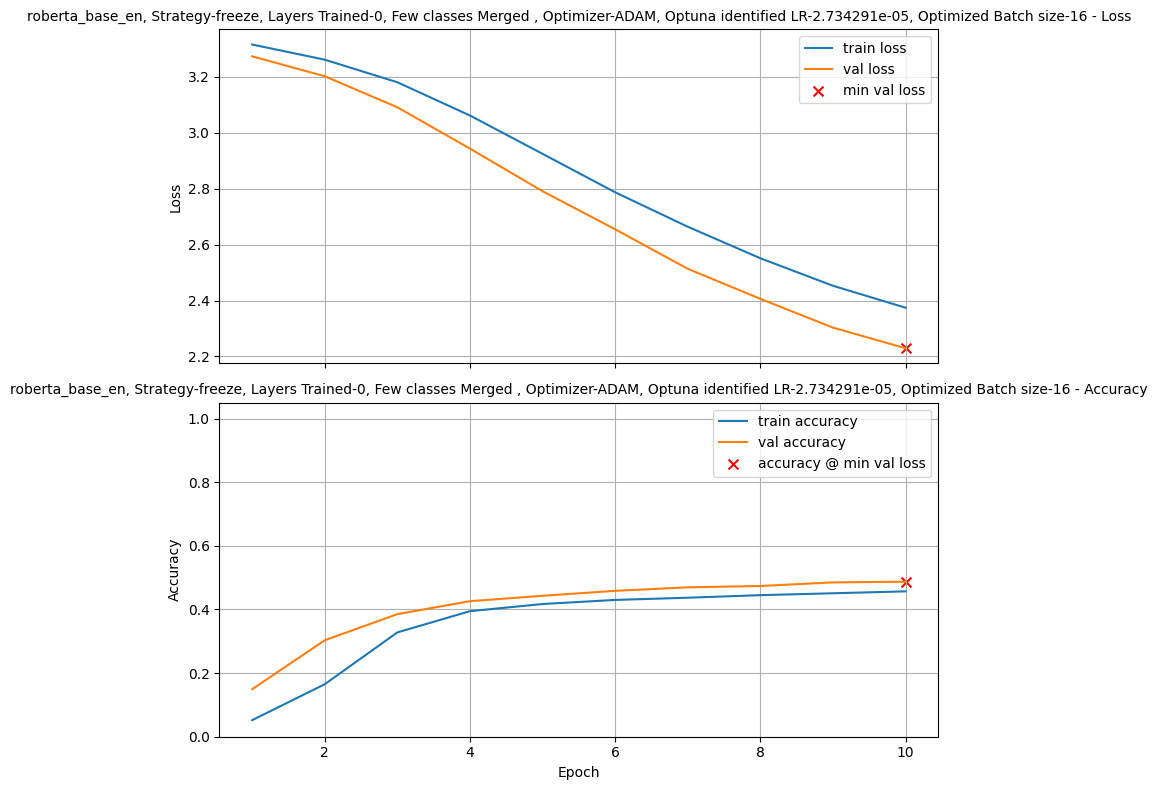

Final Training Loss:            2.3744
Final Training  accuracy:    0.4568
Final Validation Loss:          2.2294
Final Validation  accuracy:  0.4872
Min Validation Loss:            2.2294 (Epoch 10)
Accuracy @ Min Val Loss:      0.4872

Test metrics:
  loss: 2.2158
  accuracy: 0.4936

Execution Time: 7m 22s
Peak Memory Usage: 13079.39 MB

Generating final predictions for analysis purpose...


[I 2025-12-03 22:16:31,009] A new study created in memory with name: no-name-cf927958-2f9b-4277-84ab-664bbadbbea6


Test accuracy: 0.4936
Test macro-F1: 0.3935

Per-Category Performance (Sorted by F1 Score)
----------------------------------------------------
LATINO VOICES                  | 0.074    | 22.0    
WOMEN                          | 0.080    | 68.0    
BLACK VOICES                   | 0.122    | 91.0    
EDUCATION                      | 0.176    | 43.0    
IMPACT                         | 0.216    | 69.0    
COMEDY                         | 0.236    | 102.0   
BUSINESS                       | 0.242    | 153.0   
MEDIA                          | 0.250    | 56.0    
WEIRD NEWS                     | 0.266    | 81.0    
STYLE                          | 0.273    | 45.0    
ARTS & CULTURE                 | 0.320    | 77.0    
RELIGION                       | 0.331    | 51.0    
TECH                           | 0.346    | 84.0    
GREEN                          | 0.375    | 78.0    
QUEER VOICES                   | 0.396    | 126.0   
CRIME                          | 0.415    | 68.0    
DIVORCE 

100%|██████████| 686/686 [00:00<00:00, 1.16MB/s]


100%|██████████| 0.99M/0.99M [00:01<00:00, 751kB/s]


100%|██████████| 446k/446k [00:01<00:00, 423kB/s]


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-03 22:29:05,288] Trial 0 finished with value: 0.615307629108429 and parameters: {'learning_rate': 3.5213558327257044e-05, 'batch_size': 32, 'optimizer': 'adagrad', 'adagrad_init_acc': 7.320488961626186e-07}. Best is trial 0 with value: 0.615307629108429.


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-03 22:46:10,778] Trial 1 finished with value: 0.5605302453041077 and parameters: {'learning_rate': 5.73932943264196e-05, 'batch_size': 8, 'optimizer': 'adamw', 'adamw_weight_decay': 0.0014278850630615085}. Best is trial 0 with value: 0.615307629108429.


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-03 22:58:01,065] Trial 2 finished with value: 0.5845422744750977 and parameters: {'learning_rate': 1.2036645625367826e-05, 'batch_size': 32, 'optimizer': 'adagrad', 'adagrad_init_acc': 2.8994314544764977e-08}. Best is trial 0 with value: 0.615307629108429.


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-03 23:10:18,741] Trial 3 finished with value: 0.6873436570167542 and parameters: {'learning_rate': 3.5473438873394377e-05, 'batch_size': 32, 'optimizer': 'adam', 'adam_beta1': 0.8971427414711897, 'adam_beta2': 0.9287353586031898}. Best is trial 3 with value: 0.6873436570167542.


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-03 23:24:19,024] Trial 4 finished with value: 0.6720860600471497 and parameters: {'learning_rate': 1.420065511669903e-05, 'batch_size': 16, 'optimizer': 'adamw', 'adamw_weight_decay': 0.0003043058977469263}. Best is trial 3 with value: 0.6873436570167542.


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-03 23:41:07,681] Trial 5 finished with value: 0.6360680460929871 and parameters: {'learning_rate': 1.351284058164482e-06, 'batch_size': 8, 'optimizer': 'adamw', 'adamw_weight_decay': 2.049359649449688e-06}. Best is trial 3 with value: 0.6873436570167542.


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-03 23:48:05,098] Trial 6 pruned. Trial was pruned at epoch 0.


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-03 23:55:25,945] Trial 7 pruned. Trial was pruned at epoch 0.


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-04 00:12:02,190] Trial 8 finished with value: 0.6698349118232727 and parameters: {'learning_rate': 7.485417041990052e-06, 'batch_size': 8, 'optimizer': 'adam', 'adam_beta1': 0.9182411444870379, 'adam_beta2': 0.9516653246478821}. Best is trial 3 with value: 0.6873436570167542.


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-04 00:21:18,998] Trial 9 pruned. Trial was pruned at epoch 1.



>>> Best Learning Rate: 3.547344e-05 (Val Acc: 0.6873)
>>> Best Optimizer: adam    >>> Best Batch Size: 32
Re-training roberta_base_en with Best LR: 3.55e-05 for full epochs...
Strategy: PARTIAL (Unfroze 2/12 transformer layers).

=== roberta_base_en, Strategy-partial, Layers Trained-2, Few classes Merged , Optimizer-ADAM, Optuna identified LR-3.547344e-05, Optimized Batch size-32 ===

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 210s 131ms/step - accuracy: 0.4277 - loss: 2.1159 - val_accuracy: 0.6191 - val_loss: 1.3164 - learning_rate: 3.5473e-05
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 80s 78ms/step - accuracy: 0.6389 - loss: 1.2040 - val_accuracy: 0.6256 - val_loss: 1.2796 - learning_rate: 3.5473e-05
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 78s 76ms/step - accuracy: 0.7065 - loss: 0.9059 - val_accuracy: 0.6433 - val_loss: 1.2779 - learning_rate: 3.5473e-05
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 78s 76ms/step - accuracy: 0.7569 - loss: 0.7072 - val_accuracy: 0.6673 - val_loss: 1.2

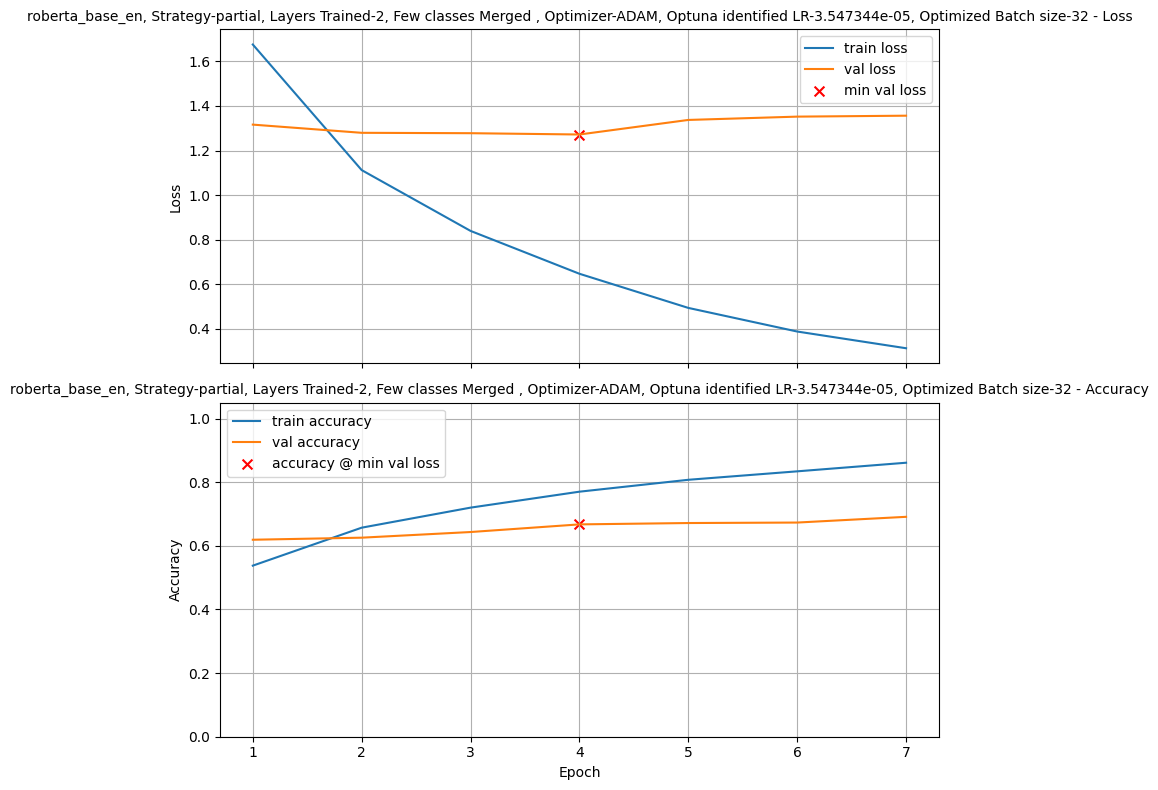

Final Training Loss:            0.3135
Final Training  accuracy:    0.8611
Final Validation Loss:          1.3564
Final Validation  accuracy:  0.6911
Min Validation Loss:            1.2721 (Epoch 4)
Accuracy @ Min Val Loss:      0.6673

Test metrics:
  loss: 1.2261
  accuracy: 0.6772

Execution Time: 11m 21s
Peak Memory Usage: 23709.88 MB

Generating final predictions for analysis purpose...


[I 2025-12-04 00:37:19,185] A new study created in memory with name: no-name-3fee5148-1723-4437-bdd9-77b6bfd0180d


Test accuracy: 0.6772
Test macro-F1: 0.6248

Per-Category Performance (Sorted by F1 Score)
----------------------------------------------------
WOMEN                          | 0.343    | 68.0    
IMPACT                         | 0.352    | 69.0    
EDUCATION                      | 0.409    | 43.0    
BLACK VOICES                   | 0.442    | 91.0    
LATINO VOICES                  | 0.471    | 22.0    
WEIRD NEWS                     | 0.471    | 81.0    
CRIME                          | 0.523    | 68.0    
COMEDY                         | 0.536    | 102.0   
GREEN                          | 0.544    | 78.0    
ARTS & CULTURE                 | 0.545    | 77.0    
MEDIA                          | 0.554    | 56.0    
BUSINESS                       | 0.586    | 153.0   
STYLE                          | 0.587    | 45.0    
TECH                           | 0.609    | 84.0    
RELIGION                       | 0.640    | 51.0    
SPORTS                         | 0.670    | 98.0    
ENTERTAI

[I 2025-12-04 00:49:16,535] Trial 0 finished with value: 0.6630815267562866 and parameters: {'learning_rate': 1.0808236699479443e-05, 'batch_size': 32, 'optimizer': 'rmsprop', 'rms_rho': 0.8142712864527207}. Best is trial 0 with value: 0.6630815267562866.


Strategy: PARTIAL (Unfroze 3/12 transformer layers).


[I 2025-12-04 01:06:09,479] Trial 1 finished with value: 0.012756378389894962 and parameters: {'learning_rate': 8.878167347235802e-05, 'batch_size': 8, 'optimizer': 'adamw', 'adamw_weight_decay': 4.9289753674082055e-05}. Best is trial 0 with value: 0.6630815267562866.


Strategy: PARTIAL (Unfroze 3/12 transformer layers).


[I 2025-12-04 01:19:46,234] Trial 2 finished with value: 0.6735867857933044 and parameters: {'learning_rate': 1.2210454993447227e-05, 'batch_size': 16, 'optimizer': 'adam', 'adam_beta1': 0.9894905654095918, 'adam_beta2': 0.9791447712101948}. Best is trial 2 with value: 0.6735867857933044.


Strategy: PARTIAL (Unfroze 3/12 transformer layers).


[I 2025-12-04 01:34:09,379] Trial 3 finished with value: 0.5115057826042175 and parameters: {'learning_rate': 3.639149222078223e-05, 'batch_size': 8, 'optimizer': 'sgd', 'sgd_momentum': 0.23247098418940462}. Best is trial 2 with value: 0.6735867857933044.


Strategy: PARTIAL (Unfroze 3/12 transformer layers).


[I 2025-12-04 01:46:24,864] Trial 4 finished with value: 0.6590795516967773 and parameters: {'learning_rate': 5.660643551166156e-06, 'batch_size': 32, 'optimizer': 'adamw', 'adamw_weight_decay': 0.001109785763838615}. Best is trial 2 with value: 0.6735867857933044.


Strategy: PARTIAL (Unfroze 3/12 transformer layers).


[I 2025-12-04 02:02:51,321] Trial 5 finished with value: 0.6678339242935181 and parameters: {'learning_rate': 4.468160586266444e-06, 'batch_size': 8, 'optimizer': 'adam', 'adam_beta1': 0.9673783752586255, 'adam_beta2': 0.9550869245524213}. Best is trial 2 with value: 0.6735867857933044.


Strategy: PARTIAL (Unfroze 3/12 transformer layers).


[I 2025-12-04 02:10:29,884] Trial 6 pruned. Trial was pruned at epoch 0.


Strategy: PARTIAL (Unfroze 3/12 transformer layers).


[I 2025-12-04 02:17:39,468] Trial 7 pruned. Trial was pruned at epoch 0.


Strategy: PARTIAL (Unfroze 3/12 transformer layers).


[I 2025-12-04 02:26:18,258] Trial 8 pruned. Trial was pruned at epoch 1.


Strategy: PARTIAL (Unfroze 3/12 transformer layers).


[I 2025-12-04 02:33:46,659] Trial 9 pruned. Trial was pruned at epoch 0.



>>> Best Learning Rate: 1.221045e-05 (Val Acc: 0.6736)
>>> Best Optimizer: adam    >>> Best Batch Size: 16
Re-training roberta_base_en with Best LR: 1.22e-05 for full epochs...
Strategy: PARTIAL (Unfroze 3/12 transformer layers).

=== roberta_base_en, Strategy-partial, Layers Trained-3, Few classes Merged , Optimizer-ADAM, Optuna identified LR-1.221045e-05, Optimized Batch size-16 ===

Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 223s 71ms/step - accuracy: 0.3640 - loss: 2.4370 - val_accuracy: 0.6288 - val_loss: 1.3589 - learning_rate: 1.2210e-05
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 96s 47ms/step - accuracy: 0.6332 - loss: 1.2502 - val_accuracy: 0.6418 - val_loss: 1.2825 - learning_rate: 1.2210e-05
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 98s 48ms/step - accuracy: 0.6925 - loss: 0.9676 - val_accuracy: 0.6598 - val_loss: 1.2257 - learning_rate: 1.2210e-05
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 96s 47ms/step - accuracy: 0.7386 - loss: 0.7543 - val_accuracy: 0.6826 - val_loss: 1.16

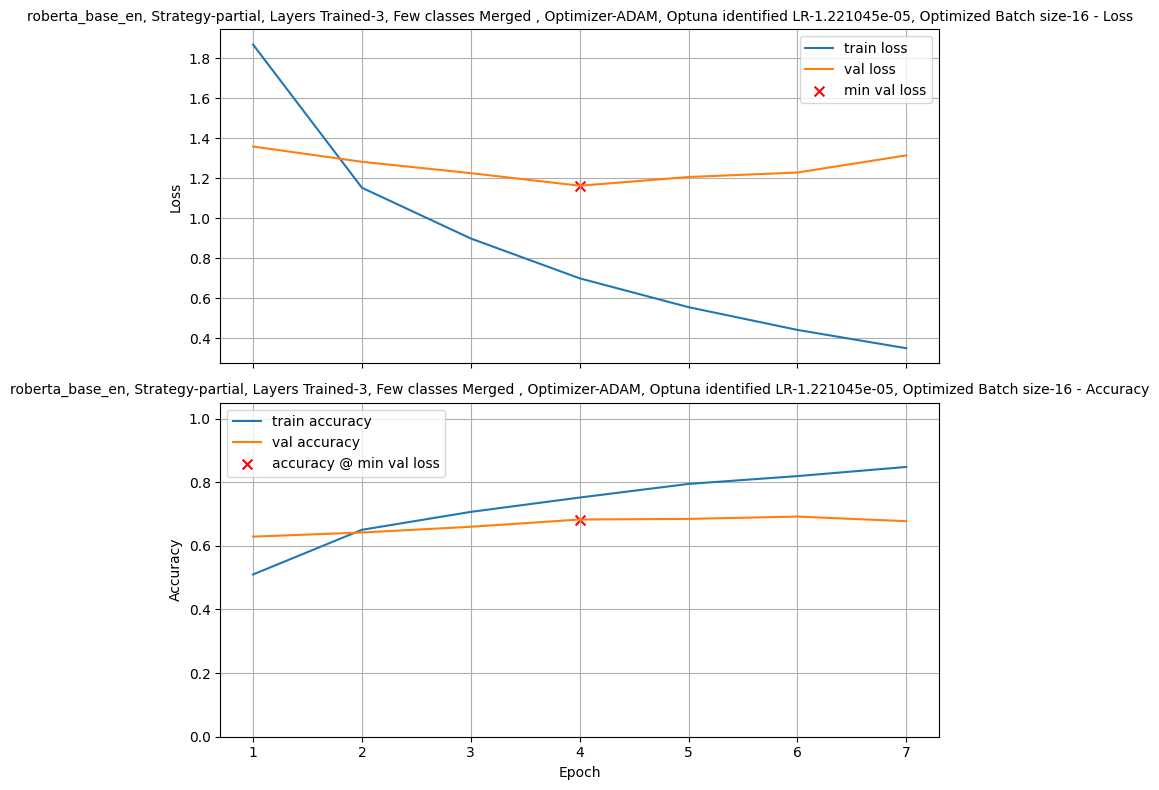

Final Training Loss:            0.3507
Final Training  accuracy:    0.8478
Final Validation Loss:          1.3146
Final Validation  accuracy:  0.6773
Min Validation Loss:            1.1629 (Epoch 4)
Accuracy @ Min Val Loss:      0.6826

Test metrics:
  loss: 1.1598
  accuracy: 0.6772

Execution Time: 13m 22s
Peak Memory Usage: 33192.59 MB

Generating final predictions for analysis purpose...


[I 2025-12-04 02:51:53,360] A new study created in memory with name: no-name-8c4512a9-e104-4f10-ac20-a24e1d6150fc


Test accuracy: 0.6772
Test macro-F1: 0.6326

Per-Category Performance (Sorted by F1 Score)
----------------------------------------------------
IMPACT                         | 0.346    | 69.0    
WOMEN                          | 0.349    | 68.0    
STYLE                          | 0.455    | 45.0    
EDUCATION                      | 0.460    | 43.0    
LATINO VOICES                  | 0.465    | 22.0    
COMEDY                         | 0.516    | 102.0   
WEIRD NEWS                     | 0.520    | 81.0    
BLACK VOICES                   | 0.524    | 91.0    
BUSINESS                       | 0.559    | 153.0   
TECH                           | 0.564    | 84.0    
ARTS & CULTURE                 | 0.598    | 77.0    
CRIME                          | 0.606    | 68.0    
GREEN                          | 0.615    | 78.0    
MEDIA                          | 0.636    | 56.0    
ENTERTAINMENT                  | 0.667    | 321.0   
RELIGION                       | 0.679    | 51.0    
SPORTS  

[I 2025-12-04 03:04:55,287] Trial 0 finished with value: 0.06228113919496536 and parameters: {'learning_rate': 1.5020983786970426e-05, 'batch_size': 16, 'optimizer': 'sgd', 'sgd_momentum': 0.6446349461395668}. Best is trial 0 with value: 0.06228113919496536.


Strategy: PARTIAL (Unfroze 6/12 transformer layers).


[I 2025-12-04 03:17:11,840] Trial 1 finished with value: 0.6453226804733276 and parameters: {'learning_rate': 7.143651398342428e-06, 'batch_size': 32, 'optimizer': 'rmsprop', 'rms_rho': 0.8337186703052594}. Best is trial 1 with value: 0.6453226804733276.


Strategy: PARTIAL (Unfroze 6/12 transformer layers).


[I 2025-12-04 03:34:23,761] Trial 2 finished with value: 0.6395697593688965 and parameters: {'learning_rate': 1.2660667776892452e-06, 'batch_size': 8, 'optimizer': 'adam', 'adam_beta1': 0.8398265036644368, 'adam_beta2': 0.9215701857134246}. Best is trial 1 with value: 0.6453226804733276.


Strategy: PARTIAL (Unfroze 6/12 transformer layers).


[I 2025-12-04 03:48:01,777] Trial 3 finished with value: 0.6530765295028687 and parameters: {'learning_rate': 3.3769179161298794e-06, 'batch_size': 16, 'optimizer': 'rmsprop', 'rms_rho': 0.8915144694089226}. Best is trial 3 with value: 0.6530765295028687.


Strategy: PARTIAL (Unfroze 6/12 transformer layers).


[I 2025-12-04 04:05:23,604] Trial 4 finished with value: 0.6500750184059143 and parameters: {'learning_rate': 2.7635612910687148e-05, 'batch_size': 8, 'optimizer': 'adamw', 'adamw_weight_decay': 0.00011690820737318847}. Best is trial 3 with value: 0.6530765295028687.


Strategy: PARTIAL (Unfroze 6/12 transformer layers).


[I 2025-12-04 04:13:15,059] Trial 5 pruned. Trial was pruned at epoch 0.


Strategy: PARTIAL (Unfroze 6/12 transformer layers).


[I 2025-12-04 04:21:06,484] Trial 6 pruned. Trial was pruned at epoch 0.


Strategy: PARTIAL (Unfroze 6/12 transformer layers).


[I 2025-12-04 04:35:19,133] Trial 7 finished with value: 0.680090069770813 and parameters: {'learning_rate': 2.7030114464112576e-05, 'batch_size': 16, 'optimizer': 'adam', 'adam_beta1': 0.9001837622691751, 'adam_beta2': 0.9077848128142194}. Best is trial 7 with value: 0.680090069770813.


Strategy: PARTIAL (Unfroze 6/12 transformer layers).


[I 2025-12-04 04:42:38,900] Trial 8 pruned. Trial was pruned at epoch 0.


Strategy: PARTIAL (Unfroze 6/12 transformer layers).


[I 2025-12-04 04:51:18,507] Trial 9 pruned. Trial was pruned at epoch 0.



>>> Best Learning Rate: 2.703011e-05 (Val Acc: 0.6801)
>>> Best Optimizer: adam    >>> Best Batch Size: 16
Re-training roberta_base_en with Best LR: 2.70e-05 for full epochs...
Strategy: PARTIAL (Unfroze 6/12 transformer layers).

=== roberta_base_en, Strategy-partial, Layers Trained-6, Few classes Merged , Optimizer-ADAM, Optuna identified LR-2.703011e-05, Optimized Batch size-16 ===

Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 230s 71ms/step - accuracy: 0.4359 - loss: 2.1147 - val_accuracy: 0.6226 - val_loss: 1.3254 - learning_rate: 2.7030e-05
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 98s 48ms/step - accuracy: 0.6412 - loss: 1.2044 - val_accuracy: 0.6438 - val_loss: 1.2596 - learning_rate: 2.7030e-05
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 101s 49ms/step - accuracy: 0.7090 - loss: 0.9127 - val_accuracy: 0.6496 - val_loss: 1.2716 - learning_rate: 2.7030e-05
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 99s 48ms/step - accuracy: 0.7602 - loss: 0.6990 - val_accuracy: 0.6543 - val_loss: 1.3

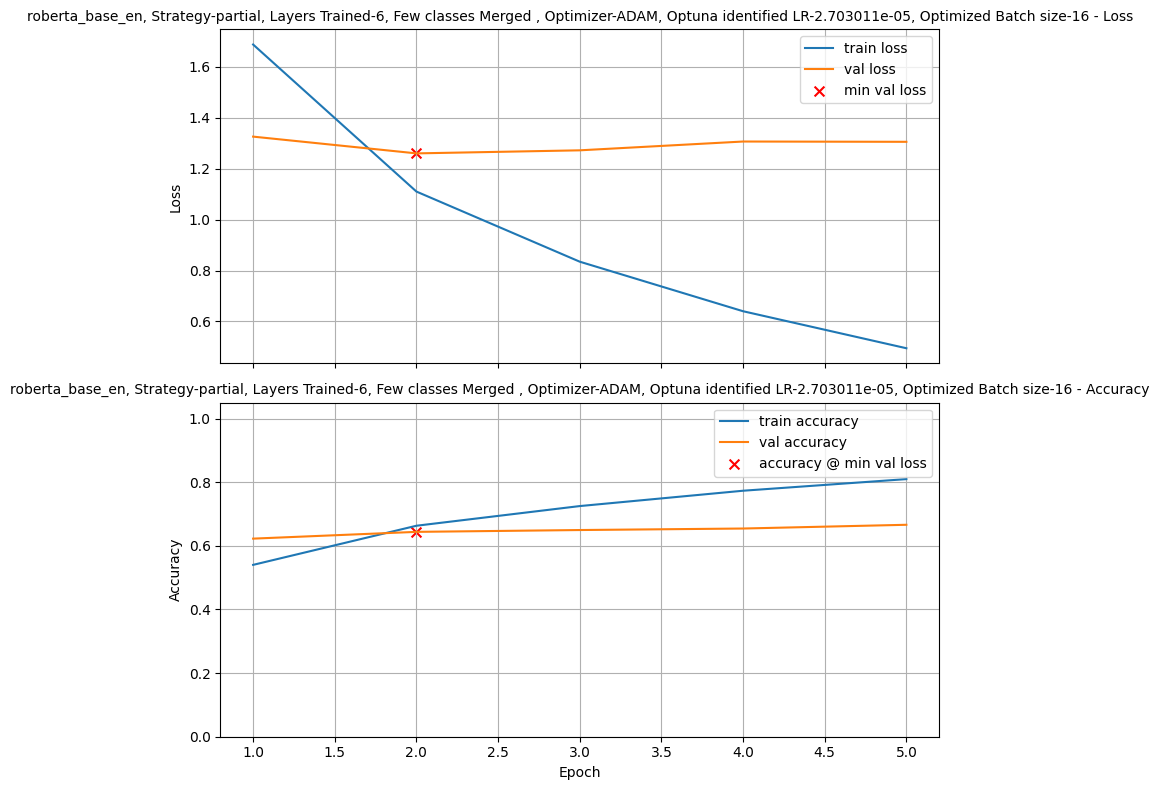

Final Training Loss:            0.4949
Final Training  accuracy:    0.8096
Final Validation Loss:          1.3050
Final Validation  accuracy:  0.6661
Min Validation Loss:            1.2596 (Epoch 2)
Accuracy @ Min Val Loss:      0.6438

Test metrics:
  loss: 1.2527
  accuracy: 0.6439

Execution Time: 10m 31s
Peak Memory Usage: 42711.07 MB

Generating final predictions for analysis purpose...


[I 2025-12-04 05:06:35,824] A new study created in memory with name: no-name-03f69ced-42a5-406a-8423-cc5987e229d1


Test accuracy: 0.6439
Test macro-F1: 0.5959

Per-Category Performance (Sorted by F1 Score)
----------------------------------------------------
LATINO VOICES                  | 0.323    | 22.0    
WOMEN                          | 0.347    | 68.0    
EDUCATION                      | 0.352    | 43.0    
IMPACT                         | 0.370    | 69.0    
BLACK VOICES                   | 0.392    | 91.0    
COMEDY                         | 0.423    | 102.0   
WEIRD NEWS                     | 0.482    | 81.0    
STYLE                          | 0.503    | 45.0    
ARTS & CULTURE                 | 0.504    | 77.0    
CRIME                          | 0.515    | 68.0    
GREEN                          | 0.533    | 78.0    
MEDIA                          | 0.543    | 56.0    
BUSINESS                       | 0.546    | 153.0   
ENTERTAINMENT                  | 0.569    | 321.0   
TECH                           | 0.605    | 84.0    
RELIGION                       | 0.642    | 51.0    
SPORTS  

[I 2025-12-04 05:20:20,295] Trial 0 finished with value: 0.6598299145698547 and parameters: {'learning_rate': 4.216870455213948e-05, 'batch_size': 16, 'optimizer': 'rmsprop', 'rms_rho': 0.9266931364544845}. Best is trial 0 with value: 0.6598299145698547.


Strategy: FULL (all layers trainable).


[I 2025-12-04 05:34:55,799] Trial 1 finished with value: 0.6423211693763733 and parameters: {'learning_rate': 4.5148771534088796e-05, 'batch_size': 16, 'optimizer': 'adamw', 'adamw_weight_decay': 0.00020565608801996073}. Best is trial 0 with value: 0.6598299145698547.


Strategy: FULL (all layers trainable).


[I 2025-12-04 05:47:24,051] Trial 2 finished with value: 0.6383191347122192 and parameters: {'learning_rate': 2.9043595533274526e-06, 'batch_size': 32, 'optimizer': 'rmsprop', 'rms_rho': 0.9159592883501392}. Best is trial 0 with value: 0.6598299145698547.


Strategy: FULL (all layers trainable).


[I 2025-12-04 06:01:09,201] Trial 3 finished with value: 0.622061014175415 and parameters: {'learning_rate': 1.1748668677266193e-06, 'batch_size': 16, 'optimizer': 'rmsprop', 'rms_rho': 0.9366581570356292}. Best is trial 0 with value: 0.6598299145698547.


Strategy: FULL (all layers trainable).


[I 2025-12-04 06:14:45,474] Trial 4 finished with value: 0.6240620017051697 and parameters: {'learning_rate': 4.625010283732231e-05, 'batch_size': 16, 'optimizer': 'adagrad', 'adagrad_init_acc': 2.381424630371401e-06}. Best is trial 0 with value: 0.6598299145698547.


Strategy: FULL (all layers trainable).


[I 2025-12-04 06:29:03,898] Trial 5 finished with value: 0.6733366847038269 and parameters: {'learning_rate': 1.7533948896883963e-05, 'batch_size': 16, 'optimizer': 'adamw', 'adamw_weight_decay': 0.00019467081350527733}. Best is trial 5 with value: 0.6733366847038269.


Strategy: FULL (all layers trainable).


[I 2025-12-04 06:36:46,788] Trial 6 pruned. Trial was pruned at epoch 0.


Strategy: FULL (all layers trainable).


[I 2025-12-04 06:49:35,911] Trial 7 finished with value: 0.6628314256668091 and parameters: {'learning_rate': 9.832715201535382e-06, 'batch_size': 32, 'optimizer': 'adam', 'adam_beta1': 0.8913707315436699, 'adam_beta2': 0.9943819293852981}. Best is trial 5 with value: 0.6733366847038269.


Strategy: FULL (all layers trainable).


[I 2025-12-04 06:57:16,597] Trial 8 pruned. Trial was pruned at epoch 0.


Strategy: FULL (all layers trainable).


[I 2025-12-04 07:11:33,699] Trial 9 finished with value: 0.6600800156593323 and parameters: {'learning_rate': 5.495437426978294e-06, 'batch_size': 16, 'optimizer': 'adamw', 'adamw_weight_decay': 0.0047880362155695855}. Best is trial 5 with value: 0.6733366847038269.



>>> Best Learning Rate: 1.753395e-05 (Val Acc: 0.6733)
>>> Best Optimizer: adamw    >>> Best Batch Size: 16
Re-training roberta_base_en with Best LR: 1.75e-05 for full epochs...
Strategy: FULL (all layers trainable).

=== roberta_base_en, Strategy-full, Layers Trained-All, Few classes Merged , Optimizer-ADAMW, Optuna identified LR-1.753395e-05, Optimized Batch size-16 ===

Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 236s 72ms/step - accuracy: 0.4556 - loss: 2.0731 - val_accuracy: 0.6233 - val_loss: 1.3313 - learning_rate: 1.7534e-05
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 100s 49ms/step - accuracy: 0.6527 - loss: 1.1668 - val_accuracy: 0.6448 - val_loss: 1.2483 - learning_rate: 1.7534e-05
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 102s 50ms/step - accuracy: 0.7096 - loss: 0.8900 - val_accuracy: 0.6501 - val_loss: 1.2454 - learning_rate: 1.7534e-05
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 99s 49ms/step - accuracy: 0.7613 - loss: 0.6770 - val_accuracy: 0.6616 - val_loss: 1.2349 - learni

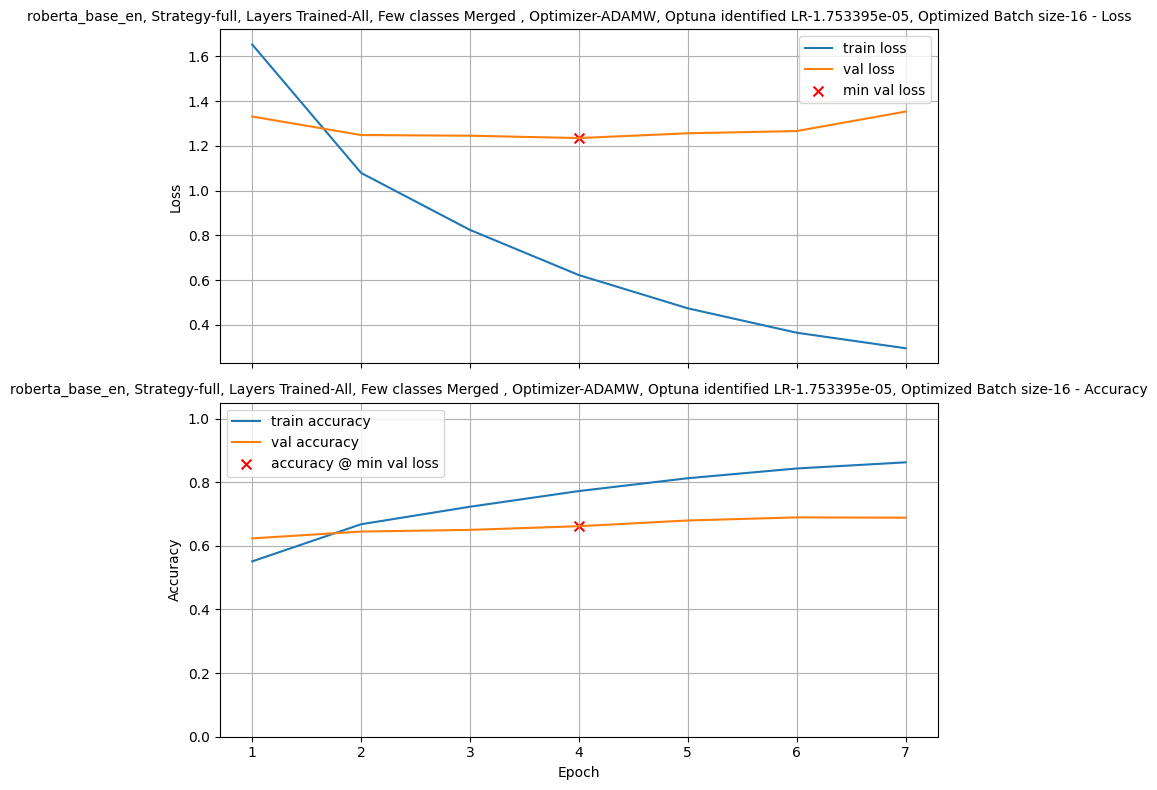

Final Training Loss:            0.2951
Final Training  accuracy:    0.8623
Final Validation Loss:          1.3533
Final Validation  accuracy:  0.6883
Min Validation Loss:            1.2349 (Epoch 4)
Accuracy @ Min Val Loss:      0.6616

Test metrics:
  loss: 1.2186
  accuracy: 0.6684

Execution Time: 13m 56s
Peak Memory Usage: 51948.40 MB

Generating final predictions for analysis purpose...
Test accuracy: 0.6684
Test macro-F1: 0.6239

Per-Category Performance (Sorted by F1 Score)
----------------------------------------------------
WOMEN                          | 0.294    | 68.0    
IMPACT                         | 0.352    | 69.0    
EDUCATION                      | 0.457    | 43.0    
BLACK VOICES                   | 0.465    | 91.0    
LATINO VOICES                  | 0.478    | 22.0    
COMEDY                         | 0.485    | 102.0   
ARTS & CULTURE                 | 0.503    | 77.0    
WEIRD NEWS                     | 0.525    | 81.0    
CRIME                          | 0.55

In [ ]:
%%script echo skipping    # Skipping as it takes long  so as someone can run the whole notebook without triggering this...deb

# Let us do the 2nd run to understand the overall performance  with merged category
# we will use the f1 score by category to determine whatlables to map to what target lable (i.e merge)
# Since Roberta_basee_en gave the best result earlier we will focus on that and try to arrive at the best hyperparameter

# Set experiment parameters
experiment_layers = True
EPOCHS = 10

# Since the above is True the below four final parameters will be ignored later in the code

# Set these final hyper parameters identified in earlier run to reduce the search space
# used only when value of experiment_layers = False
final_model_name = "roberta_base_en"
final_batch_size = 16
final_strategy = "full"
final_train_layers = 3

#set the strategy
strategy = "ALL"    # this will create three rows  ie one for "freeze" , "partial" and "full"

#ALLOWED_MODEL_LIST = ["roberta_base_en", "distil_bert_base_en_uncased", "bert_base_en_uncased"]
#ALLOWED_MODEL_LIST = [final_model_name]
#we will use roberta_base_en with all three layers to check the performance as we know we got he best results using that
ALLOWED_MODEL_LIST = ["roberta_base_en"]

# Set standard parameters for Optuan trials
OPTUNA_TRIALS_INITIAL = 5 #
OPTUNA_TRIALS_FINAL = 10
OPTUNA_TRIALS = OPTUNA_TRIALS_FINAL
# How many different trials to run for optuna..during inital run we will do 5 later for final training we will do 10

# default eperimental layers just in case parameter doesnt work should just come through parameters
N_PARTIAL_VALUES = [2, 3, 6]   # Deb debug uncomment hti s and delete lower line ... we will send all the layers we want to test and let it loop in experimental loop method
BATCHS = [8, 16, 32]           # we will send all three and let Optuna decide the best

# get the merged class weights as the classes weights will change after the merging
merged_class_weights = get_class_weights(y_tr_m)

print(f"\n\n{'#'*80}")
print("Starting Optuna runs after Merged-Categories which were getting improperly classified")
print(f"{'#'*80}")

print("Vocabulary size:", new_vocab_size)
print("Number of classes:", merged_num_classes)
print("Max Length of text ", MAX_LEN)

# generate model_configs for various batch sizes and strategies
# initialise the variables
ALL_MODEL_CONFIGS = []


# fallback
final_train_layers = globals().get("final_train_layers", globals().get("final_train_layers", 2))

#Once trained call the same method with a param - experiment_layers = False so that the else clause will take effect

if experiment_layers:
    for model_n in ALLOWED_MODEL_LIST:
        # Determine effective_partial_values based on model_n (moved outside batch loop)
        if model_n == "distil_bert_base_en_uncased":
            effective_partial_values = [2]
        else:
            effective_partial_values = N_PARTIAL_VALUES

        if strategy == "ALL":
            # Add Freeze config
            ALL_MODEL_CONFIGS.append({
                "name": model_n,
                "batch": BATCHS, # Pass the entire list of batch sizes for Optuna to optimize
                "strategy": "freeze",
                "unfreeze_layers": 0,
            })
            # Add Partial configs
            for n_unfreeze in effective_partial_values:
                ALL_MODEL_CONFIGS.append({
                    "name": model_n,
                    "batch": BATCHS, # Pass the entire list of batch sizes for Optuna to optimize
                    "strategy": "partial",
                    "unfreeze_layers": n_unfreeze,
                })
            # Add Full config
            ALL_MODEL_CONFIGS.append({
                "name": model_n,
                "batch": BATCHS, # Pass the entire list of batch sizes for Optuna to optimize
                "strategy": "full",
                "unfreeze_layers": None,
            })
        elif strategy == "partial":
            # Add 'partial' configs only
            for n_unfreeze in effective_partial_values:
                ALL_MODEL_CONFIGS.append({
                    "name": model_n,
                    "batch": BATCHS, # Pass the entire list of batch sizes for Optuna to optimize
                    "strategy": "partial",
                    "unfreeze_layers": n_unfreeze,
                })
        elif strategy == "full":
            ALL_MODEL_CONFIGS.append({
                "name": model_n,
                "batch": BATCHS, # Pass the entire list of batch sizes for Optuna to optimize
                "strategy": "full",
                "unfreeze_layers": None,
            })
        elif strategy == "freeze":
            ALL_MODEL_CONFIGS.append({
                "name": model_n,
                "batch": BATCHS, # Pass the entire list of batch sizes for Optuna to optimize
                "strategy": "freeze",
                "unfreeze_layers": 0,
            })
        else:
            print(f"Warning: Unknown strategy '{strategy}'. No configurations added for {model_n}.")

else:                                     # this triggers only experiment_layers= False i.e we are final
    N_PARTIAL_VALUES = [int(final_train_layers)]
    model_n = final_model_name
    batch_s = final_batch_size
    strategy = final_strategy
    unfreeze_layers = int(final_train_layers)
    ALL_MODEL_CONFIGS.append({
        "name": model_n,
        "batch": batch_s,
        "strategy": strategy,
        "unfreeze_layers": unfreeze_layers,
    })


print(f"experiment_layers={experiment_layers}  -> N_PARTIAL_VALUES={N_PARTIAL_VALUES}")

current_results, current_subset_stats, current_study = run_experiment_loop_with_optuna( # Capture the returned study object
    X_tr_m, X_va_m, X_te_m, y_tr_m, y_va_m, y_te_m,          # this time use the latest merged once
    model_configs_list=ALL_MODEL_CONFIGS,
    max_epochs=EPOCHS,
    num_classes_global=merged_num_classes,
    label_names_global=merged_label_names,
    class_weights_global= merged_class_weights,
    current_subset_frac = subset_frac,
    DS_Merged=True,               #Included this so I can add merged info in title in plot and results
    OPTUNA_TRIALS=OPTUNA_TRIALS,
)
# Check if dictionaries exist first to avoid erroring out if this is the first run
if 'all_experiment_results' not in globals():
    all_experiment_results = {}
if 'all_subset_stats' not in globals():
    all_subset_stats = []

all_experiment_results.update(current_results)
all_subset_stats.extend(current_subset_stats)


study = current_study

print(f"Stats collected: {len(all_subset_stats)} runs.")

print(f"\n\n{'#'*80}")
print("  This Experiment completed")
print(f"{'#'*80}")
'''

## Below cell will show all experiments data from 1st and 2nd round of training validation and test

In [ ]:
%%script echo skipping    # Skipping as it due to dependecy on first training look for saved data at the end...deb
print_results(results)


Sorting results by: accuracy_at_min_val_loss

roberta_base_en, Strategy-partial, Layers Trained-3, Few classes Merged , Optimizer-ADAM, Optuna identified LR-1.221045e-05, Optimized Batch size-16  0.6826  (best epoch=4)
roberta_base_en, Strategy-partial, Layers Trained-2, Few classes Merged , Optimizer-ADAM, Optuna identified LR-3.547344e-05, Optimized Batch size-32  0.6673  (best epoch=4)
roberta_base_en, Strategy-full, Layers Trained-All, Few classes Merged , Optimizer-ADAMW, Optuna identified LR-1.753400e-05, Optimized Batch size-16  0.6616  (best epoch=4)
roberta_base_en, Strategy-partial, Layers Trained-6, Few classes Merged , Optimizer-ADAM, Optuna identified LR-2.703011e-05, Optimized Batch size-16  0.6438  (best epoch=2)
roberta_base_en, Strategy-full, Layers Trained-All, No Merged Class , Optimizer-RMSPROP, Optuna identified LR-4.473457e-06, Optimized Batch size-16  0.6346  (best epoch=10)
bert_base_en_uncased, Strategy-partial, Layers Trained-2, No Merged Class , Optimizer-AD

In [ ]:
%%script echo skipping    # Skipping as it due to dependecy on first training look for saved data at the end...deb

if 'all_subset_stats' in globals() and len(all_subset_stats) > 0:
    summary_df = pd.DataFrame(all_subset_stats)
    # Sorting by Test Acc descending
    summary_df = summary_df.sort_values(by="Test Acc", ascending=False)
    display(summary_df)
else:
    print("Dataframe doesnt have summary info")

Model Strategy Layers           DS_Merged  Batch  \
11              roberta_base_en  partial      3  Few classes Merged     16   
12              roberta_base_en  partial      2  Few classes Merged     32   
9               roberta_base_en     full    All  Few classes Merged     16   
10              roberta_base_en  partial      6  Few classes Merged     16   
0          bert_base_en_uncased  partial      2     No Merged Class      8   
1               roberta_base_en     full    All     No Merged Class     16   
4   distil_bert_base_en_uncased     full    All     No Merged Class      8   
2               roberta_base_en  partial      2     No Merged Class     16   
3   distil_bert_base_en_uncased  partial      2     No Merged Class      8   
5          bert_base_en_uncased     full    All     No Merged Class      8   
6   distil_bert_base_en_uncased   freeze      0     No Merged Class      8   
13              roberta_base_en   freeze      0  Few classes Merged     16   
7               roberta_base_en   freeze      0     No Merged Class     16   
8          bert_base_en_uncased   freeze      0     No Merged Class     16   

   Optimizer  Learning Rate  Val Acc @ Min Loss  Min Val Loss  Test Loss  \
11      ADAM       0.000012            0.682600      1.162900   1.159800   
12      ADAM       0.000035            0.667300      1.272100   1.226100   
9      ADAMW       0.000018            0.661600      1.234900   1.218600   
10      ADAM       0.000027            0.643800      1.259600   1.252700   
0       ADAM       0.000022            0.627564      1.425871   1.388879   
1    RMSPROP       0.000004            0.634567      1.377544   1.395671   
4    RMSPROP       0.000019            0.616058      1.402357   1.390802   
2      ADAMW       0.000004            0.613807      1.429574   1.447888   
3      ADAMW       0.000029            0.594797      1.508233   1.495547   
5      ADAMW       0.000001            0.567284      1.618544   1.637026   
6      ADAMW       0.000047            0.501001      1.733680   1.739277   
13      ADAM       0.000027            0.487200      2.229400   2.215800   
7    RMSPROP       0.000035            0.445473      2.618152   2.641419   
8       ADAM       0.000044            0.321411      3.082827   3.078496   

    Best Epoch  Test Acc  Test F1 Macro  Elapsed Sec  Peak Memory(MB)  \
11           4  0.677200       0.632600        802.5         33192.59   
12           4  0.677200       0.624800        681.7         23709.88   
9            4  0.668400       0.623900        836.7         51948.40   
10           2  0.643900       0.595900        631.7         42711.07   
0            3  0.631658       0.551984        827.6         62731.50   
1           10  0.625156       0.551195        949.1         33113.20   
4            2  0.618405       0.509372        351.8         44782.20   
2            9  0.604401       0.533304       1052.4         23902.80   
3            3  0.588897       0.516130        438.4         40163.70   
5           10  0.570143       0.495219       1346.2         71566.50   
6           10  0.510378       0.439439        297.9         35592.30   
13          10  0.493600       0.393500        442.1         13079.39   
7           10  0.440860       0.325203        424.7         12978.30   
8           10  0.315829       0.172756        317.1         52714.70   

    Dataset Fraction  
11               0.2  
12               0.2  
9                0.2  
10               0.2  
0                0.2  
1                0.2  
4                0.2  
2                0.2  
3                0.2  
5                0.2  
6                0.2  
13               0.2  
7                0.2  
8                0.2

## Below cell will show all experiments data from 1st and 2nd round of training validation and test

Fine Tuning Results-
→ Strategy - PARTIAL Fine-Tuning (Unfreeze = 3 layers)
→ Test Accuracy: 0.6772
→ Macro-F1: 0.6248

Hyperparameters:

Model: roberta_base_en

Fine-tuning strategy: PARTIAL (3/12 transformer layers unfrozen)

Learning rate: 1.221045e-05

Optimizer: adam

Batch size: 16

This configuration gave:

Very strong validation accuracy and Minimum loss (0.682600)

Best generalization to test (0.677200)

Macro-F1 almost 0.632600 → strong across categories

#### **While doing final training we did the training with only 2 unfrozen layer since 2 and 3 both gave very similar performance . 2 will retain most of the pretrained model and one less layers to be trained and should give us better generalization i.e less overfitting on other similar dataset**

### A.2: Model Selection and Retraining (25 pts)
- You will choose one final model based on your Milestone 2 validation results and retrain it cleanly in this notebook.

##### Required Elements
1. Final architecture and justification (Markdown + code):
    - Clearly state what architecture you selected (CNN, pretrained encoder,TF-IDF + dense, etc.).
    - Briefly explain the method and metrics used to select your final model (a fuller explanation will be provided in the Project Report)

2. Hyperparameter definitions:
    - Clearly document the values for:
        - Learning rate and LR schedulers
        - Batch size
        - Number of epochs
        - Dropout rates
        - Weight decay / L2 regularization (if any)
        - Anything else...
3. Optimization strategy:
    - Show the optimizer configuration and describe why it is appropriate (e.g., Adam for stability, SGD + momentum, etc.).
4. Callbacks:
    - Include any callbacks used during training (early stopping, checkpointing, LR scheduler).
    - Briefly explain how these helped prevent overfitting or improve training stability.
5. Retraining from scratch:
    - Run the full training loop using:
        - The entire training set
        - A held-out validation split
        - A separate test set reserved for final evaluation

All of this should be implemented cleanly and commented in the notebook.

##A.2: Model Selection and Retraining

### A.2: Model Selection and Retraining (25 pts)
- You will choose one final model based on your Milestone 2 validation results and retrain it cleanly in this notebook.


##### Required Elements
1. Final architecture and justification (Markdown + code):
    - Clearly state what architecture you selected (CNN, pretrained encoder,TF-IDF + dense, etc.).
    - Briefly explain the method and metrics used to select your final model (a fuller explanation will be provided in the Project Report)
2. Hyperparameter definitions:
    - Clearly document the values for:
        - Learning rate and LR schedulers
        - Batch size
        - Number of epochs
        - Dropout rates
        - Weight decay / L2 regularization (if any)
        - Anything else...
3. Optimization strategy:
    - Show the optimizer configuration and describe why it is appropriate (e.g., Adam for stability, SGD + momentum, etc.).
4. Callbacks:
    - Include any callbacks used during training (early stopping, checkpointing, LR scheduler).
    - Briefly explain how these helped prevent overfitting or improve training stability.
5. Retraining from scratch:
    - Run the full training loop using:
        - The entire training set
        - A held-out validation split
        - A separate test set reserved for final evaluation

All of this should be implemented cleanly and commented in the notebook.

--------------------------

### <b>A.2: Model Selection and Retraining</b>

#### 1. Final Architecture and Justification
- Architecture Selected: RoBERTa Base (Encoder only Pretrained Transformer)
    - We selected the roberta_base_en model from the KerasNLP library, utilizing a partial fine-tuning strategy.
- Justification & Methodology:
    - Performance vs. Baselines: In Milestone 2, transfer learning  outperformed our custom BiLSTM and baseline models.
    - Model Selection: While BERT performed competitively (achieving ~63% accuracy in partial fine-tuning), RoBERTa was selected as the final architecture due to superior stability and peak potential.
- Handling Ambiguity via Class Merging: In the final round of pre-processing we addressed semantic ambiguity. Early error analysis showed high confusion between synonyms (e.g., "PARENTS" vs. "PARENTING"). We utilized misclassification information from the models prediction and the n-gram(1,2) TF-IDF similarity scores (0.85+ for top pairs) to merge 41 overlapping categories into 28 distinct classes. This reduced noise and ensured every category met a minimum support threshold of 100+ records.
- Optimization Strategy: We employed Optuna to rigorously tune hyperparameters. The search identified that Partial Fine-Tuning offered the optimal balance of accuracy and computational efficiency.
• Final Configuration: Based on the Optuna trials and validation results, the final model uses:
    - Unfrozen Layers: Top 2 Transformer layers (tuned from the top 12 blocks).
    - Dropout Rate: 0.5 in head and 0.3 in the internal layers(added to prevent overfitting).
    - Batch Size: 16 (optimized for generalization).
    - 0ptimizer: Adam with default beta.

##### Optuna & Milestone 2 and final training Findings:

| Parameter           | Value         | Notes                                      |
|---------------------|---------------|--------------------------------------------|
| FINAL_MODEL_PRESET  | roberta_base_en | Pretrained RoBERTa model (English base)     |
| MAX_LEN             | 75            | Determined via percentile analysis         |
| BATCH_SIZE          | 16            | Optimized via Optuna                       |
| LEARNING_RATE       | 1.2e-5         | Optimized via Optuna                       |
| NUM_CLASSES         | 28            | Reduced from 41 after class merging        |
| UNFREEZE_LAYERS     | 2             | Top layers to unfreeze                     |





#### 2. Hyperparameter Definitions:

| Hyperparameter | Value |
|----------------|-------|
| Optimizer | Adam |
| Learning rate | 1.2e-5 |
| LR scheduler | ReduceLROnPlateau |
| Scheduler settings | Monitor: val_loss; Factor: 0.5; Patience: 2; Minimum delta: 1e-4 |
| Batch size | 16 |
| Number of epochs | 10, converged at epoch 3 but ran through all the epochs where val loss was higher |
| Early stopping | Patience: 2; Restore best weights: True |
| Fine-tuning strategy | Partial fine-tuning |
| Unfrozen layers | Top three transformer layers |
| Weight decay | Applied through Adam; value selected during Optuna trials |
| Dropout rate | 0.3 on unfrozen layers and 0.5 on head  |

* <i>Note</i>: The final model with optimized parameters quickly converged which will reduce the overall training time



#### 3. Optimization Strategy

To optimize multiclass classification on the Huffington Post dataset, we implement a two-stage strategy on a stratified 20% data sample. We begin with an Evaluation Round to assess BERT, RoBERTa, and DistilBERT, manually iterating through fine-tuning depths (unfreezing the last 2, 3, and 6 layers) while applying dropout rates of 0.3 to unfrozen layers and 0.5 to the classification head. Upon identifying RoBERTa as the superior architecture, we drop the other models and proceed to a focused Fine-Tuning Round. In this final phase, we leverage Optuna to efficiently optimize the remaining hyperparameters for RoBERTa, identifying the ideal optimizer (Adam, AdamW, SGD, RMSprop, Adagrad), batch size (8, 16, 32), and learning rate (log-uniform distribution between 1e-6 and 1e-4).

##### Configuration determined via Optuna trials: OPTIMIZER = keras.optimizers.AdamW
| Parameter       | Value      | Notes                                             |
|-----------------|------------|---------------------------------------------------|
| Optimizer    | Adam
| learning_rate   | 1.2e-5    | Precisely tuned LR for stability             |
| Beta    | Default were best       | Beta did not change performance    |
| BatchSize    | 16       



Justification for Approach:
- Suitability for Transformers: Adam and AdamW is widely regarded as the standard optimizer for fine-tuning Transformer-based models (like BERT and RoBERTa). For the dataset in question Roberta worked best with Adama though our expectation was that AdamW will work better as AdamW decouples weight decay from the gradient update. RMSProp is lao consered a good option but Adam and AdamW are considered better performing. We also wanted to try two others to see if they perform good and had included SGD and Adagrad but those didnt get picked by Optuna.
- Empirical Superiority: Rigorous testing using Optuna compared multiple optimizers (Adam, AdamW, SGD, RMSprop, Adagrad). The trials demonstrated that Adam provided the best balance of convergence speed and validation accuracy for the RoBERTa architecture, outperforming AdamW, SGD and RMSprop in stability.
- Dynamic Adaptation: The optimizer is paired with a ReduceLROnPlateau scheduler (monitoring val_loss). This allows the model to aggressively learn initially and then fine-tune its weights with smaller steps as convergence slows, ensuring the model settles into a deeper loss minimum.

#### 4. Callbacks:
The training pipeline incorporated three primary callback mechanisms to ensure model stability and prevent overfitting. These were configured as follows:

**Early Stopping**:
Configuration: monitor="val_loss", patience=5, min_delta=1e-4, restore_best_weights=True.

Impact: This was used to reduce overfitting. As experiments indicated a tendency for the model to overfit rapidly (with validation loss diverging from training loss after approximately 2-3 epochs), early stopping halted training when generalization performance degraded. Crucially, it restored the model weights from the epoch with the lowest validation loss rather than the final epoch, ensuring optimal generalization.

**Learning Rate Scheduler(ReduceLROnPlateau)**:

Configuration: monitor="val_loss", factor=0.5, patience=2, min_delta=1e-4, cooldown=1, min_lr=1e-8.

Impact: This scheduler dynamically halved the learning rate when validation loss stagnated for two consecutive epochs. The inclusion of a cooldown period and minimum delta ensured that the model could settle into deeper loss minima without oscillating around optimal weights, refining convergence during the final training stages.

**Optuna Pruning (TFKerasPruningCallback)**:

Configuration: Used exclusively during the hyperparameter optimization phase.

Impact: By monitoring validation accuracy during search trials, this callback terminated unpromising hyperparameter configurations early. This significantly enhanced computational efficiency, allowing resources to be reallocated toward exploring more viable areas of the search space.


#### 5. Retraining from scratch:
Model Configuration & Data Split The final model utilized the RoBERTa architecture with a partial fine-tuning strategy, specifically unfreezing the top three layers to adapt to the specific nuances of the class-merged dataset (28 classes). Rigorous evaluation was ensured through a stratified 80/10/10 data split, isolating the test set strictly for final performance metrics while using the validation set to monitor convergence.

Training Dynamics The training process exhibited rapid convergence, identifying the optimal model weights at Epoch 3 where the model achieved a minimum validation loss of 0.933 and a validation accuracy of 73.6%. Although the training loop continued briefly beyond this point, validation loss began to trend upward, indicating the onset of overfitting. The early stopping mechanism successfully intervened, discarding subsequent overfitted weights and restoring the optimal state from Epoch 3 for final inference.

Final Performance Upon evaluation on the isolated test set, the model demonstrated strong generalization, achieving a Test Accuracy of 73.5% and a Macro-F1 score of 0.66. The consistency between the validation accuracy (73.6%) and test accuracy (73.5%) confirms that the model is robust and not overfitted to the validation data.

In [ ]:
#### ------ A.2: Model Selection and Retraining ------ ####


In [ ]:
# We could have used the same data but didn't want to take a chance in case data got corrupted. So we recreate data from original based on stratified sampling
# Create the stratified dataset from huff_cleaned_new
subset_frac = 1.0
huff_subset = create_stratified_subset(huff_cleaned_new, subset_frac, stratify_col="label", seed=SEED)

# Create merged dataset that preserves originals
huff_subset_merged, merged_label_names, merged_label2id, merged_id2label, merged_num_classes = apply_category_merges_preserve_labels(
    huff_subset, user_category_merge_map
)

# Train using the ORIGINAL labels (no change to label column)
train_ds_merged, val_ds_merged, test_ds_merged = getTrain_test_val_sets(huff_subset_merged)
X_tr_merged, X_va_merged, X_te_merged, y_tr_merged, y_va_merged, y_te_merged = get_numpy_arrays_Xtr_va_te_Ytr_va_te(train_ds_merged, val_ds_merged, test_ds_merged)

label_stats = build_label_stats(train_ds=train_ds_merged, val_ds=val_ds_merged, test_ds=test_ds_merged, label_names=label_names)
merged_class_weights = get_class_weights(y_tr_merged)

# Train using the MERGED labels (create a view where 'label' <- merged_label)
ds_for_merged = huff_subset_merged.map(lambda x: {"label": x["merged_label"]})
train_m, val_m, test_m = getTrain_test_val_sets(ds_for_merged)
X_tr_m, X_va_m, X_te_m, y_tr_m, y_va_m, y_te_m = get_numpy_arrays_Xtr_va_te_Ytr_va_te(train_m, val_m, test_m)

# Create the train, test and val sets
train_ds, val_ds, test_ds = getTrain_test_val_sets(huff_subset)
X_tr, X_va, X_te, y_tr, y_va, y_te = get_numpy_arrays_Xtr_va_te_Ytr_va_te(train_ds, val_ds, test_ds)

get_category_counts(huff_subset_merged, category_col="category_merged", top_n=None)

# label_names already has all the label_names

SUBSET_FRAC is 1.0. Returning full dataset (199922 rows).
 SUbset fraction used  - 1.0
Train size: 159937
Val size:   19992
Test size:  19993
Least frequent labels:
 label_id     label_name  train_count  val_count  test_count
        9      EDUCATION          803        101         100
        7 CULTURE & ARTS          823        103         103
       19  LATINO VOICES          903        113         113
        4        COLLEGE          914        114         114
       11    ENVIRONMENT         1058        132         132
        1 ARTS & CULTURE         1070        134         134
       12          FIFTY         1113        139         139
       14      GOOD NEWS         1117        140         139
        0           ARTS         1202        150         150
       21          MONEY         1365        171         170

Most frequent labels:
 label_id     label_name  train_count  val_count  test_count
        3       BUSINESS         4740        592         593
       13   FOOD & 

Map:   0%|          | 0/199922 [00:00<?, ? examples/s]

 SUbset fraction used  - 1.0
Train size: 159937
Val size:   19992
Test size:  19993
 SUbset fraction used  - 1.0
Train size: 159937
Val size:   19992
Test size:  19993
total categories are 28
Category Counts in the dataset:
- POLITICS: 32511
- WELLNESS: 25857
- ENTERTAINMENT: 16049
- PARENTING: 12545
- TRAVEL: 9877
- STYLE & BEAUTY: 9495
- THE WORLDPOST: 8409
- FOOD & DRINK: 8315
- BUSINESS: 7631
- QUEER VOICES: 6302
- COMEDY: 5105
- SPORTS: 4879
- BLACK VOICES: 4522
- TECH: 4207
- HOME & LIVING: 4157
- WEIRD NEWS: 4065
- GREEN: 3936
- ARTS & CULTURE: 3869
- WEDDINGS: 3651
- IMPACT: 3452
- DIVORCE: 3422
- CRIME: 3400
- WOMEN: 3388
- MEDIA: 2812
- RELIGION: 2546
- STYLE: 2245
- EDUCATION: 2146
- LATINO VOICES: 1129


In [ ]:
print(f"Number of target categories/classes for classification-{merged_num_classes} ")

Number of target categories/classes for classification-28 


### A.3: Evaluation and Visualization (25 pts)
- This section should illustrate how you measured, evaluated, and visualized your model’s performance.

##### Required Elements
1. Explanation of evaluation strategy:
- In a Markdown cell, describe:
    - How the validation split was used
    - How the test set was kept separate
    - What metrics are appropriate for your dataset:
        - Food101: accuracy, per-class accuracy, top-k accuracy, etc.
        - HuffPost: macro-F1, weighted-F1, accuracy, etc.
2. Required plots and printouts:
    - Training vs. validation loss curves
    - Training vs. validation accuracy (or other metric)
    - Confusion matrix on the test set
    - Any dataset-specific evaluations (per-class metrics tables, F1 score tables, etc.)
3. Final test metrics:
    - Include a clean printout of the final test performance (accuracy/per-class metrics/etc.).
    - Plots must be readable, properly labeled, and integrated into the notebook narrative.

## ADD MARKDOWN WRITE UP: A.3: Evaluation and Visualization

1. Explanation of Evaluation Strategy
To ensure a rigorous assessment of the model's generalization capabilities, we employed a stratified split strategy on the class-merged dataset (28 classes). This approach maintained the distribution of categories across all subsets, preventing representation bias.

Validation Split (10%): This subset was used strictly for hyperparameter tuning and model checkpointing. We monitored the val_loss on this split to trigger Early Stopping (patience=5) and Learning Rate Reduction (patience=2). Crucially, the Early Stopping callback was configured with restore_best_weights=True, ensuring that the final model retained the parameters from the epoch with the lowest validation loss (Epoch 3) rather than the potentially overfitted weights from the end of training.

Test Set (10%): This subset was kept completely isolated during the entire training and optimization phase. It was used only once for the final performance inference to provide an unbiased metric of real-world performance.

Metrics Selection: Given the multi-class nature of the Huffington Post dataset and the varying support for different categories, we focused on two primary metrics:

Accuracy: To measure the overall correctness of predictions.

Macro-F1 Score: To provide a balanced view of performance across all classes, ensuring that minority classes contribute equally to the final score rather than being overshadowed by majority classes like "Politics" or "Wellness."


2. **Visualizations and Performance Analysis**

Analysis of Learning Curves:The training behaviour as seen in the loss and accuracy plots for  thefinal model shows a rapid convergence. The model reached its optimal performance at Epoch 3, achieving a minimum validation loss of 0.9325 and a validation accuracy of 73.6%.

Beyond this point, while training loss continued to decrease, validation loss began to trend upward, signaling the onset of overfitting. The Early Stopping mechanism successfully intervened, and the model state was restored to Epoch 3 for final evaluation.
**Siobhan pls help inserting graph if we cant then lets refer to the previous cell**

Confusion Matrix Analysis:The confusion matrix highlights specific patterns of misclassification that align with semantic similarities between categories. As detailed in the "Top Misclassifications" list below, the most frequent errors occurred between highly overlapping topics:Media $\rightarrow$ Politics (30.2%): Articles about media coverage are often indistinguishable from political content.Comedy $\rightarrow$ Entertainment (22.7%): Both categories share tone and subject matter, making separation difficult.Black Voices $\rightarrow$ Entertainment (17.2%): This suggests a significant portion of "Black Voices" content overlaps with entertainment news, creating ambiguity for the model.(Insert your Per-Class Metrics Table/Bar Chart here)Per-Class Performance:The model shows significant variance in performance across categories (Range: 0.366 to 0.865 F1-score).Top Performers: Distinct, visually or thematically consistent categories like Style & Beauty (0.865), Food & Drink (0.842), and Travel (0.838) achieved the highest scores.Lowest Performers: Broad or abstract categories like Weird News (0.366) and Impact (0.447) proved most difficult, likely due to the lack of consistent keywords or clear thematic boundaries.

3. **Final Test Metrics**

The final evaluation was conducted on the unseen Test set (10% of datasample), yielding the following performance metrics:

Final Test Metrics

Test Accuracy:   73.28%
Test Macro-F1:   0.66049
Test Loss:       0.944483

Top 5 Misclassification Pairs (by error rate):

MEDIA predicted as POLITICS: 25.3%

COMEDY predicted as ENTERTAINMENT: 23.7%

BLACK VOICES predicted as ENTERTAINMENT: 19.6%

STYLE predicted as STYLE & BEAUTY: 15.6%

WOMEN predicted as WELLNESS: 15.3%

#### We performed multiple rounds of final trainign to see what gets us the best regularization.  traing 2 layers and 3 layers gave very similar results. So we will adopt 2 layers training as that will be lesser training and more generalized. The learning curve is less steep with 2 layers unforzen comapred to 3 this. will ultimately help us in better performance or lesser validation loss


#### Flow of code in this block
1. First clear old results so as to have a clean result and summary_df display
2. Change the final training to directly train the model by bypassing Optuna ( as we already know the target model name , optimized LR, optimizer, batch  rate, layers to unfreeze etc.)
3. Run final training
  - once the mmadel gets the val accuracy at minimum validation loss it captures that
  - does a prediction using the holdout test set
  - prints confusion values by class
  - plots confusion matrix
4. Display the results
5. Display the summary DF which has the results, with cpu compute time and memeory used during this process

In [ ]:
#### ------ A.3: Evaluation and Visualization ------ ####
# ADD CODE

In [ ]:
# We dont need earlier experiments and results and want to have a clean results print out and summary_df display

all_experiment_results = {}
all_subset_stats = []

In [ ]:
# final training method
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import keras.backend as K
import numpy as np
import gc
import time

def run_final_training(
        X_tr, X_va, X_te, y_tr, y_va, y_te,
        model_name="roberta_base_en",
        optimizer_name="adam",
        learning_rate=1.2e-5,
        unfreeze_layers=3,  # default is 3 but it will be overridden by the parameter in the calling function
        batch_size=16,
        num_classes_global=None,
        label_names_global=None,
        class_weights_global=None,
        epochs=20,
        max_len=256,               #this will be overridden if another value is passed
        dataset_fraction=1.0,
        ds_merged_info="No Merged Class",
    ):

    local_subset_stats = []

    print(f"{'='*100}")
    print(f"Starting final training of Model: {model_name}, Strategy: partial, "
          f"Layers unfrozen: {unfreeze_layers}")
    print(f"Batch size: {batch_size}, Optimizer: {optimizer_name.upper()}, "
          f"LR: {learning_rate:.2e}")
    print(f"{'='*100}")

    print("\nStage 1: Initializing final training...")
    K.clear_session()
    gc.collect()

    print("Stage 2: Building model and applying fine-tuning strategy...\n")
    if model_name == "roberta_base_en":
        preproc = kh.models.RobertaTextClassifierPreprocessor.from_preset(
            model_name, sequence_length=max_len
        )
        model = kh.models.RobertaTextClassifier.from_preset(
            model_name,
            num_classes=num_classes_global,
            preprocessor=preproc,
            activation="softmax",
            dropout_rate=0.5  # WE WILL CHANGE THIS TO 0.5 as it seems to be overfitting after 3 epochs with value 0.3 and we are not improving beyond 3 epochs
        )
    else:
        raise ValueError(f"Unknown model_name: {model_name}")

    # Do model fine-tuning setup for layers - partial
    set_fine_tune_mode(model, strategy="partial", unfreeze_layers=unfreeze_layers)
    print(f"Strategy: PARTIAL (Unfroze {unfreeze_layers} layers)")

    # instantiate optimizer
    if optimizer_name.lower() == "adam":
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        print(f"Warning: Unsupported optimizer '{optimizer_name}'. Using Adam")
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    # Stage 3: Training
    print("\nStage 3: Starting training loop...\n")
    title_str = (f"Final Model {model_name}, Strategy-partial, Layers-{unfreeze_layers}, "
                 f"{ds_merged_info}, Optimizer-{optimizer_name.upper()}, "
                 f"LR-{learning_rate:.6e}, Batch size-{batch_size} , Full Dataset")

    # Some odd reason the global param is not taking so we will create a custom
    reduce_lr_params_custom = dict(
    monitor="val_loss",
    factor=0.5,           # Reduce LR by half
    patience=2,
    min_delta=1e-4,
    cooldown=1,           # Wait 1 epoch after reducing before reducing again
    min_lr=1e-8,
    verbose=1,            # Show LR reduction messages
)
    # train/test and plot using helper
    ret = train_and_test(
        model,
        X_train=X_tr, y_train=y_tr,
        X_val=X_va, y_val=y_va,
        X_test=X_te, y_test=y_te,
        epochs=epochs,
        batch_size=batch_size,
        loss="sparse_categorical_crossentropy",
        metrics=("accuracy",),
        optimizer=optimizer,
        learning_rate=learning_rate,
        class_weight=class_weights_global,
        verbose=1,
        title=title_str,
        use_early_stopping=True,
        patience=5,
        min_delta=1e-4,
        use_reduce_lr=True,
        reduce_lr_params=reduce_lr_params_custom,
        metric_for_curves="accuracy",
        results_dict=results,
        return_history=False,
    )

    # Save unpacked summary and history
    summary = ret
    history = None

    # Predict and check
    y_pred_probs = model.predict(X_te, batch_size=batch_size, verbose=0)
    y_pred = np.argmax(y_pred_probs, axis=1) if y_pred_probs is not None else None

    print("\n=== Confusion Matrix (Counts) ===")
    cm_counts = generate_confusion_matrix(
      y_true=y_te,
      y_pred=y_pred,
      label_names=label_names_global,
      normalize=None,
      title="Confusion Matrix (Counts)"
    )

    print("\n=== Confusion Matrix (Normalized by True Labels) ===")
    cm_norm = generate_confusion_matrix(
        y_true=y_te,
        y_pred=y_pred,
        label_names=label_names_global,
        normalize="true",
        title="Confusion Matrix (Normalized)"
    )

    # Test Accuracy & Macro-F1
    test_acc = summary['test_metrics'].get('accuracy', np.nan)
    test_f1_macro = f1_score(y_te, y_pred, average="macro")
    print(f"Test accuracy: {test_acc:.4f}")
    print(f"Test macro-F1: {test_f1_macro:.4f}")

    # Per-Class F1 (sorted by ascending F1 score)
    print("\nPer-Category Performance (Sorted by F1 Score)")
    print("-" * 52)
    clf_report = classification_report(
        y_te, y_pred, target_names=label_names_global,
        output_dict=True, zero_division=0
    )
    class_metrics = []
    for name, metrics_dict in clf_report.items():
        if name in ['accuracy', 'macro avg', 'weighted avg']:
            continue
        class_metrics.append((name, metrics_dict['f1-score'], metrics_dict['support']))
    class_metrics.sort(key=lambda x: x[1])
    for name, f1, support in class_metrics:
        print(f"{name:<30} | {f1:.3f}    | {support:<8}")

    # Confusion Analysis (Top Misclassifications)
    print("\nTop misclassifications (True label -> Predicted label)")
    print("-" * 65)
    cm = confusion_matrix(y_te, y_pred, normalize='true')
    confused_pairs = []
    n_classes = len(label_names_global)
    for i in range(n_classes):
        for j in range(n_classes):
            if i != j and cm[i, j] > 0.10:
                confused_pairs.append((label_names_global[i], label_names_global[j], cm[i, j]))
    confused_pairs.sort(key=lambda x: x[2], reverse=True)
    for true_n, pred_n, score in confused_pairs[:10]:
        print(f"{true_n:<25} -> {pred_n:<25} | {score*100:.1f}%")

    # Store stats
    elapsed_time_str = f"{summary.get('train_time_sec', np.nan):.1f}" if not np.isnan(summary.get('train_time_sec', np.nan)) else "N/A"
    peak_memory_str = f"{summary.get('peak_memory_mb', np.nan):.1f} MB" if not np.isnan(summary.get('peak_memory_mb', np.nan)) else "N/A"

    local_subset_stats.append({
        "Model": model_name,
        "Strategy": "partial",
        "Unfreeze Layers": unfreeze_layers,
        "DS_Merged": ds_merged_info,
        "Batch": batch_size,
        "Optimizer": optimizer_name.upper(),
        "Learning Rate": learning_rate,
        "Val Acc @ Min Loss": summary.get('accuracy_at_min_val_loss', np.nan),
        "Min Val Loss": summary.get('min_val_loss', np.nan),
        "Test Loss": summary['test_metrics'].get('loss', np.nan),
        "Test Acc": test_acc,
        "Test F1 Macro": test_f1_macro,
        "Elapsed Sec": elapsed_time_str,
        "Peak Memory(MB)": peak_memory_str,
        "Dataset Fraction": dataset_fraction,
    })

    return local_subset_stats, model, history, y_pred_probs, y_pred

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

def generate_confusion_matrix(
        y_true,
        y_pred,
        label_names,
        normalize=None,     # None, 'true', or 'pred'
        title="Confusion Matrix",
        figsize=(14, 12),
        cmap="Blues",
        save_csv_path=None,
        show_plot=True,
        top_k=10
    ):
    """
    Creates a confusion matrix (counts or normalized) and optional misclassification summary.

    Args:
        y_true (array): Ground truth labels.
        y_pred (array): Model predicted labels.
        label_names (list): Class label names in proper index order.
        normalize (str): None (counts), 'true' (row-normalized), 'pred' (col-normalized).
        title (str): Title of heatmap.
        figsize (tuple): Figure size.
        cmap (str): Colormap for heatmap.
        show_plot (bool): Display heatmap.
        top_k (int): Number of top misclassifications to print.
    """

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=list(range(len(label_names))), normalize=normalize)

    # Convert to DataFrame
    cm_df = pd.DataFrame(cm, index=label_names, columns=label_names)

    # Save CSV if needed
    if save_csv_path:
        cm_df.to_csv(save_csv_path)
        print(f"Confusion matrix saved to: {save_csv_path}")

    # Print Top Misclassifications if normalized
    if normalize == "true":
        print("\nTop Misclassifications (True → Predicted):")
        print("-" * 60)
        mis_list = []
        for i in range(len(label_names)):
            for j in range(len(label_names)):
                if i != j and cm[i, j] > 0:
                    mis_list.append((label_names[i], label_names[j], cm[i, j]))

        # Sort by highest error
        mis_list = sorted(mis_list, key=lambda x: x[2], reverse=True)

        for true_label, pred_label, val in mis_list[:top_k]:
            print(f"{true_label:<25} → {pred_label:<25} | {val*100:.1f}%")

    # Plot heatmap
    if show_plot:
        plt.figure(figsize=figsize)
        sns.heatmap(
            cm_df,
            annot=False,
            cmap=cmap,
            fmt=".2f" if normalize else "d",
            linewidths=0.5
        )
        plt.title(title)
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.xticks(rotation=90)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()

    return cm_df


Starting final training of Model: roberta_base_en, Strategy: partial, Layers unfrozen: 2
Batch size: 16, Optimizer: ADAM, LR: 1.20e-05

Stage 1: Initializing final training...
Stage 2: Building model and applying fine-tuning strategy...

Strategy: PARTIAL (Unfroze 2/12 transformer layers).
Strategy: PARTIAL (Unfroze 2 layers)

Stage 3: Starting training loop...


=== Final Model roberta_base_en, Strategy-partial, Layers-2, Few classes Merged, Optimizer-ADAM, LR-1.200000e-05, Batch size-16 , Full Dataset ===

Epoch 1/10
9997/9997 ━━━━━━━━━━━━━━━━━━━━ 484s 41ms/step - accuracy: 0.5900 - loss: 2.7202 - val_accuracy: 0.7098 - val_loss: 0.9984 - learning_rate: 1.2000e-05
Epoch 2/10
9997/9997 ━━━━━━━━━━━━━━━━━━━━ 372s 37ms/step - accuracy: 0.7210 - loss: 1.7023 - val_accuracy: 0.7275 - val_loss: 0.9428 - learning_rate: 1.2000e-05
Epoch 3/10
9997/9997 ━━━━━━━━━━━━━━━━━━━━ 392s 39ms/step - accuracy: 0.7651 - loss: 1.3613 - val_accuracy: 0.7328 - val_loss: 0.9386 - learning_rate: 1.2000e-05
Epo

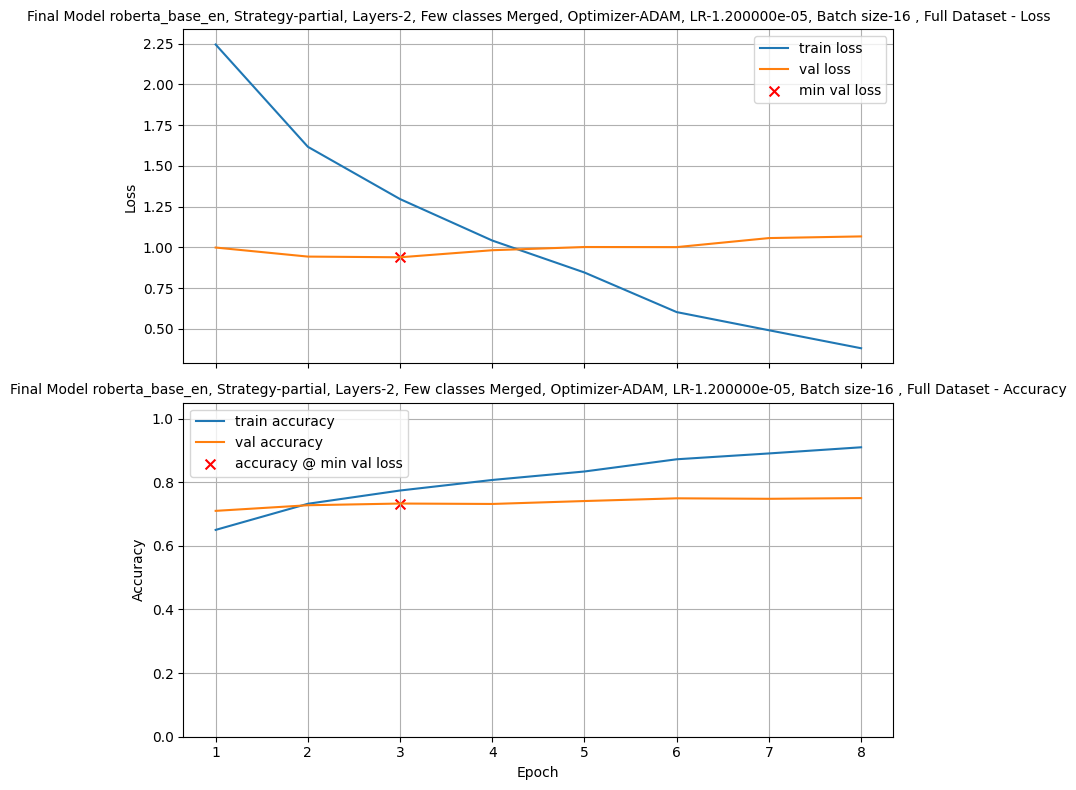

Final Training Loss:            0.3805
Final Training  accuracy:    0.9096
Final Validation Loss:          1.0667
Final Validation  accuracy:  0.7499
Min Validation Loss:            0.9386 (Epoch 3)
Accuracy @ Min Val Loss:      0.7328

Test metrics:
  loss: 0.9445
  accuracy: 0.7328

Execution Time: 53m 19s
Peak Memory Usage: 7768.22 MB

=== Confusion Matrix (Counts) ===


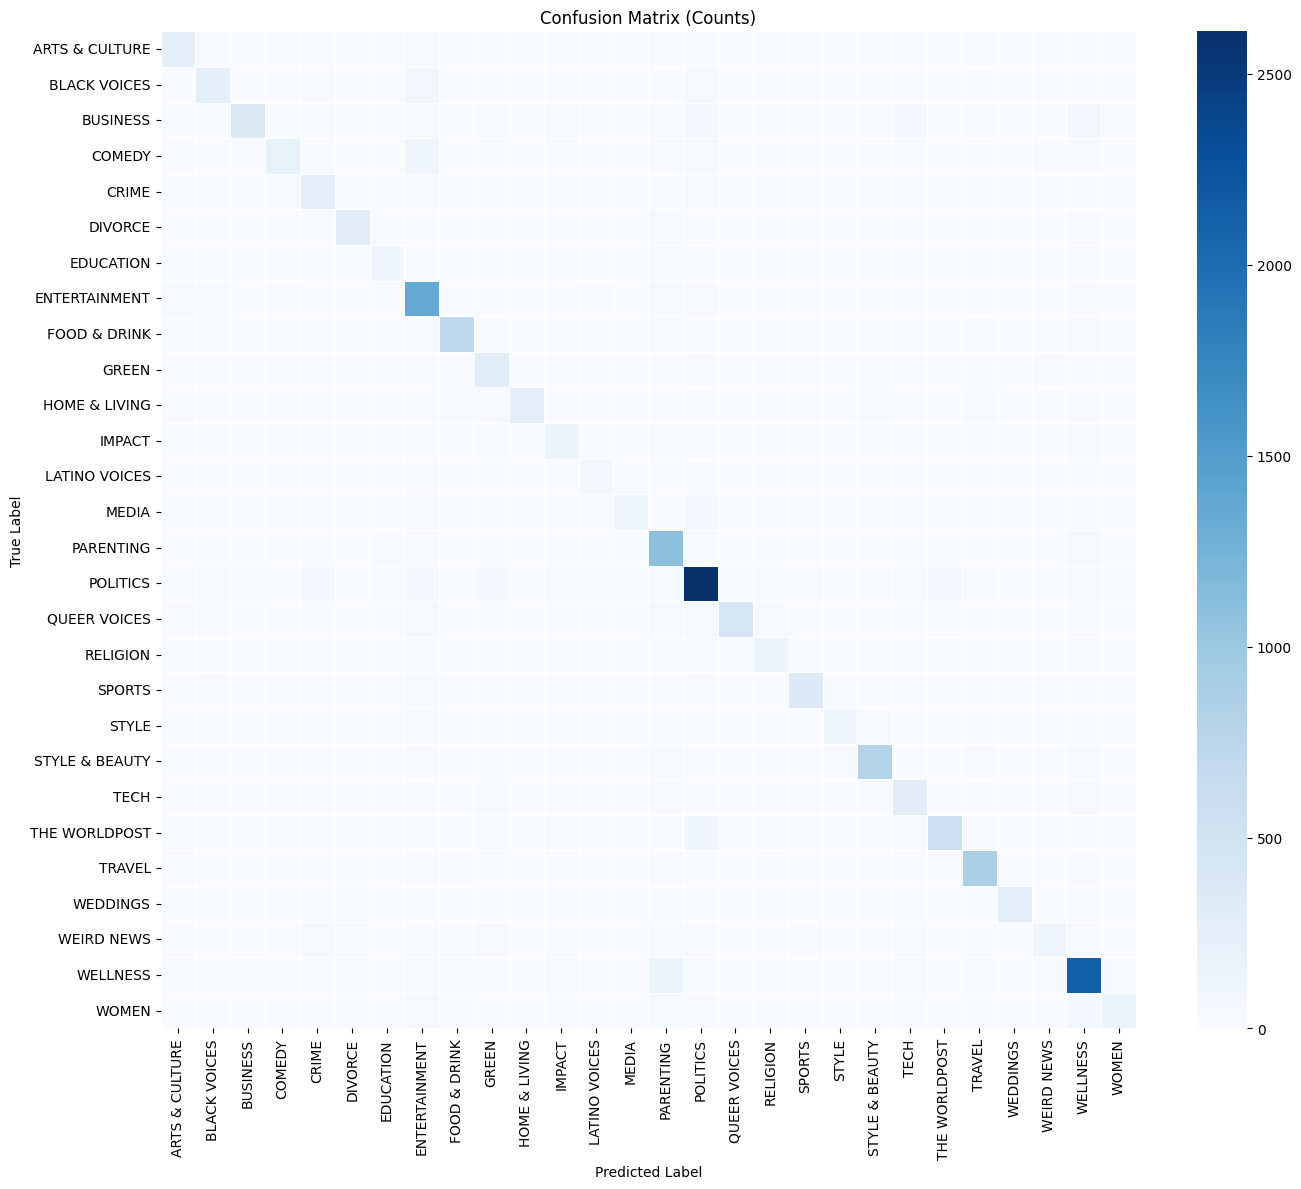


=== Confusion Matrix (Normalized by True Labels) ===

Top Misclassifications (True → Predicted):
------------------------------------------------------------
MEDIA                     → POLITICS                  | 25.3%
COMEDY                    → ENTERTAINMENT             | 23.7%
BLACK VOICES              → ENTERTAINMENT             | 19.6%
STYLE                     → STYLE & BEAUTY            | 15.6%
WOMEN                     → WELLNESS                  | 15.3%
IMPACT                    → WELLNESS                  | 13.0%
STYLE                     → ENTERTAINMENT             | 12.9%
MEDIA                     → ENTERTAINMENT             | 12.8%
ARTS & CULTURE            → ENTERTAINMENT             | 12.4%
EDUCATION                 → PARENTING                 | 12.1%


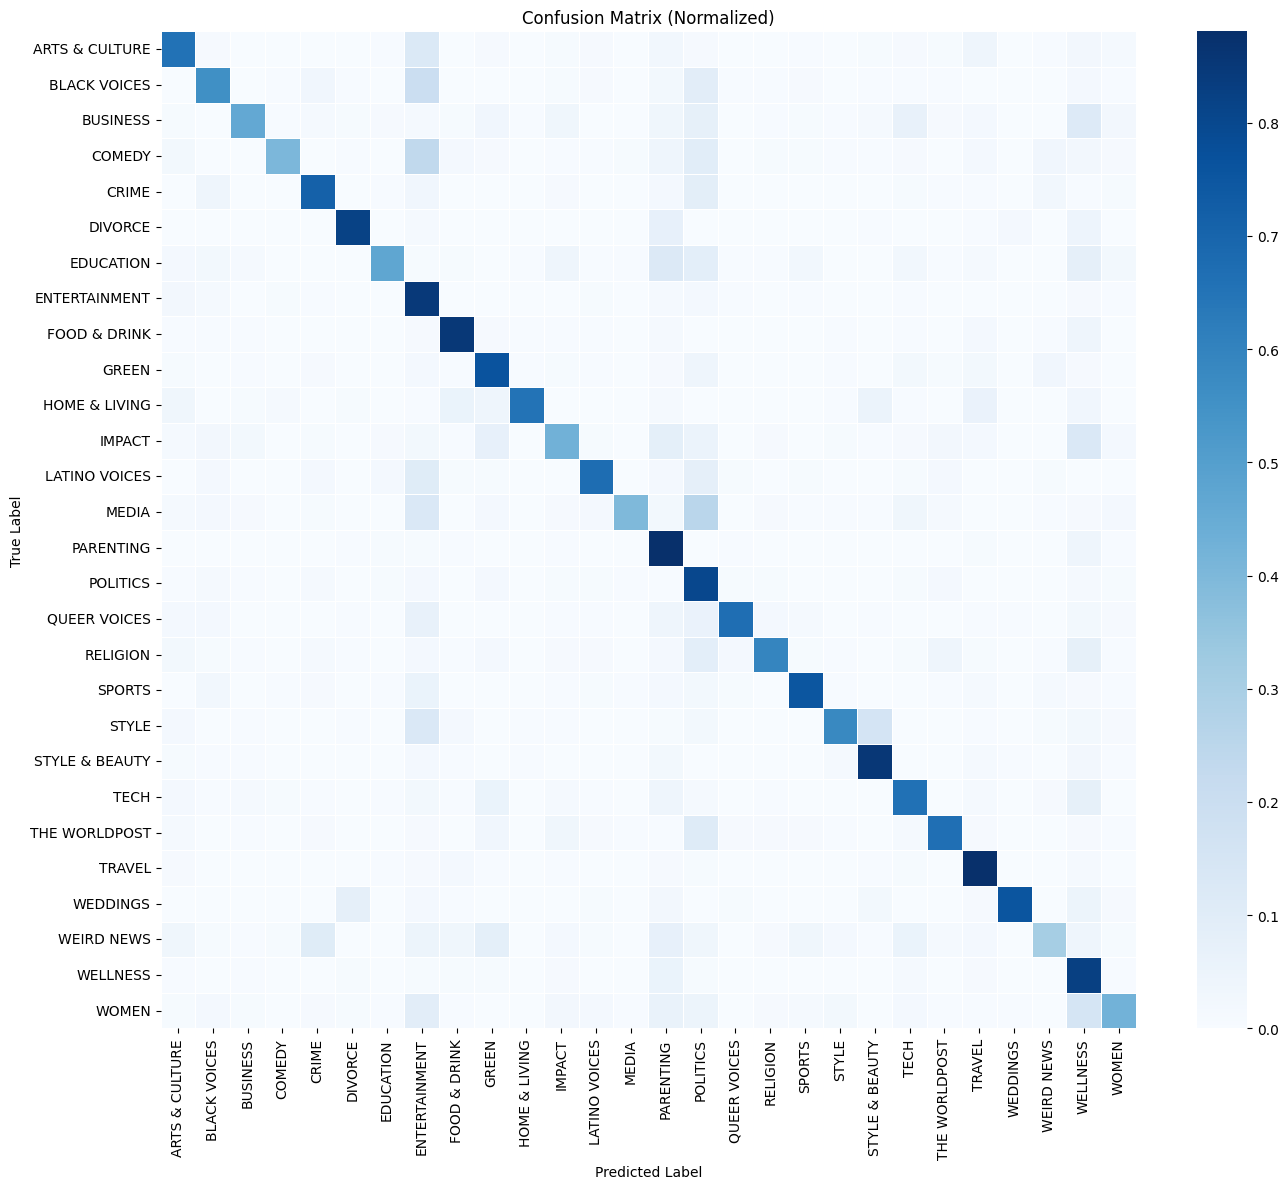

Test accuracy: 0.7328
Test macro-F1: 0.6605

Per-Category Performance (Sorted by F1 Score)
----------------------------------------------------
WEIRD NEWS                     | 0.407    | 406.0   
IMPACT                         | 0.432    | 345.0   
WOMEN                          | 0.462    | 339.0   
LATINO VOICES                  | 0.505    | 113.0   
MEDIA                          | 0.513    | 281.0   
EDUCATION                      | 0.515    | 214.0   
COMEDY                         | 0.532    | 511.0   
BLACK VOICES                   | 0.571    | 453.0   
BUSINESS                       | 0.590    | 763.0   
TECH                           | 0.592    | 421.0   
ARTS & CULTURE                 | 0.596    | 387.0   
RELIGION                       | 0.609    | 254.0   
GREEN                          | 0.610    | 393.0   
STYLE                          | 0.616    | 224.0   
CRIME                          | 0.639    | 340.0   
THE WORLDPOST                  | 0.732    | 841.0   
ENTERTAI

In [ ]:
# @title
# Final training call

local_subset_stats_final, final_model, final_history, final_y_pred_probs, final_y_pred = run_final_training(
    X_tr=X_tr_m,
    X_va=X_va_m,
    X_te=X_te_m,
    y_tr=y_tr_m,
    y_va=y_va_m,
    y_te=y_te_m,
    model_name="roberta_base_en",
    optimizer_name="adam",
    learning_rate=1.2e-5,
    unfreeze_layers=2,
    batch_size=16,
    num_classes_global=merged_num_classes,
    label_names_global=merged_label_names,
    class_weights_global=merged_class_weights,
    epochs=10,
    max_len=MAX_LEN,
    dataset_fraction=subset_frac,
    ds_merged_info="Few classes Merged",
)

# add the stats data to global collection
if 'all_subset_stats' not in globals():
    all_subset_stats = []

all_subset_stats.extend(local_subset_stats_final)

print(f"Stats collected: {len(all_subset_stats)} runs after final training call.")

In [ ]:
print_results(results)

Sorting results by: accuracy_at_min_val_loss

Final Model roberta_base_en, Strategy-partial, Layers-2, Few classes Merged, Optimizer-ADAM, LR-1.200000e-05, Batch size-16 , Full Dataset  0.7328  (best epoch=3)
Final Model roberta_base_en, Strategy-partial, Layers-3, Few classes Merged, Optimizer-ADAM, LR-1.200000e-05, Batch size-16 , Full Dataset  0.7265  (best epoch=2)


In [ ]:
if 'all_subset_stats' in globals() and len(all_subset_stats) > 0:
    summary_df = pd.DataFrame(all_subset_stats)
    # Sorting by Test Acc descending
    summary_df = summary_df.sort_values(by="Test Acc", ascending=False)
    display(summary_df)
else:
    print("Dataframe doesnt have summary info")

Model Strategy  Unfreeze Layers           DS_Merged  Batch  \
0  roberta_base_en  partial                2  Few classes Merged     16   

  Optimizer  Learning Rate  Val Acc @ Min Loss  Min Val Loss  Test Loss  \
0      ADAM       0.000012            0.732843      0.938625   0.944483   

   Test Acc  Test F1 Macro Elapsed Sec Peak Memory(MB)  Dataset Fraction  
0  0.732807        0.66049      3199.5       7768.2 MB               1.0

##  CONFIRM COMPLETED AND DELETE THIS >>>

### A.4: Code Readability and Documentation – General Requirements (20 pts)
(This next section is not a separate graded section of the notebook, but an indication of how it will be graded. )
Overall, your notebook should be polished, well-structured, and easy for an LF to follow.

#### Required Elements

1. ~~Professional notebook header:~~
    - ~~A Markdown cell at the top including:~~
        - ~~Title of the project~~
        - ~~Names of team members~~
        - ~~Date and course~~
        - ~~One-sentence description of the notebook's purpose~~
2. Clear section organization:
    - The notebook must follow the structure of Part A (A.1, A.2, A.3, no need for A.4), with headings and logical subsections.
3. Markdown documentation:
    - Provide Markdown explanations before major code cells describing:
    - What the code does
    - How it fits into the modeling workflow
3. Readable, commented code:
    - Every major block of code should have comments
    - Functions should be named clearly
    - Magic numbers should be avoided or explained (make them constants at top of cell)
    - Code should be modular when appropriate
4. Reproducibility:
    - The notebook must run end-to-end without errors
    - No hard-coded absolute file paths
    - Any random seeds should be set for reproducibility

In [ ]:
print ("last line and it will fail after this intentionally after this to save historical training information")

In [ ]:
Fail here intentionally so as it doesnt overwrite the first round and 2nd round of training  which took a lot of time to do

[I 2025-12-04 10:45:08,783] A new study created in memory with name: no-name-36fb8991-d8f5-4f32-86e1-46b01a2354da



Subset class_weights (first 8 classes):
{0: np.float64(3.251), 1: np.float64(3.629), 2: np.float64(1.079), 3: np.float64(0.823), 4: np.float64(4.263), 5: np.float64(0.955), 6: np.float64(1.434), 7: np.float64(4.728)}


################################################################################
Starting Optuna runs with **** FIRST RUN  ****  for all three models for inital analysis
################################################################################
Vocabulary size: 83975
Number of classes: 41
Max Length of text  75
experiment_layers=True  -> N_PARTIAL_VALUES=[2]

--------------------------------------------------------------------------------
OPTUNA RUNNING FOR DATASET SUBSET FRACTION: 0.2
--------------------------------------------------------------------------------

Data - Train: 31987, Val: 3998, Test: 3999


################################################################################
STARTING OPTUNA SEARCH: roberta_base_en | freeze | unfreeze=0 | batch=[8, 1

[I 2025-12-04 10:49:14,074] Trial 0 finished with value: 0.19684842228889465 and parameters: {'learning_rate': 7.918638654499275e-06, 'batch_size': 32, 'optimizer': 'adam', 'adam_beta1': 0.8645043361807904, 'adam_beta2': 0.9859345134593311}. Best is trial 0 with value: 0.19684842228889465.


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 10:52:58,673] Trial 1 finished with value: 0.08904451876878738 and parameters: {'learning_rate': 2.5961575907094946e-06, 'batch_size': 32, 'optimizer': 'rmsprop', 'rms_rho': 0.8709640448873189}. Best is trial 0 with value: 0.19684842228889465.


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 10:57:32,532] Trial 2 finished with value: 0.38119059801101685 and parameters: {'learning_rate': 1.874821301175674e-05, 'batch_size': 16, 'optimizer': 'adam', 'adam_beta1': 0.8008249566698056, 'adam_beta2': 0.9500997510809616}. Best is trial 2 with value: 0.38119059801101685.


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 11:03:02,444] Trial 3 finished with value: 0.2546273171901703 and parameters: {'learning_rate': 7.040930966246549e-06, 'batch_size': 8, 'optimizer': 'adamw', 'adamw_weight_decay': 9.090214421839497e-06}. Best is trial 2 with value: 0.38119059801101685.


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 11:07:20,727] Trial 4 finished with value: 0.022261129692196846 and parameters: {'learning_rate': 4.079377654553401e-06, 'batch_size': 16, 'optimizer': 'adagrad', 'adagrad_init_acc': 9.139774274240024e-05}. Best is trial 2 with value: 0.38119059801101685.
[I 2025-12-04 11:07:20,729] A new study created in memory with name: no-name-20474455-f24b-4170-8347-4368fab7ecd6


100%|██████████| 445/445 [00:00<00:00, 912kB/s]


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 11:11:55,890] Trial 0 finished with value: 0.007003501523286104 and parameters: {'learning_rate': 3.1906703127863776e-05, 'batch_size': 16, 'optimizer': 'adagrad', 'adagrad_init_acc': 0.002038614505593151}. Best is trial 0 with value: 0.007003501523286104.


100%|██████████| 474M/474M [00:31<00:00, 15.6MB/s]


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 11:18:05,661] Trial 1 finished with value: 0.02451225556433201 and parameters: {'learning_rate': 1.0377017154564442e-05, 'batch_size': 8, 'optimizer': 'adagrad', 'adagrad_init_acc': 1.707260553982822e-05}. Best is trial 1 with value: 0.02451225556433201.


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 11:22:03,596] Trial 2 finished with value: 0.03551775962114334 and parameters: {'learning_rate': 2.1088111865176246e-05, 'batch_size': 32, 'optimizer': 'sgd', 'sgd_momentum': 0.09444561373104005}. Best is trial 2 with value: 0.03551775962114334.


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 11:26:27,974] Trial 3 finished with value: 0.4109554886817932 and parameters: {'learning_rate': 3.510611461762115e-05, 'batch_size': 16, 'optimizer': 'rmsprop', 'rms_rho': 0.9673475857485051}. Best is trial 3 with value: 0.4109554886817932.


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 11:31:58,136] Trial 4 finished with value: 0.1955977976322174 and parameters: {'learning_rate': 4.66097567666615e-06, 'batch_size': 8, 'optimizer': 'adamw', 'adamw_weight_decay': 1.8060941035537913e-06}. Best is trial 3 with value: 0.4109554886817932.



>>> Best Learning Rate: 3.510611e-05 (Val Acc: 0.4110)
>>> Best Optimizer: rmsprop    >>> Best Batch Size: 16
Re-training roberta_base_en with Best LR: 3.51e-05 for full epochs...
Strategy: FREEZE (backbone frozen).

=== roberta_base_en, Strategy-freeze, Layers Trained-0, No Merged Class , Optimizer-RMSPROP, Optuna identified LR-3.510611e-05, Optimized Batch size-16 ===

Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 103s 33ms/step - accuracy: 0.0238 - loss: 3.7140 - val_accuracy: 0.0740 - val_loss: 3.6744 - learning_rate: 3.5106e-05
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 36s 17ms/step - accuracy: 0.0591 - loss: 3.6802 - val_accuracy: 0.2561 - val_loss: 3.6228 - learning_rate: 3.5106e-05
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 35s 17ms/step - accuracy: 0.1678 - loss: 3.6296 - val_accuracy: 0.3672 - val_loss: 3.5290 - learning_rate: 3.5106e-05
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 35s 17ms/step - accuracy: 0.3065 - loss: 3.5470 - val_accuracy: 0.4072 - val_loss: 3.3897 - learning_r

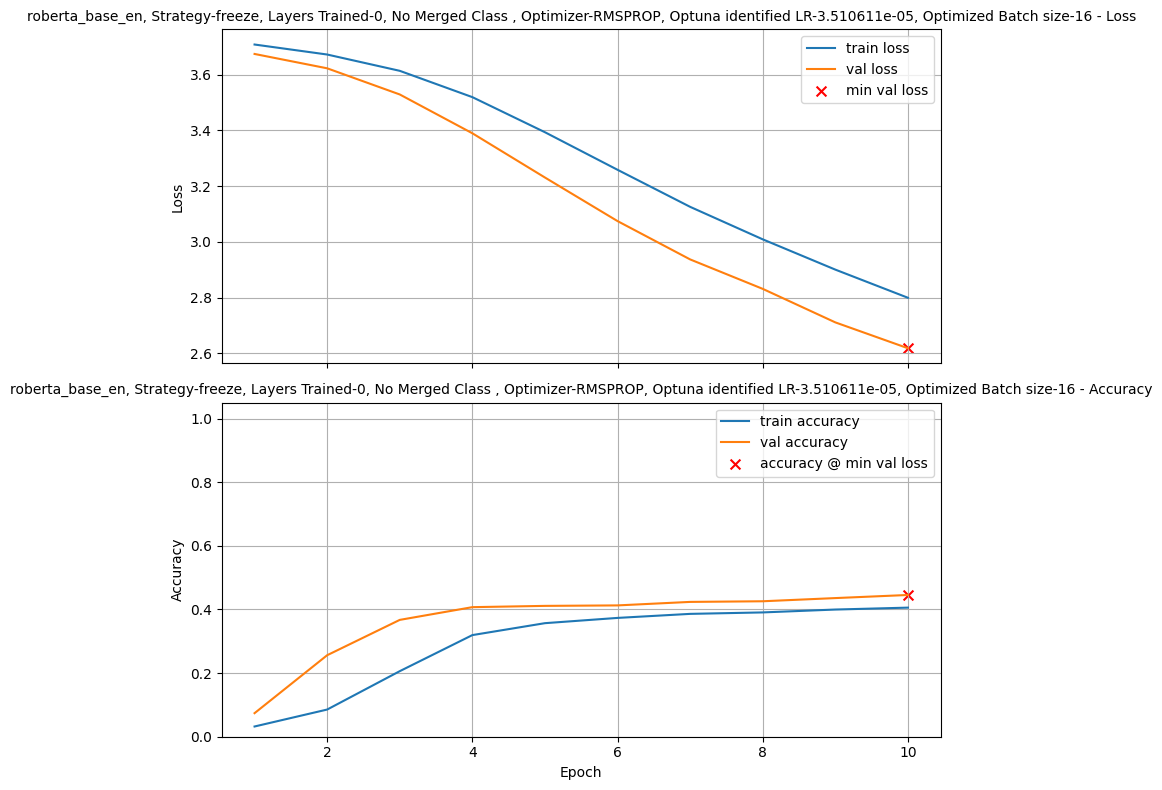

Final Training Loss:            2.7993
Final Training  accuracy:    0.4057
Final Validation Loss:          2.6182
Final Validation  accuracy:  0.4455
Min Validation Loss:            2.6182 (Epoch 10)
Accuracy @ Min Val Loss:      0.4455

Test metrics:
  loss: 2.6414
  accuracy: 0.4409

Execution Time: 7m 04s
Peak Memory Usage: 12978.31 MB

Generating final predictions for analysis purpose...


[I 2025-12-04 11:40:39,427] A new study created in memory with name: no-name-c4ce04ba-85f5-4274-aa43-50d75a53d9dd


Test accuracy: 0.4409
Test macro-F1: 0.3252

Per-Category Performance (Sorted by F1 Score)
----------------------------------------------------
LATINO VOICES                  | 0.000    | 22.0    
FIFTY                          | 0.048    | 27.0    
ARTS & CULTURE                 | 0.069    | 26.0    
BLACK VOICES                   | 0.086    | 91.0    
ARTS                           | 0.108    | 30.0    
COLLEGE                        | 0.120    | 23.0    
WORLD NEWS                     | 0.154    | 43.0    
BUSINESS                       | 0.165    | 119.0   
GOOD NEWS                      | 0.172    | 28.0    
EDUCATION                      | 0.176    | 20.0    
ENVIRONMENT                    | 0.182    | 26.0    
TASTE                          | 0.208    | 42.0    
COMEDY                         | 0.220    | 102.0   
IMPACT                         | 0.221    | 69.0    
WOMEN                          | 0.236    | 68.0    
WEIRD NEWS                     | 0.259    | 54.0    
CULTURE 

[I 2025-12-04 11:53:56,163] Trial 0 finished with value: 0.5720360279083252 and parameters: {'learning_rate': 1.8299445023112672e-06, 'batch_size': 8, 'optimizer': 'adamw', 'adamw_weight_decay': 0.000984420234986171}. Best is trial 0 with value: 0.5720360279083252.


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-04 12:04:54,037] Trial 1 finished with value: 0.04752376303076744 and parameters: {'learning_rate': 1.7786116454430527e-06, 'batch_size': 8, 'optimizer': 'sgd', 'sgd_momentum': 0.5768488476259133}. Best is trial 0 with value: 0.5720360279083252.


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-04 12:14:04,526] Trial 2 finished with value: 0.5842921733856201 and parameters: {'learning_rate': 4.8365362395148775e-06, 'batch_size': 32, 'optimizer': 'adamw', 'adamw_weight_decay': 1.378122233022239e-06}. Best is trial 2 with value: 0.5842921733856201.


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-04 12:26:36,514] Trial 3 finished with value: 0.5932966470718384 and parameters: {'learning_rate': 3.8492540335780375e-06, 'batch_size': 8, 'optimizer': 'adamw', 'adamw_weight_decay': 4.017491347603929e-05}. Best is trial 3 with value: 0.5932966470718384.


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-04 12:36:45,799] Trial 4 finished with value: 0.6240620017051697 and parameters: {'learning_rate': 2.1426613586874968e-05, 'batch_size': 16, 'optimizer': 'adam', 'adam_beta1': 0.8686709959648278, 'adam_beta2': 0.938000040762424}. Best is trial 4 with value: 0.6240620017051697.
[I 2025-12-04 12:36:45,803] A new study created in memory with name: no-name-61c18195-483a-4d7a-b1d5-766a06c14bbe


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-04 12:47:01,612] Trial 0 finished with value: 0.5847923755645752 and parameters: {'learning_rate': 3.56658146290562e-06, 'batch_size': 16, 'optimizer': 'adamw', 'adamw_weight_decay': 0.0001798704711841525}. Best is trial 0 with value: 0.5847923755645752.


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-04 13:00:03,034] Trial 1 finished with value: 0.5565282702445984 and parameters: {'learning_rate': 1.477286618455523e-06, 'batch_size': 8, 'optimizer': 'adamw', 'adamw_weight_decay': 0.008187957737220532}. Best is trial 0 with value: 0.5847923755645752.


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-04 13:09:13,150] Trial 2 finished with value: 0.014507253654301167 and parameters: {'learning_rate': 1.4833491691246562e-06, 'batch_size': 16, 'optimizer': 'sgd', 'sgd_momentum': 0.757627019924732}. Best is trial 0 with value: 0.5847923755645752.


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-04 13:18:30,100] Trial 3 finished with value: 0.5337668657302856 and parameters: {'learning_rate': 9.202933387341098e-05, 'batch_size': 16, 'optimizer': 'adagrad', 'adagrad_init_acc': 0.0067645331857722184}. Best is trial 0 with value: 0.5847923755645752.


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-04 13:26:52,234] Trial 4 finished with value: 0.5767883658409119 and parameters: {'learning_rate': 3.2730487341448645e-06, 'batch_size': 32, 'optimizer': 'rmsprop', 'rms_rho': 0.8014628261702849}. Best is trial 0 with value: 0.5847923755645752.



>>> Best Learning Rate: 3.566581e-06 (Val Acc: 0.5848)
>>> Best Optimizer: adamw    >>> Best Batch Size: 16
Re-training roberta_base_en with Best LR: 3.57e-06 for full epochs...
Strategy: PARTIAL (Unfroze 2/12 transformer layers).

=== roberta_base_en, Strategy-partial, Layers Trained-2, No Merged Class , Optimizer-ADAMW, Optuna identified LR-3.566581e-06, Optimized Batch size-16 ===

Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 218s 68ms/step - accuracy: 0.2286 - loss: 3.1656 - val_accuracy: 0.5445 - val_loss: 1.8641 - learning_rate: 3.5666e-06
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 92s 45ms/step - accuracy: 0.5201 - loss: 1.8562 - val_accuracy: 0.5615 - val_loss: 1.6378 - learning_rate: 3.5666e-06
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 94s 46ms/step - accuracy: 0.5655 - loss: 1.5317 - val_accuracy: 0.5783 - val_loss: 1.5466 - learning_rate: 3.5666e-06
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 92s 45ms/step - accuracy: 0.5882 - loss: 1.3335 - val_accuracy: 0.5870 - val_loss: 1.503

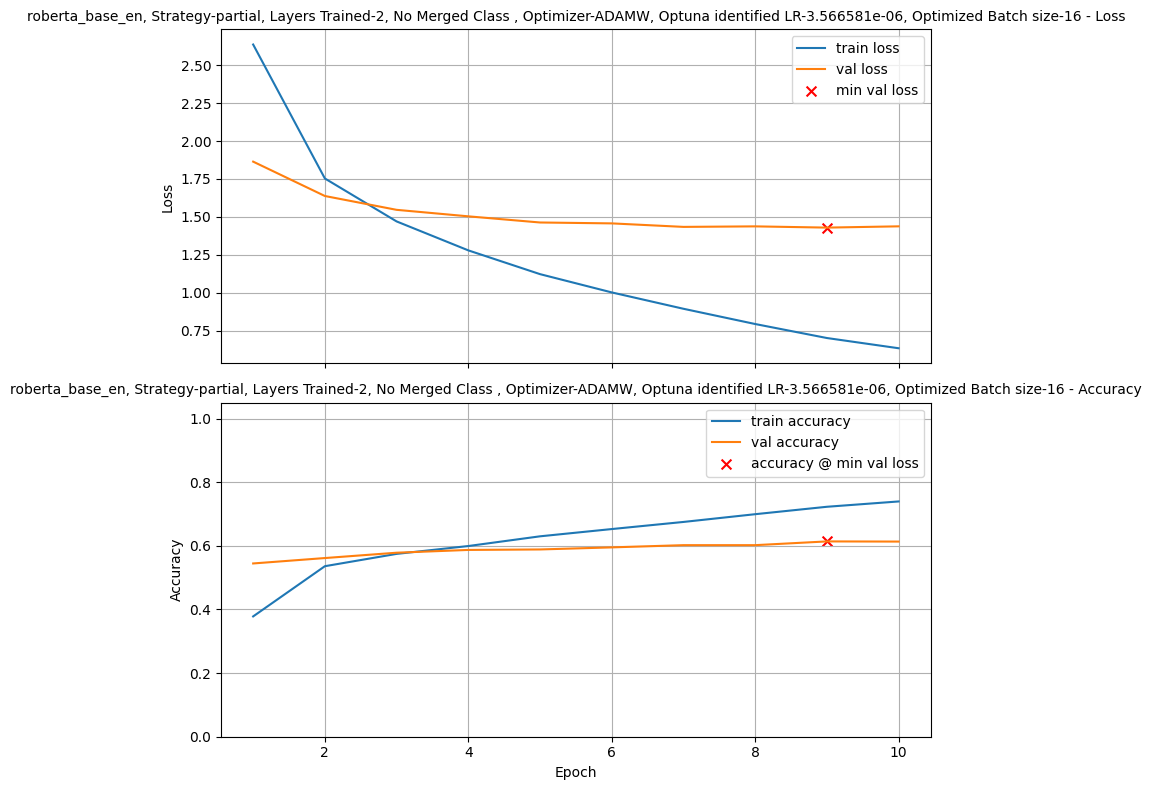

Final Training Loss:            0.6350
Final Training  accuracy:    0.7394
Final Validation Loss:          1.4379
Final Validation  accuracy:  0.6133
Min Validation Loss:            1.4296 (Epoch 9)
Accuracy @ Min Val Loss:      0.6138

Test metrics:
  loss: 1.4479
  accuracy: 0.6044

Execution Time: 17m 32s
Peak Memory Usage: 23902.84 MB

Generating final predictions for analysis purpose...


[I 2025-12-04 13:45:42,235] A new study created in memory with name: no-name-42f38ed4-decf-43ac-9b9d-9cbc748c123d


Test accuracy: 0.6044
Test macro-F1: 0.5333

Per-Category Performance (Sorted by F1 Score)
----------------------------------------------------
GOOD NEWS                      | 0.237    | 28.0    
WORLD NEWS                     | 0.273    | 43.0    
FIFTY                          | 0.297    | 27.0    
CULTURE & ARTS                 | 0.316    | 20.0    
ARTS                           | 0.324    | 30.0    
LATINO VOICES                  | 0.328    | 22.0    
COMEDY                         | 0.369    | 102.0   
IMPACT                         | 0.393    | 69.0    
WOMEN                          | 0.395    | 68.0    
GREEN                          | 0.413    | 53.0    
EDUCATION                      | 0.419    | 20.0    
ARTS & CULTURE                 | 0.436    | 26.0    
BLACK VOICES                   | 0.447    | 91.0    
TASTE                          | 0.454    | 42.0    
BUSINESS                       | 0.472    | 119.0   
WEIRD NEWS                     | 0.473    | 54.0    
PARENTS 

[I 2025-12-04 13:54:28,209] Trial 0 finished with value: 0.5637819170951843 and parameters: {'learning_rate': 6.770349159617199e-05, 'batch_size': 32, 'optimizer': 'adam', 'adam_beta1': 0.9828966616935261, 'adam_beta2': 0.9400647534588312}. Best is trial 0 with value: 0.5637819170951843.


Strategy: FULL (all layers trainable).


[I 2025-12-04 14:03:14,049] Trial 1 finished with value: 0.5932966470718384 and parameters: {'learning_rate': 2.705003783575669e-05, 'batch_size': 32, 'optimizer': 'adamw', 'adamw_weight_decay': 2.3623445839225115e-06}. Best is trial 1 with value: 0.5932966470718384.


Strategy: FULL (all layers trainable).


[I 2025-12-04 14:12:03,538] Trial 2 finished with value: 0.011255627498030663 and parameters: {'learning_rate': 6.65480756877091e-05, 'batch_size': 32, 'optimizer': 'adamw', 'adamw_weight_decay': 0.00024109130869237347}. Best is trial 1 with value: 0.5932966470718384.


Strategy: FULL (all layers trainable).


[I 2025-12-04 14:21:01,990] Trial 3 finished with value: 0.017008503898978233 and parameters: {'learning_rate': 4.01127062212305e-06, 'batch_size': 16, 'optimizer': 'sgd', 'sgd_momentum': 0.5164534755498377}. Best is trial 1 with value: 0.5932966470718384.


Strategy: FULL (all layers trainable).


[I 2025-12-04 14:30:42,854] Trial 4 finished with value: 0.6258128881454468 and parameters: {'learning_rate': 9.548038990378374e-06, 'batch_size': 16, 'optimizer': 'rmsprop', 'rms_rho': 0.8050497100136174}. Best is trial 4 with value: 0.6258128881454468.
[I 2025-12-04 14:30:42,859] A new study created in memory with name: no-name-0455e171-41ed-4eed-877c-a857836a0e30


Strategy: FULL (all layers trainable).


[I 2025-12-04 14:40:08,811] Trial 0 finished with value: 0.595297634601593 and parameters: {'learning_rate': 4.473457270190226e-06, 'batch_size': 16, 'optimizer': 'rmsprop', 'rms_rho': 0.9159107055912356}. Best is trial 0 with value: 0.595297634601593.


Strategy: FULL (all layers trainable).


[I 2025-12-04 14:48:08,269] Trial 1 finished with value: 0.016758378595113754 and parameters: {'learning_rate': 9.148416106088823e-06, 'batch_size': 32, 'optimizer': 'sgd', 'sgd_momentum': 0.08922695328686818}. Best is trial 0 with value: 0.595297634601593.


Strategy: FULL (all layers trainable).


[I 2025-12-04 14:57:31,862] Trial 2 finished with value: 0.016508253291249275 and parameters: {'learning_rate': 2.2133492198552157e-06, 'batch_size': 16, 'optimizer': 'adagrad', 'adagrad_init_acc': 0.00010485458174646115}. Best is trial 0 with value: 0.595297634601593.


Strategy: FULL (all layers trainable).


[I 2025-12-04 15:10:21,656] Trial 3 finished with value: 0.013006503693759441 and parameters: {'learning_rate': 8.110997715174743e-05, 'batch_size': 8, 'optimizer': 'adamw', 'adamw_weight_decay': 0.00015577354430789268}. Best is trial 0 with value: 0.595297634601593.


Strategy: FULL (all layers trainable).


[I 2025-12-04 15:19:06,511] Trial 4 finished with value: 0.5912956595420837 and parameters: {'learning_rate': 3.81535951272513e-05, 'batch_size': 32, 'optimizer': 'adamw', 'adamw_weight_decay': 0.00011151337440401266}. Best is trial 0 with value: 0.595297634601593.



>>> Best Learning Rate: 4.473457e-06 (Val Acc: 0.5953)
>>> Best Optimizer: rmsprop    >>> Best Batch Size: 16
Re-training roberta_base_en with Best LR: 4.47e-06 for full epochs...
Strategy: FULL (all layers trainable).

=== roberta_base_en, Strategy-full, Layers Trained-All, No Merged Class , Optimizer-RMSPROP, Optuna identified LR-4.473457e-06, Optimized Batch size-16 ===

Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 194s 64ms/step - accuracy: 0.1459 - loss: 3.4404 - val_accuracy: 0.5190 - val_loss: 1.9980 - learning_rate: 4.4735e-06
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 83s 41ms/step - accuracy: 0.5119 - loss: 1.9941 - val_accuracy: 0.5618 - val_loss: 1.6510 - learning_rate: 4.4735e-06
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 83s 41ms/step - accuracy: 0.5586 - loss: 1.5965 - val_accuracy: 0.5743 - val_loss: 1.5238 - learning_rate: 4.4735e-06
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.5896 - loss: 1.3755 - val_accuracy: 0.5940 - val_loss: 1.4462 - learnin

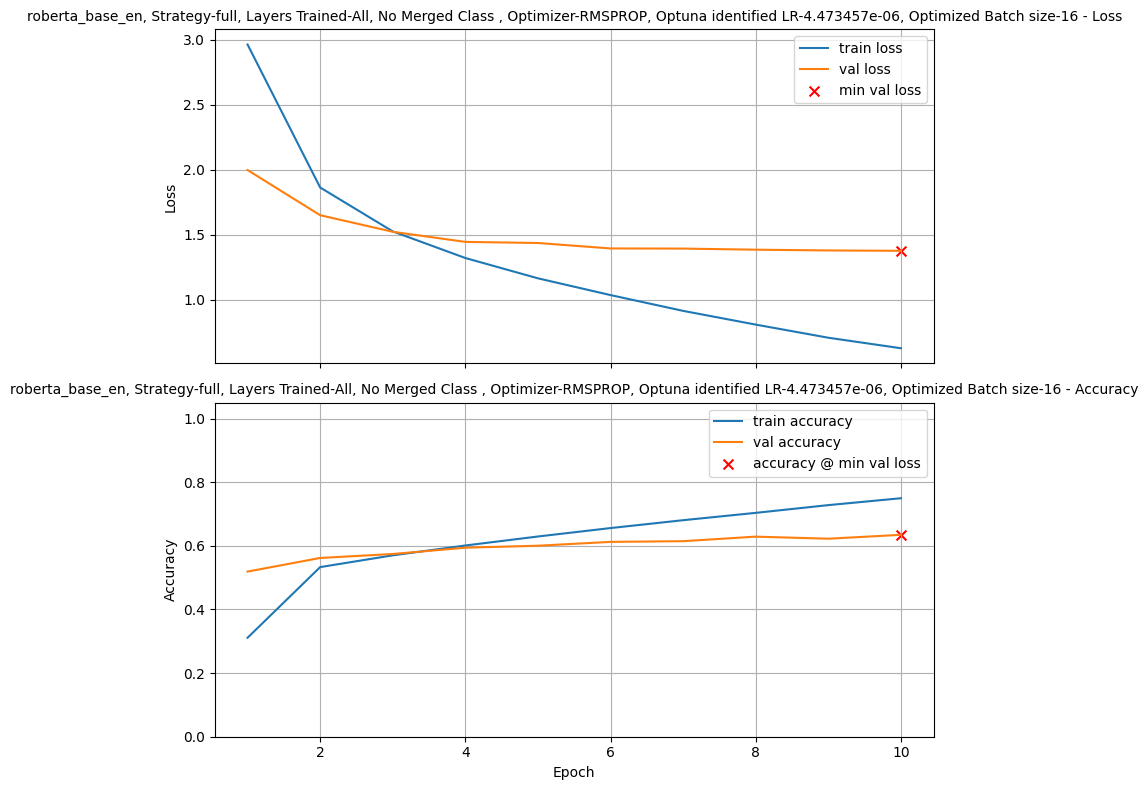

Final Training Loss:            0.6294
Final Training  accuracy:    0.7495
Final Validation Loss:          1.3775
Final Validation  accuracy:  0.6346
Min Validation Loss:            1.3775 (Epoch 10)
Accuracy @ Min Val Loss:      0.6346

Test metrics:
  loss: 1.3957
  accuracy: 0.6252

Execution Time: 15m 49s
Peak Memory Usage: 33113.17 MB

Generating final predictions for analysis purpose...


[I 2025-12-04 15:36:06,771] A new study created in memory with name: no-name-f2f75681-0eb7-41ec-89e5-c385759c7a76


Test accuracy: 0.6252
Test macro-F1: 0.5512

Per-Category Performance (Sorted by F1 Score)
----------------------------------------------------
GOOD NEWS                      | 0.267    | 28.0    
WORLD NEWS                     | 0.272    | 43.0    
FIFTY                          | 0.313    | 27.0    
CULTURE & ARTS                 | 0.353    | 20.0    
ARTS                           | 0.366    | 30.0    
EDUCATION                      | 0.385    | 20.0    
WOMEN                          | 0.398    | 68.0    
LATINO VOICES                  | 0.408    | 22.0    
IMPACT                         | 0.411    | 69.0    
WEIRD NEWS                     | 0.425    | 54.0    
GREEN                          | 0.439    | 53.0    
COMEDY                         | 0.448    | 102.0   
TASTE                          | 0.460    | 42.0    
PARENTS                        | 0.468    | 78.0    
BLACK VOICES                   | 0.482    | 91.0    
HEALTHY LIVING                 | 0.500    | 134.0   
BUSINESS

100%|██████████| 462/462 [00:00<00:00, 876kB/s]


100%|██████████| 794/794 [00:00<00:00, 1.29MB/s]


100%|██████████| 226k/226k [00:00<00:00, 273kB/s]


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 15:38:30,892] Trial 0 finished with value: 0.44397199153900146 and parameters: {'learning_rate': 1.540254778326871e-05, 'batch_size': 32, 'optimizer': 'rmsprop', 'rms_rho': 0.9406348089679166}. Best is trial 0 with value: 0.44397199153900146.


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 15:40:32,287] Trial 1 finished with value: 0.48824411630630493 and parameters: {'learning_rate': 7.810777816486084e-05, 'batch_size': 32, 'optimizer': 'rmsprop', 'rms_rho': 0.8016815812759563}. Best is trial 1 with value: 0.48824411630630493.


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 15:42:47,519] Trial 2 finished with value: 0.44122061133384705 and parameters: {'learning_rate': 2.7027415234606814e-05, 'batch_size': 32, 'optimizer': 'adamw', 'adamw_weight_decay': 2.182459195130022e-05}. Best is trial 1 with value: 0.48824411630630493.


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 15:44:47,800] Trial 3 finished with value: 0.4312156140804291 and parameters: {'learning_rate': 9.04607205659261e-06, 'batch_size': 32, 'optimizer': 'adamw', 'adamw_weight_decay': 0.0012785933540497584}. Best is trial 1 with value: 0.48824411630630493.


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 15:47:09,109] Trial 4 finished with value: 0.031015507876873016 and parameters: {'learning_rate': 1.8517549454893154e-06, 'batch_size': 16, 'optimizer': 'sgd', 'sgd_momentum': 0.8851802855145409}. Best is trial 1 with value: 0.48824411630630493.
[I 2025-12-04 15:47:09,112] A new study created in memory with name: no-name-99b03087-0f8a-407f-a292-acefafce58bd


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 15:50:17,694] Trial 0 finished with value: 0.07453726977109909 and parameters: {'learning_rate': 3.0456921681306666e-05, 'batch_size': 8, 'optimizer': 'sgd', 'sgd_momentum': 0.44016767222242015}. Best is trial 0 with value: 0.07453726977109909.


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 15:52:16,336] Trial 1 finished with value: 0.38719359040260315 and parameters: {'learning_rate': 2.6022937774875884e-06, 'batch_size': 32, 'optimizer': 'adam', 'adam_beta1': 0.8000625349017697, 'adam_beta2': 0.9622202909805367}. Best is trial 1 with value: 0.38719359040260315.


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 15:54:15,488] Trial 2 finished with value: 0.4297148585319519 and parameters: {'learning_rate': 7.297926514547583e-06, 'batch_size': 32, 'optimizer': 'adam', 'adam_beta1': 0.9677784412069107, 'adam_beta2': 0.9599719350638642}. Best is trial 2 with value: 0.4297148585319519.


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 15:56:30,264] Trial 3 finished with value: 0.09129564464092255 and parameters: {'learning_rate': 1.8703610217106927e-05, 'batch_size': 16, 'optimizer': 'sgd', 'sgd_momentum': 0.8957266198461281}. Best is trial 2 with value: 0.4297148585319519.


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 15:59:32,885] Trial 4 finished with value: 0.4897448718547821 and parameters: {'learning_rate': 4.682992090254073e-05, 'batch_size': 8, 'optimizer': 'adamw', 'adamw_weight_decay': 0.006236698622297245}. Best is trial 4 with value: 0.4897448718547821.



>>> Best Learning Rate: 4.682992e-05 (Val Acc: 0.4897)
>>> Best Optimizer: adamw    >>> Best Batch Size: 8
Re-training distil_bert_base_en_uncased with Best LR: 4.68e-05 for full epochs...
Strategy: FREEZE (backbone frozen).

=== distil_bert_base_en_uncased, Strategy-freeze, Layers Trained-0, No Merged Class , Optimizer-ADAMW, Optuna identified LR-4.682992e-05, Optimized Batch size-8 ===

Epoch 1/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 63s 11ms/step - accuracy: 0.2071 - loss: 3.4373 - val_accuracy: 0.4425 - val_loss: 2.4409 - learning_rate: 4.6830e-05
Epoch 2/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.3964 - loss: 2.4886 - val_accuracy: 0.4640 - val_loss: 2.0979 - learning_rate: 4.6830e-05
Epoch 3/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.4156 - loss: 2.1808 - val_accuracy: 0.4737 - val_loss: 1.9579 - learning_rate: 4.6830e-05
Epoch 4/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.4332 - loss: 2.0359 - val_accuracy: 0.4832 - val_loss: 1.882

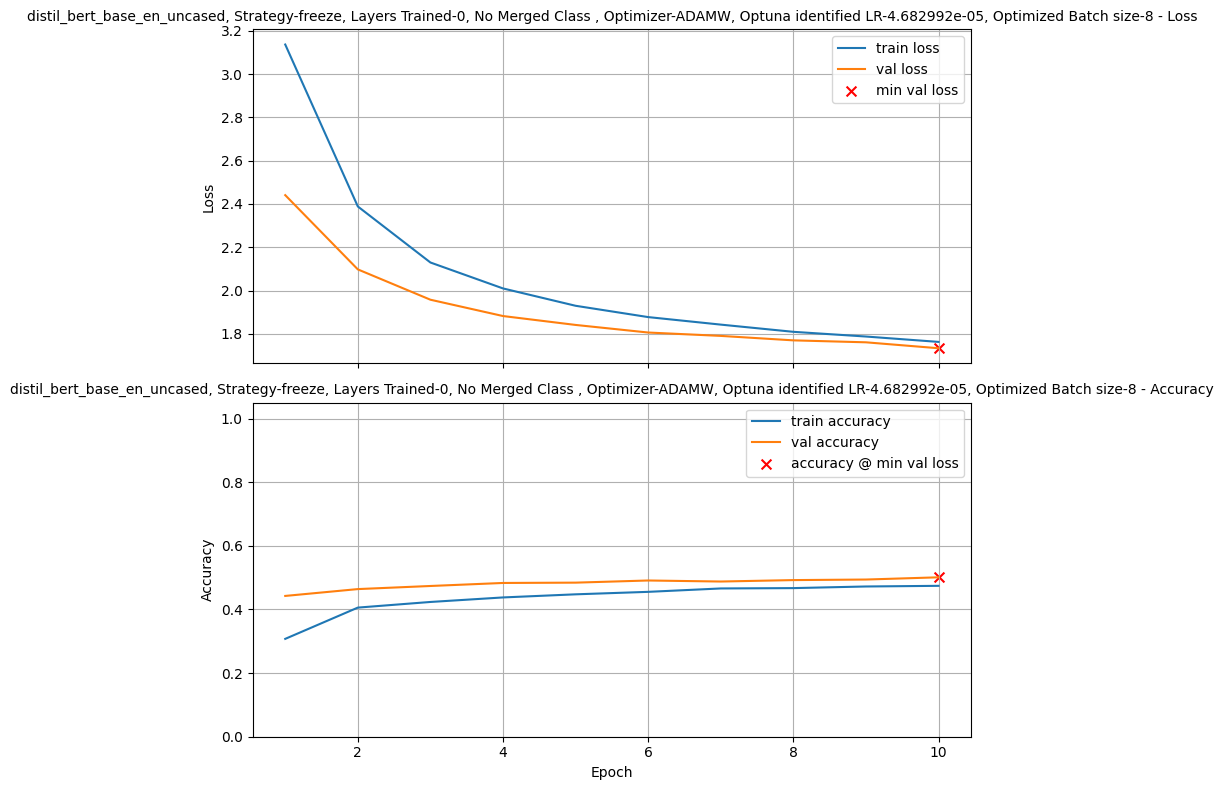

Final Training Loss:            1.7630
Final Training  accuracy:    0.4742
Final Validation Loss:          1.7337
Final Validation  accuracy:  0.5010
Min Validation Loss:            1.7337 (Epoch 10)
Accuracy @ Min Val Loss:      0.5010

Test metrics:
  loss: 1.7393
  accuracy: 0.5104

Execution Time: 4m 57s
Peak Memory Usage: 35592.32 MB

Generating final predictions for analysis purpose...


[I 2025-12-04 16:05:26,355] A new study created in memory with name: no-name-00e8f777-3a90-406d-9495-ec3b94ec80c7


Test accuracy: 0.5104
Test macro-F1: 0.4394

Per-Category Performance (Sorted by F1 Score)
----------------------------------------------------
FIFTY                          | 0.112    | 27.0    
GOOD NEWS                      | 0.237    | 28.0    
WORLD NEWS                     | 0.241    | 43.0    
ARTS                           | 0.264    | 30.0    
ARTS & CULTURE                 | 0.275    | 26.0    
CULTURE & ARTS                 | 0.290    | 20.0    
TASTE                          | 0.297    | 42.0    
COMEDY                         | 0.305    | 102.0   
IMPACT                         | 0.309    | 69.0    
WOMEN                          | 0.331    | 68.0    
WEIRD NEWS                     | 0.331    | 54.0    
PARENTS                        | 0.339    | 78.0    
COLLEGE                        | 0.353    | 23.0    
EDUCATION                      | 0.358    | 20.0    
BLACK VOICES                   | 0.377    | 91.0    
MEDIA                          | 0.384    | 56.0    
LATINO V

[I 2025-12-04 16:11:34,495] Trial 0 finished with value: 0.02076037973165512 and parameters: {'learning_rate': 7.034773528529067e-06, 'batch_size': 8, 'optimizer': 'adagrad', 'adagrad_init_acc': 0.0024232836432492954}. Best is trial 0 with value: 0.02076037973165512.


Strategy: PARTIAL (Unfroze 2/6 transformer layers).


[I 2025-12-04 16:17:48,351] Trial 1 finished with value: 0.6263131499290466 and parameters: {'learning_rate': 1.3399793578114585e-05, 'batch_size': 8, 'optimizer': 'rmsprop', 'rms_rho': 0.9156141787497066}. Best is trial 1 with value: 0.6263131499290466.


Strategy: PARTIAL (Unfroze 2/6 transformer layers).


[I 2025-12-04 16:23:32,476] Trial 2 finished with value: 0.3961980938911438 and parameters: {'learning_rate': 1.6485417919783163e-05, 'batch_size': 8, 'optimizer': 'sgd', 'sgd_momentum': 0.9140314978604698}. Best is trial 1 with value: 0.6263131499290466.


Strategy: PARTIAL (Unfroze 2/6 transformer layers).


[I 2025-12-04 16:27:54,941] Trial 3 finished with value: 0.600300133228302 and parameters: {'learning_rate': 8.640829119876118e-05, 'batch_size': 32, 'optimizer': 'rmsprop', 'rms_rho': 0.9385919409578858}. Best is trial 1 with value: 0.6263131499290466.


Strategy: PARTIAL (Unfroze 2/6 transformer layers).


[I 2025-12-04 16:32:11,791] Trial 4 finished with value: 0.037518758326768875 and parameters: {'learning_rate': 1.8716409119665847e-06, 'batch_size': 32, 'optimizer': 'adagrad', 'adagrad_init_acc': 2.1865705957678473e-06}. Best is trial 1 with value: 0.6263131499290466.
[I 2025-12-04 16:32:11,793] A new study created in memory with name: no-name-9a9d799f-6e02-46d9-b89a-32d01306e32f


Strategy: PARTIAL (Unfroze 2/6 transformer layers).


[I 2025-12-04 16:36:39,574] Trial 0 finished with value: 0.4709855020046234 and parameters: {'learning_rate': 1.0983629590440816e-06, 'batch_size': 32, 'optimizer': 'adamw', 'adamw_weight_decay': 0.003200678300702777}. Best is trial 0 with value: 0.4709855020046234.


Strategy: PARTIAL (Unfroze 2/6 transformer layers).


[I 2025-12-04 16:42:53,442] Trial 1 finished with value: 0.011005503125488758 and parameters: {'learning_rate': 1.0299778857395815e-06, 'batch_size': 8, 'optimizer': 'adagrad', 'adagrad_init_acc': 1.1954530765226784e-08}. Best is trial 0 with value: 0.4709855020046234.


Strategy: PARTIAL (Unfroze 2/6 transformer layers).


[I 2025-12-04 16:49:28,637] Trial 2 finished with value: 0.5987994074821472 and parameters: {'learning_rate': 2.9423457428647145e-05, 'batch_size': 8, 'optimizer': 'adamw', 'adamw_weight_decay': 3.469792144297783e-06}. Best is trial 2 with value: 0.5987994074821472.


100%|██████████| 253M/253M [00:17<00:00, 15.3MB/s]


Strategy: PARTIAL (Unfroze 2/6 transformer layers).


[I 2025-12-04 16:53:54,225] Trial 3 finished with value: 0.02076037973165512 and parameters: {'learning_rate': 3.5972975758897076e-05, 'batch_size': 32, 'optimizer': 'sgd', 'sgd_momentum': 0.045480741870602436}. Best is trial 2 with value: 0.5987994074821472.


Strategy: PARTIAL (Unfroze 2/6 transformer layers).


[I 2025-12-04 16:58:30,325] Trial 4 finished with value: 0.01775887981057167 and parameters: {'learning_rate': 1.3008497818761539e-06, 'batch_size': 16, 'optimizer': 'sgd', 'sgd_momentum': 0.2980972695067201}. Best is trial 2 with value: 0.5987994074821472.



>>> Best Learning Rate: 2.942346e-05 (Val Acc: 0.5988)
>>> Best Optimizer: adamw    >>> Best Batch Size: 8
Re-training distil_bert_base_en_uncased with Best LR: 2.94e-05 for full epochs...
Strategy: PARTIAL (Unfroze 2/6 transformer layers).

=== distil_bert_base_en_uncased, Strategy-partial, Layers Trained-2, No Merged Class , Optimizer-ADAMW, Optuna identified LR-2.942346e-05, Optimized Batch size-8 ===

Epoch 1/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 138s 22ms/step - accuracy: 0.3587 - loss: 2.6250 - val_accuracy: 0.5495 - val_loss: 1.6141 - learning_rate: 2.9423e-05
Epoch 2/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 60s 15ms/step - accuracy: 0.5852 - loss: 1.3832 - val_accuracy: 0.5700 - val_loss: 1.5232 - learning_rate: 2.9423e-05
Epoch 3/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 60s 15ms/step - accuracy: 0.6802 - loss: 0.9092 - val_accuracy: 0.5948 - val_loss: 1.5082 - learning_rate: 2.9423e-05
Epoch 4/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 60s 15ms/step - accuracy: 0.7551 - loss: 0.6102 - val_accuracy: 0.5

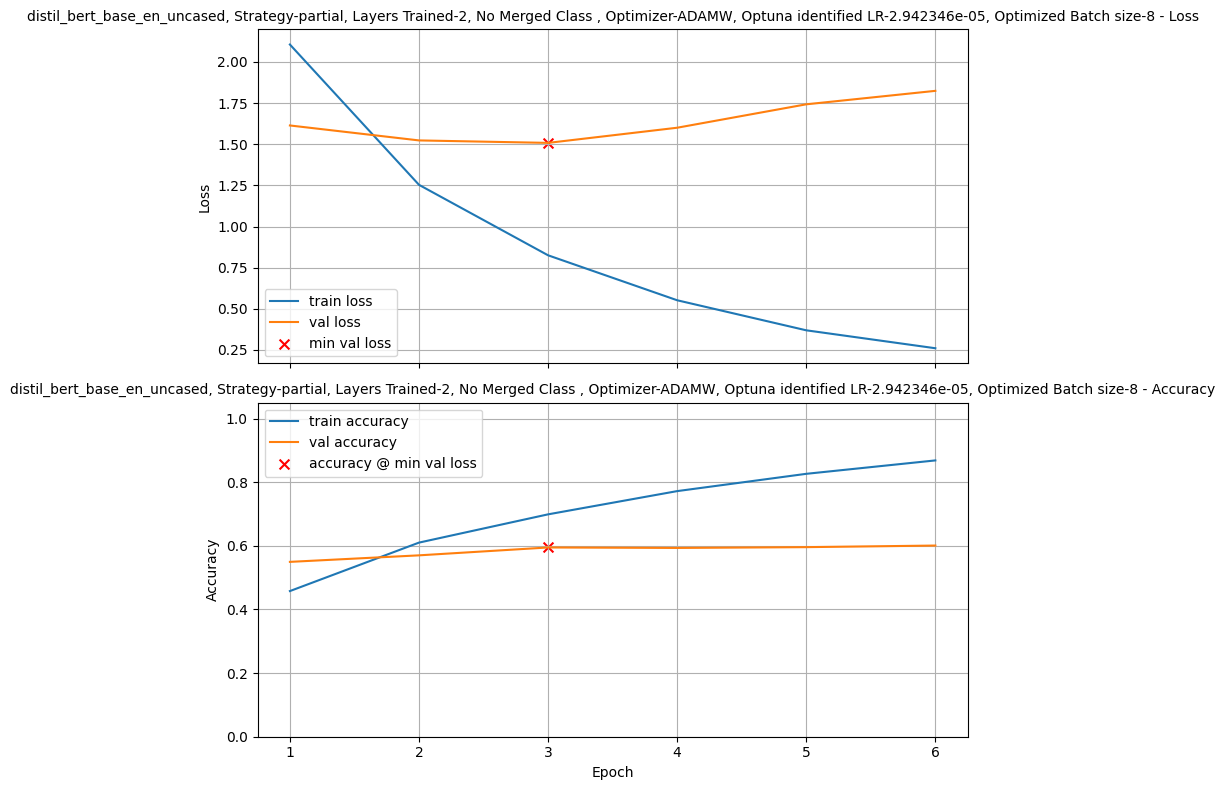

Final Training Loss:            0.2602
Final Training  accuracy:    0.8684
Final Validation Loss:          1.8245
Final Validation  accuracy:  0.6008
Min Validation Loss:            1.5082 (Epoch 3)
Accuracy @ Min Val Loss:      0.5948

Test metrics:
  loss: 1.4955
  accuracy: 0.5889

Execution Time: 7m 18s
Peak Memory Usage: 40163.69 MB

Generating final predictions for analysis purpose...


[I 2025-12-04 17:06:36,104] A new study created in memory with name: no-name-5f1c6d14-3d4d-491e-bf9c-07cc962676ad


Test accuracy: 0.5889
Test macro-F1: 0.5161

Per-Category Performance (Sorted by F1 Score)
----------------------------------------------------
FIFTY                          | 0.179    | 27.0    
GOOD NEWS                      | 0.214    | 28.0    
THE WORLDPOST                  | 0.299    | 74.0    
WORLD NEWS                     | 0.314    | 43.0    
CULTURE & ARTS                 | 0.324    | 20.0    
ARTS & CULTURE                 | 0.378    | 26.0    
WEIRD NEWS                     | 0.379    | 54.0    
IMPACT                         | 0.385    | 69.0    
WOMEN                          | 0.387    | 68.0    
COLLEGE                        | 0.400    | 23.0    
LATINO VOICES                  | 0.400    | 22.0    
BLACK VOICES                   | 0.405    | 91.0    
PARENTS                        | 0.410    | 78.0    
TASTE                          | 0.421    | 42.0    
GREEN                          | 0.424    | 53.0    
COMEDY                         | 0.443    | 102.0   
HEALTHY 

[I 2025-12-04 17:13:01,380] Trial 0 finished with value: 0.5970485210418701 and parameters: {'learning_rate': 6.522056159848589e-06, 'batch_size': 8, 'optimizer': 'adam', 'adam_beta1': 0.8800655698947365, 'adam_beta2': 0.9212380104952811}. Best is trial 0 with value: 0.5970485210418701.


Strategy: FULL (all layers trainable).


[I 2025-12-04 17:19:24,683] Trial 1 finished with value: 0.6163081526756287 and parameters: {'learning_rate': 1.551550642677673e-05, 'batch_size': 8, 'optimizer': 'rmsprop', 'rms_rho': 0.8996389426774827}. Best is trial 1 with value: 0.6163081526756287.


Strategy: FULL (all layers trainable).


[I 2025-12-04 17:25:45,258] Trial 2 finished with value: 0.6148074269294739 and parameters: {'learning_rate': 1.0621642014681083e-05, 'batch_size': 8, 'optimizer': 'rmsprop', 'rms_rho': 0.8466880540044479}. Best is trial 1 with value: 0.6163081526756287.


Strategy: FULL (all layers trainable).


[I 2025-12-04 17:30:46,151] Trial 3 finished with value: 0.5492746233940125 and parameters: {'learning_rate': 5.434081473415101e-06, 'batch_size': 16, 'optimizer': 'adam', 'adam_beta1': 0.9803044519374889, 'adam_beta2': 0.9176410785726963}. Best is trial 1 with value: 0.6163081526756287.


Strategy: FULL (all layers trainable).


[I 2025-12-04 17:37:04,734] Trial 4 finished with value: 0.043771885335445404 and parameters: {'learning_rate': 2.0939578959713325e-06, 'batch_size': 8, 'optimizer': 'adagrad', 'adagrad_init_acc': 0.0007618797664558347}. Best is trial 1 with value: 0.6163081526756287.
[I 2025-12-04 17:37:04,736] A new study created in memory with name: no-name-da2fc27e-a568-4bce-9d18-d463d01a93ca


Strategy: FULL (all layers trainable).


[I 2025-12-04 17:42:05,727] Trial 0 finished with value: 0.5015007257461548 and parameters: {'learning_rate': 1.239527973759774e-06, 'batch_size': 16, 'optimizer': 'rmsprop', 'rms_rho': 0.9865815585742707}. Best is trial 0 with value: 0.5015007257461548.


Strategy: FULL (all layers trainable).


[I 2025-12-04 17:46:56,167] Trial 1 finished with value: 0.30390194058418274 and parameters: {'learning_rate': 1.2588131758350897e-05, 'batch_size': 16, 'optimizer': 'adagrad', 'adagrad_init_acc': 1.3902636432549221e-05}. Best is trial 0 with value: 0.5015007257461548.


Strategy: FULL (all layers trainable).


[I 2025-12-04 17:51:16,843] Trial 2 finished with value: 0.3249124586582184 and parameters: {'learning_rate': 5.280906234872776e-06, 'batch_size': 16, 'optimizer': 'sgd', 'sgd_momentum': 0.9761441750498728}. Best is trial 0 with value: 0.5015007257461548.


Strategy: FULL (all layers trainable).


[I 2025-12-04 17:55:55,001] Trial 3 finished with value: 0.6258128881454468 and parameters: {'learning_rate': 2.530830172584571e-05, 'batch_size': 16, 'optimizer': 'rmsprop', 'rms_rho': 0.9558862934005072}. Best is trial 3 with value: 0.6258128881454468.


Strategy: FULL (all layers trainable).


[I 2025-12-04 18:01:53,795] Trial 4 finished with value: 0.6275637745857239 and parameters: {'learning_rate': 1.857803273121108e-05, 'batch_size': 8, 'optimizer': 'rmsprop', 'rms_rho': 0.8004120421049211}. Best is trial 4 with value: 0.6275637745857239.



>>> Best Learning Rate: 1.857803e-05 (Val Acc: 0.6276)
>>> Best Optimizer: rmsprop    >>> Best Batch Size: 8
Re-training distil_bert_base_en_uncased with Best LR: 1.86e-05 for full epochs...
Strategy: FULL (all layers trainable).

=== distil_bert_base_en_uncased, Strategy-full, Layers Trained-All, No Merged Class , Optimizer-RMSPROP, Optuna identified LR-1.857803e-05, Optimized Batch size-8 ===

Epoch 1/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 129s 22ms/step - accuracy: 0.3756 - loss: 2.9626 - val_accuracy: 0.5735 - val_loss: 1.5070 - learning_rate: 1.8578e-05
Epoch 2/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 56s 14ms/step - accuracy: 0.5758 - loss: 1.6243 - val_accuracy: 0.6161 - val_loss: 1.4024 - learning_rate: 1.8578e-05
Epoch 3/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 55s 14ms/step - accuracy: 0.6417 - loss: 1.2333 - val_accuracy: 0.6246 - val_loss: 1.4870 - learning_rate: 1.8578e-05
Epoch 4/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 55s 14ms/step - accuracy: 0.6944 - loss: 0.9508 - val_accuracy: 0.6173 - val_

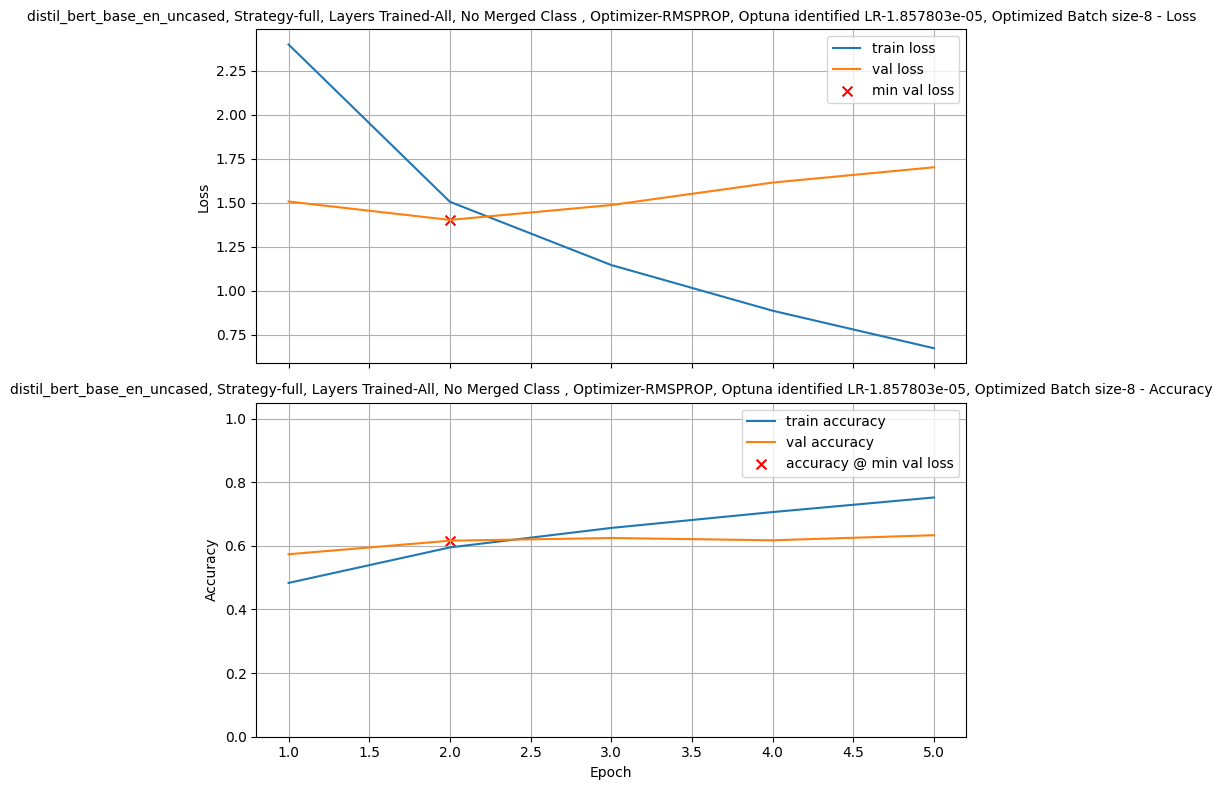

Final Training Loss:            0.6728
Final Training  accuracy:    0.7520
Final Validation Loss:          1.7018
Final Validation  accuracy:  0.6333
Min Validation Loss:            1.4024 (Epoch 2)
Accuracy @ Min Val Loss:      0.6161

Test metrics:
  loss: 1.3908
  accuracy: 0.6184

Execution Time: 5m 51s
Peak Memory Usage: 44782.16 MB

Generating final predictions for analysis purpose...


[I 2025-12-04 18:08:34,573] A new study created in memory with name: no-name-3ddb5f4d-ef4f-469d-bc68-a9db34f9e300


Test accuracy: 0.6184
Test macro-F1: 0.5094

Per-Category Performance (Sorted by F1 Score)
----------------------------------------------------
TASTE                          | 0.043    | 42.0    
WORLD NEWS                     | 0.164    | 43.0    
FIFTY                          | 0.171    | 27.0    
CULTURE & ARTS                 | 0.294    | 20.0    
GOOD NEWS                      | 0.314    | 28.0    
GREEN                          | 0.326    | 53.0    
ARTS & CULTURE                 | 0.333    | 26.0    
PARENTS                        | 0.343    | 78.0    
WOMEN                          | 0.353    | 68.0    
WEIRD NEWS                     | 0.359    | 54.0    
IMPACT                         | 0.369    | 69.0    
ARTS                           | 0.407    | 30.0    
COMEDY                         | 0.425    | 102.0   
EDUCATION                      | 0.429    | 20.0    
LATINO VOICES                  | 0.429    | 22.0    
ENVIRONMENT                    | 0.448    | 26.0    
BUSINESS

[I 2025-12-04 18:13:01,194] Trial 0 finished with value: 0.049274638295173645 and parameters: {'learning_rate': 1.100872177374986e-06, 'batch_size': 8, 'optimizer': 'adamw', 'adamw_weight_decay': 0.00023440352644917787}. Best is trial 0 with value: 0.049274638295173645.


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 18:16:22,769] Trial 1 finished with value: 0.23361681401729584 and parameters: {'learning_rate': 1.9038667576719646e-05, 'batch_size': 16, 'optimizer': 'rmsprop', 'rms_rho': 0.8680124252012493}. Best is trial 1 with value: 0.23361681401729584.


100%|██████████| 418M/418M [00:27<00:00, 16.0MB/s]


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 18:19:49,512] Trial 2 finished with value: 0.013256628066301346 and parameters: {'learning_rate': 2.5354051160063326e-05, 'batch_size': 32, 'optimizer': 'sgd', 'sgd_momentum': 0.15465859279029756}. Best is trial 1 with value: 0.23361681401729584.


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 18:22:44,779] Trial 3 finished with value: 0.07103551924228668 and parameters: {'learning_rate': 3.900535832920744e-06, 'batch_size': 32, 'optimizer': 'rmsprop', 'rms_rho': 0.9573038371034053}. Best is trial 1 with value: 0.23361681401729584.


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 18:25:39,691] Trial 4 finished with value: 0.014507253654301167 and parameters: {'learning_rate': 3.6767969182638036e-05, 'batch_size': 32, 'optimizer': 'adagrad', 'adagrad_init_acc': 0.0007270001008854369}. Best is trial 1 with value: 0.23361681401729584.
[I 2025-12-04 18:25:39,694] A new study created in memory with name: no-name-5290d4e8-2ae6-4f34-a504-ea021a23db51


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 18:30:01,887] Trial 0 finished with value: 0.0300150066614151 and parameters: {'learning_rate': 1.1889505517732958e-06, 'batch_size': 8, 'optimizer': 'adagrad', 'adagrad_init_acc': 0.0051285641904002255}. Best is trial 0 with value: 0.0300150066614151.


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 18:34:26,990] Trial 1 finished with value: 0.23036518692970276 and parameters: {'learning_rate': 8.898007333713005e-06, 'batch_size': 8, 'optimizer': 'rmsprop', 'rms_rho': 0.8237315901668697}. Best is trial 1 with value: 0.23036518692970276.


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 18:37:23,355] Trial 2 finished with value: 0.019509755074977875 and parameters: {'learning_rate': 5.433823926592897e-06, 'batch_size': 32, 'optimizer': 'sgd', 'sgd_momentum': 0.7542752036350235}. Best is trial 1 with value: 0.23036518692970276.


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 18:40:47,583] Trial 3 finished with value: 0.05277638882398605 and parameters: {'learning_rate': 1.2846918272556888e-06, 'batch_size': 16, 'optimizer': 'rmsprop', 'rms_rho': 0.9139991584342004}. Best is trial 1 with value: 0.23036518692970276.


Strategy: FREEZE (backbone frozen).


[I 2025-12-04 18:44:12,503] Trial 4 finished with value: 0.26138070225715637 and parameters: {'learning_rate': 4.4207708806894796e-05, 'batch_size': 16, 'optimizer': 'adam', 'adam_beta1': 0.9350146223684743, 'adam_beta2': 0.9668894361674176}. Best is trial 4 with value: 0.26138070225715637.



>>> Best Learning Rate: 4.420771e-05 (Val Acc: 0.2614)
>>> Best Optimizer: adam    >>> Best Batch Size: 16
Re-training bert_base_en_uncased with Best LR: 4.42e-05 for full epochs...
Strategy: FREEZE (backbone frozen).

=== bert_base_en_uncased, Strategy-freeze, Layers Trained-0, No Merged Class , Optimizer-ADAM, Optuna identified LR-4.420771e-05, Optimized Batch size-16 ===

Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 88s 27ms/step - accuracy: 0.0401 - loss: 3.7012 - val_accuracy: 0.1418 - val_loss: 3.5659 - learning_rate: 4.4208e-05
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.1083 - loss: 3.5973 - val_accuracy: 0.1756 - val_loss: 3.4748 - learning_rate: 4.4208e-05
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.1553 - loss: 3.5353 - val_accuracy: 0.2101 - val_loss: 3.4053 - learning_rate: 4.4208e-05
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.1885 - loss: 3.4797 - val_accuracy: 0.2449 - val_loss: 3.3341 - learnin

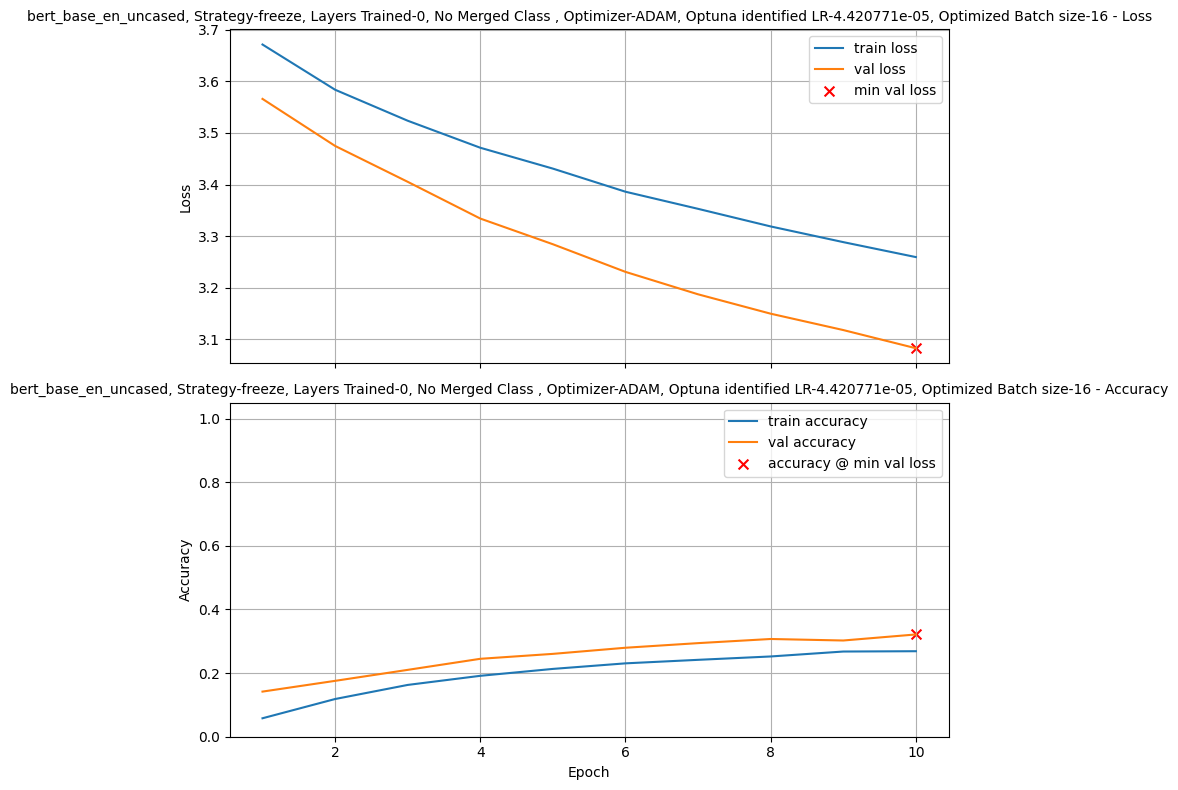

Final Training Loss:            3.2594
Final Training  accuracy:    0.2687
Final Validation Loss:          3.0828
Final Validation  accuracy:  0.3214
Min Validation Loss:            3.0828 (Epoch 10)
Accuracy @ Min Val Loss:      0.3214

Test metrics:
  loss: 3.0785
  accuracy: 0.3158

Execution Time: 5m 17s
Peak Memory Usage: 52714.72 MB

Generating final predictions for analysis purpose...


[I 2025-12-04 18:50:24,980] A new study created in memory with name: no-name-528f2142-4ace-483e-b38d-fc489b039741


Test accuracy: 0.3158
Test macro-F1: 0.1728

Per-Category Performance (Sorted by F1 Score)
----------------------------------------------------
ARTS & CULTURE                 | 0.000    | 26.0    
BLACK VOICES                   | 0.000    | 91.0    
COLLEGE                        | 0.000    | 23.0    
EDUCATION                      | 0.000    | 20.0    
FIFTY                          | 0.000    | 27.0    
GREEN                          | 0.000    | 53.0    
WOMEN                          | 0.000    | 68.0    
TASTE                          | 0.041    | 42.0    
ENVIRONMENT                    | 0.049    | 26.0    
WEIRD NEWS                     | 0.089    | 54.0    
WORLD NEWS                     | 0.092    | 43.0    
TECH                           | 0.095    | 40.0    
BUSINESS                       | 0.097    | 119.0   
DIVORCE                        | 0.101    | 69.0    
MEDIA                          | 0.103    | 56.0    
WORLDPOST                      | 0.107    | 51.0    
SCIENCE 

[I 2025-12-04 19:01:17,516] Trial 0 finished with value: 0.021760880947113037 and parameters: {'learning_rate': 3.1335593435506883e-06, 'batch_size': 8, 'optimizer': 'adagrad', 'adagrad_init_acc': 2.3460620827296814e-08}. Best is trial 0 with value: 0.021760880947113037.


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-04 19:12:20,366] Trial 1 finished with value: 0.1603301614522934 and parameters: {'learning_rate': 7.374788166937784e-06, 'batch_size': 8, 'optimizer': 'adagrad', 'adagrad_init_acc': 1.9543628497261733e-06}. Best is trial 1 with value: 0.1603301614522934.


100%|██████████| 457/457 [00:00<00:00, 921kB/s]


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-04 19:20:00,705] Trial 2 finished with value: 0.5842921733856201 and parameters: {'learning_rate': 5.7112284504192704e-06, 'batch_size': 32, 'optimizer': 'adamw', 'adamw_weight_decay': 4.982605023532544e-05}. Best is trial 2 with value: 0.5842921733856201.


100%|██████████| 761/761 [00:00<00:00, 1.87MB/s]


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-04 19:28:48,365] Trial 3 finished with value: 0.6080540418624878 and parameters: {'learning_rate': 5.368333685932976e-05, 'batch_size': 16, 'optimizer': 'adam', 'adam_beta1': 0.8209038848774876, 'adam_beta2': 0.975890199032459}. Best is trial 3 with value: 0.6080540418624878.


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-04 19:37:42,872] Trial 4 finished with value: 0.6160580515861511 and parameters: {'learning_rate': 1.516953295369386e-05, 'batch_size': 16, 'optimizer': 'adam', 'adam_beta1': 0.9636730681560326, 'adam_beta2': 0.9567957655881564}. Best is trial 4 with value: 0.6160580515861511.
[I 2025-12-04 19:37:42,875] A new study created in memory with name: no-name-07799d54-bdd0-4278-ae92-26c1ecc9c356


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-04 19:47:04,477] Trial 0 finished with value: 0.6205602884292603 and parameters: {'learning_rate': 9.926357252481625e-05, 'batch_size': 32, 'optimizer': 'rmsprop', 'rms_rho': 0.94675413308071}. Best is trial 0 with value: 0.6205602884292603.


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-04 19:54:49,066] Trial 1 finished with value: 0.5705352425575256 and parameters: {'learning_rate': 8.517001824805003e-05, 'batch_size': 32, 'optimizer': 'adamw', 'adamw_weight_decay': 8.630034625300418e-05}. Best is trial 0 with value: 0.6205602884292603.


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-04 20:06:23,029] Trial 2 finished with value: 0.6300650238990784 and parameters: {'learning_rate': 3.335619240793443e-05, 'batch_size': 8, 'optimizer': 'adam', 'adam_beta1': 0.825008955150708, 'adam_beta2': 0.9789296703926219}. Best is trial 2 with value: 0.6300650238990784.


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-04 20:18:32,977] Trial 3 finished with value: 0.3206603229045868 and parameters: {'learning_rate': 1.5875893336283067e-05, 'batch_size': 8, 'optimizer': 'adagrad', 'adagrad_init_acc': 2.0790592764089668e-06}. Best is trial 2 with value: 0.6300650238990784.


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-04 20:30:06,494] Trial 4 finished with value: 0.6500750184059143 and parameters: {'learning_rate': 2.17541496837115e-05, 'batch_size': 8, 'optimizer': 'adam', 'adam_beta1': 0.9374906170917322, 'adam_beta2': 0.9182814327565009}. Best is trial 4 with value: 0.6500750184059143.



>>> Best Learning Rate: 2.175415e-05 (Val Acc: 0.6501)
>>> Best Optimizer: adam    >>> Best Batch Size: 8
Re-training bert_base_en_uncased with Best LR: 2.18e-05 for full epochs...
Strategy: PARTIAL (Unfroze 2/12 transformer layers).

=== bert_base_en_uncased, Strategy-partial, Layers Trained-2, No Merged Class , Optimizer-ADAM, Optuna identified LR-2.175415e-05, Optimized Batch size-8 ===

Epoch 1/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 234s 40ms/step - accuracy: 0.3540 - loss: 2.7594 - val_accuracy: 0.5750 - val_loss: 1.5618 - learning_rate: 2.1754e-05
Epoch 2/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 117s 29ms/step - accuracy: 0.5990 - loss: 1.4266 - val_accuracy: 0.6118 - val_loss: 1.4270 - learning_rate: 2.1754e-05
Epoch 3/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 117s 29ms/step - accuracy: 0.7005 - loss: 0.9074 - val_accuracy: 0.6276 - val_loss: 1.4259 - learning_rate: 2.1754e-05
Epoch 4/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 116s 29ms/step - accuracy: 0.7783 - loss: 0.5856 - val_accuracy: 0.6136 - val_lo

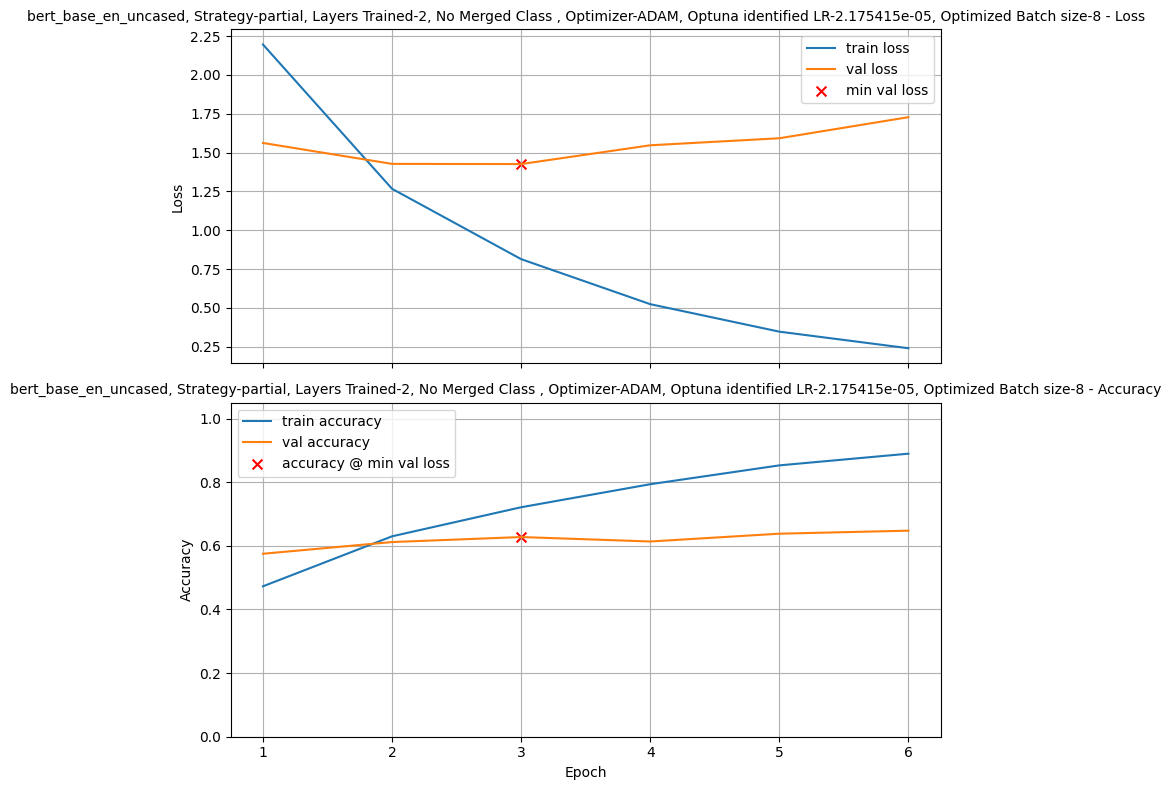

Final Training Loss:            0.2399
Final Training  accuracy:    0.8895
Final Validation Loss:          1.7277
Final Validation  accuracy:  0.6476
Min Validation Loss:            1.4259 (Epoch 3)
Accuracy @ Min Val Loss:      0.6276

Test metrics:
  loss: 1.3889
  accuracy: 0.6317

Execution Time: 13m 47s
Peak Memory Usage: 62731.46 MB

Generating final predictions for analysis purpose...


[I 2025-12-04 20:44:55,514] A new study created in memory with name: no-name-9a1b84f5-a8af-4faa-af58-a60d019bfe58


Test accuracy: 0.6317
Test macro-F1: 0.5520

Per-Category Performance (Sorted by F1 Score)
----------------------------------------------------
FIFTY                          | 0.216    | 27.0    
TASTE                          | 0.246    | 42.0    
GOOD NEWS                      | 0.255    | 28.0    
CULTURE & ARTS                 | 0.312    | 20.0    
ARTS                           | 0.355    | 30.0    
PARENTS                        | 0.360    | 78.0    
WORLD NEWS                     | 0.376    | 43.0    
WOMEN                          | 0.380    | 68.0    
WEIRD NEWS                     | 0.382    | 54.0    
COMEDY                         | 0.409    | 102.0   
IMPACT                         | 0.420    | 69.0    
EDUCATION                      | 0.457    | 20.0    
BUSINESS                       | 0.474    | 119.0   
GREEN                          | 0.484    | 53.0    
BLACK VOICES                   | 0.494    | 91.0    
ARTS & CULTURE                 | 0.512    | 26.0    
MONEY   

[I 2025-12-04 20:51:46,870] Trial 0 finished with value: 0.07428714632987976 and parameters: {'learning_rate': 4.584714138822754e-06, 'batch_size': 32, 'optimizer': 'sgd', 'sgd_momentum': 0.15536014184283414}. Best is trial 0 with value: 0.07428714632987976.


Strategy: FULL (all layers trainable).


[I 2025-12-04 21:02:59,369] Trial 1 finished with value: 0.6133066415786743 and parameters: {'learning_rate': 4.32605911874333e-06, 'batch_size': 8, 'optimizer': 'adam', 'adam_beta1': 0.8886166015512563, 'adam_beta2': 0.9460251066315756}. Best is trial 1 with value: 0.6133066415786743.


Strategy: FULL (all layers trainable).


[I 2025-12-04 21:12:59,107] Trial 2 finished with value: 0.2563782036304474 and parameters: {'learning_rate': 4.2389342445395795e-05, 'batch_size': 8, 'optimizer': 'sgd', 'sgd_momentum': 0.359204223842553}. Best is trial 1 with value: 0.6133066415786743.


Strategy: FULL (all layers trainable).


[I 2025-12-04 21:22:54,723] Trial 3 finished with value: 0.19159579277038574 and parameters: {'learning_rate': 6.7484578830052665e-06, 'batch_size': 8, 'optimizer': 'sgd', 'sgd_momentum': 0.8661732832163894}. Best is trial 1 with value: 0.6133066415786743.


Strategy: FULL (all layers trainable).


[I 2025-12-04 21:32:25,596] Trial 4 finished with value: 0.5120059847831726 and parameters: {'learning_rate': 8.03495917236576e-05, 'batch_size': 16, 'optimizer': 'adagrad', 'adagrad_init_acc': 0.0015096509247775867}. Best is trial 1 with value: 0.6133066415786743.
[I 2025-12-04 21:32:25,599] A new study created in memory with name: no-name-b866f26e-abde-4110-950c-797a20265f24


Strategy: FULL (all layers trainable).


[I 2025-12-04 21:43:54,261] Trial 0 finished with value: 0.5370185375213623 and parameters: {'learning_rate': 1.10701072582183e-06, 'batch_size': 8, 'optimizer': 'adamw', 'adamw_weight_decay': 0.0012979519688500662}. Best is trial 0 with value: 0.5370185375213623.


Strategy: FULL (all layers trainable).


[I 2025-12-04 21:50:51,370] Trial 1 finished with value: 0.010755377821624279 and parameters: {'learning_rate': 2.7572429971052494e-06, 'batch_size': 32, 'optimizer': 'sgd', 'sgd_momentum': 0.032368656558111185}. Best is trial 0 with value: 0.5370185375213623.


Strategy: FULL (all layers trainable).


[I 2025-12-04 21:58:35,790] Trial 2 finished with value: 0.5255127549171448 and parameters: {'learning_rate': 1.208992423104783e-06, 'batch_size': 32, 'optimizer': 'adamw', 'adamw_weight_decay': 0.00039958286051103574}. Best is trial 0 with value: 0.5370185375213623.


Strategy: FULL (all layers trainable).


[I 2025-12-04 22:10:52,279] Trial 3 finished with value: 0.016758378595113754 and parameters: {'learning_rate': 2.2411364573261967e-06, 'batch_size': 8, 'optimizer': 'adagrad', 'adagrad_init_acc': 0.0011110330315944202}. Best is trial 0 with value: 0.5370185375213623.


Strategy: FULL (all layers trainable).


[I 2025-12-04 22:18:49,407] Trial 4 finished with value: 0.022511254996061325 and parameters: {'learning_rate': 1.6201929873435318e-06, 'batch_size': 16, 'optimizer': 'sgd', 'sgd_momentum': 0.02788478858283924}. Best is trial 0 with value: 0.5370185375213623.



>>> Best Learning Rate: 1.107011e-06 (Val Acc: 0.5370)
>>> Best Optimizer: adamw    >>> Best Batch Size: 8
Re-training bert_base_en_uncased with Best LR: 1.11e-06 for full epochs...
Strategy: FULL (all layers trainable).

=== bert_base_en_uncased, Strategy-full, Layers Trained-All, No Merged Class , Optimizer-ADAMW, Optuna identified LR-1.107011e-06, Optimized Batch size-8 ===

Epoch 1/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 240s 41ms/step - accuracy: 0.0652 - loss: 3.6686 - val_accuracy: 0.3154 - val_loss: 3.2354 - learning_rate: 1.1070e-06
Epoch 2/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 121s 30ms/step - accuracy: 0.3352 - loss: 3.2549 - val_accuracy: 0.4635 - val_loss: 2.7504 - learning_rate: 1.1070e-06
Epoch 3/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 124s 31ms/step - accuracy: 0.4531 - loss: 2.8216 - val_accuracy: 0.5133 - val_loss: 2.3938 - learning_rate: 1.1070e-06
Epoch 4/10
3999/3999 ━━━━━━━━━━━━━━━━━━━━ 127s 32ms/step - accuracy: 0.5103 - loss: 2.4569 - val_accuracy: 0.5358 - val_loss: 2.1342 - 

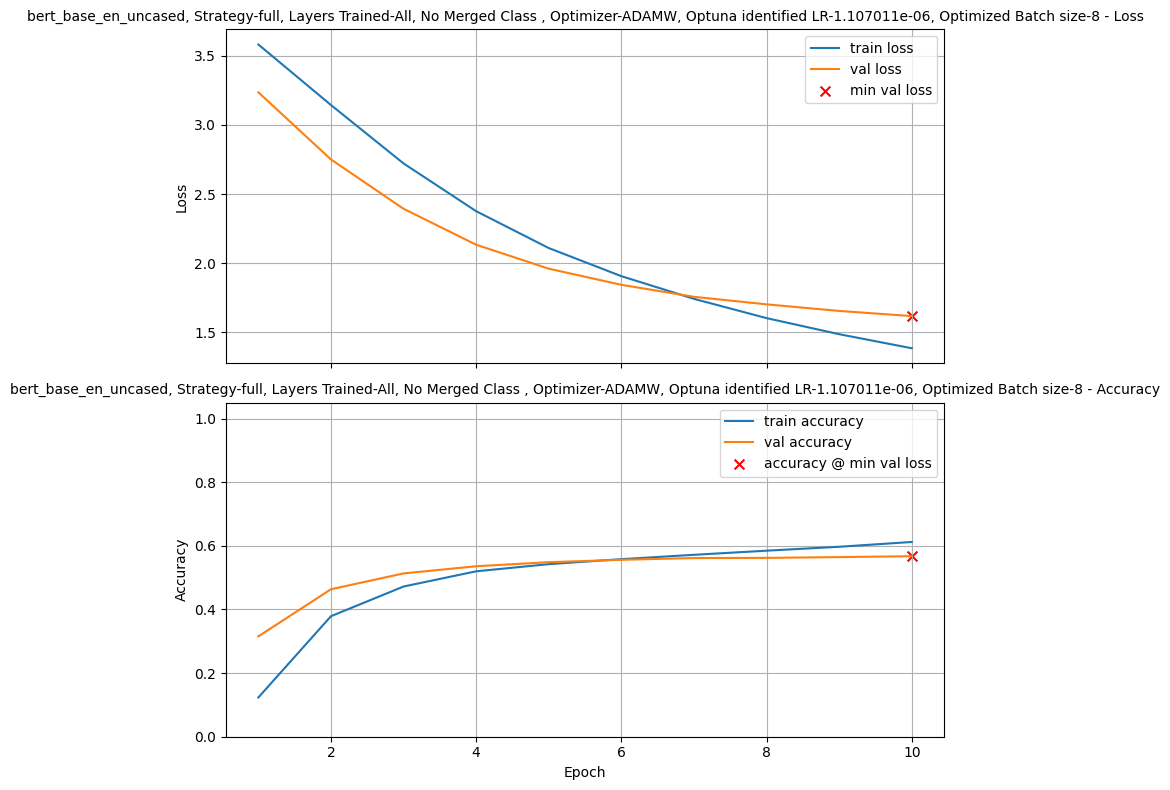

Final Training Loss:            1.3861
Final Training  accuracy:    0.6121
Final Validation Loss:          1.6185
Final Validation  accuracy:  0.5673
Min Validation Loss:            1.6185 (Epoch 10)
Accuracy @ Min Val Loss:      0.5673

Test metrics:
  loss: 1.6370
  accuracy: 0.5701

Execution Time: 22m 26s
Peak Memory Usage: 71566.45 MB

Generating final predictions for analysis purpose...
Test accuracy: 0.5701
Test macro-F1: 0.4952

Per-Category Performance (Sorted by F1 Score)
----------------------------------------------------
FIFTY                          | 0.098    | 27.0    
ARTS & CULTURE                 | 0.233    | 26.0    
WORLD NEWS                     | 0.235    | 43.0    
PARENTS                        | 0.274    | 78.0    
ARTS                           | 0.278    | 30.0    
GOOD NEWS                      | 0.290    | 28.0    
WOMEN                          | 0.331    | 68.0    
TASTE                          | 0.345    | 42.0    
CULTURE & ARTS                 | 0.3

In [ ]:

# ************. FIRST RUN to analyse classification performance with all 41 classes  *************

# Let us do the first set to understand the overall performance for each label type/category
# so we can decide on the merging by category and other preprocessing needed if any
# we will use the f1 score by category to determine what labels to map to what target label (i.e merge)

# Set experiment parameters
experiment_layers = True
EPOCHS = 10

# Since the above is True the below four final parameters will be ignored

# Set these final hyper parameters identified in earlier run to reduce the search space
# final used only when value of experiment_layers = False
final_model_name = "roberta_base_en"
final_batch_size = 16
final_strategy = "full"
final_train_layers = 6

#set the strategy
strategy = "ALL"    # "ALL" will create three rows ie one for "freeze", "partial" and "full"

ALLOWED_MODEL_LIST = ["roberta_base_en", "distil_bert_base_en_uncased", "bert_base_en_uncased"]

# Set standard parameters for Optuna trials
OPTUNA_TRIALS_INITIAL = 5
OPTUNA_TRIALS_FINAL = 10
OPTUNA_TRIALS = OPTUNA_TRIALS_INITIAL  # How many different trials to run for optuna..during initial run we will do 5 later for final training we may do 10 if needed

# default experimental layers just in case parameter doesn't work should just come through parameters
#N_PARTIAL_VALUES = [2, 3, 6]   # we will send all the layers we want to test and let it loop in experimental loop method
N_PARTIAL_VALUES = [2]   # deb debug ... we will send all the layers we want to test and let it loop in experimental loop method
BATCHS = [8, 16, 32]           # we will send all three and let Optuna decide the best

# Check if dictionaries exist first to avoid erroring out if this is the first run
if 'all_experiment_results' not in globals():
    all_experiment_results = {}
if 'all_subset_stats' not in globals():
    all_subset_stats = []
if 'all_optuna_studies' not in globals():
    all_optuna_studies = []

# Get the class weights for the training data
class_weights = get_class_weights(y_tr)

print(f"\n\n{'#'*80}")
print("Starting Optuna runs with **** FIRST RUN  ****  for all three models for initial analysis")
print(f"{'#'*80}")

print("Vocabulary size:", vocab_size)
print("Number of classes:", num_classes)
print("Max Length of text ", MAX_LEN)

# Generate model_configs for various batch sizes and strategies
# Initialise the variables to be updated in the loop
ALL_MODEL_CONFIGS = []

# fallback
final_train_layers = globals().get("final_train_layers", 2)

if experiment_layers:
    for model_n in ALLOWED_MODEL_LIST:
        # Determine effective_partial_values based on model_n
        if model_n == "distil_bert_base_en_uncased":
            effective_partial_values = [2]
        else:
            effective_partial_values = N_PARTIAL_VALUES

        if strategy == "ALL":
            # add Freeze config
            ALL_MODEL_CONFIGS.append({
                "name": model_n,
                "batch": BATCHS, # Pass the entire list of batch sizes for Optuna to optimize
                "strategy": "freeze",
                "unfreeze_layers": 0,
            })
            # add Partial configs
            for n_unfreeze in effective_partial_values:
                ALL_MODEL_CONFIGS.append({
                    "name": model_n,
                    "batch": BATCHS, # Pass the entire list of batch sizes for Optuna to optimize
                    "strategy": "partial",
                    "unfreeze_layers": n_unfreeze,
                })
            # add Full config
            ALL_MODEL_CONFIGS.append({
                "name": model_n,
                "batch": BATCHS, # Pass the entire list of batch sizes for Optuna to optimize
                "strategy": "full",
                "unfreeze_layers": None,
            })
        elif strategy == "partial":
            # add 'partial' configs only
            for n_unfreeze in effective_partial_values:
                ALL_MODEL_CONFIGS.append({
                    "name": model_n,
                    "batch": BATCHS, # Pass the entire list of batch sizes for Optuna to optimize
                    "strategy": "partial",
                    "unfreeze_layers": n_unfreeze,
                })
        elif strategy == "full":
            ALL_MODEL_CONFIGS.append({
                "name": model_n,
                "batch": BATCHS, # Pass the entire list of batch sizes for Optuna to optimize
                "strategy": "full",
                "unfreeze_layers": None,
            })
        elif strategy == "freeze":
            ALL_MODEL_CONFIGS.append({
                "name": model_n,
                "batch": BATCHS, # Pass the entire list of batch sizes for Optuna to optimize
                "strategy": "freeze",
                "unfreeze_layers": 0,
            })
        else:
            print(f"Warning: Unknown strategy '{strategy}'. No configurations added for {model_n}.")

else:                                     # this triggers only experiment_layers= False i.e we are final
    N_PARTIAL_VALUES = [int(final_train_layers)]
    model_n = final_model_name
    batch_s = final_batch_size
    strategy = final_strategy
    unfreeze_layers = int(final_train_layers)
    ALL_MODEL_CONFIGS.append({
        "name": model_n,
        "batch": batch_s,
        "strategy": strategy,
        "unfreeze_layers": unfreeze_layers,
    })


print(f"experiment_layers={experiment_layers}  -> N_PARTIAL_VALUES={N_PARTIAL_VALUES}")

current_results, current_subset_stats, current_study = run_experiment_loop_with_optuna(
    X_tr, X_va, X_te, y_tr, y_va, y_te,          # use split from unmerged
    model_configs_list=ALL_MODEL_CONFIGS,
    max_epochs=EPOCHS,
    num_classes_global = num_classes,
    label_names_global = label_names,
    class_weights_global = class_weights,
    current_subset_frac = subset_frac,
    DS_Merged=False,               #Included this so I can add merged info in title in plot and results
    OPTUNA_TRIALS=OPTUNA_TRIALS,
)

all_experiment_results.update(current_results)
all_subset_stats.extend(current_subset_stats)

# Set the global 'study' variable for plotting. This will only contain the study object from the LAST configuration run.
study = current_study

print(f"Stats collected: {len(all_subset_stats)} runs.")

print(f"\n\n{'#'*80}")
print("  This Experiment completed")
print(f"{'#'*80}")

In [ ]:

print_results(results)

Sorting results by: accuracy_at_min_val_loss

roberta_base_en, Strategy-full, Layers Trained-All, No Merged Class , Optimizer-RMSPROP, Optuna identified LR-4.473457e-06, Optimized Batch size-16  0.6346  (best epoch=10)
bert_base_en_uncased, Strategy-partial, Layers Trained-2, No Merged Class , Optimizer-ADAM, Optuna identified LR-2.175415e-05, Optimized Batch size-8  0.6276  (best epoch=3)
distil_bert_base_en_uncased, Strategy-full, Layers Trained-All, No Merged Class , Optimizer-RMSPROP, Optuna identified LR-1.857803e-05, Optimized Batch size-8  0.6161  (best epoch=2)
roberta_base_en, Strategy-partial, Layers Trained-2, No Merged Class , Optimizer-ADAMW, Optuna identified LR-3.566581e-06, Optimized Batch size-16  0.6138  (best epoch=9)
distil_bert_base_en_uncased, Strategy-partial, Layers Trained-2, No Merged Class , Optimizer-ADAMW, Optuna identified LR-2.942346e-05, Optimized Batch size-8  0.5948  (best epoch=3)
bert_base_en_uncased, Strategy-full, Layers Trained-All, No Merged Clas

In [ ]:
if 'all_subset_stats' in globals() and len(all_subset_stats) > 0:
    summary_df = pd.DataFrame(all_subset_stats)
    # Drop duplicate rows based on all columns
    summary_df_unique = summary_df.drop_duplicates().reset_index(drop=True)
    print(f"Original DataFrame shape: {summary_df.shape}")
    print(f"DataFrame shape after removing duplicates: {summary_df_unique.shape}")

    # Sort by 'Test F1 Macro' for better comparison, as it was done previously
    summary_df_unique = summary_df_unique.sort_values(by="Test F1 Macro", ascending=False)
    display(summary_df_unique)
else:
    print("Dataframe doesn't have summary info or is empty.")

Original DataFrame shape: (54, 15)
DataFrame shape after removing duplicates: (9, 15)


Model Strategy Unfreeze Layers        DS_Merged  \
7         bert_base_en_uncased  partial               2  No Merged Class   
2              roberta_base_en     full             All  No Merged Class   
1              roberta_base_en  partial               2  No Merged Class   
4  distil_bert_base_en_uncased  partial               2  No Merged Class   
5  distil_bert_base_en_uncased     full             All  No Merged Class   
8         bert_base_en_uncased     full             All  No Merged Class   
3  distil_bert_base_en_uncased   freeze               0  No Merged Class   
0              roberta_base_en   freeze               0  No Merged Class   
6         bert_base_en_uncased   freeze               0  No Merged Class   

   Batch Optimizer  Learning Rate  Val Acc @ Min Loss  Min Val Loss  \
7      8      ADAM       0.000022            0.627564      1.425871   
2     16   RMSPROP       0.000004            0.634567      1.377544   
1     16     ADAMW       0.000004            0.613807      1.429574   
4      8     ADAMW       0.000029            0.594797      1.508233   
5      8   RMSPROP       0.000019            0.616058      1.402357   
8      8     ADAMW       0.000001            0.567284      1.618544   
3      8     ADAMW       0.000047            0.501001      1.733680   
0     16   RMSPROP       0.000035            0.445473      2.618152   
6     16      ADAM       0.000044            0.321411      3.082827   

   Test Loss  Test Acc  Test F1 Macro Elapsed Sec Peak Memory(MB)  \
7   1.388879  0.631658       0.551984       827.6      62731.5 MB   
2   1.395671  0.625156       0.551195       949.1      33113.2 MB   
1   1.447888  0.604401       0.533304      1052.4      23902.8 MB   
4   1.495547  0.588897       0.516130       438.4      40163.7 MB   
5   1.390802  0.618405       0.509372       351.8      44782.2 MB   
8   1.637026  0.570143       0.495219      1346.2      71566.5 MB   
3   1.739277  0.510378       0.439439       297.9      35592.3 MB   
0   2.641419  0.440860       0.325203       424.7      12978.3 MB   
6   3.078496  0.315829       0.172756       317.1      52714.7 MB   

   Dataset Fraction  
7               0.2  
2               0.2  
1               0.2  
4               0.2  
5               0.2  
8               0.2  
3               0.2  
0               0.2  
6               0.2

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import optuna
from pandas.plotting import scatter_matrix
import warnings

def _study_trials_df(study):
    """Return DataFrame of completed trials for an an optuna Study (robust fallback)."""
    try:
        df = study.trials_dataframe()
    except Exception:
        records = []
        for t in study.trials:
            if t.state == optuna.trial.TrialState.COMPLETE:
                rec = dict(t.params)
                rec["value"] = float(t.value) if t.value is not None else np.nan
                rec["number"] = t.number
                rec["state"] = "COMPLETE"
                records.append(rec)
        df = pd.DataFrame(records)

    # If trials_dataframe produced different column names, normalise them
    # optuna sometimes creates columns with prefix 'param_' or 'params_'
    # ensure 'value' and 'number' and 'state' exist
    if "_value" in df.columns and "value" not in df.columns:
        df = df.rename(columns={"_value": "value"})
    if "_number" in df.columns and "number" not in df.columns:
        df = df.rename(columns={"_number": "number"})
    if "state" not in df.columns:
        # If no explicit state column, assume rows with non-null 'value' are COMPLETE
        df["state"] = np.where(df.get("value").notna(), "COMPLETE", "OTHER")

    # keep only completed trials
    df = df[df["state"] == "COMPLETE"].reset_index(drop=True)
    return df

def plot_optuna_study_matplotlib(study, study_name=None, top_n_params=8):
    """Plot optimization history, parameter importances (proxy), and a scatter-matrix (matplotlib)."""
    if study is None:
        print("No study provided.")
        return
    df = _study_trials_df(study)
    if df.empty:
        print("No completed trials in study.")
        return

    # Detect parameter columns robustly (support 'param_' and 'params_' prefixes).
    param_cols = [c for c in df.columns if c.startswith("param_") or c.startswith("params_")]

    # Fallback: treat any non-built-in column as a param
    builtin = {"number", "value", "state", "datetime_start", "duration"}
    if not param_cols:
        param_cols = [c for c in df.columns if c not in builtin]

    title_prefix = f"Study: {study_name or getattr(study, 'study_name', 'optuna_study')}"

    # 1. Optimization history
    fig1, ax1 = plt.subplots(figsize=(12,7)) # Increased figsize
    x = df["number"] if "number" in df.columns else np.arange(len(df))
    ax1.plot(x, df["value"].astype(float), marker="o", linestyle="-", alpha=0.8)
    ax1.set_xlabel("Trial")
    ax1.set_ylabel("Objective (value)")
    ax1.set_title(f"{title_prefix} — Optimization history")
    ax1.grid(True)
    ax1.tick_params(axis='x', rotation=45)
    ax1.tick_params(axis='y', rotation=45)
    fig1.tight_layout(pad=3.0)
    plt.show()

    # 2. Parameter importance (simple proxy via Spearman corr for numeric, group-std for categorical)
    importances = {}
    for c in param_cols:
        s = pd.to_numeric(df[c], errors="coerce")
        if s.notna().sum() >= 2:
            corr = s.corr(df["value"].astype(float), method="spearman")
            importances[c] = float(abs(corr)) if not pd.isna(corr) else 0.0
        else:
            try:
                gm = df.groupby(c)["value"].mean()
                importances[c] = float(gm.std()) if not gm.empty else 0.0
            except Exception:
                importances[c] = 0.0

    if importances:
        imp_series = pd.Series(importances).sort_values(ascending=False).head(top_n_params)
        fig2, ax2 = plt.subplots(figsize=(14, 8)) # Further increased figsize
        imp_series.plot(kind="bar", color="C2", ax=ax2)
        ax2.set_ylabel("Importance (proxy)")
        ax2.set_title(f"{title_prefix} — Param importance (proxy)")
        ax2.tick_params(axis='x', rotation=45)
        ax2.tick_params(axis='y', rotation=0)
        fig2.tight_layout(pad=3.0)
        plt.show()
    else:
        print("No parameter columns detected for importance plot.")

    # 3. Scatter-matrix of numeric params + objective (safe: use histogram diagonal)
    numeric_cols = []
    for c in param_cols:
        ser = pd.to_numeric(df[c], errors="coerce")
        if ser.notna().sum() > 0:
            numeric_cols.append(c)
    numeric_cols = numeric_cols[:6]  # limit width
    if numeric_cols:
        df_for_matrix = df[numeric_cols].apply(pd.to_numeric, errors="coerce")
        df_for_matrix["value"] = df["value"].astype(float)
        # Temporarily suppress UserWarnings from pandas.plotting.misc.py
        with warnings.catch_warnings():
            warnings.filterwarnings('ignore', category=UserWarning)
            fig_scatter = scatter_matrix(df_for_matrix, alpha=0.7, diagonal="hist", figsize=(14, 14)) # Increased figsize
        for ax_row in fig_scatter:
            for ax in ax_row:
                ax.tick_params(axis='x', rotation=45)
                ax.tick_params(axis='y', rotation=45)
        plt.suptitle(f"{title_prefix} — Pairwise plot (numeric params + value)", y=0.92)
        plt.tight_layout(pad=3.0) # Added tight_layout for the scatter matrix figure
        plt.show()
    else:
        print("Not enough numeric params for scatter-matrix.")

def plot_aggregate_optuna_matplotlib(studies: list[optuna.Study]):
    """Plots each Optuna study in a list using plot_optuna_study_matplotlib."""
    if not studies:
        print("No studies to plot.")
        return

    for i, study_obj in enumerate(studies):
        study_name = getattr(study_obj, 'study_name', f'Study {i+1}')
        print(f"\n{'='*80}")
        print(f"Plotting {study_name}")
        print(f"{'='*80}\n")
        plot_optuna_study_matplotlib(study_obj, study_name=study_name)


Plotting no-name-36fb8991-d8f5-4f32-86e1-46b01a2354da



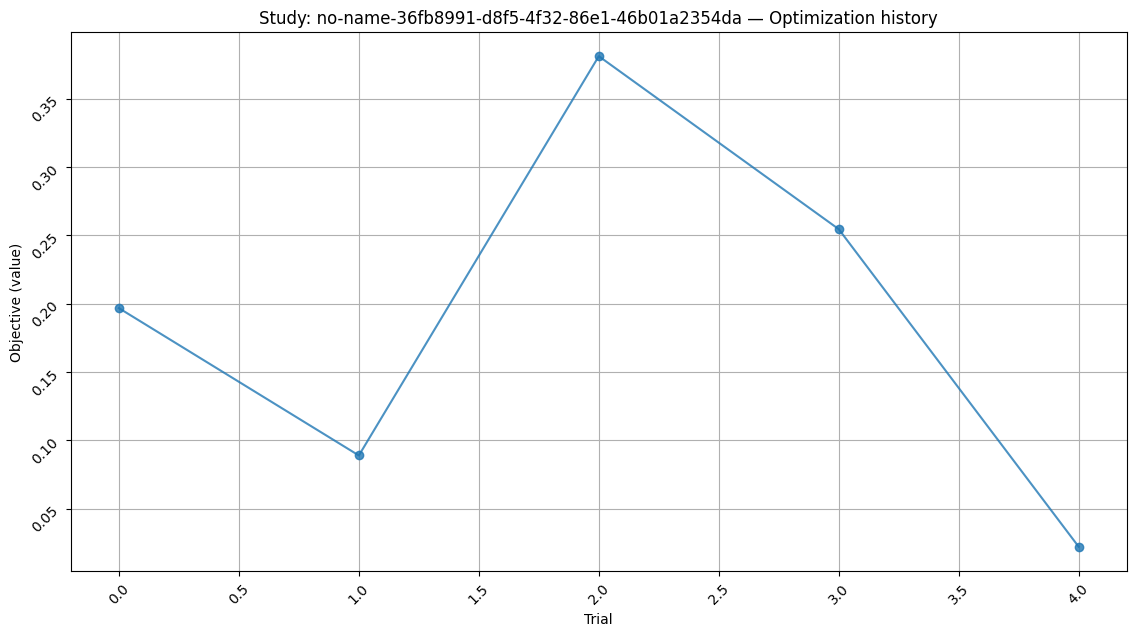

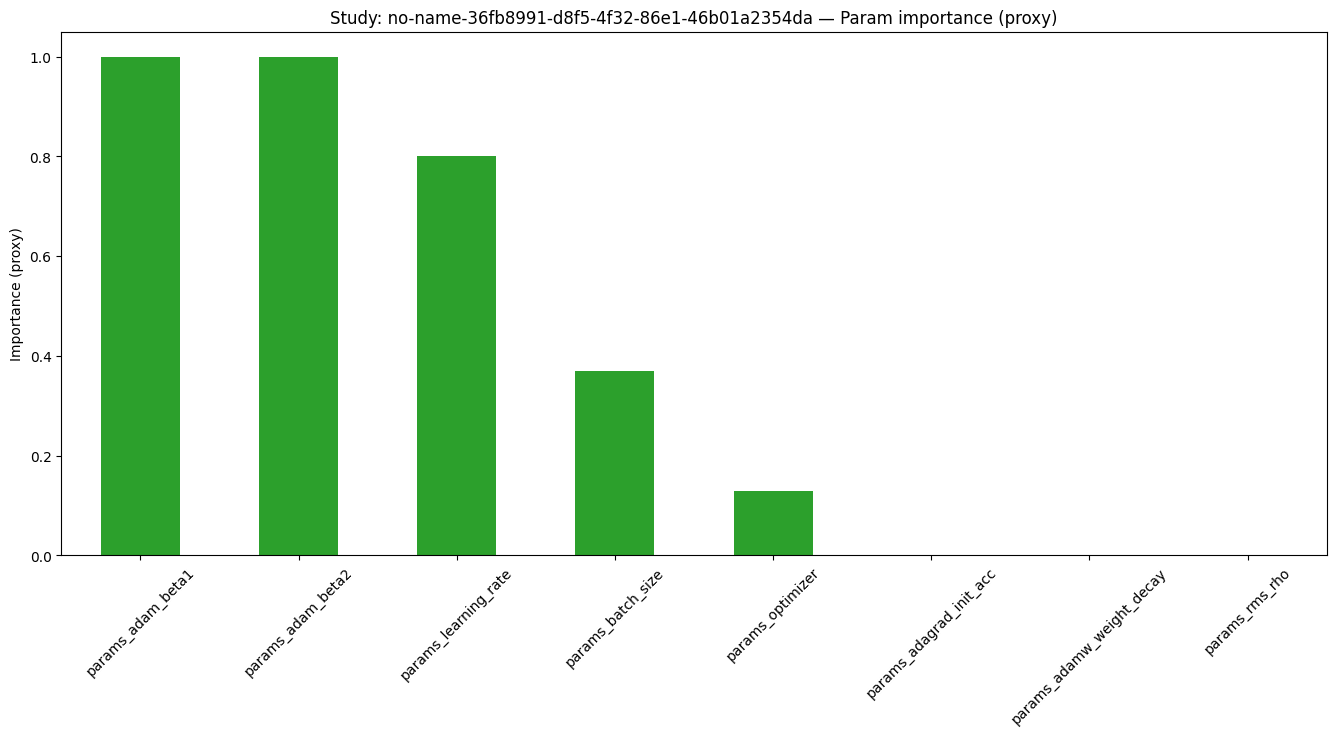

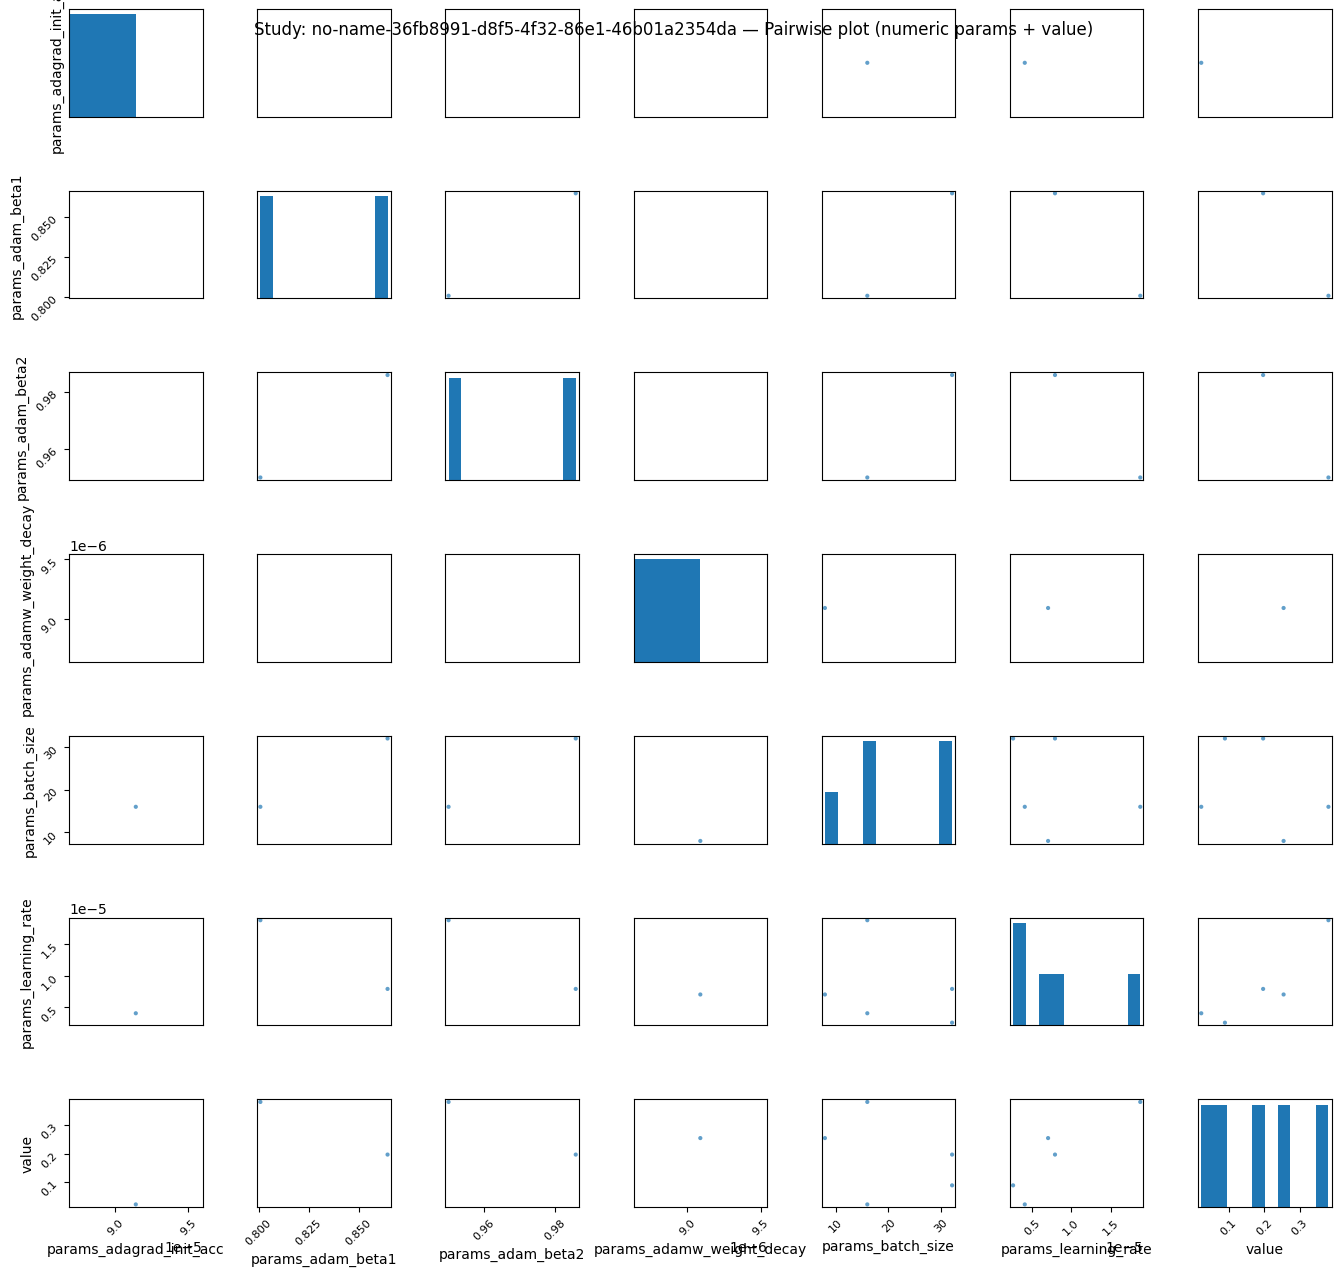


Plotting no-name-c4ce04ba-85f5-4274-aa43-50d75a53d9dd



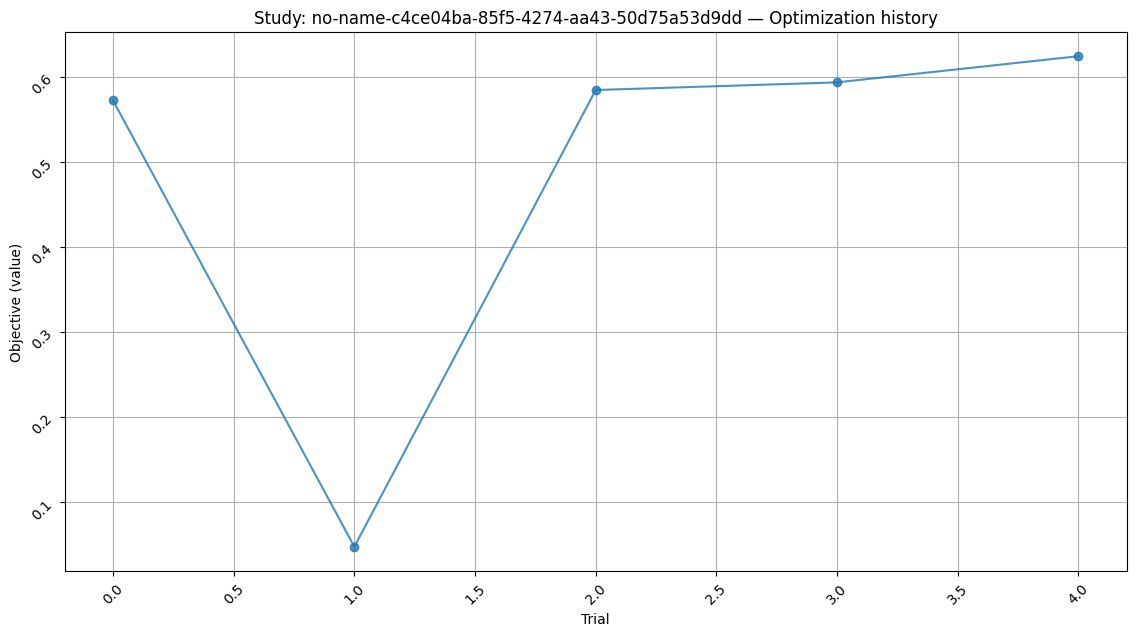

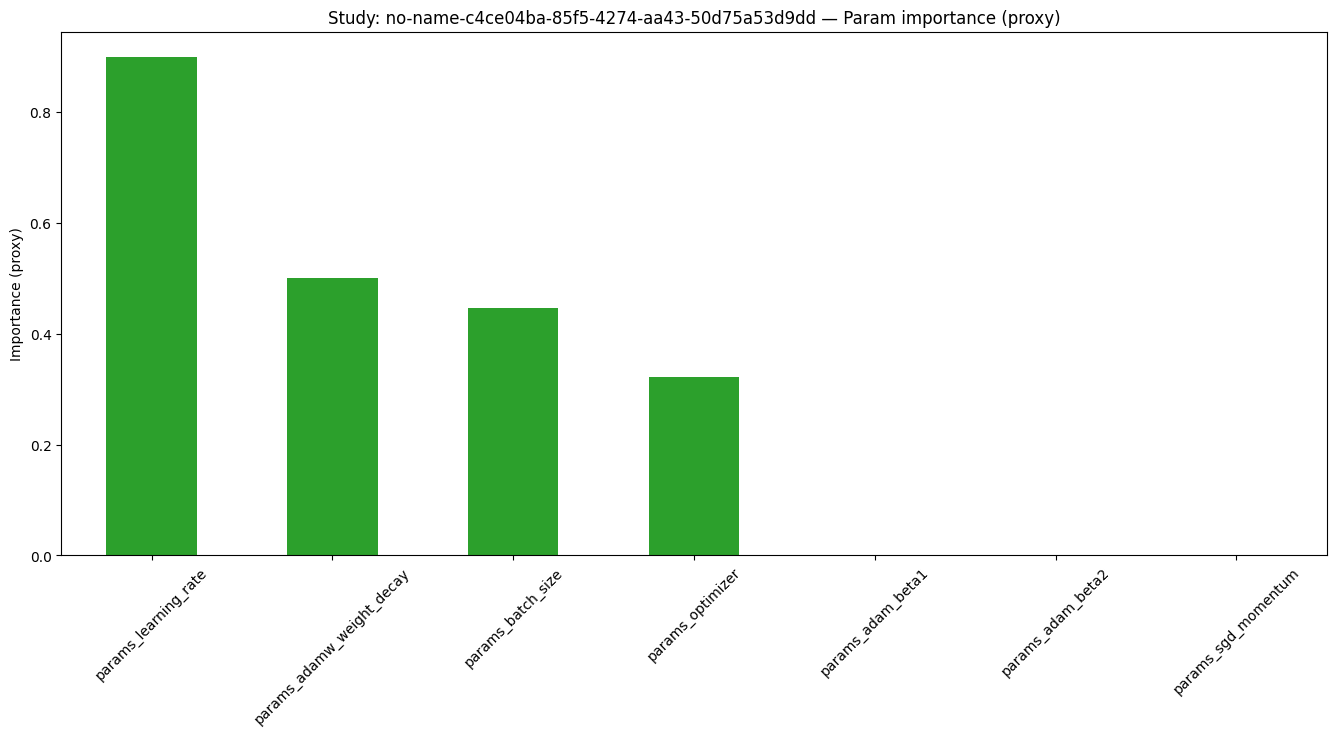

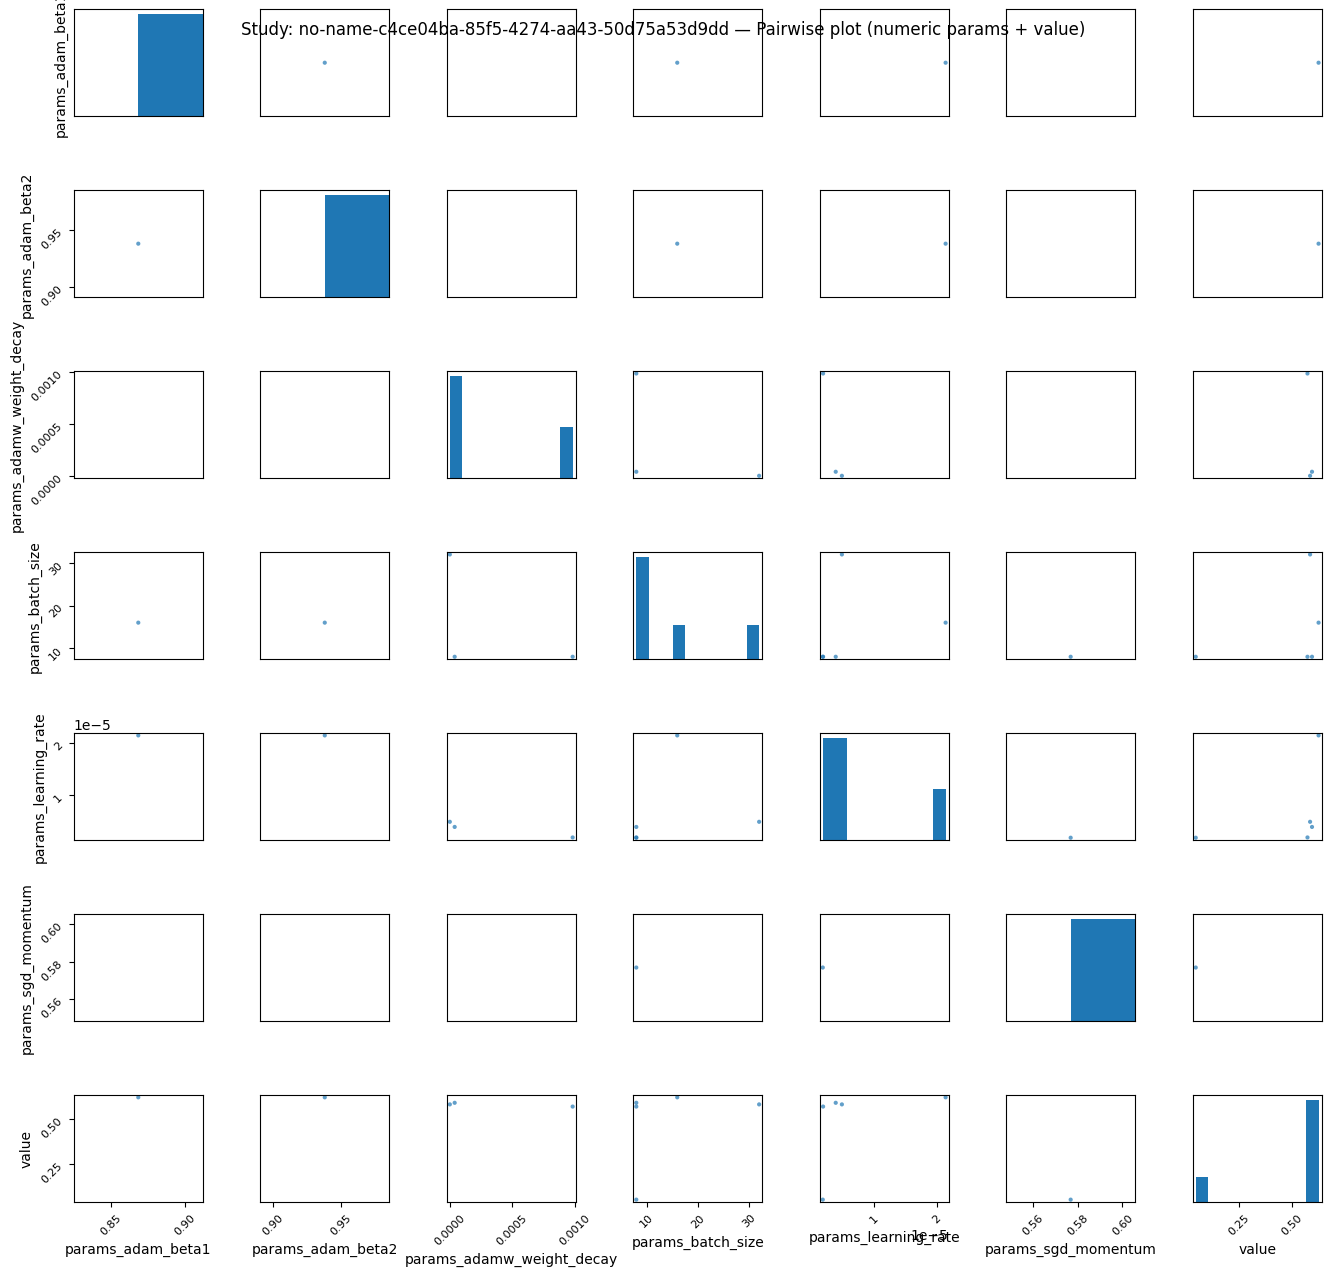


Plotting no-name-42f38ed4-decf-43ac-9b9d-9cbc748c123d



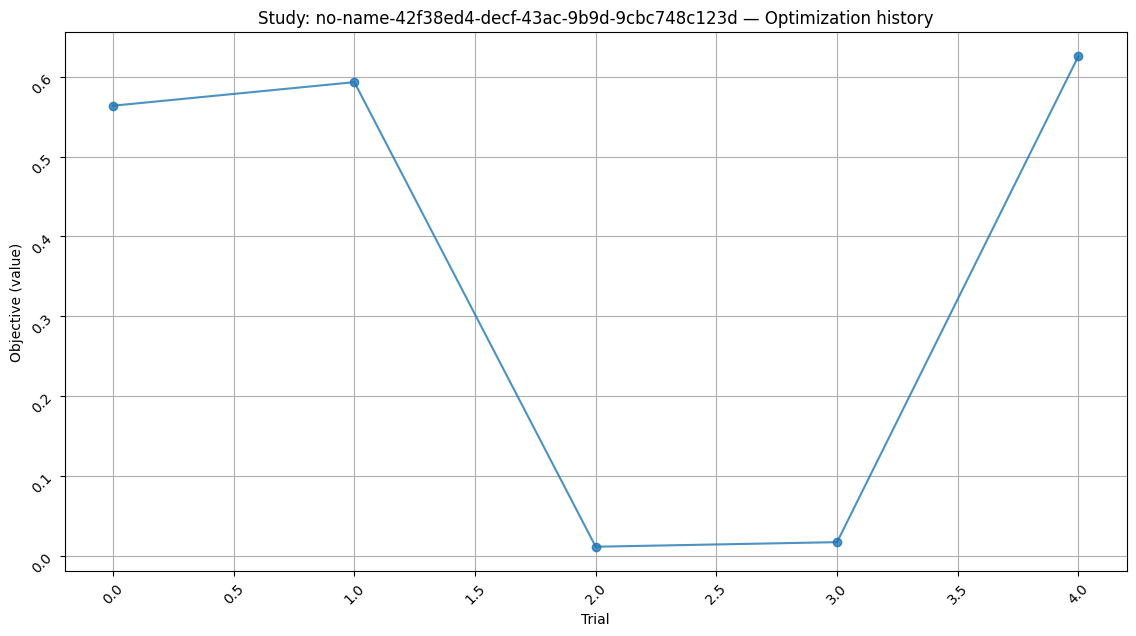

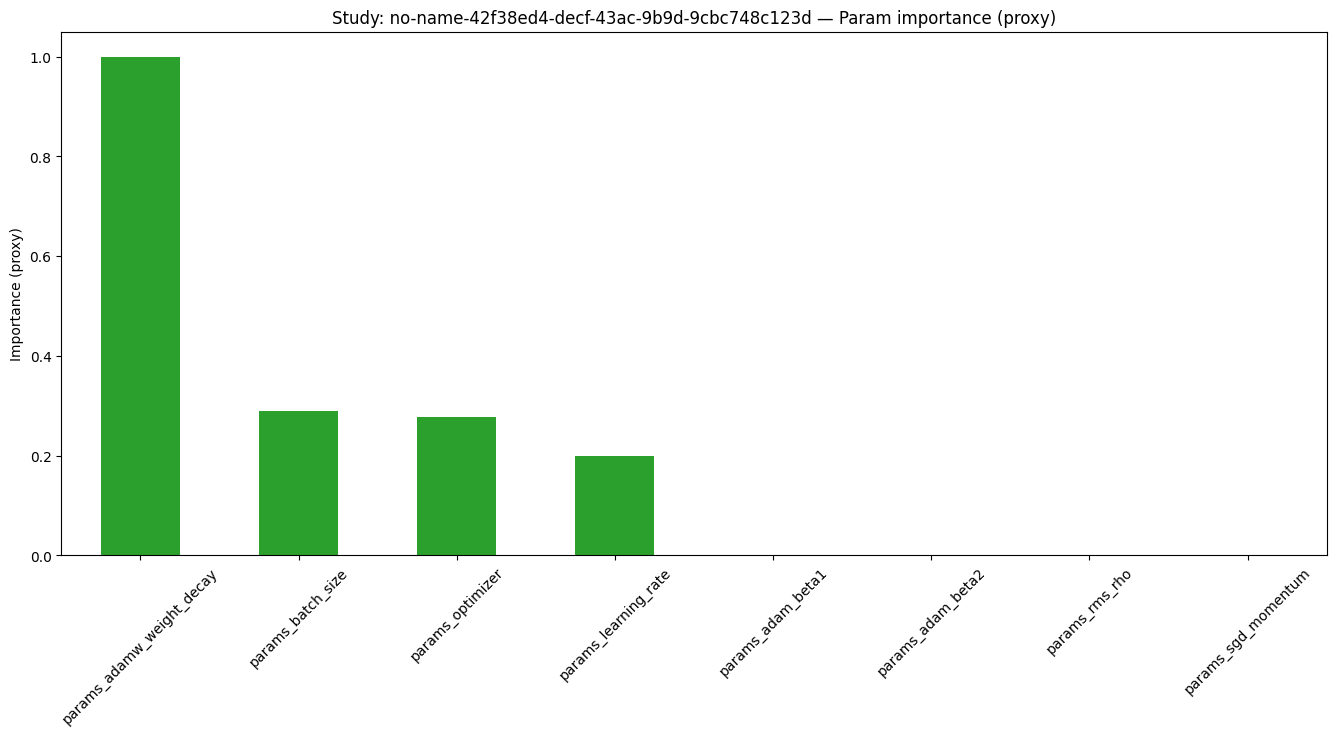

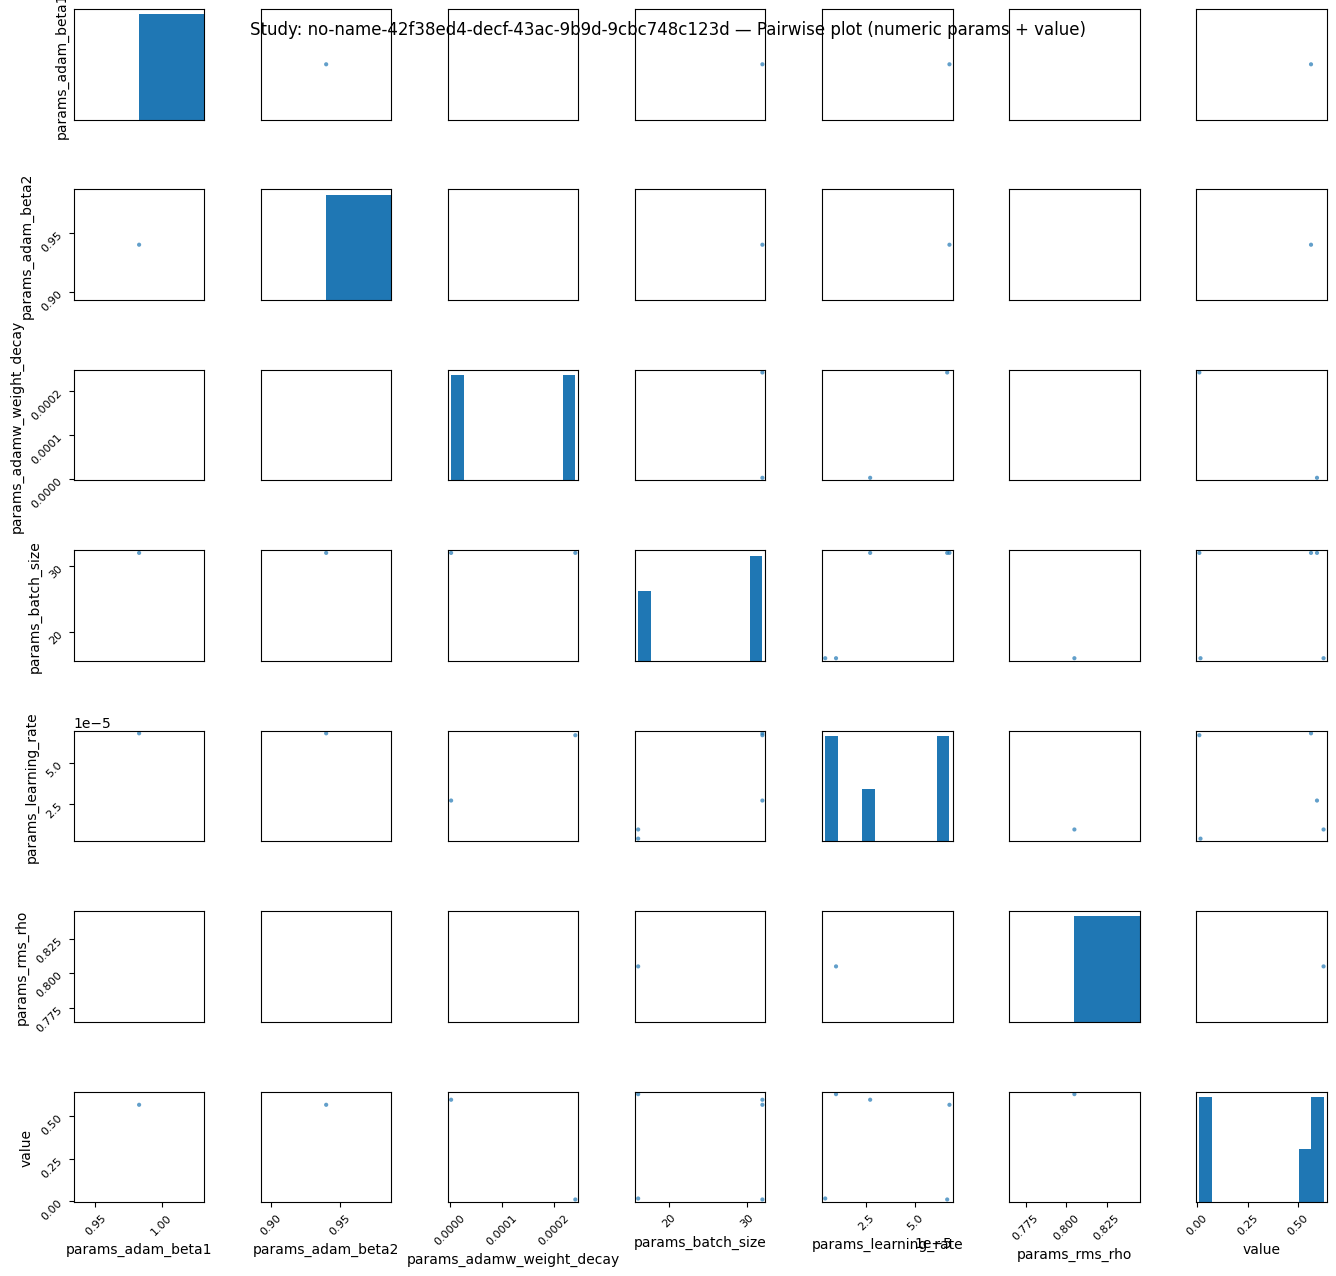


Plotting no-name-f2f75681-0eb7-41ec-89e5-c385759c7a76



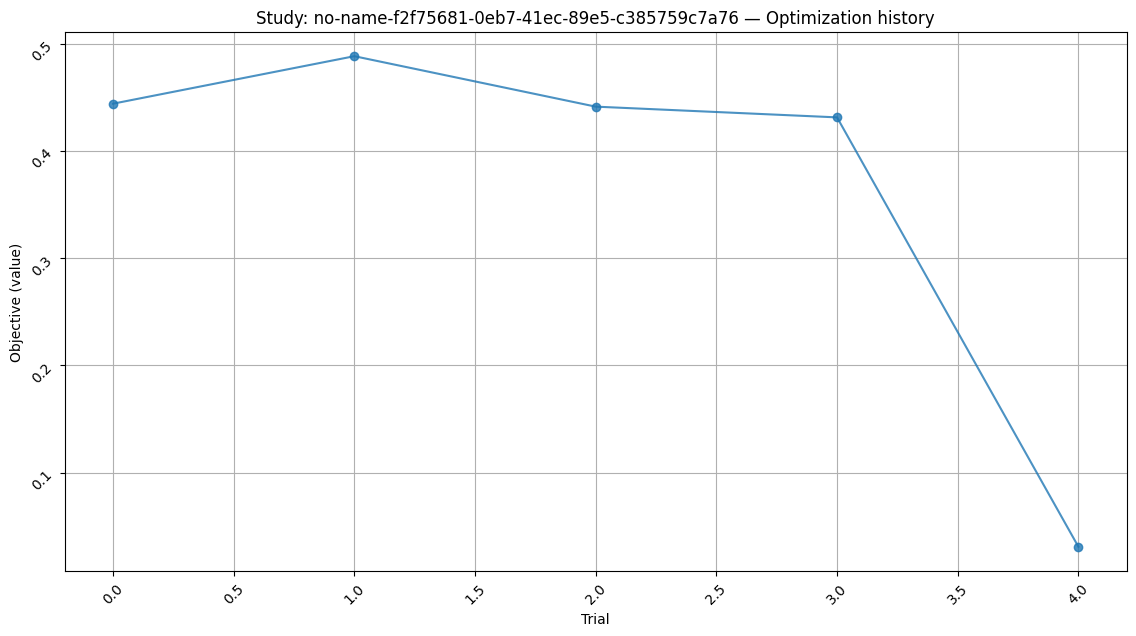

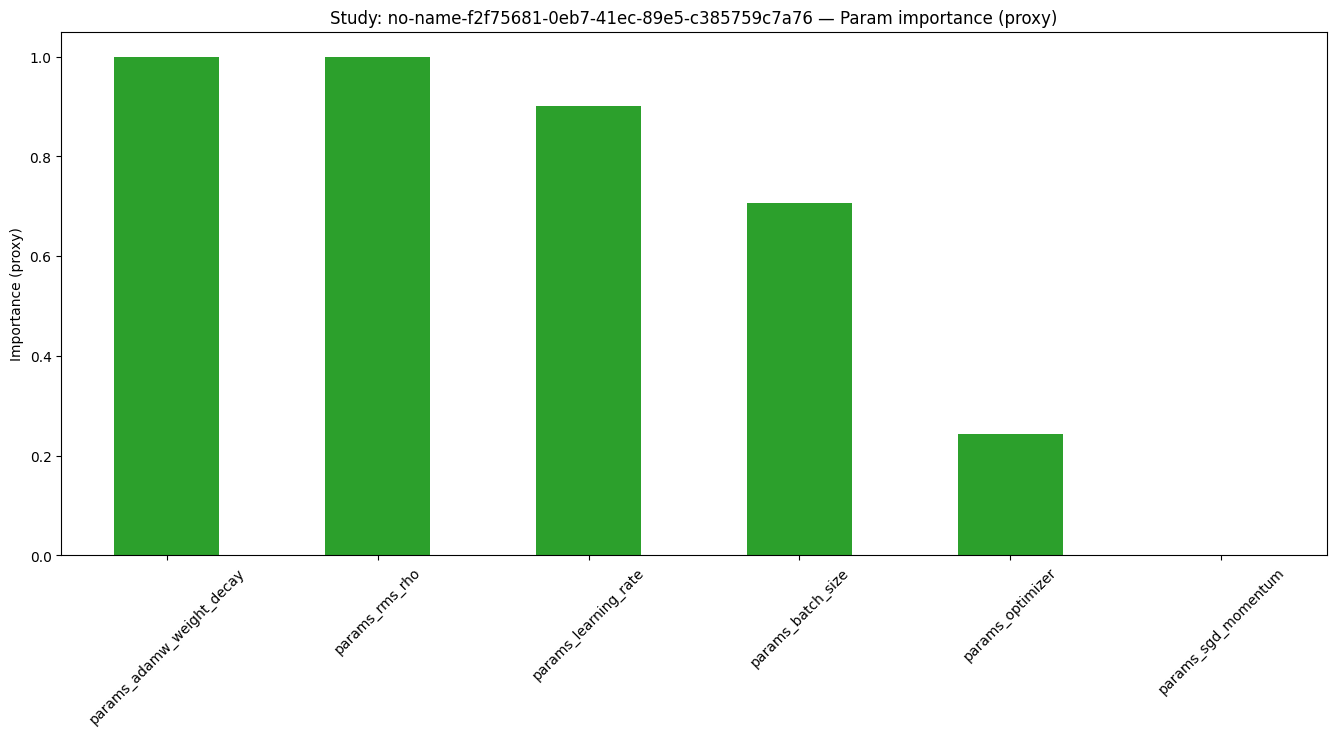

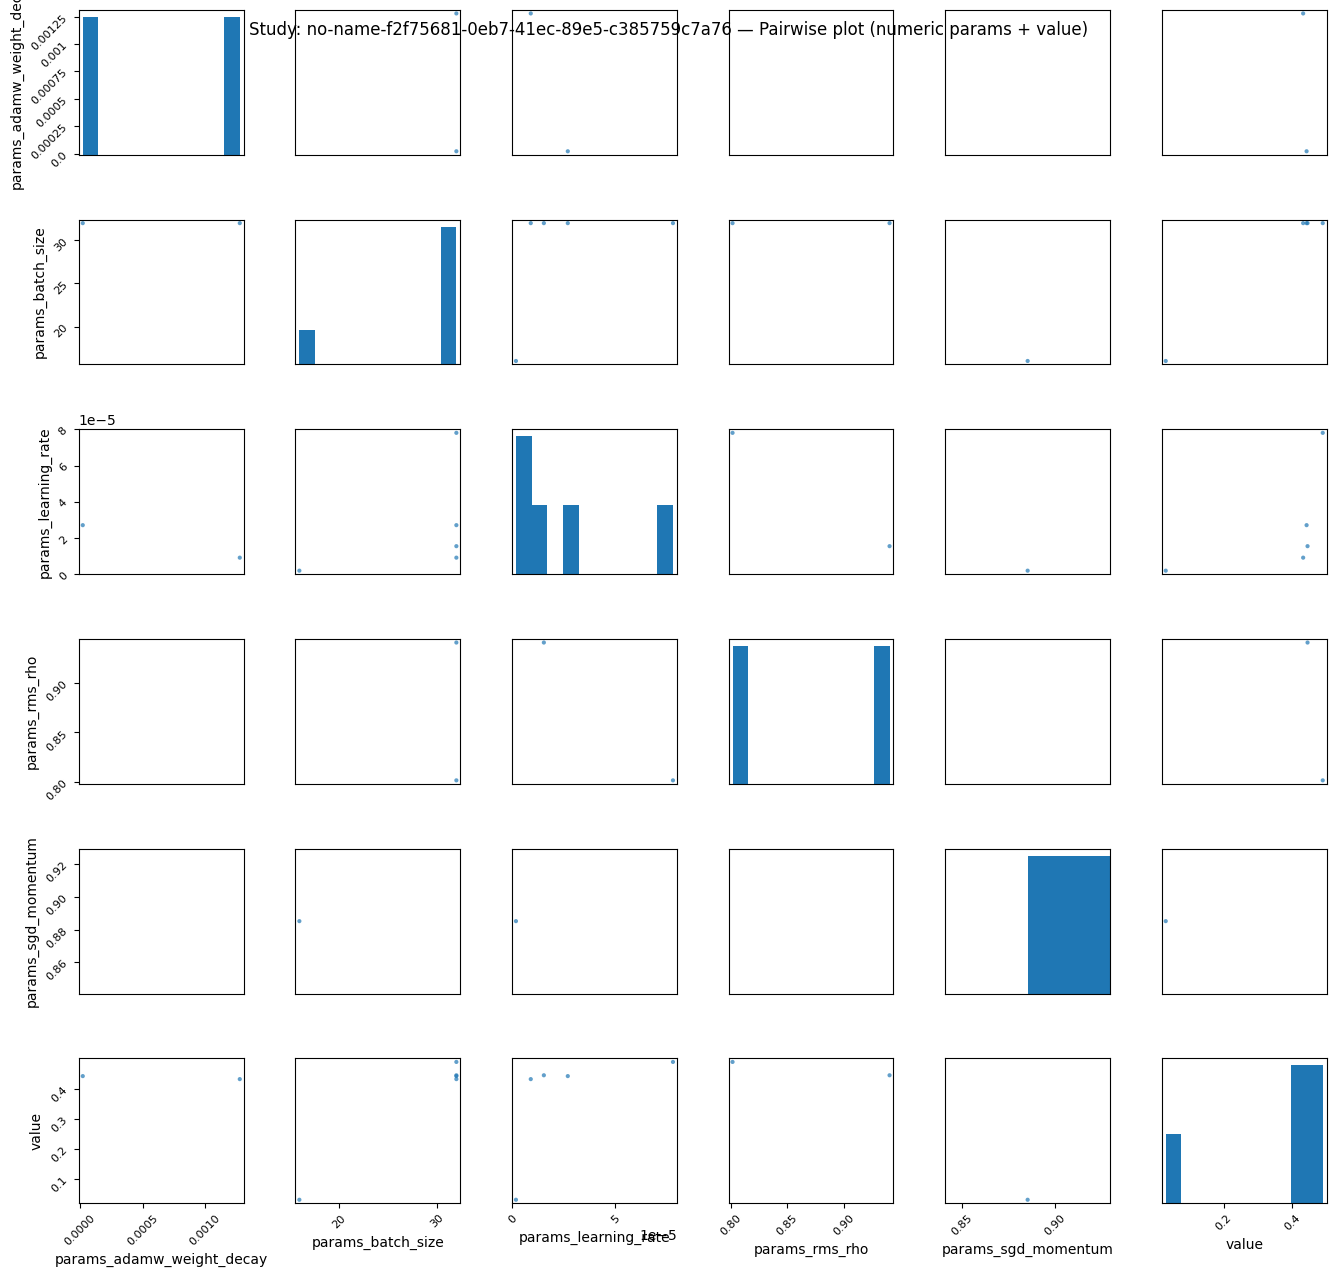


Plotting no-name-00e8f777-3a90-406d-9495-ec3b94ec80c7



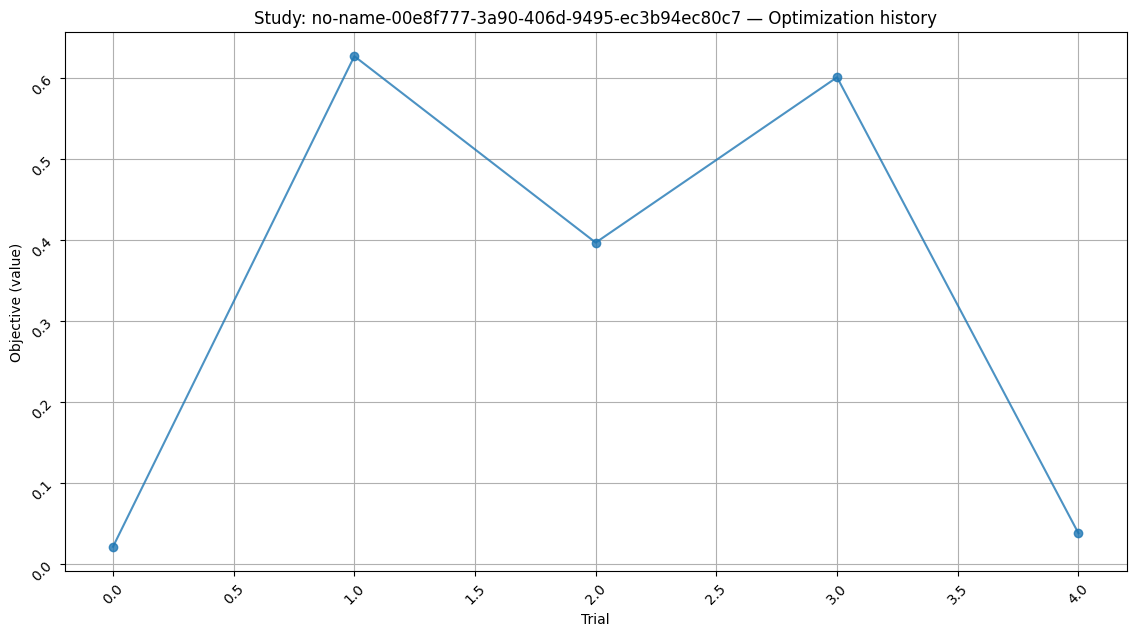

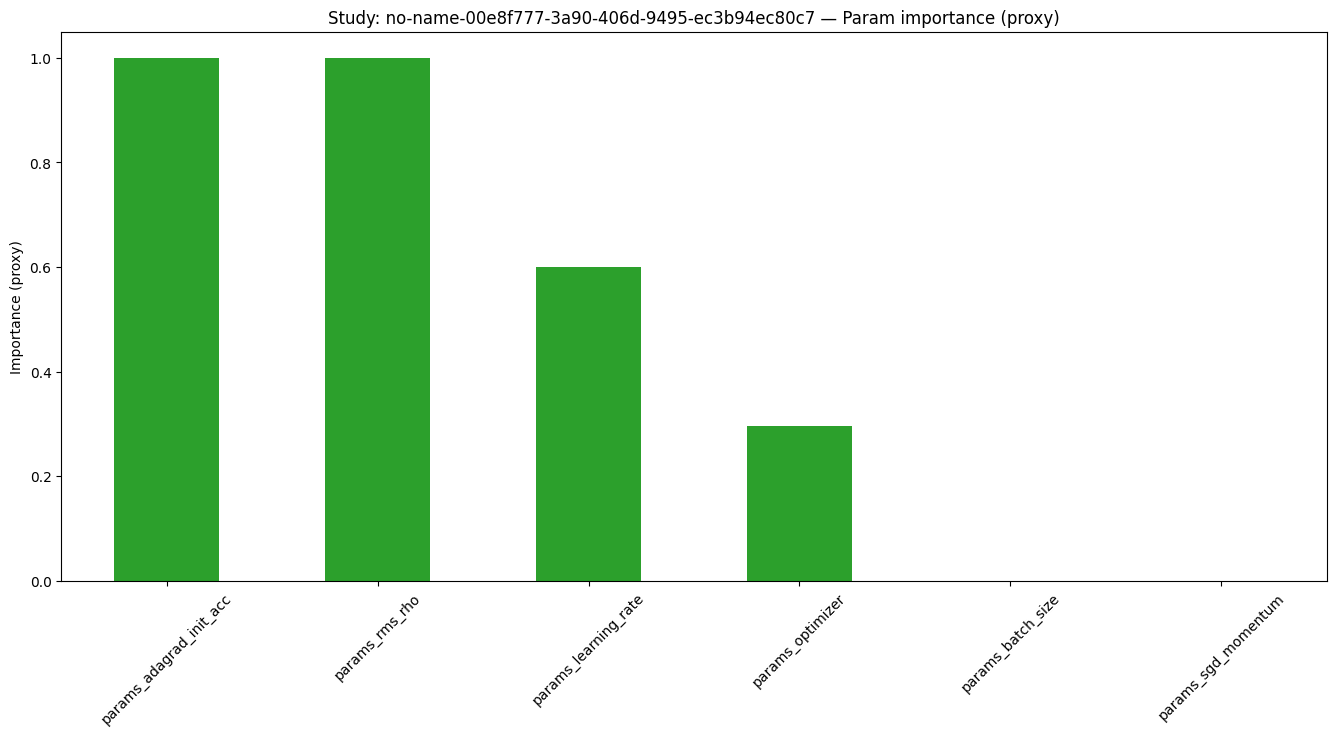

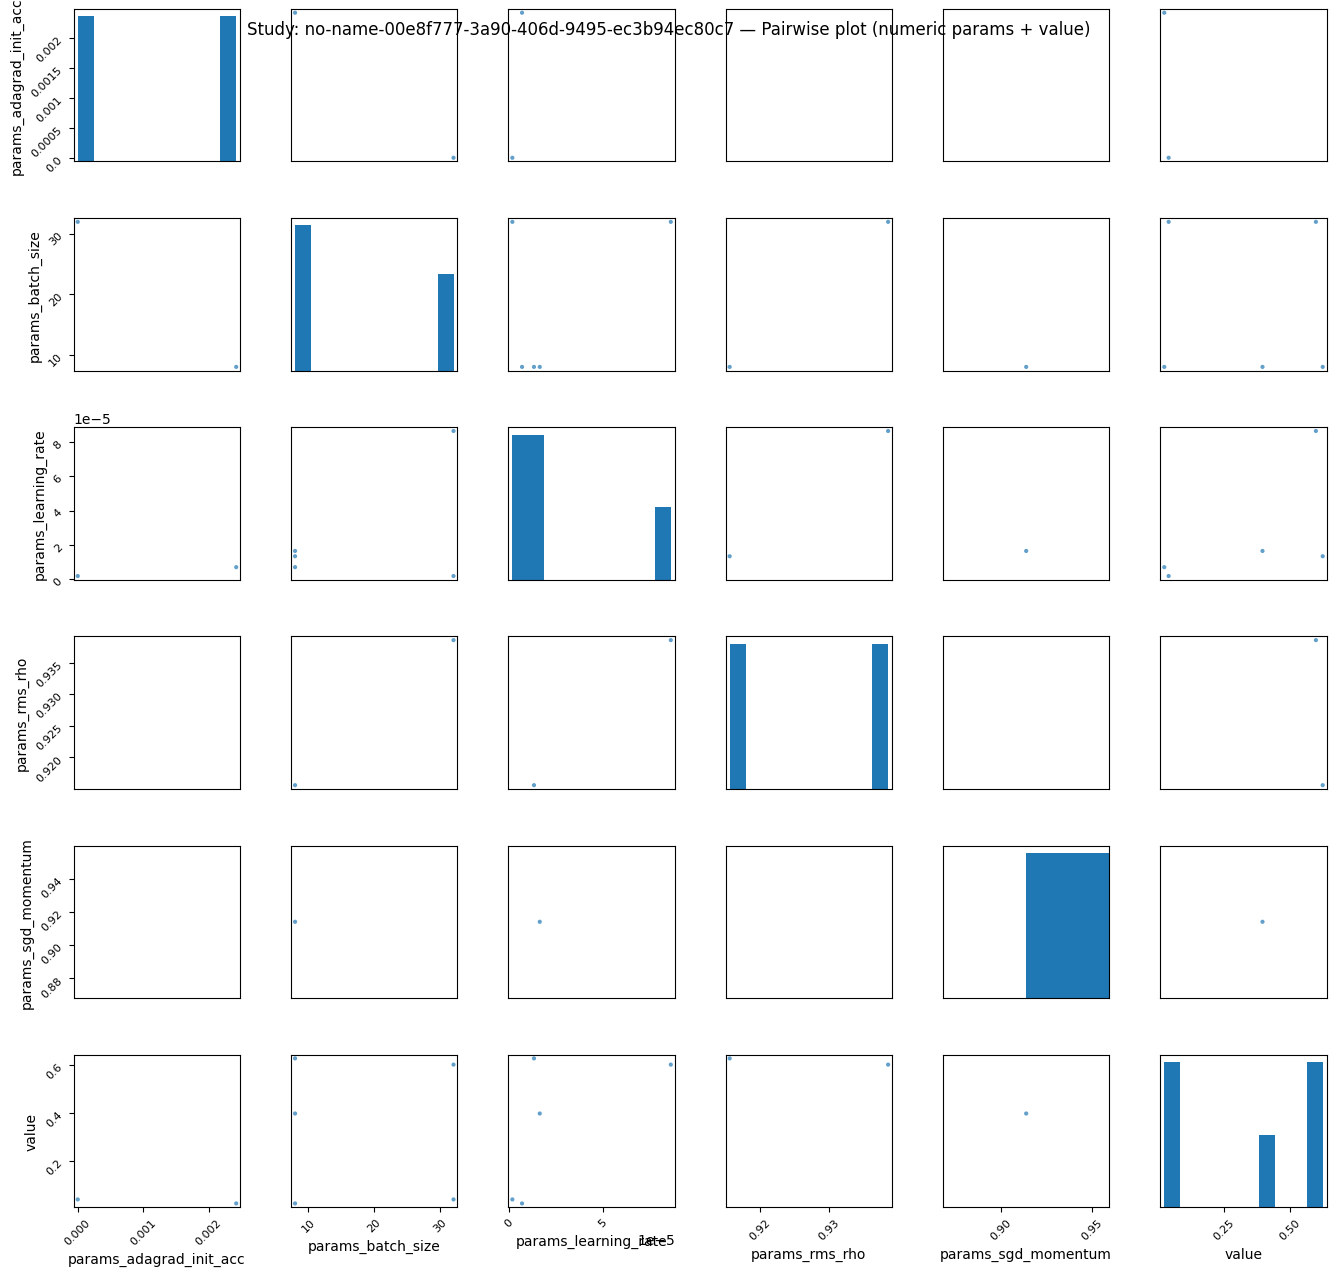


Plotting no-name-5f1c6d14-3d4d-491e-bf9c-07cc962676ad



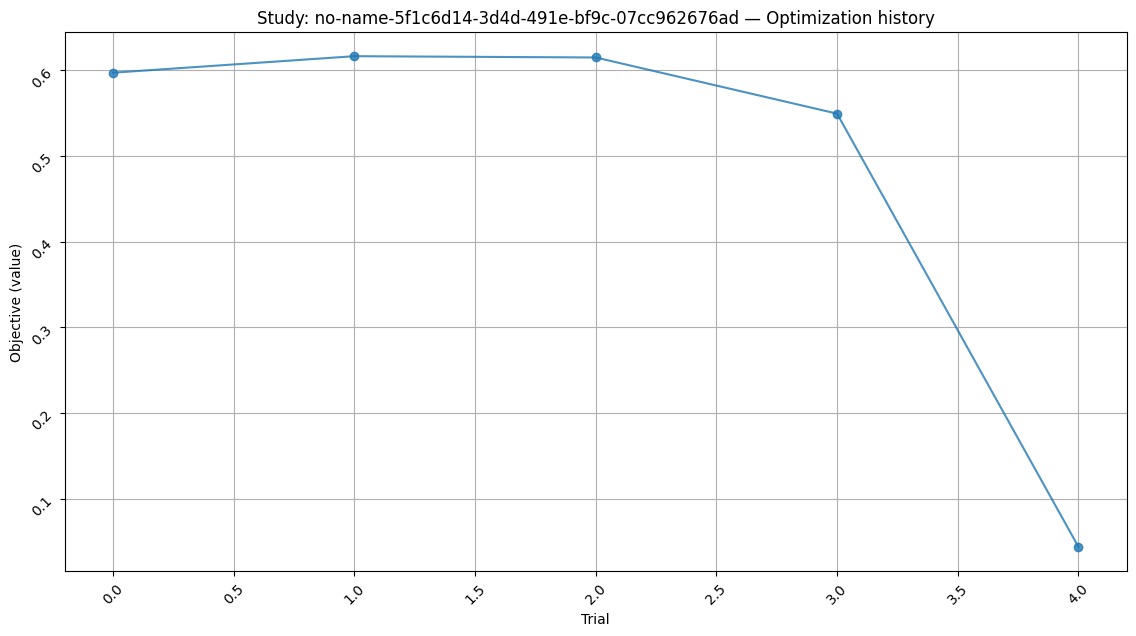

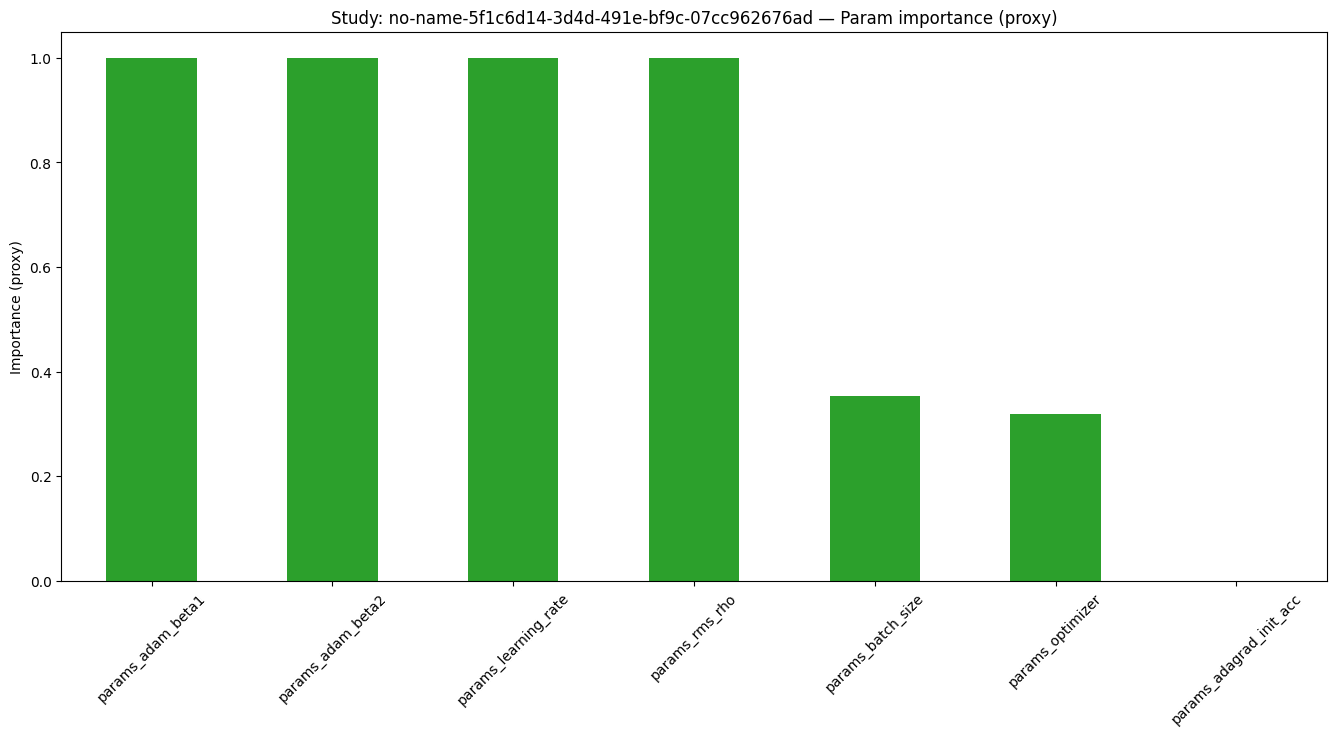

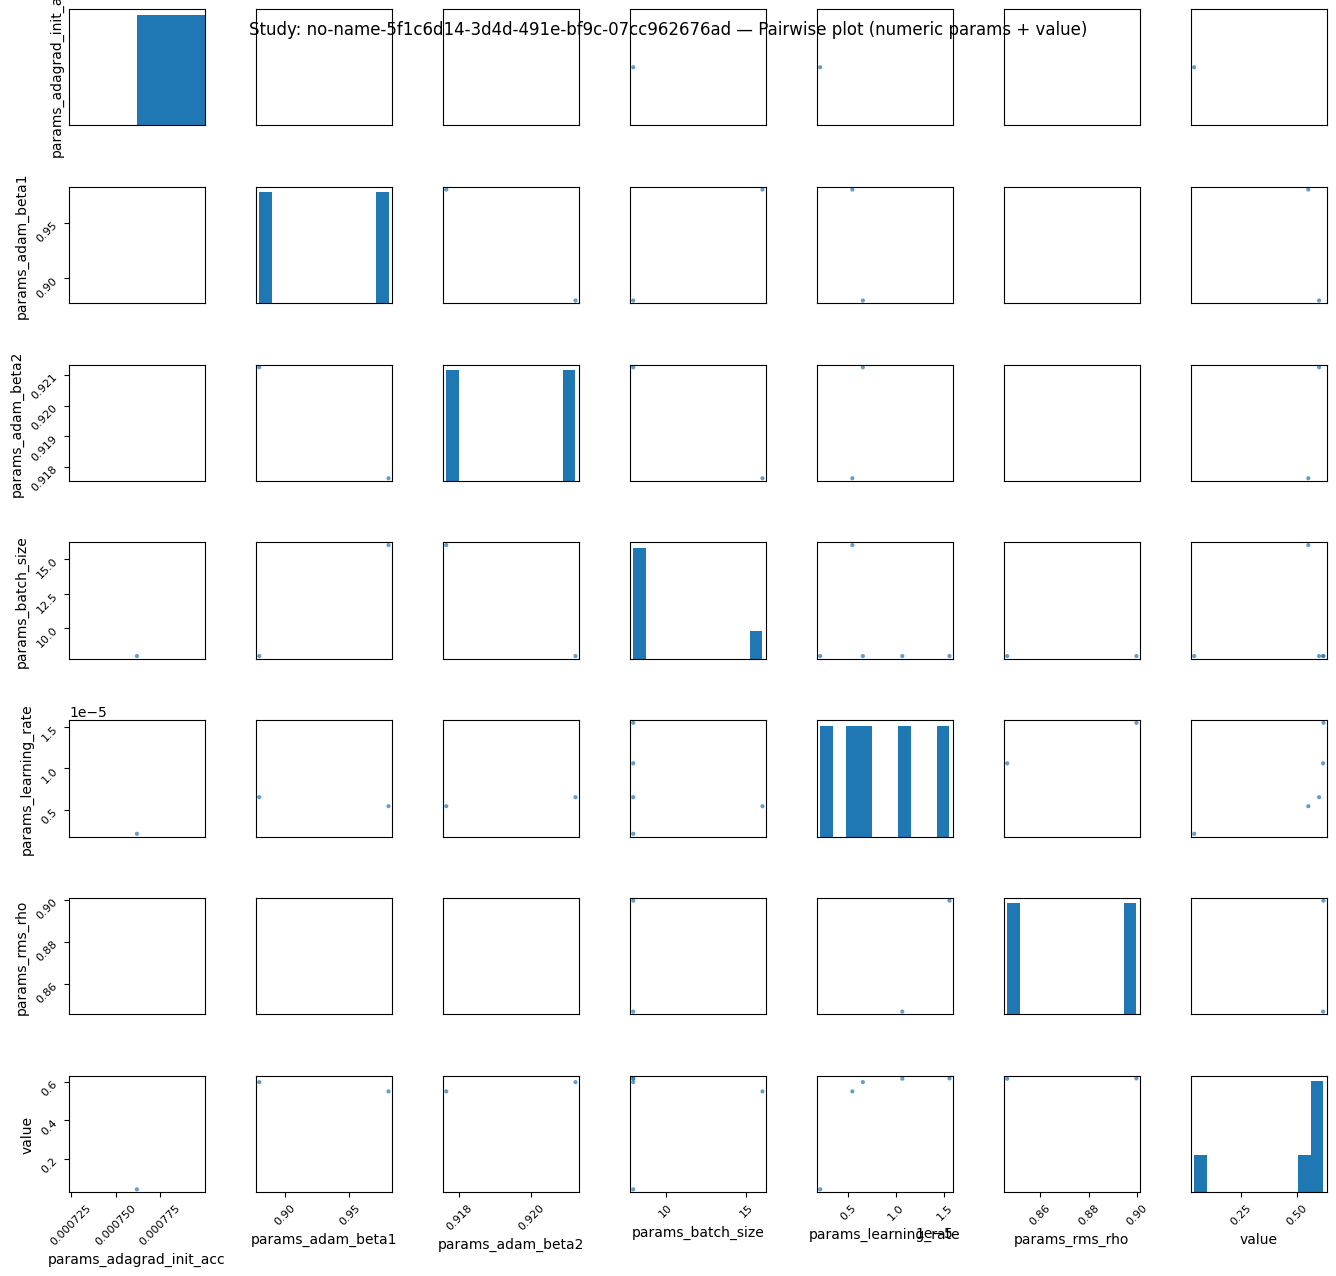


Plotting no-name-3ddb5f4d-ef4f-469d-bc68-a9db34f9e300



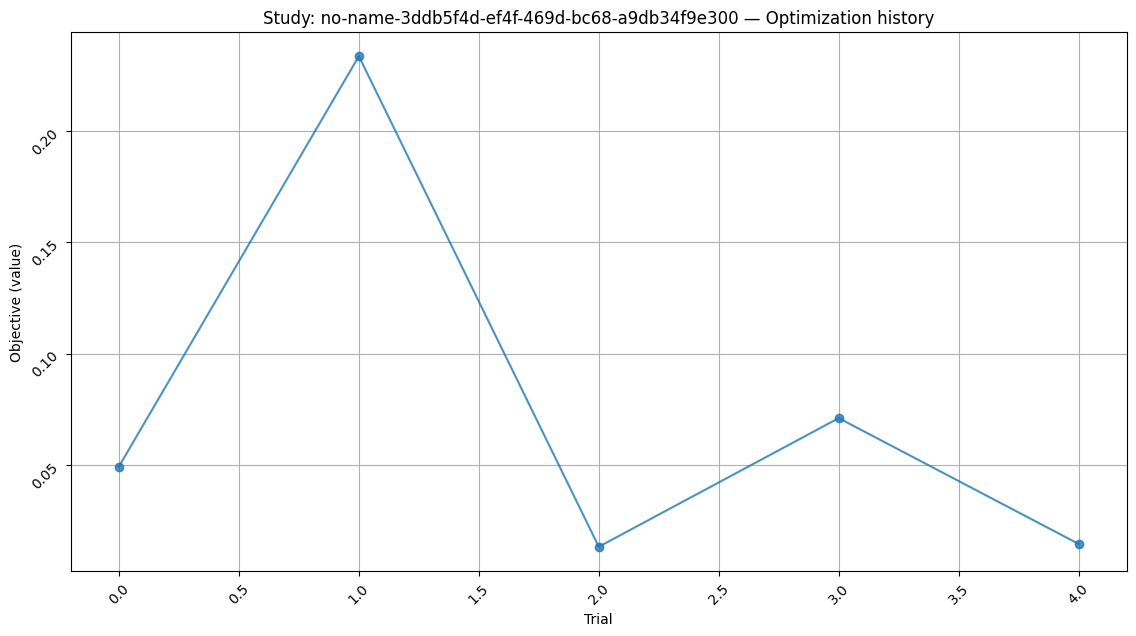

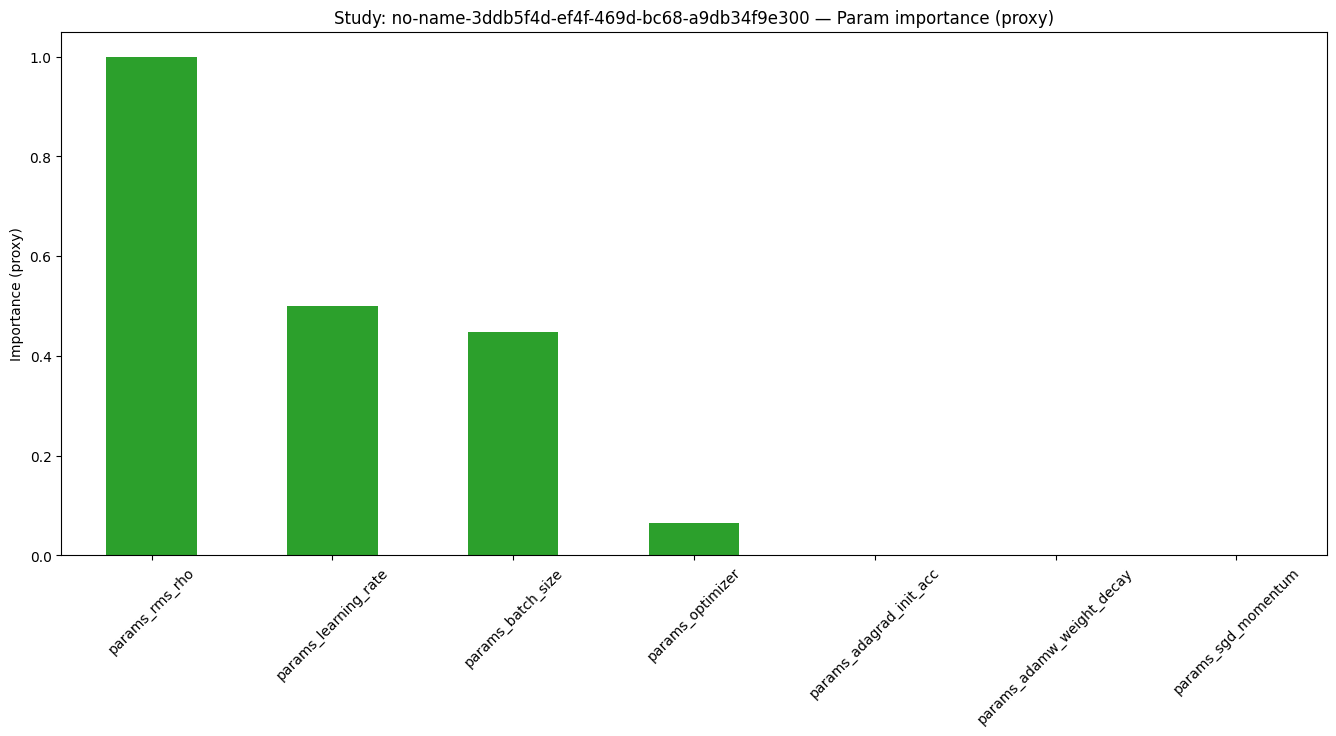

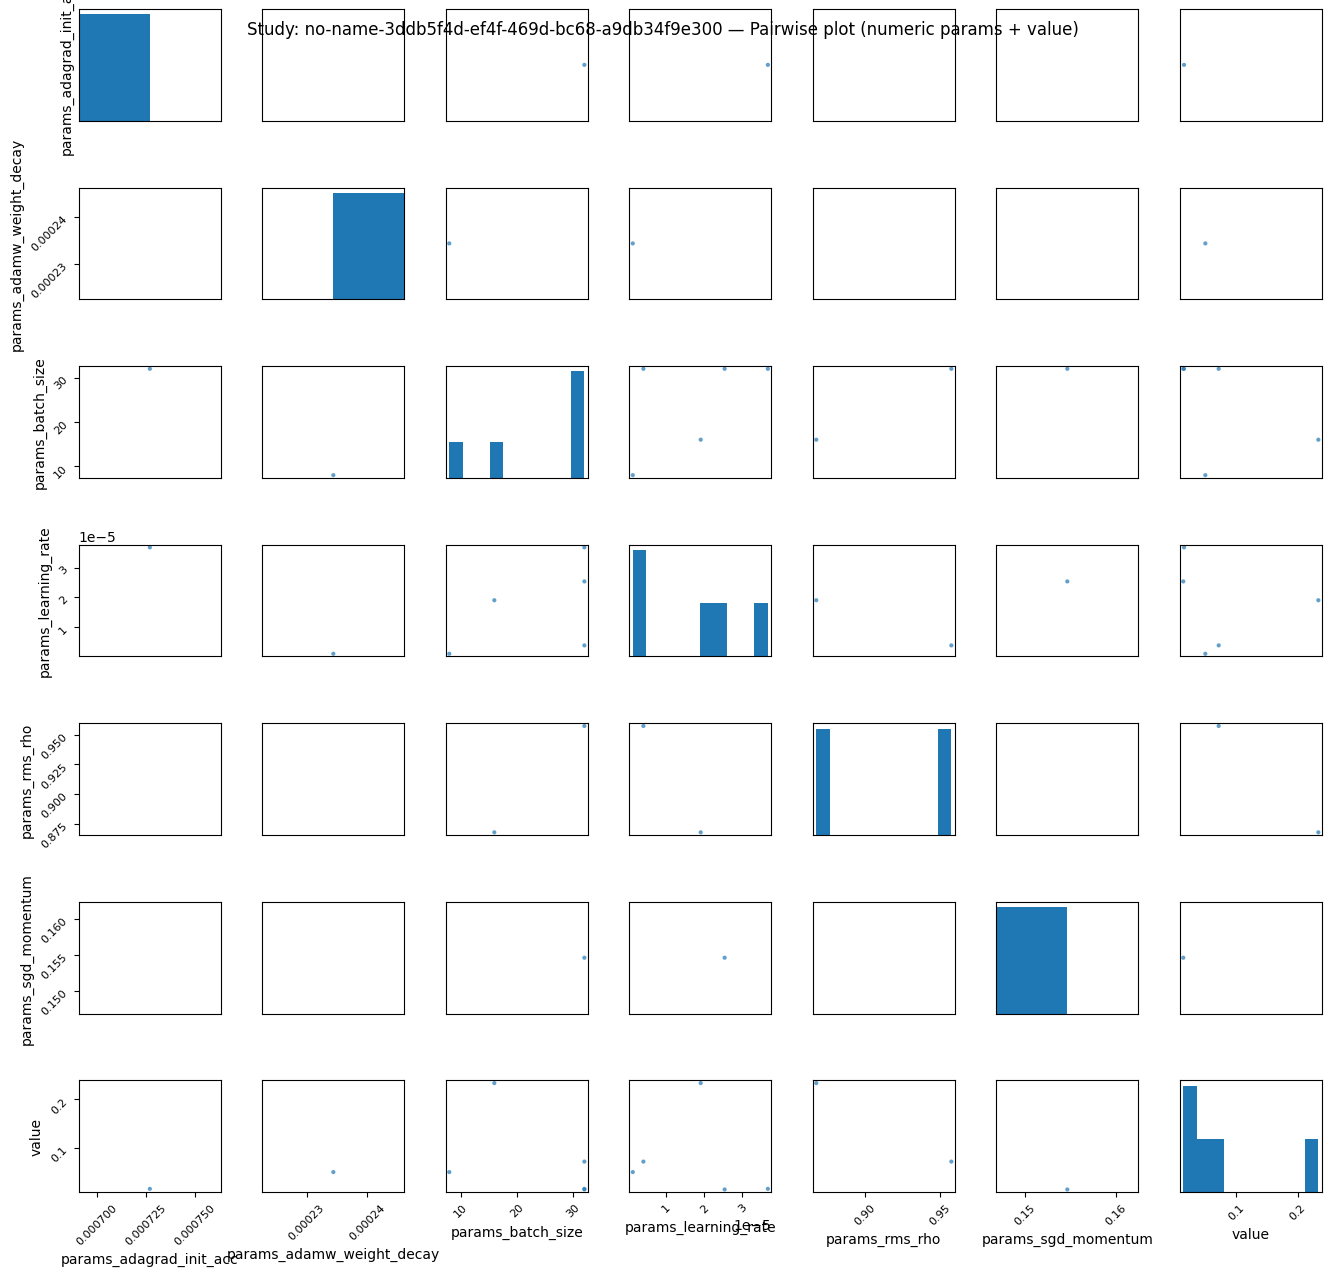


Plotting no-name-528f2142-4ace-483e-b38d-fc489b039741



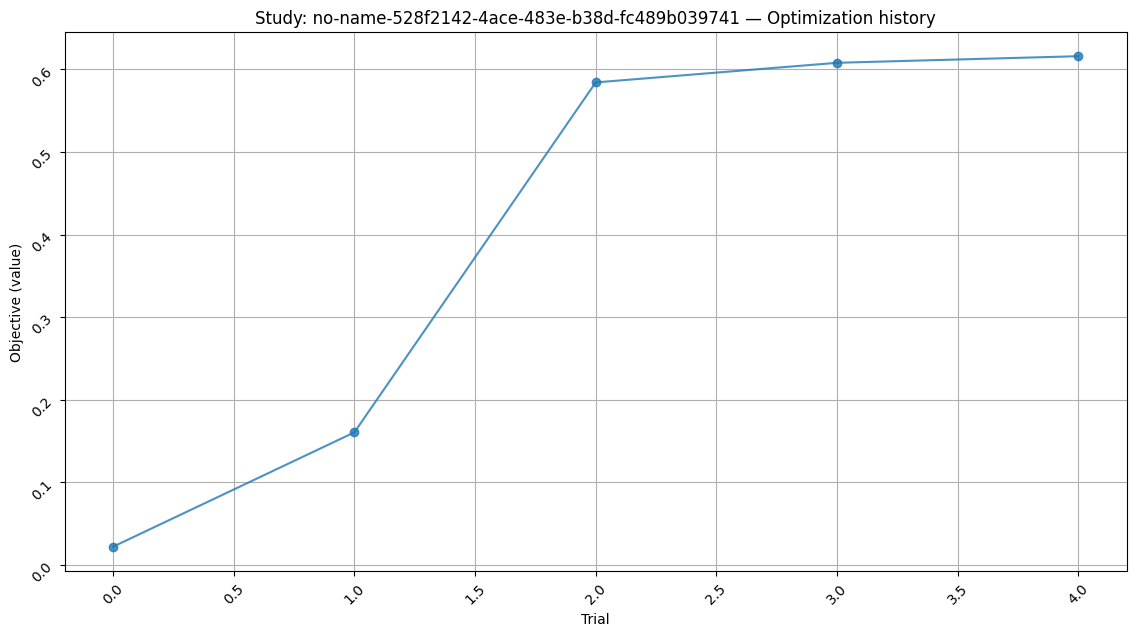

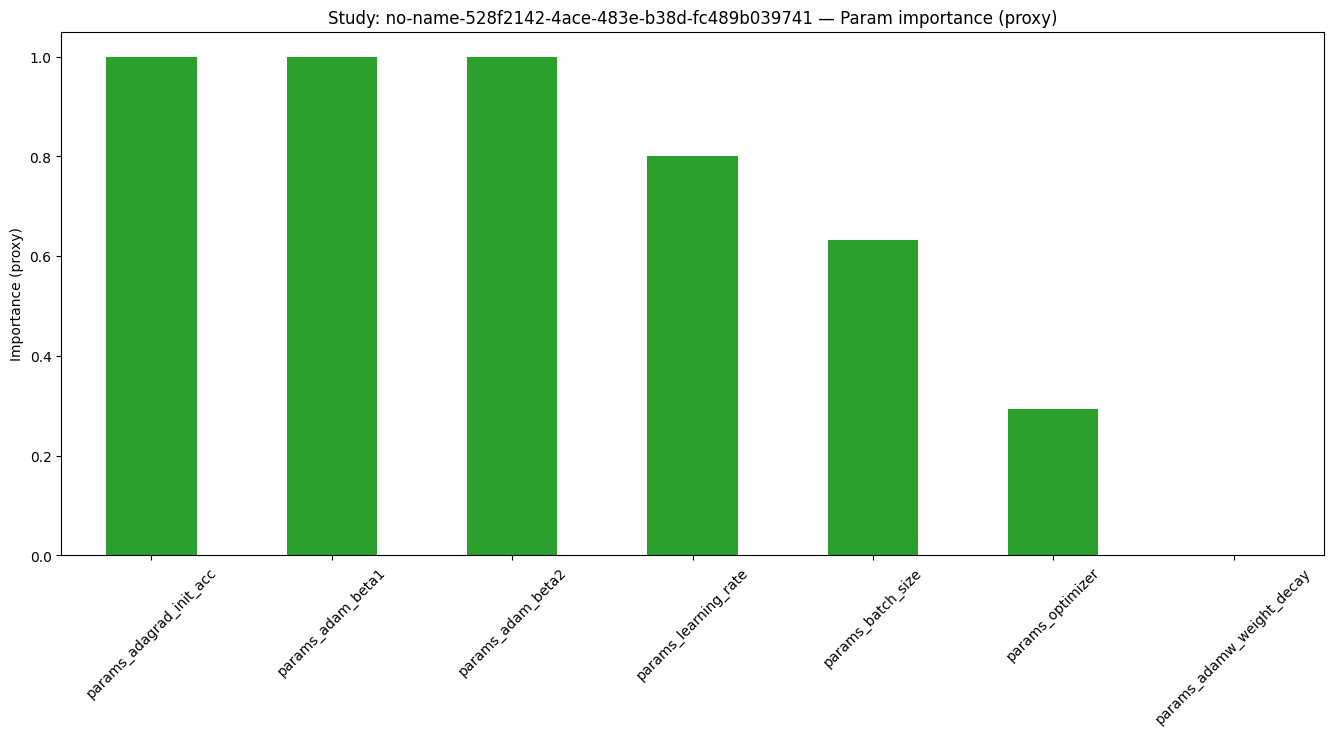

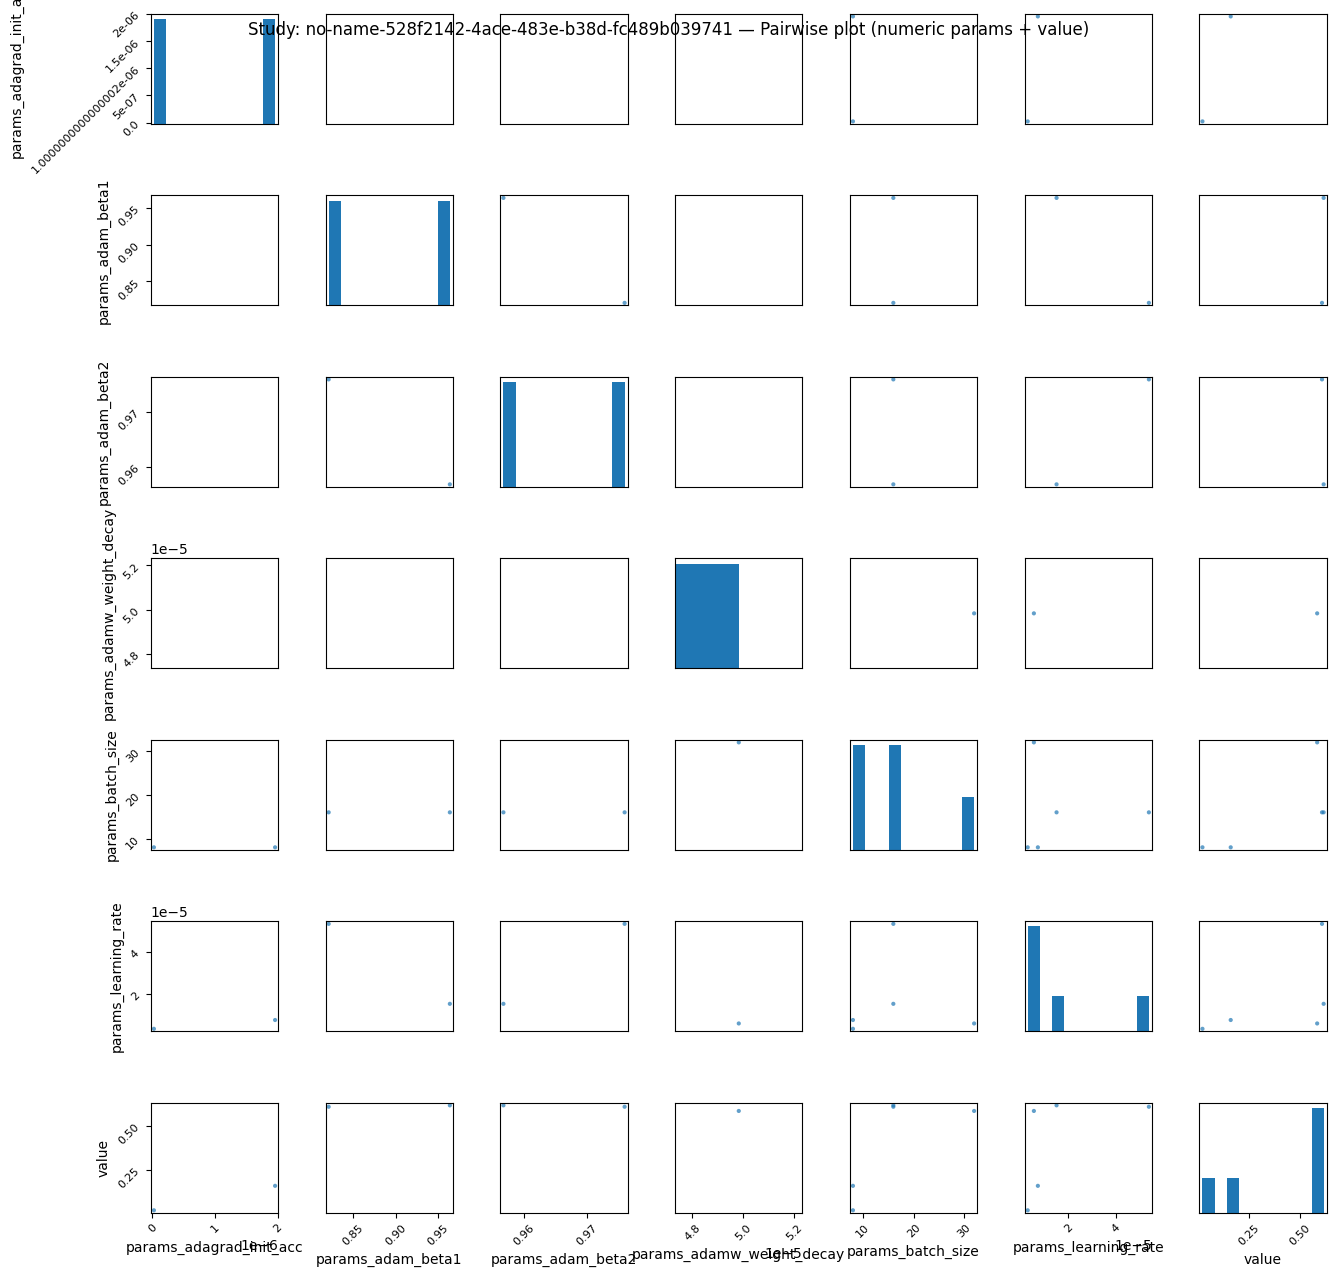


Plotting no-name-9a1b84f5-a8af-4faa-af58-a60d019bfe58



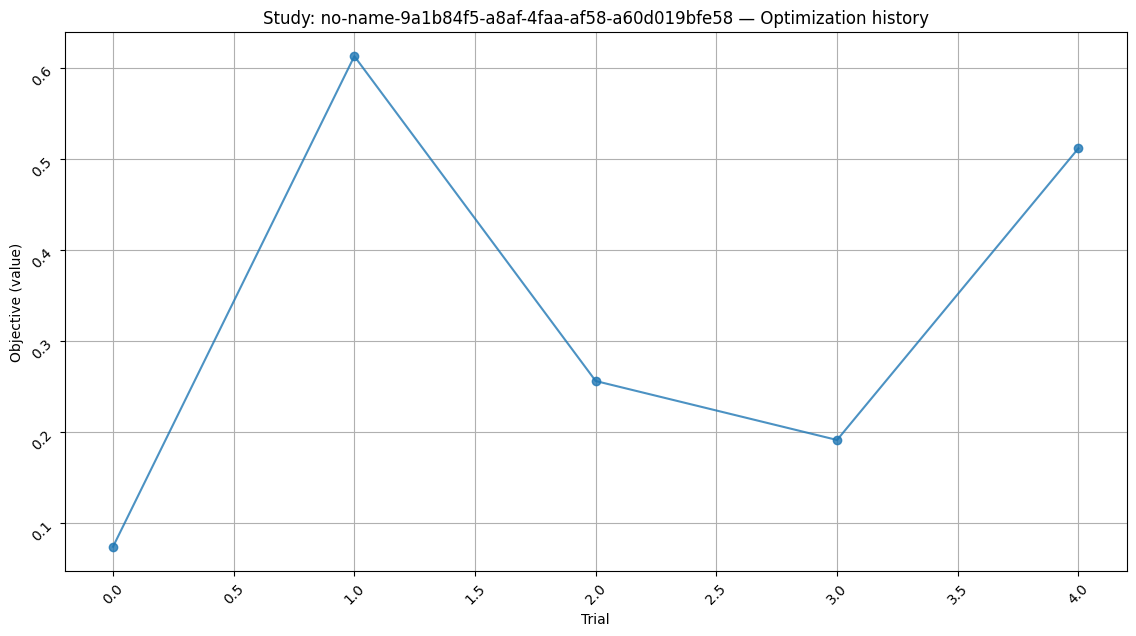

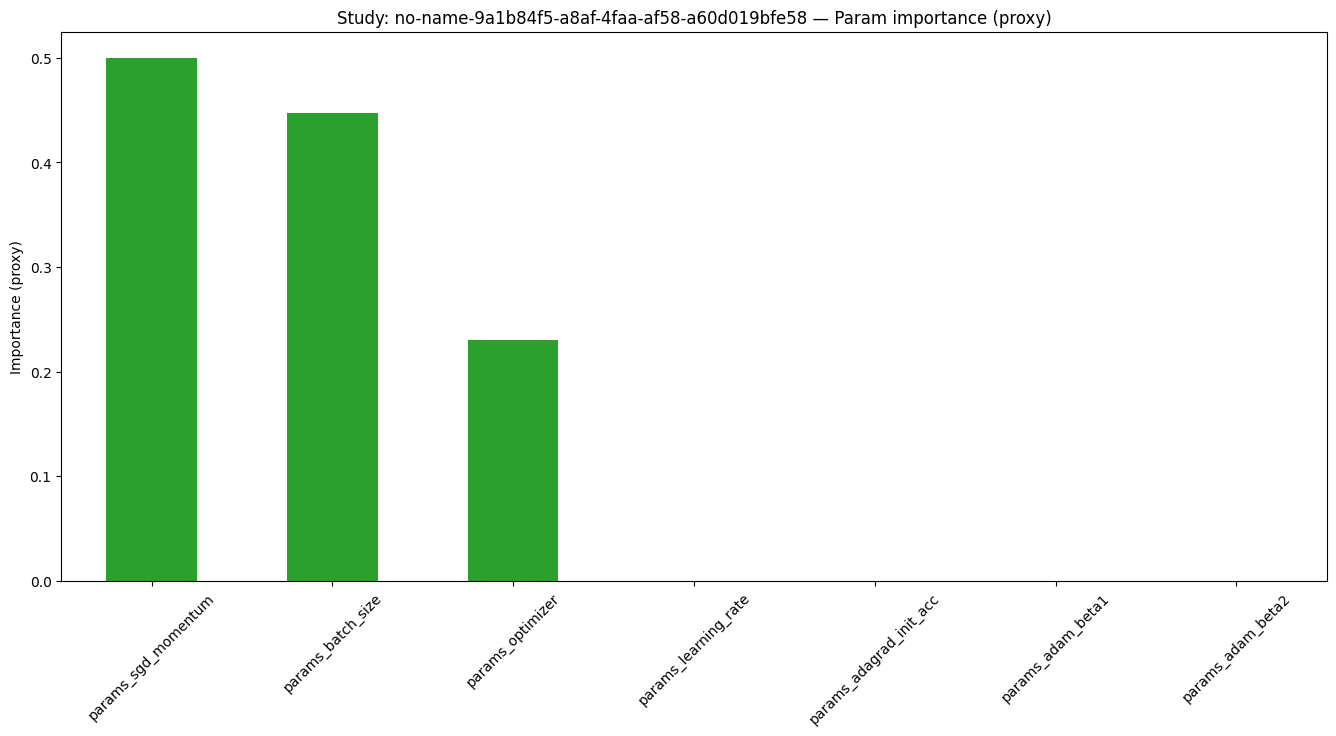

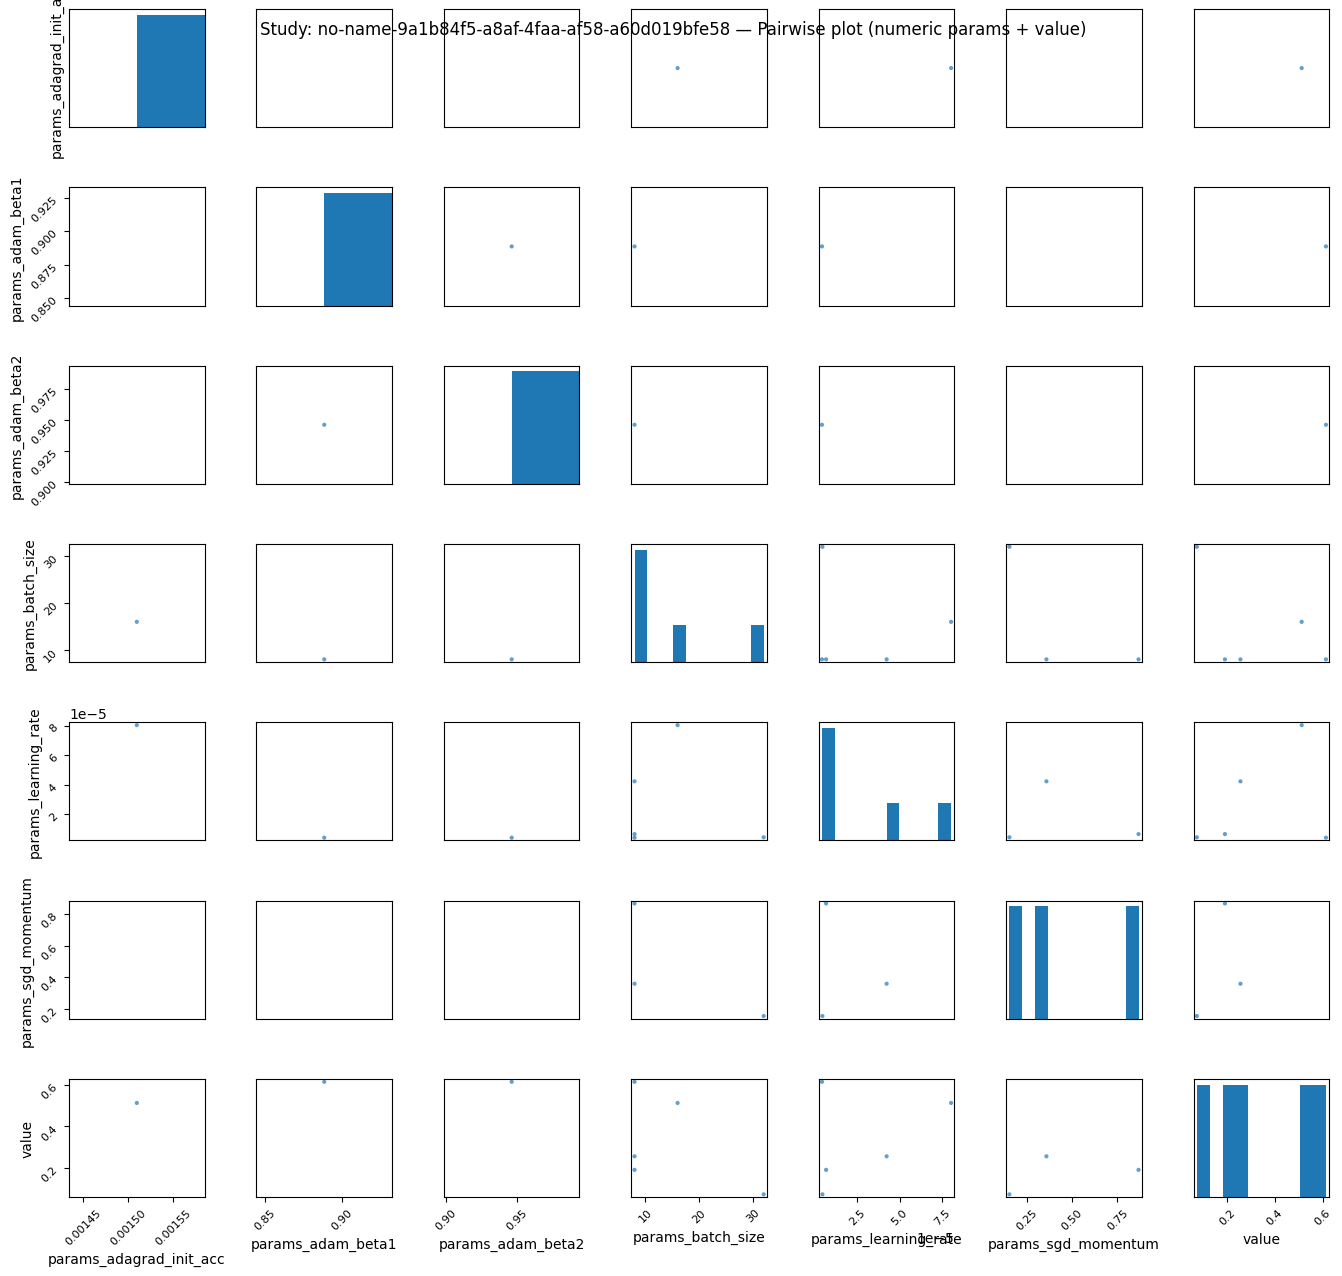

In [ ]:
plot_aggregate_optuna_matplotlib(all_optuna_studies)

[I 2025-12-03 21:28:35,498] A new study created in memory with name: no-name-9fdf1031-12a5-4a71-a00e-ef26af120967



Subset class_weights (first 8 classes):
{0: np.float64(1.846), 1: np.float64(1.58), 2: np.float64(0.936), 3: np.float64(1.398), 4: np.float64(2.1), 5: np.float64(2.085), 6: np.float64(3.331), 7: np.float64(0.445)}


################################################################################
Starting Optuna runs after Merged-Categories which were getting improperly classified
################################################################################
Vocabulary size: 78490
Number of classes: 28
Max Length of text  75
experiment_layers=True  -> N_PARTIAL_VALUES=[2, 3, 6]

--------------------------------------------------------------------------------
OPTUNA RUNNING FOR DATASET SUBSET FRACTION: 0.2
--------------------------------------------------------------------------------

Data - Train: 31987, Val: 3998, Test: 3999


################################################################################
STARTING OPTUNA SEARCH: roberta_base_en | freeze | unfreeze=0 | batch=[8, 1

[I 2025-12-03 21:33:06,704] Trial 0 finished with value: 0.06278139352798462 and parameters: {'learning_rate': 1.72658923594534e-05, 'batch_size': 16, 'optimizer': 'adagrad', 'adagrad_init_acc': 2.1989440234608393e-05}. Best is trial 0 with value: 0.06278139352798462.


Strategy: FREEZE (backbone frozen).


[I 2025-12-03 21:37:25,881] Trial 1 finished with value: 0.35792896151542664 and parameters: {'learning_rate': 1.0552475204380333e-05, 'batch_size': 16, 'optimizer': 'adamw', 'adamw_weight_decay': 5.853873308073441e-05}. Best is trial 1 with value: 0.35792896151542664.


Strategy: FREEZE (backbone frozen).


[I 2025-12-03 21:41:49,808] Trial 2 finished with value: 0.16258129477500916 and parameters: {'learning_rate': 6.405267465333353e-05, 'batch_size': 16, 'optimizer': 'sgd', 'sgd_momentum': 0.2947785603965348}. Best is trial 1 with value: 0.35792896151542664.


Strategy: FREEZE (backbone frozen).


[I 2025-12-03 21:45:59,591] Trial 3 finished with value: 0.4222111105918884 and parameters: {'learning_rate': 3.394889275077614e-05, 'batch_size': 32, 'optimizer': 'adamw', 'adamw_weight_decay': 2.0663512487829004e-05}. Best is trial 3 with value: 0.4222111105918884.


Strategy: FREEZE (backbone frozen).


[I 2025-12-03 21:50:19,296] Trial 4 finished with value: 0.156078040599823 and parameters: {'learning_rate': 1.2373772422034711e-06, 'batch_size': 16, 'optimizer': 'adagrad', 'adagrad_init_acc': 1.2216640332450375e-06}. Best is trial 3 with value: 0.4222111105918884.


Strategy: FREEZE (backbone frozen).


[I 2025-12-03 21:52:21,084] Trial 5 pruned. Trial was pruned at epoch 0.


Strategy: FREEZE (backbone frozen).


[I 2025-12-03 21:54:25,809] Trial 6 pruned. Trial was pruned at epoch 0.


100%|██████████| 445/445 [00:00<00:00, 898kB/s]


Strategy: FREEZE (backbone frozen).


[I 2025-12-03 21:59:04,920] Trial 7 finished with value: 0.4469734728336334 and parameters: {'learning_rate': 2.7342911421558288e-05, 'batch_size': 16, 'optimizer': 'adam', 'adam_beta1': 0.9611527991769367, 'adam_beta2': 0.9766273242693263}. Best is trial 7 with value: 0.4469734728336334.


Strategy: FREEZE (backbone frozen).


[I 2025-12-03 22:01:16,865] Trial 8 pruned. Trial was pruned at epoch 0.


Strategy: FREEZE (backbone frozen).


[I 2025-12-03 22:03:32,559] Trial 9 pruned. Trial was pruned at epoch 0.



>>> Best Learning Rate: 2.734291e-05 (Val Acc: 0.4470)
>>> Best Optimizer: adam    >>> Best Batch Size: 16
Re-training roberta_base_en with Best LR: 2.73e-05 for full epochs...


100%|██████████| 474M/474M [00:32<00:00, 15.1MB/s]


Strategy: FREEZE (backbone frozen).

=== roberta_base_en, Strategy-freeze, Layers Trained-0, Few classes Merged , Optimizer-ADAM, Optuna identified LR-2.734291e-05, Optimized Batch size-16 ===

Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 106s 33ms/step - accuracy: 0.0419 - loss: 3.3314 - val_accuracy: 0.1493 - val_loss: 3.2731 - learning_rate: 2.7343e-05
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 36s 17ms/step - accuracy: 0.1238 - loss: 3.2804 - val_accuracy: 0.3032 - val_loss: 3.2019 - learning_rate: 2.7343e-05
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 36s 17ms/step - accuracy: 0.3064 - loss: 3.2086 - val_accuracy: 0.3852 - val_loss: 3.0910 - learning_rate: 2.7343e-05
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 36s 17ms/step - accuracy: 0.3920 - loss: 3.1009 - val_accuracy: 0.4260 - val_loss: 2.9433 - learning_rate: 2.7343e-05
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy: 0.4174 - loss: 2.9644 - val_accuracy: 0.4430 - val_loss: 2.7910 - learning_rate: 2.7343e-05
Epoch

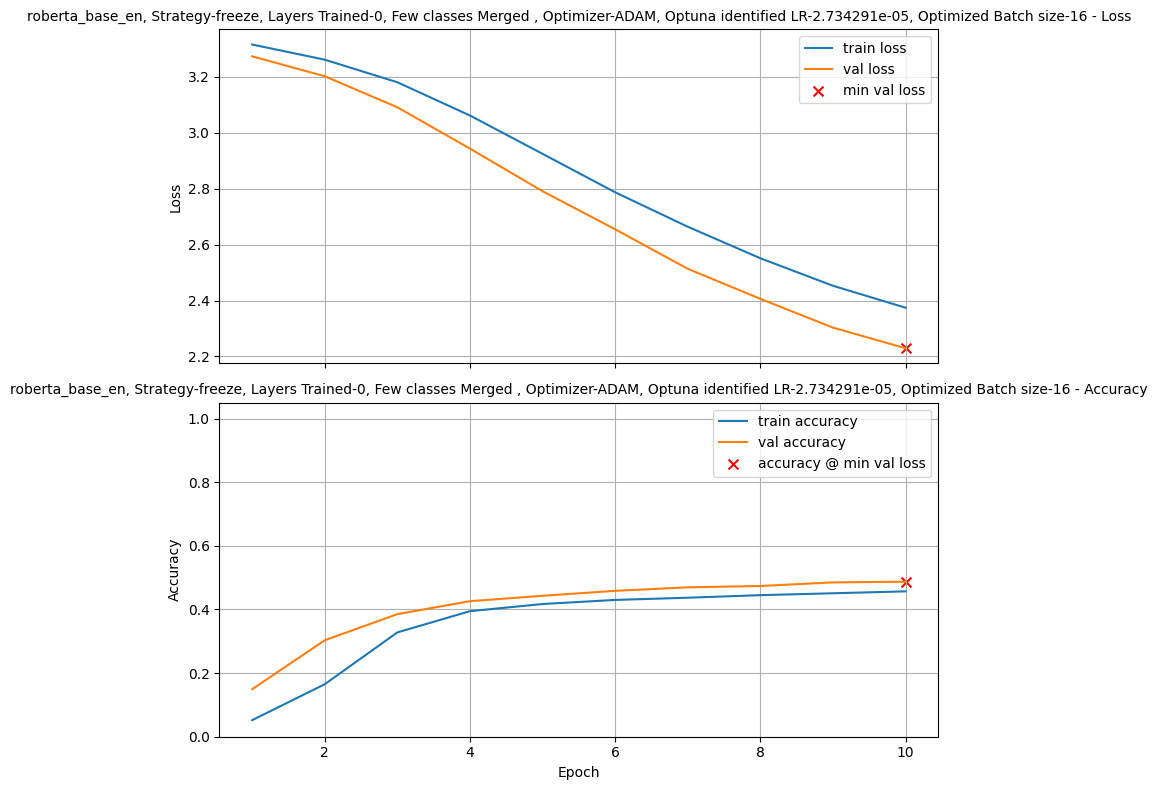

Final Training Loss:            2.3744
Final Training  accuracy:    0.4568
Final Validation Loss:          2.2294
Final Validation  accuracy:  0.4872
Min Validation Loss:            2.2294 (Epoch 10)
Accuracy @ Min Val Loss:      0.4872

Test metrics:
  loss: 2.2158
  accuracy: 0.4936

Execution Time: 7m 22s
Peak Memory Usage: 13079.39 MB

Generating final predictions for analysis purpose...


[I 2025-12-03 22:16:31,009] A new study created in memory with name: no-name-cf927958-2f9b-4277-84ab-664bbadbbea6


Test accuracy: 0.4936
Test macro-F1: 0.3935

Per-Category Performance (Sorted by F1 Score)
----------------------------------------------------
LATINO VOICES                  | 0.074    | 22.0    
WOMEN                          | 0.080    | 68.0    
BLACK VOICES                   | 0.122    | 91.0    
EDUCATION                      | 0.176    | 43.0    
IMPACT                         | 0.216    | 69.0    
COMEDY                         | 0.236    | 102.0   
BUSINESS                       | 0.242    | 153.0   
MEDIA                          | 0.250    | 56.0    
WEIRD NEWS                     | 0.266    | 81.0    
STYLE                          | 0.273    | 45.0    
ARTS & CULTURE                 | 0.320    | 77.0    
RELIGION                       | 0.331    | 51.0    
TECH                           | 0.346    | 84.0    
GREEN                          | 0.375    | 78.0    
QUEER VOICES                   | 0.396    | 126.0   
CRIME                          | 0.415    | 68.0    
DIVORCE 

100%|██████████| 686/686 [00:00<00:00, 1.16MB/s]


100%|██████████| 0.99M/0.99M [00:01<00:00, 751kB/s]


100%|██████████| 446k/446k [00:01<00:00, 423kB/s]


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-03 22:29:05,288] Trial 0 finished with value: 0.615307629108429 and parameters: {'learning_rate': 3.5213558327257044e-05, 'batch_size': 32, 'optimizer': 'adagrad', 'adagrad_init_acc': 7.320488961626186e-07}. Best is trial 0 with value: 0.615307629108429.


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-03 22:46:10,778] Trial 1 finished with value: 0.5605302453041077 and parameters: {'learning_rate': 5.73932943264196e-05, 'batch_size': 8, 'optimizer': 'adamw', 'adamw_weight_decay': 0.0014278850630615085}. Best is trial 0 with value: 0.615307629108429.


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-03 22:58:01,065] Trial 2 finished with value: 0.5845422744750977 and parameters: {'learning_rate': 1.2036645625367826e-05, 'batch_size': 32, 'optimizer': 'adagrad', 'adagrad_init_acc': 2.8994314544764977e-08}. Best is trial 0 with value: 0.615307629108429.


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-03 23:10:18,741] Trial 3 finished with value: 0.6873436570167542 and parameters: {'learning_rate': 3.5473438873394377e-05, 'batch_size': 32, 'optimizer': 'adam', 'adam_beta1': 0.8971427414711897, 'adam_beta2': 0.9287353586031898}. Best is trial 3 with value: 0.6873436570167542.


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-03 23:24:19,024] Trial 4 finished with value: 0.6720860600471497 and parameters: {'learning_rate': 1.420065511669903e-05, 'batch_size': 16, 'optimizer': 'adamw', 'adamw_weight_decay': 0.0003043058977469263}. Best is trial 3 with value: 0.6873436570167542.


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-03 23:41:07,681] Trial 5 finished with value: 0.6360680460929871 and parameters: {'learning_rate': 1.351284058164482e-06, 'batch_size': 8, 'optimizer': 'adamw', 'adamw_weight_decay': 2.049359649449688e-06}. Best is trial 3 with value: 0.6873436570167542.


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-03 23:48:05,098] Trial 6 pruned. Trial was pruned at epoch 0.


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-03 23:55:25,945] Trial 7 pruned. Trial was pruned at epoch 0.


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-04 00:12:02,190] Trial 8 finished with value: 0.6698349118232727 and parameters: {'learning_rate': 7.485417041990052e-06, 'batch_size': 8, 'optimizer': 'adam', 'adam_beta1': 0.9182411444870379, 'adam_beta2': 0.9516653246478821}. Best is trial 3 with value: 0.6873436570167542.


Strategy: PARTIAL (Unfroze 2/12 transformer layers).


[I 2025-12-04 00:21:18,998] Trial 9 pruned. Trial was pruned at epoch 1.



>>> Best Learning Rate: 3.547344e-05 (Val Acc: 0.6873)
>>> Best Optimizer: adam    >>> Best Batch Size: 32
Re-training roberta_base_en with Best LR: 3.55e-05 for full epochs...
Strategy: PARTIAL (Unfroze 2/12 transformer layers).

=== roberta_base_en, Strategy-partial, Layers Trained-2, Few classes Merged , Optimizer-ADAM, Optuna identified LR-3.547344e-05, Optimized Batch size-32 ===

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 210s 131ms/step - accuracy: 0.4277 - loss: 2.1159 - val_accuracy: 0.6191 - val_loss: 1.3164 - learning_rate: 3.5473e-05
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 80s 78ms/step - accuracy: 0.6389 - loss: 1.2040 - val_accuracy: 0.6256 - val_loss: 1.2796 - learning_rate: 3.5473e-05
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 78s 76ms/step - accuracy: 0.7065 - loss: 0.9059 - val_accuracy: 0.6433 - val_loss: 1.2779 - learning_rate: 3.5473e-05
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 78s 76ms/step - accuracy: 0.7569 - loss: 0.7072 - val_accuracy: 0.6673 - val_loss: 1.2

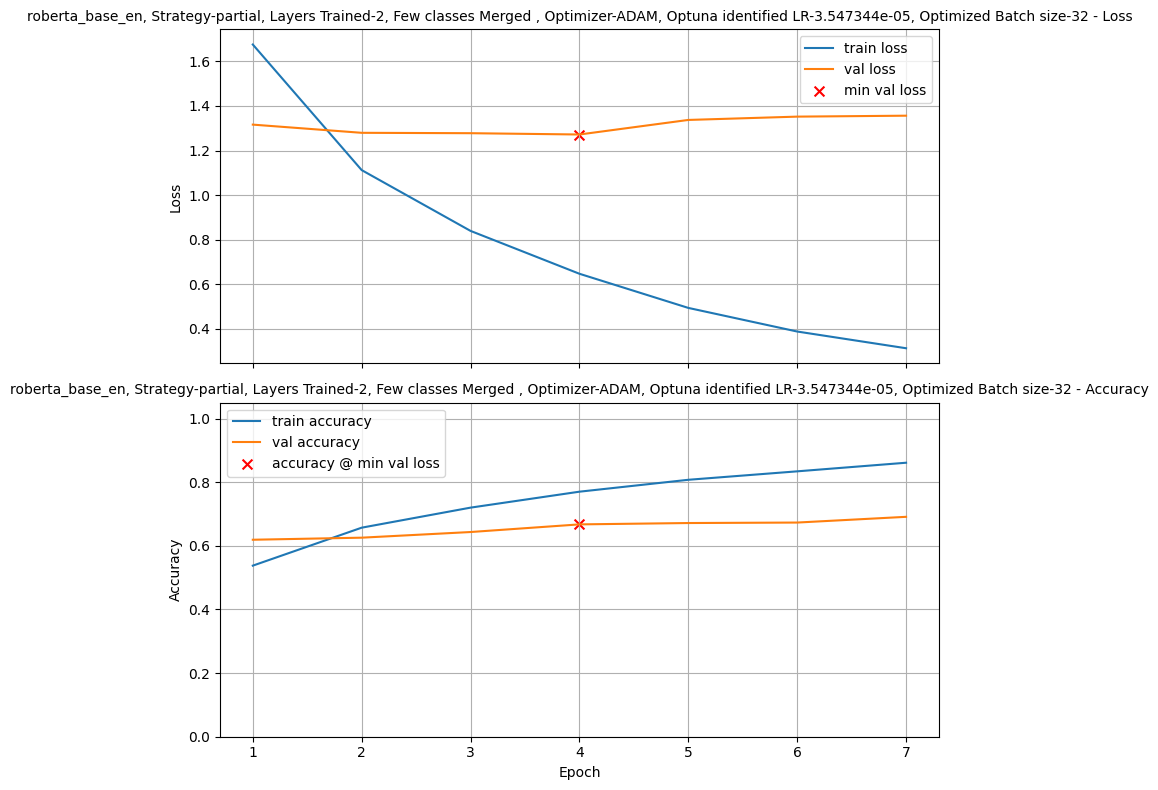

Final Training Loss:            0.3135
Final Training  accuracy:    0.8611
Final Validation Loss:          1.3564
Final Validation  accuracy:  0.6911
Min Validation Loss:            1.2721 (Epoch 4)
Accuracy @ Min Val Loss:      0.6673

Test metrics:
  loss: 1.2261
  accuracy: 0.6772

Execution Time: 11m 21s
Peak Memory Usage: 23709.88 MB

Generating final predictions for analysis purpose...


[I 2025-12-04 00:37:19,185] A new study created in memory with name: no-name-3fee5148-1723-4437-bdd9-77b6bfd0180d


Test accuracy: 0.6772
Test macro-F1: 0.6248

Per-Category Performance (Sorted by F1 Score)
----------------------------------------------------
WOMEN                          | 0.343    | 68.0    
IMPACT                         | 0.352    | 69.0    
EDUCATION                      | 0.409    | 43.0    
BLACK VOICES                   | 0.442    | 91.0    
LATINO VOICES                  | 0.471    | 22.0    
WEIRD NEWS                     | 0.471    | 81.0    
CRIME                          | 0.523    | 68.0    
COMEDY                         | 0.536    | 102.0   
GREEN                          | 0.544    | 78.0    
ARTS & CULTURE                 | 0.545    | 77.0    
MEDIA                          | 0.554    | 56.0    
BUSINESS                       | 0.586    | 153.0   
STYLE                          | 0.587    | 45.0    
TECH                           | 0.609    | 84.0    
RELIGION                       | 0.640    | 51.0    
SPORTS                         | 0.670    | 98.0    
ENTERTAI

[I 2025-12-04 00:49:16,535] Trial 0 finished with value: 0.6630815267562866 and parameters: {'learning_rate': 1.0808236699479443e-05, 'batch_size': 32, 'optimizer': 'rmsprop', 'rms_rho': 0.8142712864527207}. Best is trial 0 with value: 0.6630815267562866.


Strategy: PARTIAL (Unfroze 3/12 transformer layers).


[I 2025-12-04 01:06:09,479] Trial 1 finished with value: 0.012756378389894962 and parameters: {'learning_rate': 8.878167347235802e-05, 'batch_size': 8, 'optimizer': 'adamw', 'adamw_weight_decay': 4.9289753674082055e-05}. Best is trial 0 with value: 0.6630815267562866.


Strategy: PARTIAL (Unfroze 3/12 transformer layers).


[I 2025-12-04 01:19:46,234] Trial 2 finished with value: 0.6735867857933044 and parameters: {'learning_rate': 1.2210454993447227e-05, 'batch_size': 16, 'optimizer': 'adam', 'adam_beta1': 0.9894905654095918, 'adam_beta2': 0.9791447712101948}. Best is trial 2 with value: 0.6735867857933044.


Strategy: PARTIAL (Unfroze 3/12 transformer layers).


[I 2025-12-04 01:34:09,379] Trial 3 finished with value: 0.5115057826042175 and parameters: {'learning_rate': 3.639149222078223e-05, 'batch_size': 8, 'optimizer': 'sgd', 'sgd_momentum': 0.23247098418940462}. Best is trial 2 with value: 0.6735867857933044.


Strategy: PARTIAL (Unfroze 3/12 transformer layers).


[I 2025-12-04 01:46:24,864] Trial 4 finished with value: 0.6590795516967773 and parameters: {'learning_rate': 5.660643551166156e-06, 'batch_size': 32, 'optimizer': 'adamw', 'adamw_weight_decay': 0.001109785763838615}. Best is trial 2 with value: 0.6735867857933044.


Strategy: PARTIAL (Unfroze 3/12 transformer layers).


[I 2025-12-04 02:02:51,321] Trial 5 finished with value: 0.6678339242935181 and parameters: {'learning_rate': 4.468160586266444e-06, 'batch_size': 8, 'optimizer': 'adam', 'adam_beta1': 0.9673783752586255, 'adam_beta2': 0.9550869245524213}. Best is trial 2 with value: 0.6735867857933044.


Strategy: PARTIAL (Unfroze 3/12 transformer layers).


[I 2025-12-04 02:10:29,884] Trial 6 pruned. Trial was pruned at epoch 0.


Strategy: PARTIAL (Unfroze 3/12 transformer layers).


[I 2025-12-04 02:17:39,468] Trial 7 pruned. Trial was pruned at epoch 0.


Strategy: PARTIAL (Unfroze 3/12 transformer layers).


[I 2025-12-04 02:26:18,258] Trial 8 pruned. Trial was pruned at epoch 1.


Strategy: PARTIAL (Unfroze 3/12 transformer layers).


[I 2025-12-04 02:33:46,659] Trial 9 pruned. Trial was pruned at epoch 0.



>>> Best Learning Rate: 1.221045e-05 (Val Acc: 0.6736)
>>> Best Optimizer: adam    >>> Best Batch Size: 16
Re-training roberta_base_en with Best LR: 1.22e-05 for full epochs...
Strategy: PARTIAL (Unfroze 3/12 transformer layers).

=== roberta_base_en, Strategy-partial, Layers Trained-3, Few classes Merged , Optimizer-ADAM, Optuna identified LR-1.221045e-05, Optimized Batch size-16 ===

Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 223s 71ms/step - accuracy: 0.3640 - loss: 2.4370 - val_accuracy: 0.6288 - val_loss: 1.3589 - learning_rate: 1.2210e-05
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 96s 47ms/step - accuracy: 0.6332 - loss: 1.2502 - val_accuracy: 0.6418 - val_loss: 1.2825 - learning_rate: 1.2210e-05
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 98s 48ms/step - accuracy: 0.6925 - loss: 0.9676 - val_accuracy: 0.6598 - val_loss: 1.2257 - learning_rate: 1.2210e-05
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 96s 47ms/step - accuracy: 0.7386 - loss: 0.7543 - val_accuracy: 0.6826 - val_loss: 1.16

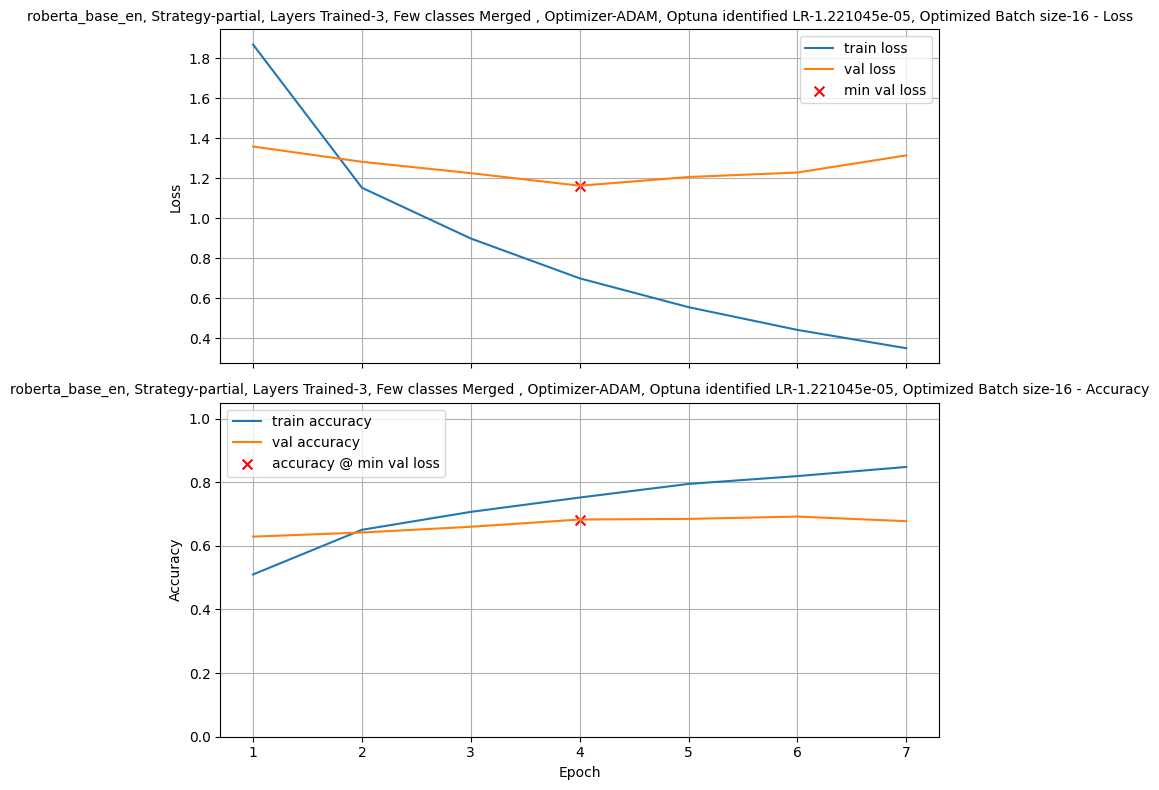

Final Training Loss:            0.3507
Final Training  accuracy:    0.8478
Final Validation Loss:          1.3146
Final Validation  accuracy:  0.6773
Min Validation Loss:            1.1629 (Epoch 4)
Accuracy @ Min Val Loss:      0.6826

Test metrics:
  loss: 1.1598
  accuracy: 0.6772

Execution Time: 13m 22s
Peak Memory Usage: 33192.59 MB

Generating final predictions for analysis purpose...


[I 2025-12-04 02:51:53,360] A new study created in memory with name: no-name-8c4512a9-e104-4f10-ac20-a24e1d6150fc


Test accuracy: 0.6772
Test macro-F1: 0.6326

Per-Category Performance (Sorted by F1 Score)
----------------------------------------------------
IMPACT                         | 0.346    | 69.0    
WOMEN                          | 0.349    | 68.0    
STYLE                          | 0.455    | 45.0    
EDUCATION                      | 0.460    | 43.0    
LATINO VOICES                  | 0.465    | 22.0    
COMEDY                         | 0.516    | 102.0   
WEIRD NEWS                     | 0.520    | 81.0    
BLACK VOICES                   | 0.524    | 91.0    
BUSINESS                       | 0.559    | 153.0   
TECH                           | 0.564    | 84.0    
ARTS & CULTURE                 | 0.598    | 77.0    
CRIME                          | 0.606    | 68.0    
GREEN                          | 0.615    | 78.0    
MEDIA                          | 0.636    | 56.0    
ENTERTAINMENT                  | 0.667    | 321.0   
RELIGION                       | 0.679    | 51.0    
SPORTS  

[I 2025-12-04 03:04:55,287] Trial 0 finished with value: 0.06228113919496536 and parameters: {'learning_rate': 1.5020983786970426e-05, 'batch_size': 16, 'optimizer': 'sgd', 'sgd_momentum': 0.6446349461395668}. Best is trial 0 with value: 0.06228113919496536.


Strategy: PARTIAL (Unfroze 6/12 transformer layers).


[I 2025-12-04 03:17:11,840] Trial 1 finished with value: 0.6453226804733276 and parameters: {'learning_rate': 7.143651398342428e-06, 'batch_size': 32, 'optimizer': 'rmsprop', 'rms_rho': 0.8337186703052594}. Best is trial 1 with value: 0.6453226804733276.


Strategy: PARTIAL (Unfroze 6/12 transformer layers).


[I 2025-12-04 03:34:23,761] Trial 2 finished with value: 0.6395697593688965 and parameters: {'learning_rate': 1.2660667776892452e-06, 'batch_size': 8, 'optimizer': 'adam', 'adam_beta1': 0.8398265036644368, 'adam_beta2': 0.9215701857134246}. Best is trial 1 with value: 0.6453226804733276.


Strategy: PARTIAL (Unfroze 6/12 transformer layers).


[I 2025-12-04 03:48:01,777] Trial 3 finished with value: 0.6530765295028687 and parameters: {'learning_rate': 3.3769179161298794e-06, 'batch_size': 16, 'optimizer': 'rmsprop', 'rms_rho': 0.8915144694089226}. Best is trial 3 with value: 0.6530765295028687.


Strategy: PARTIAL (Unfroze 6/12 transformer layers).


[I 2025-12-04 04:05:23,604] Trial 4 finished with value: 0.6500750184059143 and parameters: {'learning_rate': 2.7635612910687148e-05, 'batch_size': 8, 'optimizer': 'adamw', 'adamw_weight_decay': 0.00011690820737318847}. Best is trial 3 with value: 0.6530765295028687.


Strategy: PARTIAL (Unfroze 6/12 transformer layers).


[I 2025-12-04 04:13:15,059] Trial 5 pruned. Trial was pruned at epoch 0.


Strategy: PARTIAL (Unfroze 6/12 transformer layers).


[I 2025-12-04 04:21:06,484] Trial 6 pruned. Trial was pruned at epoch 0.


Strategy: PARTIAL (Unfroze 6/12 transformer layers).


[I 2025-12-04 04:35:19,133] Trial 7 finished with value: 0.680090069770813 and parameters: {'learning_rate': 2.7030114464112576e-05, 'batch_size': 16, 'optimizer': 'adam', 'adam_beta1': 0.9001837622691751, 'adam_beta2': 0.9077848128142194}. Best is trial 7 with value: 0.680090069770813.


Strategy: PARTIAL (Unfroze 6/12 transformer layers).


[I 2025-12-04 04:42:38,900] Trial 8 pruned. Trial was pruned at epoch 0.


Strategy: PARTIAL (Unfroze 6/12 transformer layers).


[I 2025-12-04 04:51:18,507] Trial 9 pruned. Trial was pruned at epoch 0.



>>> Best Learning Rate: 2.703011e-05 (Val Acc: 0.6801)
>>> Best Optimizer: adam    >>> Best Batch Size: 16
Re-training roberta_base_en with Best LR: 2.70e-05 for full epochs...
Strategy: PARTIAL (Unfroze 6/12 transformer layers).

=== roberta_base_en, Strategy-partial, Layers Trained-6, Few classes Merged , Optimizer-ADAM, Optuna identified LR-2.703011e-05, Optimized Batch size-16 ===

Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 230s 71ms/step - accuracy: 0.4359 - loss: 2.1147 - val_accuracy: 0.6226 - val_loss: 1.3254 - learning_rate: 2.7030e-05
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 98s 48ms/step - accuracy: 0.6412 - loss: 1.2044 - val_accuracy: 0.6438 - val_loss: 1.2596 - learning_rate: 2.7030e-05
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 101s 49ms/step - accuracy: 0.7090 - loss: 0.9127 - val_accuracy: 0.6496 - val_loss: 1.2716 - learning_rate: 2.7030e-05
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 99s 48ms/step - accuracy: 0.7602 - loss: 0.6990 - val_accuracy: 0.6543 - val_loss: 1.3

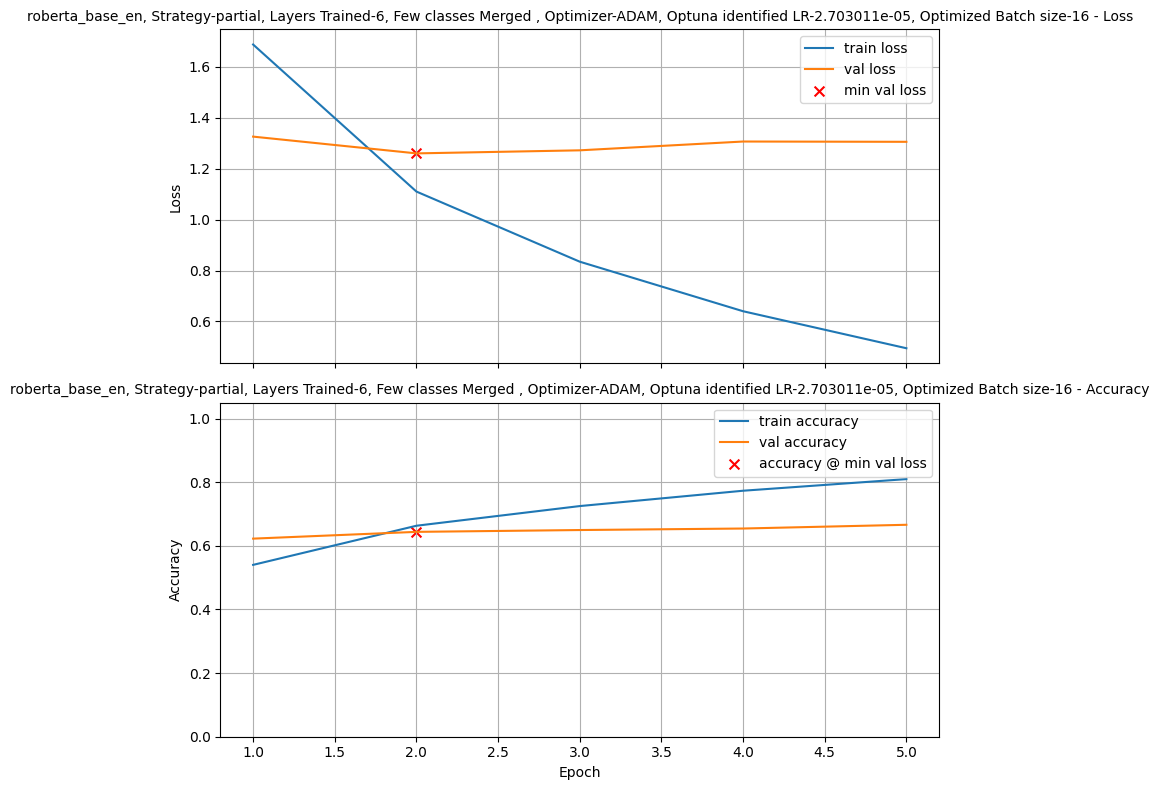

Final Training Loss:            0.4949
Final Training  accuracy:    0.8096
Final Validation Loss:          1.3050
Final Validation  accuracy:  0.6661
Min Validation Loss:            1.2596 (Epoch 2)
Accuracy @ Min Val Loss:      0.6438

Test metrics:
  loss: 1.2527
  accuracy: 0.6439

Execution Time: 10m 31s
Peak Memory Usage: 42711.07 MB

Generating final predictions for analysis purpose...


[I 2025-12-04 05:06:35,824] A new study created in memory with name: no-name-03f69ced-42a5-406a-8423-cc5987e229d1


Test accuracy: 0.6439
Test macro-F1: 0.5959

Per-Category Performance (Sorted by F1 Score)
----------------------------------------------------
LATINO VOICES                  | 0.323    | 22.0    
WOMEN                          | 0.347    | 68.0    
EDUCATION                      | 0.352    | 43.0    
IMPACT                         | 0.370    | 69.0    
BLACK VOICES                   | 0.392    | 91.0    
COMEDY                         | 0.423    | 102.0   
WEIRD NEWS                     | 0.482    | 81.0    
STYLE                          | 0.503    | 45.0    
ARTS & CULTURE                 | 0.504    | 77.0    
CRIME                          | 0.515    | 68.0    
GREEN                          | 0.533    | 78.0    
MEDIA                          | 0.543    | 56.0    
BUSINESS                       | 0.546    | 153.0   
ENTERTAINMENT                  | 0.569    | 321.0   
TECH                           | 0.605    | 84.0    
RELIGION                       | 0.642    | 51.0    
SPORTS  

[I 2025-12-04 05:20:20,295] Trial 0 finished with value: 0.6598299145698547 and parameters: {'learning_rate': 4.216870455213948e-05, 'batch_size': 16, 'optimizer': 'rmsprop', 'rms_rho': 0.9266931364544845}. Best is trial 0 with value: 0.6598299145698547.


Strategy: FULL (all layers trainable).


[I 2025-12-04 05:34:55,799] Trial 1 finished with value: 0.6423211693763733 and parameters: {'learning_rate': 4.5148771534088796e-05, 'batch_size': 16, 'optimizer': 'adamw', 'adamw_weight_decay': 0.00020565608801996073}. Best is trial 0 with value: 0.6598299145698547.


Strategy: FULL (all layers trainable).


[I 2025-12-04 05:47:24,051] Trial 2 finished with value: 0.6383191347122192 and parameters: {'learning_rate': 2.9043595533274526e-06, 'batch_size': 32, 'optimizer': 'rmsprop', 'rms_rho': 0.9159592883501392}. Best is trial 0 with value: 0.6598299145698547.


Strategy: FULL (all layers trainable).


[I 2025-12-04 06:01:09,201] Trial 3 finished with value: 0.622061014175415 and parameters: {'learning_rate': 1.1748668677266193e-06, 'batch_size': 16, 'optimizer': 'rmsprop', 'rms_rho': 0.9366581570356292}. Best is trial 0 with value: 0.6598299145698547.


Strategy: FULL (all layers trainable).


[I 2025-12-04 06:14:45,474] Trial 4 finished with value: 0.6240620017051697 and parameters: {'learning_rate': 4.625010283732231e-05, 'batch_size': 16, 'optimizer': 'adagrad', 'adagrad_init_acc': 2.381424630371401e-06}. Best is trial 0 with value: 0.6598299145698547.


Strategy: FULL (all layers trainable).


[I 2025-12-04 06:29:03,898] Trial 5 finished with value: 0.6733366847038269 and parameters: {'learning_rate': 1.7533948896883963e-05, 'batch_size': 16, 'optimizer': 'adamw', 'adamw_weight_decay': 0.00019467081350527733}. Best is trial 5 with value: 0.6733366847038269.


Strategy: FULL (all layers trainable).


[I 2025-12-04 06:36:46,788] Trial 6 pruned. Trial was pruned at epoch 0.


Strategy: FULL (all layers trainable).


[I 2025-12-04 06:49:35,911] Trial 7 finished with value: 0.6628314256668091 and parameters: {'learning_rate': 9.832715201535382e-06, 'batch_size': 32, 'optimizer': 'adam', 'adam_beta1': 0.8913707315436699, 'adam_beta2': 0.9943819293852981}. Best is trial 5 with value: 0.6733366847038269.


Strategy: FULL (all layers trainable).


[I 2025-12-04 06:57:16,597] Trial 8 pruned. Trial was pruned at epoch 0.


Strategy: FULL (all layers trainable).


[I 2025-12-04 07:11:33,699] Trial 9 finished with value: 0.6600800156593323 and parameters: {'learning_rate': 5.495437426978294e-06, 'batch_size': 16, 'optimizer': 'adamw', 'adamw_weight_decay': 0.0047880362155695855}. Best is trial 5 with value: 0.6733366847038269.



>>> Best Learning Rate: 1.753395e-05 (Val Acc: 0.6733)
>>> Best Optimizer: adamw    >>> Best Batch Size: 16
Re-training roberta_base_en with Best LR: 1.75e-05 for full epochs...
Strategy: FULL (all layers trainable).

=== roberta_base_en, Strategy-full, Layers Trained-All, Few classes Merged , Optimizer-ADAMW, Optuna identified LR-1.753395e-05, Optimized Batch size-16 ===

Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 236s 72ms/step - accuracy: 0.4556 - loss: 2.0731 - val_accuracy: 0.6233 - val_loss: 1.3313 - learning_rate: 1.7534e-05
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 100s 49ms/step - accuracy: 0.6527 - loss: 1.1668 - val_accuracy: 0.6448 - val_loss: 1.2483 - learning_rate: 1.7534e-05
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 102s 50ms/step - accuracy: 0.7096 - loss: 0.8900 - val_accuracy: 0.6501 - val_loss: 1.2454 - learning_rate: 1.7534e-05
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 99s 49ms/step - accuracy: 0.7613 - loss: 0.6770 - val_accuracy: 0.6616 - val_loss: 1.2349 - learni

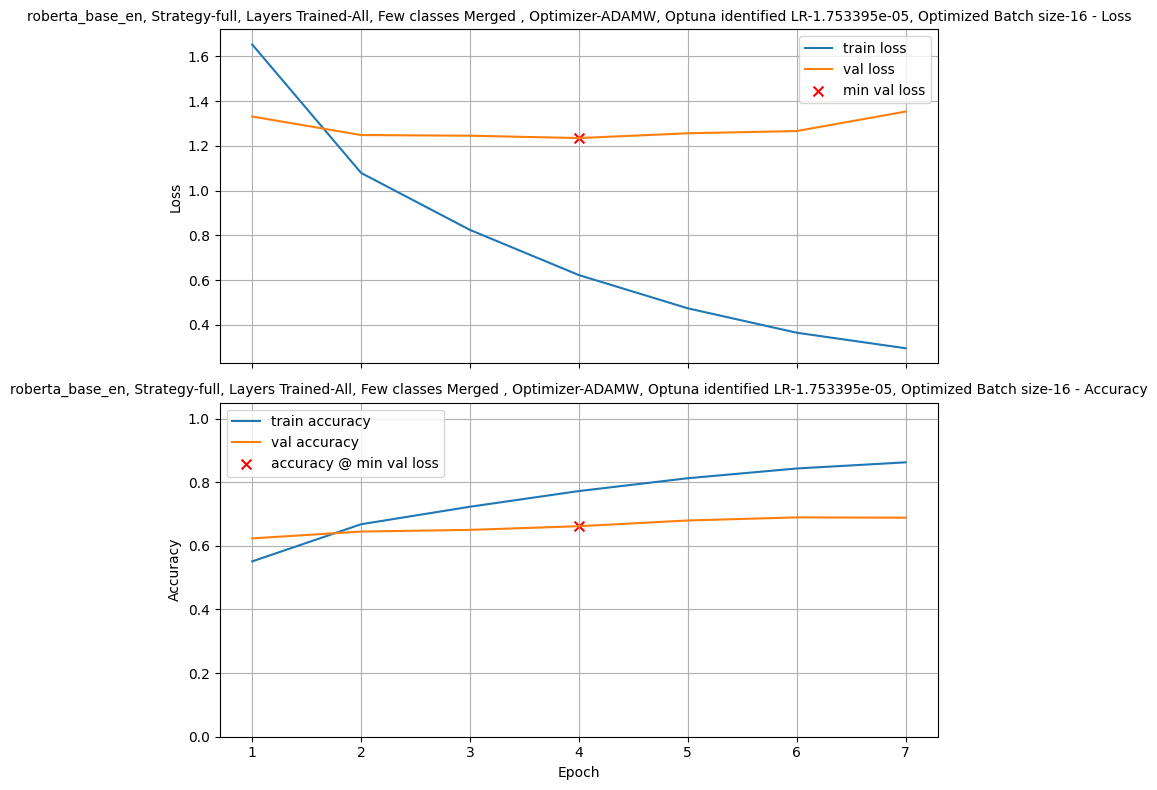

Final Training Loss:            0.2951
Final Training  accuracy:    0.8623
Final Validation Loss:          1.3533
Final Validation  accuracy:  0.6883
Min Validation Loss:            1.2349 (Epoch 4)
Accuracy @ Min Val Loss:      0.6616

Test metrics:
  loss: 1.2186
  accuracy: 0.6684

Execution Time: 13m 56s
Peak Memory Usage: 51948.40 MB

Generating final predictions for analysis purpose...
Test accuracy: 0.6684
Test macro-F1: 0.6239

Per-Category Performance (Sorted by F1 Score)
----------------------------------------------------
WOMEN                          | 0.294    | 68.0    
IMPACT                         | 0.352    | 69.0    
EDUCATION                      | 0.457    | 43.0    
BLACK VOICES                   | 0.465    | 91.0    
LATINO VOICES                  | 0.478    | 22.0    
COMEDY                         | 0.485    | 102.0   
ARTS & CULTURE                 | 0.503    | 77.0    
WEIRD NEWS                     | 0.525    | 81.0    
CRIME                          | 0.55

In [ ]:
%%script echo skipping    # Skipping as it takes long  so as someone can run the whole notebook without triggering this...deb

# Let us do the 2nd run to understand the overall performance  with merged category
# we will use the f1 score by category to determine whatlables to map to what target lable (i.e merge)
# Since Roberta_basee_en gave the best result earlier we will focus on that and try to arrive at the best hyperparameter

# Set experiment parameters
experiment_layers = True
EPOCHS = 10

# Since the above is True the below four final parameters will be ignored later in the code

# Set these final hyper parameters identified in earlier run to reduce the search space
# used only when value of experiment_layers = False
final_model_name = "roberta_base_en"
final_batch_size = 16
final_strategy = "full"
final_train_layers = 3

#set the strategy
strategy = "ALL"    # this will create three rows  ie one for "freeze" , "partial" and "full"

#ALLOWED_MODEL_LIST = ["roberta_base_en", "distil_bert_base_en_uncased", "bert_base_en_uncased"]
#ALLOWED_MODEL_LIST = [final_model_name]
#we will use roberta_base_en with all three layers to check the performance as we know we got he best results using that
ALLOWED_MODEL_LIST = ["roberta_base_en"]

# Set standard parameters for Optuan trials
OPTUNA_TRIALS_INITIAL = 5 #
OPTUNA_TRIALS_FINAL = 10
OPTUNA_TRIALS = OPTUNA_TRIALS_FINAL
# How many different trials to run for optuna..during inital run we will do 5 later for final training we will do 10

# default eperimental layers just in case parameter doesnt work should just come through parameters
N_PARTIAL_VALUES = [2, 3, 6]   # Deb debug uncomment hti s and delete lower line ... we will send all the layers we want to test and let it loop in experimental loop method
BATCHS = [8, 16, 32]           # we will send all three and let Optuna decide the best

# get the merged class weights as the classes weights will change after the merging
merged_class_weights = get_class_weights(y_tr_m)

print(f"\n\n{'#'*80}")
print("Starting Optuna runs after Merged-Categories which were getting improperly classified")
print(f"{'#'*80}")

print("Vocabulary size:", new_vocab_size)
print("Number of classes:", merged_num_classes)
print("Max Length of text ", MAX_LEN)

# generate model_configs for various batch sizes and strategies
# initialise the variables
ALL_MODEL_CONFIGS = []


# fallback
final_train_layers = globals().get("final_train_layers", globals().get("final_train_layers", 2))

#Once trained call the same method with a param - experiment_layers = False so that the else clause will take effect

if experiment_layers:
    for model_n in ALLOWED_MODEL_LIST:
        # Determine effective_partial_values based on model_n (moved outside batch loop)
        if model_n == "distil_bert_base_en_uncased":
            effective_partial_values = [2]
        else:
            effective_partial_values = N_PARTIAL_VALUES

        if strategy == "ALL":
            # Add Freeze config
            ALL_MODEL_CONFIGS.append({
                "name": model_n,
                "batch": BATCHS, # Pass the entire list of batch sizes for Optuna to optimize
                "strategy": "freeze",
                "unfreeze_layers": 0,
            })
            # Add Partial configs
            for n_unfreeze in effective_partial_values:
                ALL_MODEL_CONFIGS.append({
                    "name": model_n,
                    "batch": BATCHS, # Pass the entire list of batch sizes for Optuna to optimize
                    "strategy": "partial",
                    "unfreeze_layers": n_unfreeze,
                })
            # Add Full config
            ALL_MODEL_CONFIGS.append({
                "name": model_n,
                "batch": BATCHS, # Pass the entire list of batch sizes for Optuna to optimize
                "strategy": "full",
                "unfreeze_layers": None,
            })
        elif strategy == "partial":
            # Add 'partial' configs only
            for n_unfreeze in effective_partial_values:
                ALL_MODEL_CONFIGS.append({
                    "name": model_n,
                    "batch": BATCHS, # Pass the entire list of batch sizes for Optuna to optimize
                    "strategy": "partial",
                    "unfreeze_layers": n_unfreeze,
                })
        elif strategy == "full":
            ALL_MODEL_CONFIGS.append({
                "name": model_n,
                "batch": BATCHS, # Pass the entire list of batch sizes for Optuna to optimize
                "strategy": "full",
                "unfreeze_layers": None,
            })
        elif strategy == "freeze":
            ALL_MODEL_CONFIGS.append({
                "name": model_n,
                "batch": BATCHS, # Pass the entire list of batch sizes for Optuna to optimize
                "strategy": "freeze",
                "unfreeze_layers": 0,
            })
        else:
            print(f"Warning: Unknown strategy '{strategy}'. No configurations added for {model_n}.")

else:                                     # this triggers only experiment_layers= False i.e we are final
    N_PARTIAL_VALUES = [int(final_train_layers)]
    model_n = final_model_name
    batch_s = final_batch_size
    strategy = final_strategy
    unfreeze_layers = int(final_train_layers)
    ALL_MODEL_CONFIGS.append({
        "name": model_n,
        "batch": batch_s,
        "strategy": strategy,
        "unfreeze_layers": unfreeze_layers,
    })


print(f"experiment_layers={experiment_layers}  -> N_PARTIAL_VALUES={N_PARTIAL_VALUES}")

current_results, current_subset_stats, current_study = run_experiment_loop_with_optuna( # Capture the returned study object
    X_tr_m, X_va_m, X_te_m, y_tr_m, y_va_m, y_te_m,          # this time use the latest merged once
    model_configs_list=ALL_MODEL_CONFIGS,
    max_epochs=EPOCHS,
    num_classes_global=merged_num_classes,
    label_names_global=merged_label_names,
    class_weights_global= merged_class_weights,
    current_subset_frac = subset_frac,
    DS_Merged=True,               #Included this so I can add merged info in title in plot and results
    OPTUNA_TRIALS=OPTUNA_TRIALS,
)
# Check if dictionaries exist first to avoid erroring out if this is the first run
if 'all_experiment_results' not in globals():
    all_experiment_results = {}
if 'all_subset_stats' not in globals():
    all_subset_stats = []

all_experiment_results.update(current_results)
all_subset_stats.extend(current_subset_stats)


study = current_study

print(f"Stats collected: {len(all_subset_stats)} runs.")

print(f"\n\n{'#'*80}")
print("  This Experiment completed")
print(f"{'#'*80}")
'''

## Below cell will show all experiments data from 1st and 2nd round of training validation and test

In [ ]:

print_results(results)


Sorting results by: accuracy_at_min_val_loss

roberta_base_en, Strategy-partial, Layers Trained-3, Few classes Merged , Optimizer-ADAM, Optuna identified LR-1.221045e-05, Optimized Batch size-16  0.6826  (best epoch=4)
roberta_base_en, Strategy-partial, Layers Trained-2, Few classes Merged , Optimizer-ADAM, Optuna identified LR-3.547344e-05, Optimized Batch size-32  0.6673  (best epoch=4)
roberta_base_en, Strategy-full, Layers Trained-All, Few classes Merged , Optimizer-ADAMW, Optuna identified LR-1.753400e-05, Optimized Batch size-16  0.6616  (best epoch=4)
roberta_base_en, Strategy-partial, Layers Trained-6, Few classes Merged , Optimizer-ADAM, Optuna identified LR-2.703011e-05, Optimized Batch size-16  0.6438  (best epoch=2)
roberta_base_en, Strategy-full, Layers Trained-All, No Merged Class , Optimizer-RMSPROP, Optuna identified LR-4.473457e-06, Optimized Batch size-16  0.6346  (best epoch=10)
bert_base_en_uncased, Strategy-partial, Layers Trained-2, No Merged Class , Optimizer-AD

In [ ]:


if 'all_subset_stats' in globals() and len(all_subset_stats) > 0:
    summary_df = pd.DataFrame(all_subset_stats)
    # Sorting by Test Acc descending
    summary_df = summary_df.sort_values(by="Test Acc", ascending=False)
    display(summary_df)
else:
    print("Dataframe doesnt have summary info")

Model Strategy Layers           DS_Merged  Batch  \
11              roberta_base_en  partial      3  Few classes Merged     16   
12              roberta_base_en  partial      2  Few classes Merged     32   
9               roberta_base_en     full    All  Few classes Merged     16   
10              roberta_base_en  partial      6  Few classes Merged     16   
0          bert_base_en_uncased  partial      2     No Merged Class      8   
1               roberta_base_en     full    All     No Merged Class     16   
4   distil_bert_base_en_uncased     full    All     No Merged Class      8   
2               roberta_base_en  partial      2     No Merged Class     16   
3   distil_bert_base_en_uncased  partial      2     No Merged Class      8   
5          bert_base_en_uncased     full    All     No Merged Class      8   
6   distil_bert_base_en_uncased   freeze      0     No Merged Class      8   
13              roberta_base_en   freeze      0  Few classes Merged     16   
7               roberta_base_en   freeze      0     No Merged Class     16   
8          bert_base_en_uncased   freeze      0     No Merged Class     16   

   Optimizer  Learning Rate  Val Acc @ Min Loss  Min Val Loss  Test Loss  \
11      ADAM       0.000012            0.682600      1.162900   1.159800   
12      ADAM       0.000035            0.667300      1.272100   1.226100   
9      ADAMW       0.000018            0.661600      1.234900   1.218600   
10      ADAM       0.000027            0.643800      1.259600   1.252700   
0       ADAM       0.000022            0.627564      1.425871   1.388879   
1    RMSPROP       0.000004            0.634567      1.377544   1.395671   
4    RMSPROP       0.000019            0.616058      1.402357   1.390802   
2      ADAMW       0.000004            0.613807      1.429574   1.447888   
3      ADAMW       0.000029            0.594797      1.508233   1.495547   
5      ADAMW       0.000001            0.567284      1.618544   1.637026   
6      ADAMW       0.000047            0.501001      1.733680   1.739277   
13      ADAM       0.000027            0.487200      2.229400   2.215800   
7    RMSPROP       0.000035            0.445473      2.618152   2.641419   
8       ADAM       0.000044            0.321411      3.082827   3.078496   

    Best Epoch  Test Acc  Test F1 Macro  Elapsed Sec  Peak Memory(MB)  \
11           4  0.677200       0.632600        802.5         33192.59   
12           4  0.677200       0.624800        681.7         23709.88   
9            4  0.668400       0.623900        836.7         51948.40   
10           2  0.643900       0.595900        631.7         42711.07   
0            3  0.631658       0.551984        827.6         62731.50   
1           10  0.625156       0.551195        949.1         33113.20   
4            2  0.618405       0.509372        351.8         44782.20   
2            9  0.604401       0.533304       1052.4         23902.80   
3            3  0.588897       0.516130        438.4         40163.70   
5           10  0.570143       0.495219       1346.2         71566.50   
6           10  0.510378       0.439439        297.9         35592.30   
13          10  0.493600       0.393500        442.1         13079.39   
7           10  0.440860       0.325203        424.7         12978.30   
8           10  0.315829       0.172756        317.1         52714.70   

    Dataset Fraction  
11               0.2  
12               0.2  
9                0.2  
10               0.2  
0                0.2  
1                0.2  
4                0.2  
2                0.2  
3                0.2  
5                0.2  
6                0.2  
13               0.2  
7                0.2  
8                0.2